<h1><b>Pipeline #2: QCS + Tissue Evaluation and Correction</b></h1>
<a id="pipeline_2"></a>

<p>In this pipeline, you will evaluate your Quality Control Standard (QCS) and artificially generated tissue homogenates. After evaluation, you can correct the intra- and inter-batch effects observed. The same three datasets (no normalization, TIC normalization, IS normalization) will be evaluated first. After correction, three additional datasets will be evaluated (Combat-corrected, WaveICA-corrected, NormAE-corrected).</p> 

<p>To assess the variation of QCS across intra- and inter-day batches, you will use the following methods:</p>

+ <b>Relative Standard Deviation (RSD) Calculation:</b> Serves as a measure of the Coefficient of Variation (CV).
+ <b>Intensity Plot:</b> Visualizes the trend between peak intensities and the measurement order.
+ <b>Violin Plot:</b> Visualizes the distribution of peak intensities at different measurement orders.
+ <b>QCS PCA Plot:</b> Visualizes the clustering and similarity of QCS samples in a PCA plot.

<p>To assess the variation of tissue features throughout intra - and inter-day batches, you will use the following methods: </p>

+ <b>Relative Standard Deviation (RSD) Calculation:</b> Serves as a measure of the Coefficient of Variation (CV)
+ <b>PCA plot:</b> Visualize the clustering and similarity of tissue samples in a PCA plot accordingly to its sample type. 

<p>You can also check README file to follow through the pipeline. You can either press the run button or press <b>Shift + Enter</b> to run each cell</p>

0. [Packages to Download](#package_2)
1. [Input](#input_2)
2. [QCS Evaluation](#qcs_evaluation_2)
    1. [QCS RSD](#qcs_rsd_2)
    2. [QCS Intensity Plot](#qcs_intensity_2)
    3. [QCS Violin Plot](#qcs_violin_2)
    4. [PCA Plot](#pca_2)
    5. [QCS PCA Plot (with Average distance)](#qcs_pca_2)
       
3. [Tissue Evaluation](#tissue_evaluation_2)
    1. [Tissue_RSD](#tissue_rsd_2)
    2. [Tissue_PCA_Plot (Intra/Intergroup)](#tissue_pca_2)
       
4. [Correction](#correction_2)
    1. [Combat](#combat_2)
    2. [WaveICA](#waveica_2)
    3. [NormAE (requires running externally)](#normae_2)
    4. [Correction_Results](#correction_results_2)
       
5. [Comparison](#comparison_2)
    1. [QCS_RSD_Overview](#qcs_rsd_overview_2)
    2. [QCS_Intensity_Plot_Overview](#qcs_intensity_overview_2)
    3. [QCS_Violin_Plot_Overview](#qcs_violin_overview_2)
    4. [PCA Plot Overview](#pca_overview_2)
    5. [QCS_PCA_Plot_Overview](#qcs_pca_overview_2)
    6. [Tissue_RSD_Overview](#tissue_rsd_overview_2)
    7. [Tissue_PCA_Plot_Overview](#tissue_pca_overview_2)
    8. [Average Distance Overview (QCS, Euclidean, Intra, Intergroup)](#distance_overview_2)
    
6. [Outputs](#outputs_2) 

<h1><u><b>Packages to Download</b></u></h1>
<a id="package_2"></a>

In [6]:
## Packages for RSD overview table ##
install.packages("htmltools")
install.packages("kableExtra")
install.packages("IRdisplay")

## Packages for Violin plot ##
install.packages("ggplot2")
install.packages("dplyr")
install.packages("RColorBrewer")

## Package for excel sheet creating ##
install.packages("openxlsx")

cat("\033[1mSuccessfully Downloaded Packages\033[0m\n")

Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\domin\AppData\Local\R\win-library\4.4\00LOCK\htmltools\libs\x64\htmltools.dll to C:\Users\domin\AppData\Local\R\win-library\4.4\htmltools\libs\x64\htmltools.dll: Permission denied"
Warning message:
"restored 'htmltools'"



The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'kableExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'IRdisplay' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\domin\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\domin\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages


Installing package into 'C:/Users/domin/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'openxlsx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'openxlsx'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\domin\AppData\Local\R\win-library\4.4\00LOCK\openxlsx\libs\x64\openxlsx.dll to C:\Users\domin\AppData\Local\R\win-library\4.4\openxlsx\libs\x64\openxlsx.dll: Permission denied"
Warning message:
"restored 'openxlsx'"



The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\RtmpGyAbnX\downloaded_packages
Successfully Downloaded Packages


<h1><u><b>Input Information</b></u></h1>
<a id="input_2"></a>

<div style="text-align: center;">
    <img src="image/instruction.png" alt="instruction.png" style="width:80%;">
</div>

<u><b>Upload these files in input folder</b></u>

1) <b>Data matrix for No normalization </b> (csv file obtained from SCiLs lab directly)
2) <b>Data matrix for TIC normalization </b> (csv file obtained from SCiLs lab directly)
3) <b>Batch info (csv file with batch information for sample construction)</b> (check the given example file called 'batch_info_TIC' *must have "injection.order" and "batch" column)

<u><b>These will need to be changed in the cell below</b></u>

4) <b> File path for above 3 files </b>
5) <b>QCS Analytes mass-to-charge ratio (m/z) values </b> (ie: propranolol 260.16, D7-propranolol 267.14) (*if using VS code, input at the top bar)
6) <b>Sample set (tissue sample names, check the example given)</b>

In [7]:
### Please edit the file path, file name ###
## Please change the line with ## ## 
no_normalization_data_2 <- read.csv("input/119feature_T&QCS_BaseRemoval_noNorm.csv", ## change file path ##
                                  header = FALSE,
                                  check.name = FALSE,
                                  stringsAsFactors = FALSE)

TIC_normalization_data_2 <- read.csv("input/119feature_T&QCS_BaseRemoval_TICNorm.csv", ## change file path ##
                                   header = FALSE,
                                   check.name = FALSE,
                                   stringsAsFactors = FALSE) 

propranolol_mz_value_2 <- as.numeric(readline("Enter Propranolol m/z value: ")) ## ie: 260.186 ##

d7_propranolol_mz_value_2 <- as.numeric(readline("Enter D7-propranolol m/z value: ")) ## ie: 267.187 ##

batch_info_2 <- read.csv("input/batch_info_TIC.csv", ## change file path ##
                       header = TRUE,
                       check.name = FALSE,
                       stringsAsFactors = FALSE) 

cat("\033[1mChange the sample_set accordingly to the dataset!\033[0m\n")

sample_set_2 <- c("ChickenHeart", "ChickenLiver", "GoatLiver") ## change sample type names ##

Change the sample_set accordingly to the dataset!


In [9]:
# Check if "injection.order" column and "batch" column exists
if ("injection.order" %in% colnames(batch_info_2)) {
    cat("\033[1mColumn 'injection.order' exists\033[0m\n")
} else {
    cat("\033[1mColumn 'injection.order' does not exist. Please check/edit colname for batch_info\033[0m\n")
}

if ("batch" %in% colnames(batch_info_2)) {
    cat("\033[1mColumn 'batch' exists.\033[0m\n")
} else {
    cat("\033[1mColumn 'batch' does not exist. Please check/edit colname for batch_info\033[0m\n")
}

Column 'injection.order' exists
Column 'batch' exists.


## No normalization dataset ##

In [10]:
## No Normalization Dataset ##
# Read the CSV file
rawdata <- no_normalization_data_2
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data into datalist
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df_2 <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names as mz 
colnames(combined_batch_data_df_2) <- c("mz", peak_header)

# make name column (will be same as mz column)
combined_batch_data_df_2$name <- combined_batch_data_df_2$mz 

# Set 'rt' column to a constant value
combined_batch_data_df_2$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df_2 <- combined_batch_data_df_2[, c("name", "mz", "rt", peak_header)]

# check if each sample set exist in columns
sample_set_exist <- logical(length(sample_set_2))

# Check if each sample set exists in any of the column names
for (i in seq_along(sample_set_2)) {
  sample_set_exist[i] <- any(grepl(sample_set_2[i], colnames(combined_batch_data_df_2)))
}

# Identify sample sets that do not exist in any column names
missing_sample_sets <- sample_set_2[!sample_set_exist]

if (length(missing_sample_sets) > 0) {
  message("Error: The following sample sets do not exist in any column names: ", paste(missing_sample_sets, collapse = ", ", "check your sample_set"))
} else {
  message("Successfully made formatted table. All sample sets exist in at least one column name.")
}

# Check if m/z values exist in rows
propranolol_mz_exist <- any(combined_batch_data_df_2$mz == propranolol_mz_value_2)
d7_propranolol_mz_exist <- any(combined_batch_data_df_2$mz == d7_propranolol_mz_value_2)

# Print messages based on existence
if (!propranolol_mz_exist) {
  message("Error: The propranolol m/z value ", propranolol_mz_value_2, " does not exist in any row.")
} else {
  message("The propranolol m/z value ", propranolol_mz_value_2, " exists in at least one row.")
}

if (!d7_propranolol_mz_exist) {
  message("Error: The D7-propranolol m/z value ", d7_propranolol_mz_value_2, " does not exist in any row.")
} else {
  message("The D7-propranolol m/z value ", d7_propranolol_mz_value_2, " exists in at least one row.")
}

# uncomment to check if combined_batch_data_df looks correct and if sample names are correct
#print(combined_batch_data_df_2)
#print(colnames(combined_batch_data_df_2))
#print(rownames(combined_batch_data_df_2))

# making as a formatted csv file
write.csv(combined_batch_data_df_2,
          file = "dataset/formatted_no_norm_batch_data.csv",
          row.names = FALSE)

## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_2_transposed <- as.data.frame(t(combined_batch_data_df_2[, -(1:3)]))
colnames(combined_batch_data_df_2_transposed) <- combined_batch_data_df_2[, 1]
combined_batch_info_data_2 <- cbind(batch_info_2[,-1], combined_batch_data_df_2_transposed) 

# making as a formatted csv file
write.csv(combined_batch_info_data_2,
          file = "dataset/formatted_no_norm_combined_batch_data.csv",
          row.names = TRUE)

cat("\033[1mSuccessfully formmated no normalized datasets (check dataset folder)\033[0m\n")

Successfully made formatted table. All sample sets exist in at least one column name.

The propranolol m/z value 260.186 exists in at least one row.

The D7-propranolol m/z value 267.187 exists in at least one row.



Successfully formmated no normalized datasets (check dataset folder)


## TIC normalization dataset ##

In [11]:
## TIC Normalization Dataset ##
# Read the CSV file
rawdata <- TIC_normalization_data_2
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df_TIC_2 <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names
colnames(combined_batch_data_df_TIC_2) <- c("mz", peak_header)

# make name column
combined_batch_data_df_TIC_2$name <- combined_batch_data_df_TIC_2$mz  # Assign 'name' column which is same as mz column

# Set 'rt' column to a constant value
combined_batch_data_df_TIC_2$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df_TIC_2 <- combined_batch_data_df_TIC_2[, c("name", "mz", "rt", peak_header)]

# uncomment to check 
#print(combined_batch_data_df)
#print(colnames(combined_batch_data_df_TIC_2))

# making as a formatted csv file
write.csv(combined_batch_data_df_TIC_2,
          file = "dataset/formatted_TIC_norm_batch_data.csv",
          row.names = FALSE)

## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_transposed_TIC <- as.data.frame(t(combined_batch_data_df_TIC_2[, -(1:3)]))
colnames(combined_batch_data_df_transposed_TIC) <- combined_batch_data_df_TIC_2[, 1]
combined_batch_info_data_TIC_2 <- cbind(batch_info_2[,-1], combined_batch_data_df_transposed_TIC)  

# making as a formatted csv file for batch info data
write.csv(combined_batch_data_df_TIC_2,
          file = "dataset/formatted_TIC_norm_combined_batch_data.csv",
          row.names = TRUE)

cat("\033[1mSucessfully formatted TIC normalized datasets (check dataset folder).\033[0m\n")

Sucessfully formatted TIC normalized datasets (check dataset folder).


## IS normalization dataset ##

In [12]:
# IS normalization on no normalized dataset # 
# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_2, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
# propranolol
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
col_names <- rownames(propranolol_peak_data)
propranolol_data <- cbind(batch_info_columns, propranolol_peak_data)

propranolol_peak_data_trans <- as.data.frame(t(propranolol_peak_data))
colnames(propranolol_peak_data_trans) <- col_names 
propranolol_peak_data_trans <- as.numeric(propranolol_peak_data_trans)

# IS 
d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
col_names <- rownames(d7_propranolol_peak_data)
d7_propranolol_data <- cbind(batch_info_columns, d7_propranolol_peak_data)

d7_propranolol_peak_data_trans <- as.data.frame(t(d7_propranolol_peak_data))
colnames(d7_propranolol_peak_data_trans) <- col_names 
d7_propranolol_peak_data_trans <- as.numeric(d7_propranolol_peak_data_trans)

# IS normalization = propranolol / d7_propranolol
ratio <- propranolol_peak_data_trans / d7_propranolol_peak_data_trans
ratio_df <- as.data.frame(ratio)
rownames(ratio_df) <- col_names
ratio_data <- cbind(batch_info_columns,ratio_df)

ratio_data_csv <- as.data.frame(t(ratio_data))
rownames(ratio_data_csv) <- colnames(ratio_data)
#print(ratio_data_app_csv) # uncomment to see the dataset 

# making as a formatted csv file
write.csv(ratio_data_csv,
          file = "dataset/formatted_IS_norm_batch_data.csv",
          row.names = TRUE)

cat("\033[1mSucessfully formatted IS normalization dataset (check dataset folder).\033[0m\n")

Sucessfully formatted IS normalization dataset (check dataset folder).


<h2><u><b>QCS Evaluation</b></u></h2>
<a id="qcs_evaluation_2"></a>

## 1. QCS RSD ##
<a id="qcs_rsd_2"></a>

In [13]:
## run these functions first ##
# 1: Function to extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}
# 2. Function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# 3. Function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 3))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 3)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

In [15]:
## QCS RSD Calculation ##
# No Normalization dataset #
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_2, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]
# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
propranolol_data <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
d7_propranolol_data <- cbind(batch_info_columns, d7_propranolol_peak_data)

# usage:
rsd_propranolol <- calculate_batch_rsd(propranolol_data, propranolol_mz_value_2)
cat("\033[1mSucessfully calculated rsd (propranolol) for no normalization dataset.\033[0m\n")
cat("m/z value:", propranolol_mz_value_2, "\n")
print(rsd_propranolol)
                           
rsd_d7_propranolol <- calculate_batch_rsd(d7_propranolol_data, d7_propranolol_mz_value_2)
cat("\033[1mSucessfully calculated rsd (d7_propranolol) for no normalization dataset.\033[0m\n")
cat("m/z value:", d7_propranolol_mz_value_2, "\n")
print(rsd_d7_propranolol)

Sucessfully calculated rsd (propranolol) for no normalization dataset.
m/z value: 260.186 
       Batch     RSD
1 Intraday 1   70.5%
2 Intraday 2 41.414%
3 Intraday 3 34.072%
4   Interday 52.048%
Sucessfully calculated rsd (d7_propranolol) for no normalization dataset.
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 73.808%
2 Intraday 2 39.711%
3 Intraday 3 35.566%
4   Interday 53.147%


In [16]:
## QCS RSD Calculation ##
# TIC Normalization Dataset #
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_TIC_2, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
propranolol_data_TIC <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
d7_propranolol_data_TIC <- cbind(batch_info_columns, d7_propranolol_peak_data)

# usage                      
rsd_propranolol_TIC <- calculate_batch_rsd(propranolol_data_TIC, propranolol_mz_value_2)
cat("\033[1mSucessfully calculated rsd (propranolol) for TIC normalization dataset.\033[0m\n")
cat("m/z value:", propranolol_mz_value_2, "\n")
print(rsd_propranolol_TIC)
                           
rsd_d7_propranolol_TIC <- calculate_batch_rsd(d7_propranolol_data_TIC, d7_propranolol_mz_value_2)
cat("\033[1mSucessfully calculated rsd (d7_propranolol) for TIC normalization dataset.\033[0m\n")
cat("m/z value:", d7_propranolol_mz_value_2, "\n")
print(rsd_d7_propranolol_TIC)

Sucessfully calculated rsd (propranolol) for TIC normalization dataset.
m/z value: 260.186 
       Batch     RSD
1 Intraday 1 63.511%
2 Intraday 2 38.884%
3 Intraday 3  36.26%
4   Interday 50.685%
Sucessfully calculated rsd (d7_propranolol) for TIC normalization dataset.
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 66.959%
2 Intraday 2 38.576%
3 Intraday 3 36.631%
4   Interday 53.139%


In [17]:
## QCS RSD Calculation ## 
# IS Normalization Dataset #
rsd_ratio <- calculate_batch_rsd(ratio_data, "ratio")
cat("\033[1mSucessfully calculated rsd (propranolol / d7_propranolol) for IS normalization dataset.\033[0m\n")
cat("m/z value:", "IS_Norm", "\n")
print(rsd_ratio)

Sucessfully calculated rsd (propranolol / d7_propranolol) for IS normalization dataset.


m/z value: IS_Norm 
       Batch     RSD
1 Intraday 1 10.475%
2 Intraday 2 13.597%
3 Intraday 3 17.122%
4   Interday  14.11%


In [18]:
## Overview RSD Table ##
library(kableExtra)
library(htmltools)
library(IRdisplay)

## Overview RSD Table Propranolol ##
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_Norm_RSD = c(rsd_propranolol[,2]),
  TIC_Norm_RSD = c(rsd_propranolol_TIC[,2]),
  IS_Norm_RSD = c(rsd_ratio[,2])  
)
# Set the column names
colnames(overview_table_pro) <- c(paste("mz value:", propranolol_mz_value_2), "No_norm", "TIC_norm", "IS_norm")


# Displaying rsd table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE, 
                               col.names = c(paste("m/z value:", propranolol_mz_value_2), "No_norm", "TIC_norm", "IS_norm")) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

cat("\033[1mQCS rsd (propranolol) calculation for no norm, TIC norm, and IS norm.\033[0m\n")
display_html(display_rsd_table_pro)

Warning message:
"package 'kableExtra' was built under R version 4.4.1"
Warning message:
"package 'IRdisplay' was built under R version 4.4.1"


QCS rsd (propranolol) calculation for no norm, TIC norm, and IS norm.


Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 No_norm 
 TIC_norm 
 IS_norm 
 
 
 
 
 Intraday 1 
 70.5% 
 63.511% 
 10.475% 
 
 
 Intraday 2 
 41.414% 
 38.884% 
 13.597% 
 
 
 Intraday 3 
 34.072% 
 36.26% 
 17.122% 
 
 
 Interday 
 52.048% 
 50.685% 
 14.11%

In [20]:
## Overview RSD Table ##
library(kableExtra)
library(htmltools)
library(IRdisplay)

## Overview RSD Table d7-Propranolol ##
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_Norm_RSD = c(rsd_d7_propranolol[,2]),
  TIC_Norm_RSD = c(rsd_d7_propranolol_TIC[,2])
)
# Set the column names
colnames(overview_table_pro) <- c(paste("mz value:", d7_propranolol_mz_value_2), "No_norm", "TIC_norm")

# Displaying rsd table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE, 
                               col.names = c(paste("m/z value:", d7_propranolol_mz_value_2), "No_norm", "TIC_norm")) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table D7_Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

cat("\033[1mQCS rsd (d7_propranolol) calculation for no norm and TIC norm.\033[0m\n")
display_html(display_rsd_table_pro)

QCS rsd (d7_propranolol) calculation for no norm and TIC norm.


Overview RSD Table D7_Propranolol 
 
 
 m/z value: 267.187 
 No_norm 
 TIC_norm 
 
 
 
 
 Intraday 1 
 73.808% 
 66.959% 
 
 
 Intraday 2 
 39.711% 
 38.576% 
 
 
 Intraday 3 
 35.566% 
 36.631% 
 
 
 Interday 
 53.147% 
 53.139%

## 2. QCS Intensity Plot ##
<a id="qcs_intensity_2"></a>

Red dotted line represents mean intensity (mean(scaled_intensity)). Black dotted lines represent standard deviation.(mean - std)


Warning message:
"package 'ggplot2' was built under R version 4.4.1"


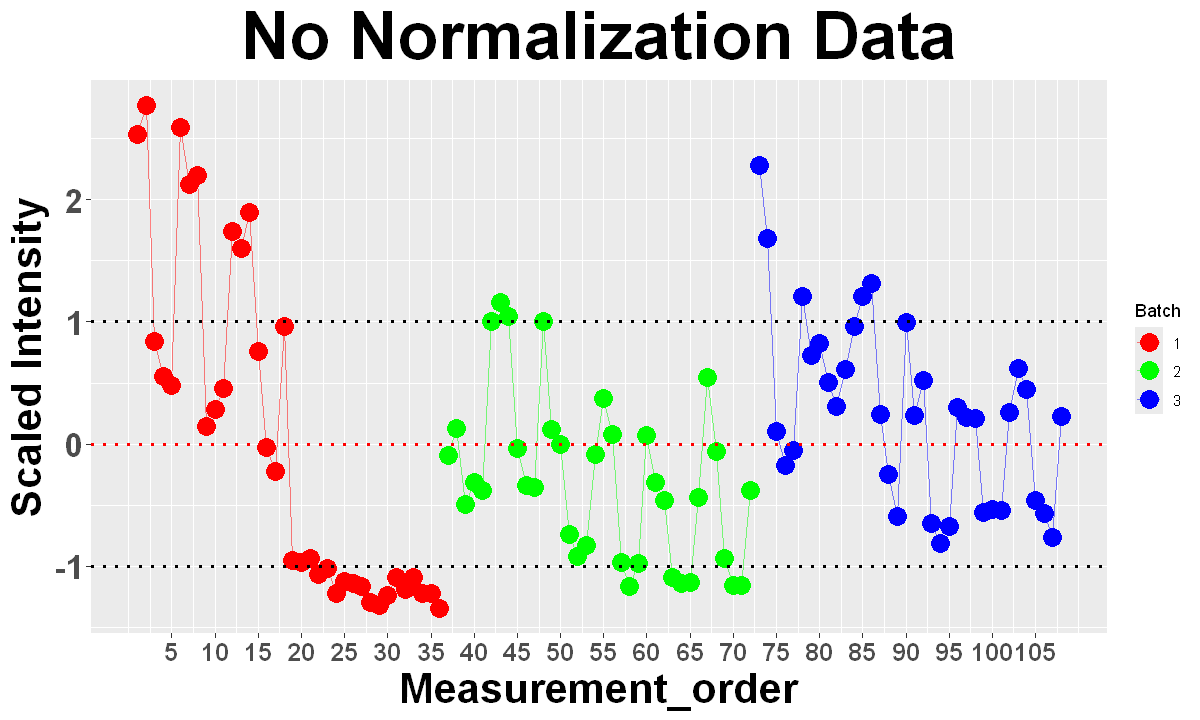

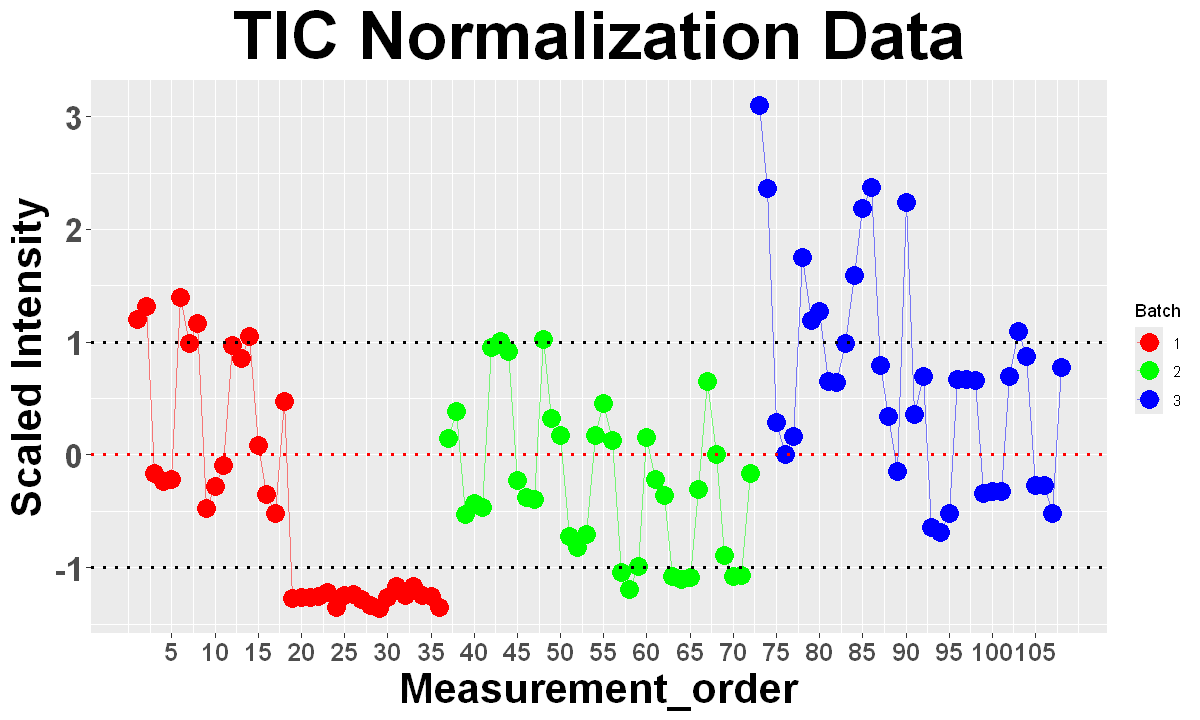

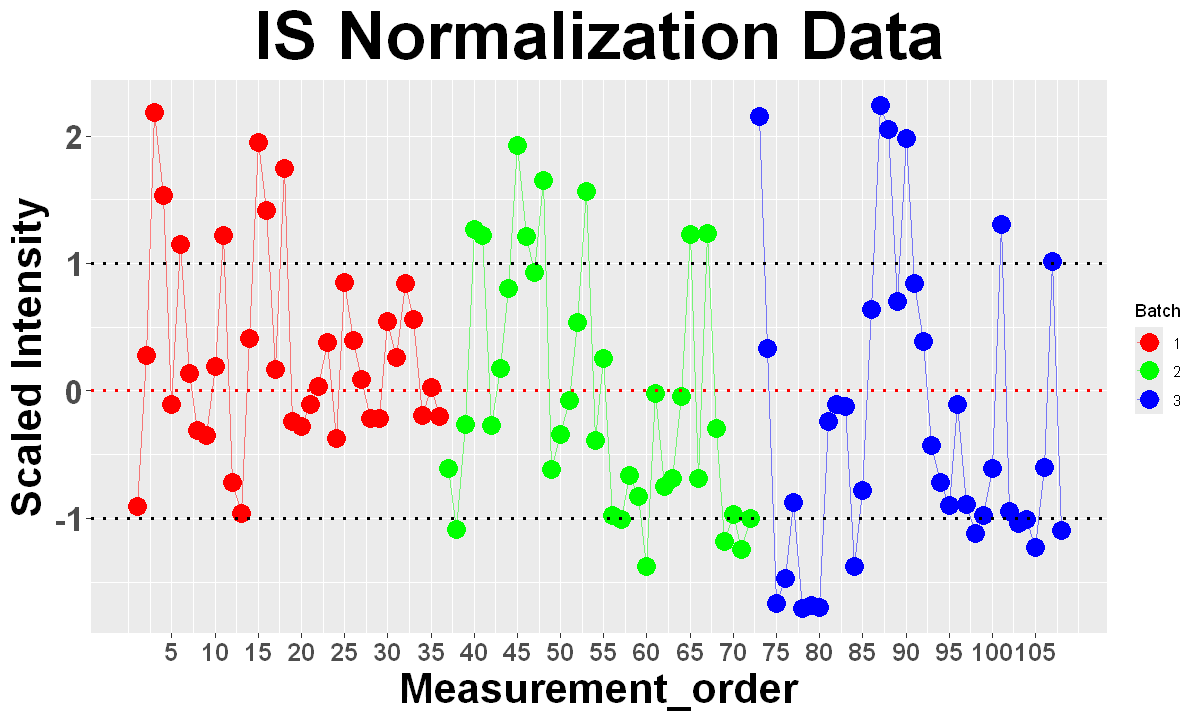

In [21]:
# Intensity Plot (Intensity vs Measurement Order)

# extract only qcs
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

## No Normalization Data ##
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_2, sample_set_2)

# ordering by batch then s_value
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ]
batch <- qcs_batch_info_data_ordered$batch

# extract s_value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE]
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values)

# intensity plot based on measurement_order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)
cat("\033[1mRed dotted line represents mean intensity (mean(scaled_intensity)). Black dotted lines represent standard deviation.(mean - std)\033[0m\n")

# intensity plot
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
intensity_plot <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  # color = batch
  geom_line(aes(group = Batch), alpha = 0.5) +  # Add lines between points, grouped by Batch
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  # Add black dotted line for mean
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") +  
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) +  
  scale_color_manual(values = c("1" = "red", "2" = "green", "3" = "blue")) +  
  ggtitle("No Normalization Data") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"),  
    axis.title.x = element_text(size = 25, face = "bold"),  
    axis.title.y = element_text(size = 25, face = "bold"),  
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot)

# TIC norm #
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_TIC_2, sample_set_2)

# ordering by batch then s value)
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ]

batch <- qcs_batch_info_data_ordered$batch
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE]
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values)

# intensity plot based on measurement_order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

rownames(plot_data_scaled) <- rownames(qcs_batch_info_data_ordered)
#print(plot_data_scaled)

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)

# Get unique batch values from the data
unique_batches <- unique(plot_data_scaled$Batch)

# Generate colors dynamically based on the number of unique batches
batch_colors <- rainbow(length(unique_batches))
color_mapping <- setNames(batch_colors, unique_batches)

# intensity plot
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
intensity_plot_TIC <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  # color = batch
  geom_line(aes(group = Batch), alpha = 0.5) +  # Add lines between points, grouped by Batch
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  # Add black dotted line for mean
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") +  
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) +  
  scale_color_manual(values = color_mapping) +  # Use the dynamically generated color mapping
  ggtitle("TIC Normalization Data") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"),  
    axis.title.x = element_text(size = 25, face = "bold"),  
    axis.title.y = element_text(size = 25, face = "bold"), 
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot_TIC)

# IS norm #
# get rid of tissue samples and ordering by batch
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_2, sample_set_2)
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ]

# ordering by s-value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

# assign measurement order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))
batch <- qcs_batch_info_data_ordered$batch

propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE] 
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))

d7_propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == d7_propranolol_mz_value_2, drop = FALSE] 
d7_propranolol_intensity_values <- as.numeric(unlist(d7_propranolol_intensity))

ratio_intensity <- propranolol_intensity_values / d7_propranolol_intensity_values
ratio_intensity <- scale(ratio_intensity)

# making data frame
plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = ratio_intensity
)
mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)

# Get unique batch values from the data
unique_batches <- unique(plot_data_scaled$Batch)

# Generate colors dynamically based on the number of unique batches
batch_colors <- rainbow(length(unique_batches))
color_mapping <- setNames(batch_colors, unique_batches)

# intensity plot
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
intensity_plot_IS <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  # color = batch
  geom_line(aes(group = Batch), alpha = 0.5) +  # Add lines between points, grouped by Batch
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  # Add black dotted line for mean
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") +  
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) + 
  scale_color_manual(values = color_mapping) +  # Include scale_color_manual within ggplot() function
  ggtitle("IS Normalization Data") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"),  
    axis.title.x = element_text(size = 25, face = "bold"),  
    axis.title.y = element_text(size = 25, face = "bold"),  
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot_IS)

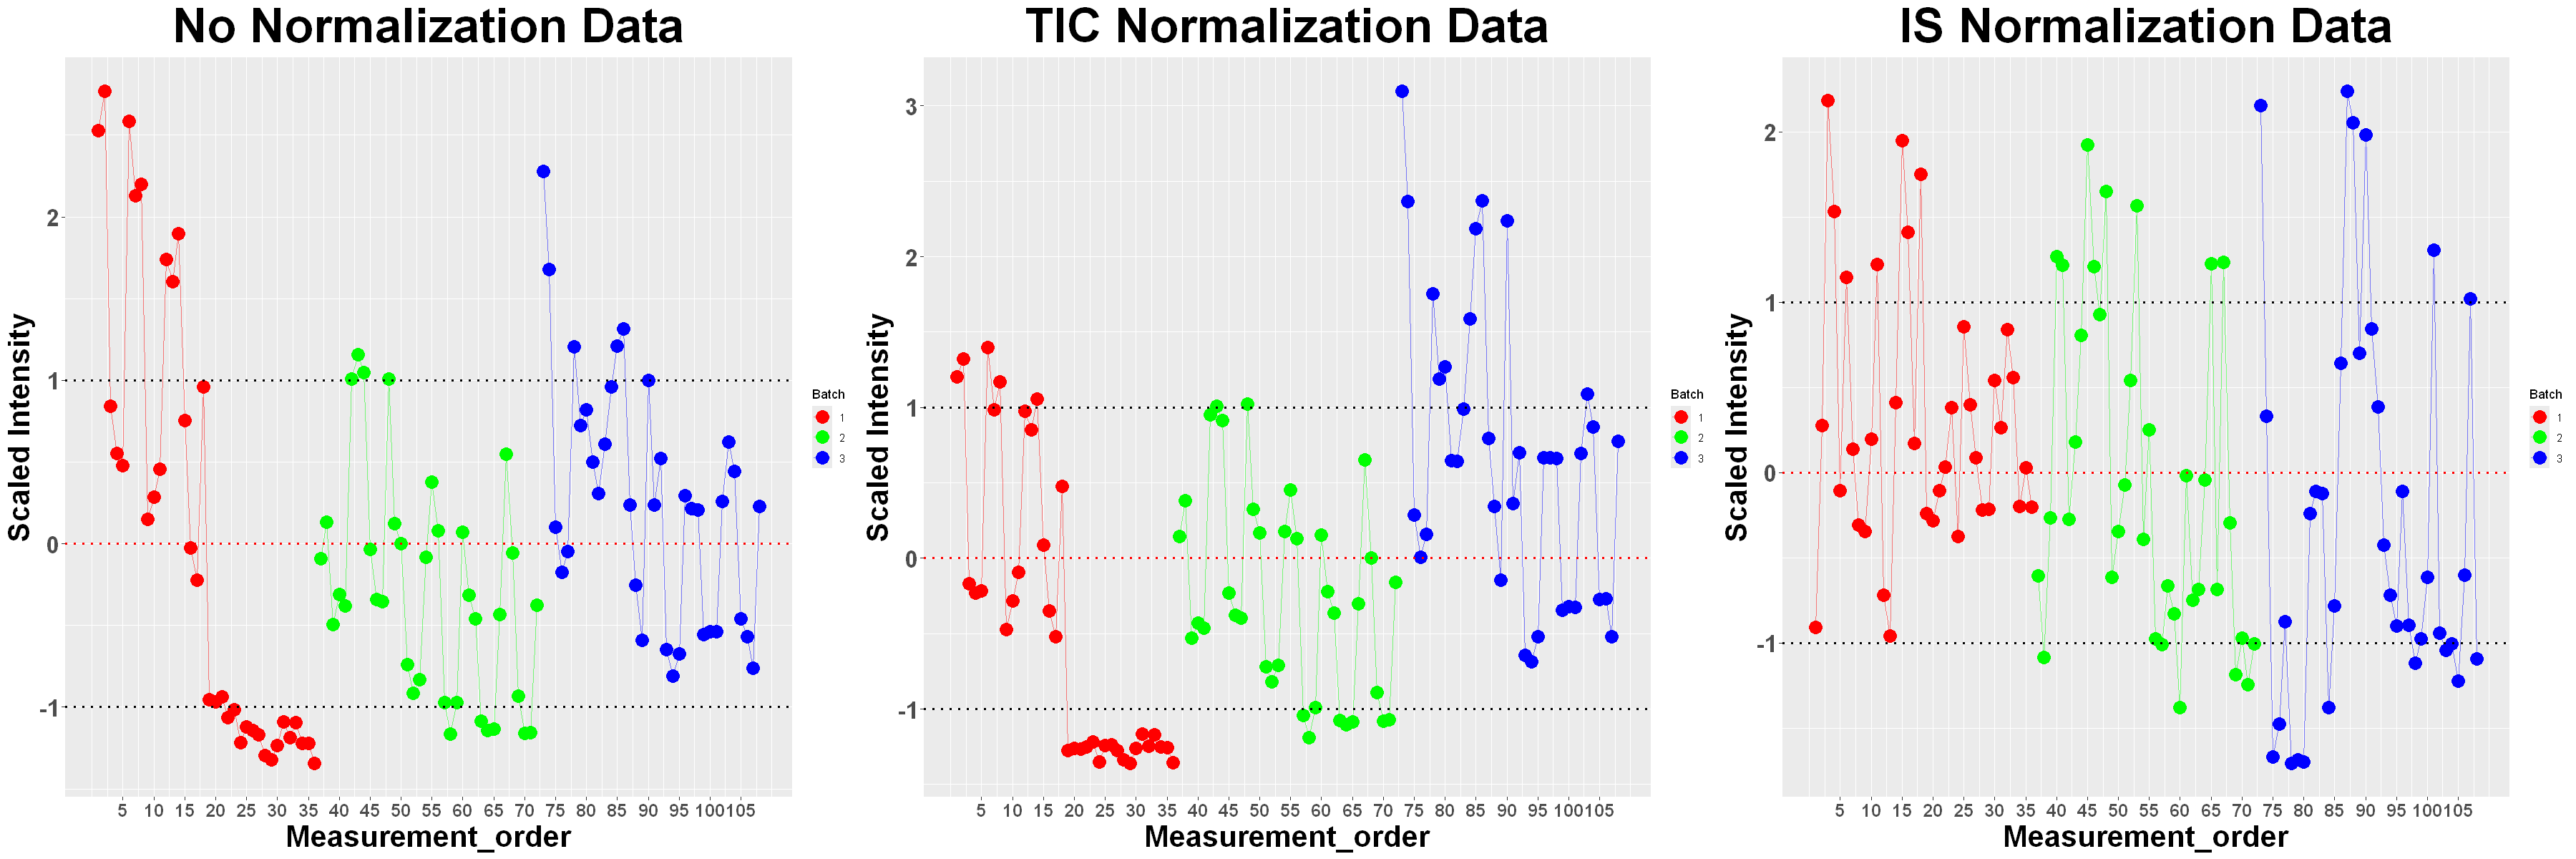

In [22]:
# Display combined only
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)  # Adjust width and height as desired
combined_intensity_plot <- grid.arrange(intensity_plot, intensity_plot_TIC, intensity_plot_IS, ncol = 3)

## 3. QCS Violin Plot ##
<a id="qcs_violin_2"></a>


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:kableExtra':

    group_rows


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Gray dotted line represents median


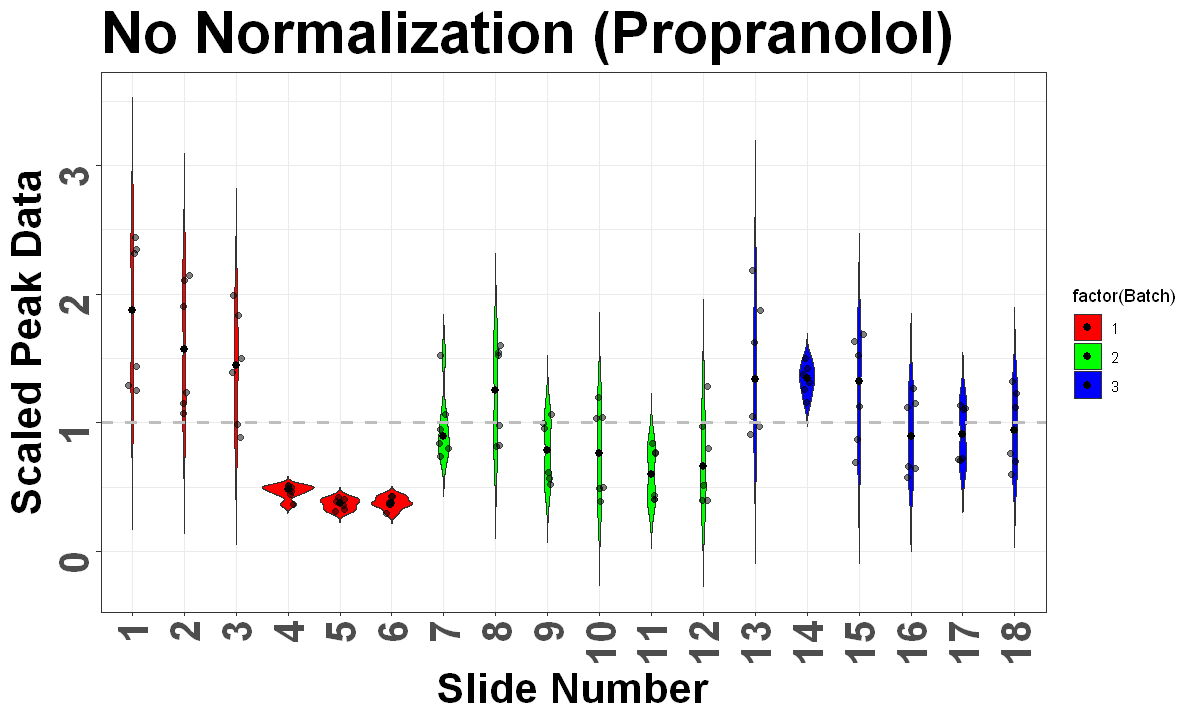

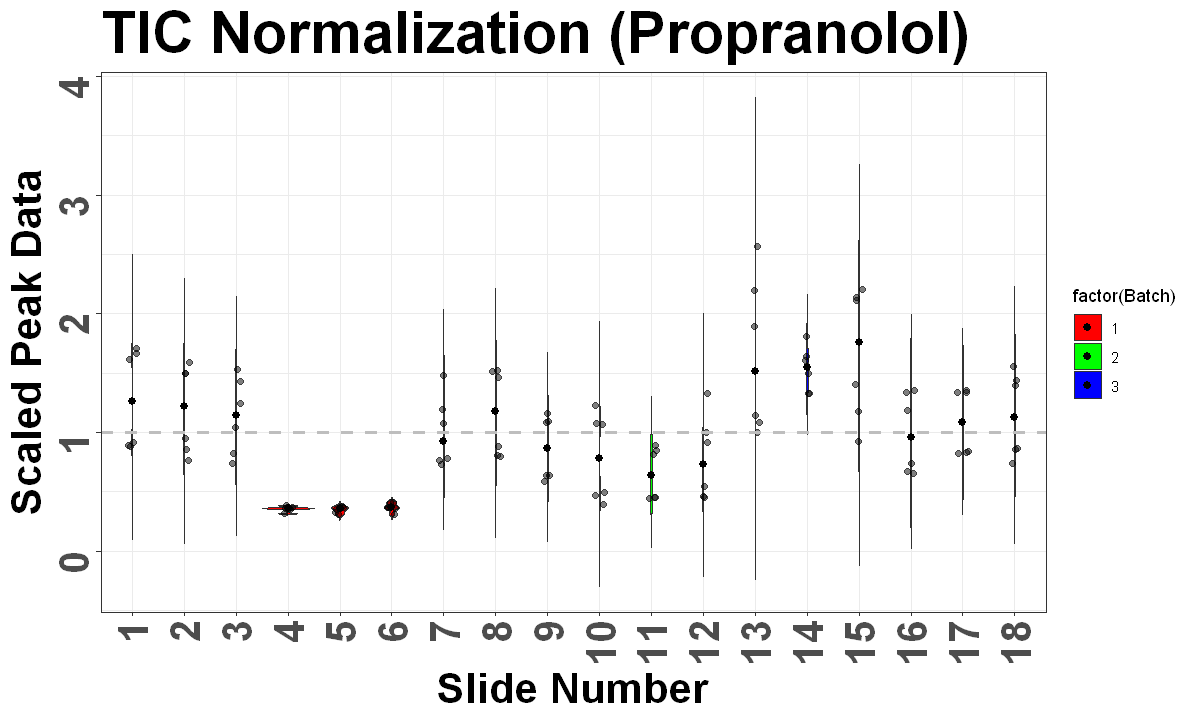

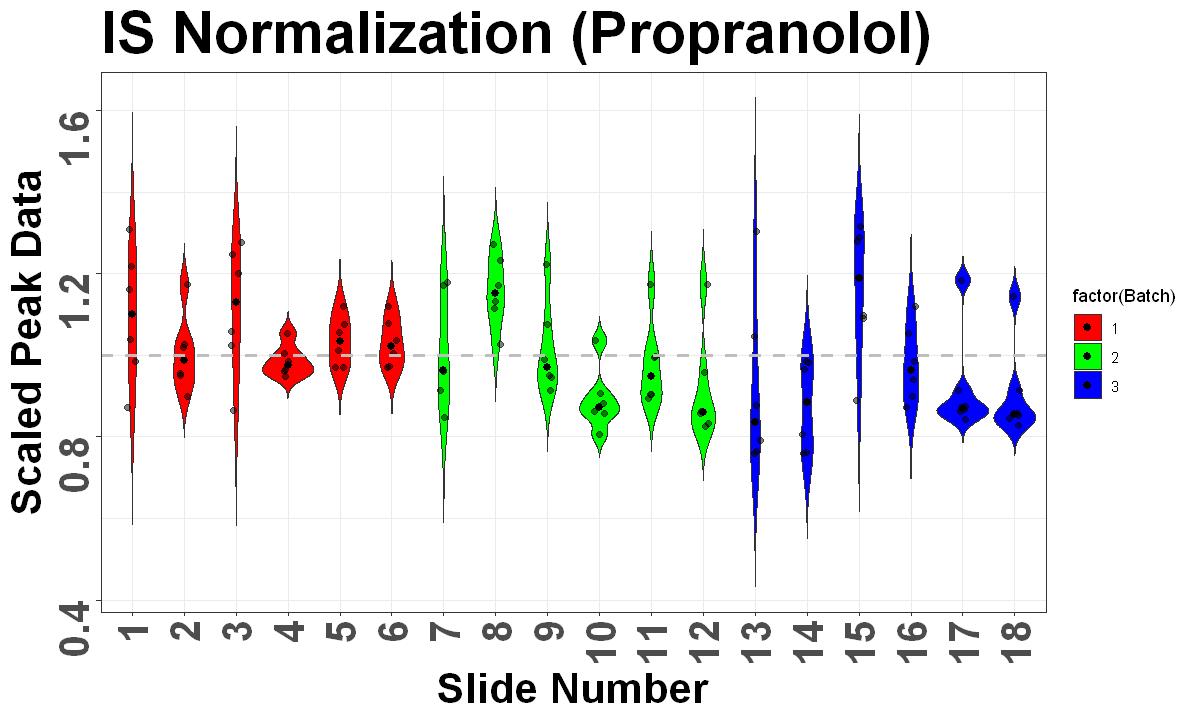

In [23]:
## Violin Plot ##

# Load library
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Function to scale data by its mean
scale_by_mean <- function(data_frame) {
  mean_value <- mean(data_frame$Value)
  data_frame <- data_frame %>%
    mutate(Value = Value / mean_value)
  return(data_frame)
}

# No Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans <- as.data.frame(t(propranolol_data))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Scale No Normalization data by its mean
violin_data <- scale_by_mean(violin_data)

# TIC Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans_TIC <- as.data.frame(t(propranolol_data_TIC))
propranolol_data_trans_TIC[] <- lapply(propranolol_data_trans_TIC, as.numeric)

# Extract slide number
slide_number_TIC <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_TIC))
slide_number_TIC <- as.numeric(slide_number_TIC)

# Create violin plot data frame
violin_data_TIC <- data.frame(
  Slide = slide_number_TIC,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans_TIC[3, ])
)

# Scale TIC Normalization data by its mean
violin_data_TIC <- scale_by_mean(violin_data_TIC)

# IS Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans_IS <- as.data.frame(t(ratio_data))
propranolol_data_trans_IS[] <- lapply(propranolol_data_trans_IS, as.numeric)

# Extract slide number
slide_number_IS <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_IS))
slide_number_IS <- as.numeric(slide_number_IS)

# Create violin plot data frame
violin_data_IS <- data.frame(
  Slide = slide_number_IS,
  Batch = ratio_data$batch,
  Value = unlist(propranolol_data_trans_IS[3, ])
)

# Scale IS Normalization data by its mean
violin_data_IS <- scale_by_mean(violin_data_IS)

# Define the colors for the first three batches
manual_colors <- c("1" = "red", "2" = "green", "3" = "blue")

# Plot function to ensure consistent scaling
plot_violin <- function(data, title) {
  unique_batches <- unique(data$Batch)
  additional_batches <- setdiff(unique_batches, names(manual_colors))
  
  if (length(additional_batches) > 0) {
    additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
    additional_colors <- setNames(additional_colors, additional_batches)
  } else {
    additional_colors <- c()
  }
  
  all_colors <- c(manual_colors, additional_colors)
  
  ggplot(data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
    geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
    stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
    geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
    geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
    scale_fill_manual(values = all_colors) +
    labs(x = "Slide Number", y = "Scaled Peak Data", title = title) +
    theme_bw() +
    theme(

      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.title = element_text(face = "bold", size = 25),  
      plot.title = element_text(face = "bold", size = 35),  
      axis.text = element_text(size = 20)
    )
}

# Plot the data with each dataset scaled by its mean
cat("\033[1mGray dotted line represents median\033[0m\n")
options(repr.plot.width = 10, repr.plot.height = 6)

# No Normalization Plot
violin_plot_jit <- plot_violin(violin_data, "No Normalization (Propranolol)")
print(violin_plot_jit)

# TIC Normalization Plot
violin_plot_TIC_jit <- plot_violin(violin_data_TIC, "TIC Normalization (Propranolol)")
print(violin_plot_TIC_jit)

# IS Normalization Plot
violin_plot_IS_jit <- plot_violin(violin_data_IS, "IS Normalization (Propranolol)")
print(violin_plot_IS_jit)

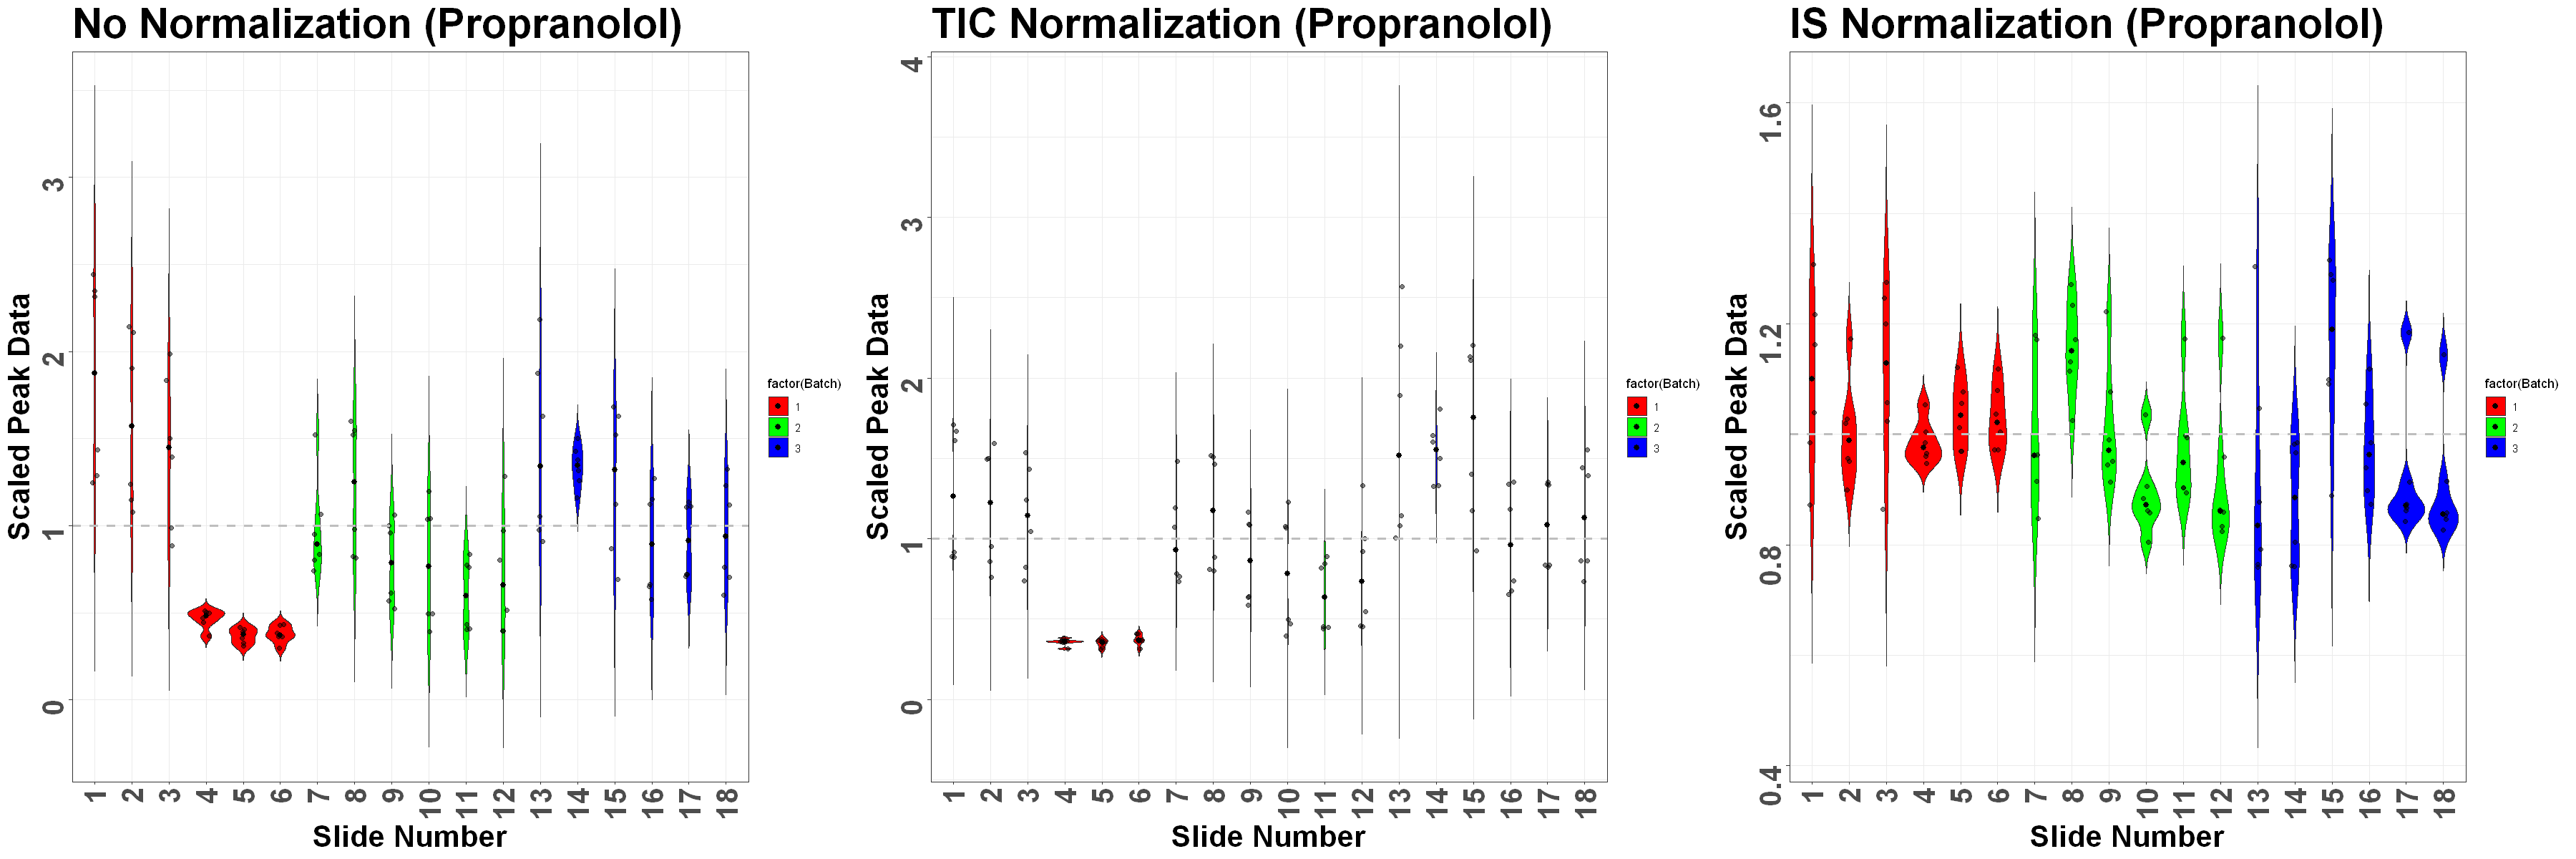

In [24]:
# Overview Violin Plot (Propranolol)
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)  # Adjust width and height as desired
combined_violin_plot <- grid.arrange(violin_plot_jit, violin_plot_TIC_jit, violin_plot_IS_jit, ncol = 3)

Gray dotted line represents median


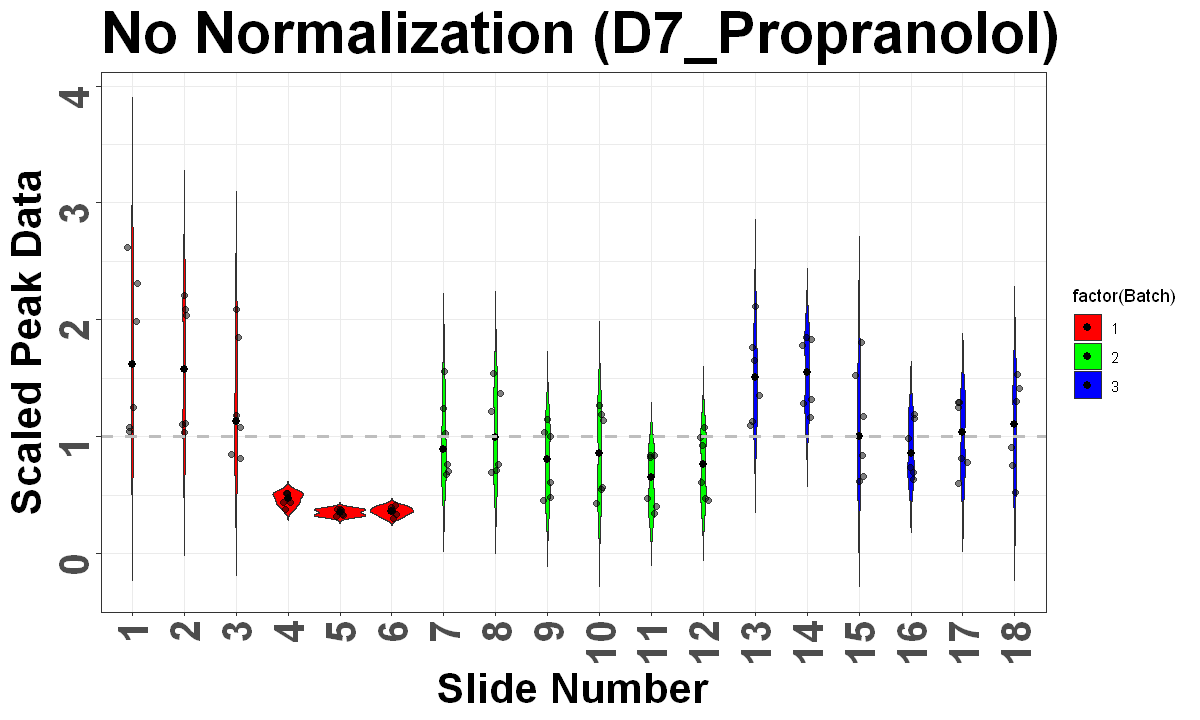

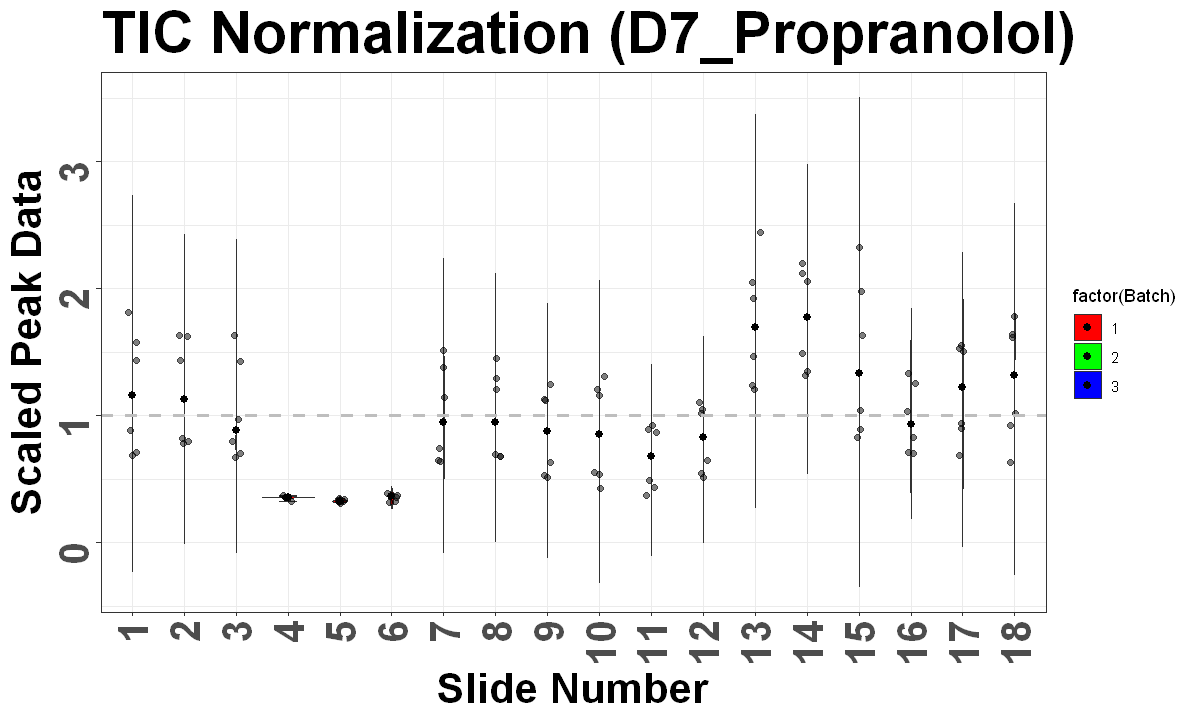

In [25]:
## Violin Plot ##

# Load library
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Function to scale data by its mean
scale_by_mean <- function(data_frame) {
  mean_value <- mean(data_frame$Value)
  data_frame <- data_frame %>%
    mutate(Value = Value / mean_value)
  return(data_frame)
}

# No Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans <- as.data.frame(t(d7_propranolol_data))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Scale No Normalization data by its mean
violin_data <- scale_by_mean(violin_data)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# Define the colors for the first three batches
manual_colors <- c("1" = "red", "2" = "green", "3" = "blue")

# Get the unique batches in your data
unique_batches <- unique(violin_data$Batch)

# Determine the number of additional batches
additional_batches <- setdiff(unique_batches, names(manual_colors))

# Generate additional colors using a color ramp palette
if (length(additional_batches) > 0) {
  additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
  additional_colors <- setNames(additional_colors, additional_batches)
} else {
  additional_colors <- c()
}

# Combine the manually defined colors with the additional colors
all_colors <- c(manual_colors, additional_colors)

# Plot the No Normalization data
cat("\033[1mGray dotted line represents median\033[0m\n")
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
violin_plot_jit_d7 <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
  geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = all_colors) +
  labs(x = "Slide Number", y = "Scaled Peak Data", title = "No Normalization (D7_Propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
    axis.title = element_text(face = "bold", size = 25),  
    plot.title = element_text(face = "bold", size = 35),  
    axis.text = element_text(size = 15)  
  )
print(violin_plot_jit_d7)

# TIC Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans_TIC <- as.data.frame(t(d7_propranolol_data_TIC))
propranolol_data_trans_TIC[] <- lapply(propranolol_data_trans_TIC, as.numeric)

# Extract slide number
slide_number_TIC <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_TIC))
slide_number_TIC <- as.numeric(slide_number_TIC)

# Create violin plot data frame
violin_data_TIC <- data.frame(
  Slide = slide_number_TIC,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans_TIC[3, ])
)

# Scale TIC Normalization data by its mean
violin_data_TIC <- scale_by_mean(violin_data_TIC)

# Sort the data frame based on the Slide column
violin_data_TIC <- violin_data_TIC %>%
  arrange(Slide)

# Define the colors for the first three batches
manual_colors <- c("1" = "red", "2" = "green", "3" = "blue")

# Get the unique batches in your data
unique_batches <- unique(violin_data_TIC$Batch)

# Determine the number of additional batches
additional_batches <- setdiff(unique_batches, names(manual_colors))

# Generate additional colors using a color ramp palette
if (length(additional_batches) > 0) {
  additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
  additional_colors <- setNames(additional_colors, additional_batches)
} else {
  additional_colors <- c()
}

# Combine the manually defined colors with the additional colors
all_colors <- c(manual_colors, additional_colors)

# Plot the TIC normalization data
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
violin_plot_TIC_jit_d7 <- ggplot(violin_data_TIC, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
  geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = all_colors) +
  labs(x = "Slide Number", y = "Scaled Peak Data", title = "TIC Normalization (D7_Propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
    axis.title = element_text(face = "bold", size = 25),  
    plot.title = element_text(face = "bold", size = 35),  
    axis.text = element_text(size = 15) 
  )
print(violin_plot_TIC_jit_d7)

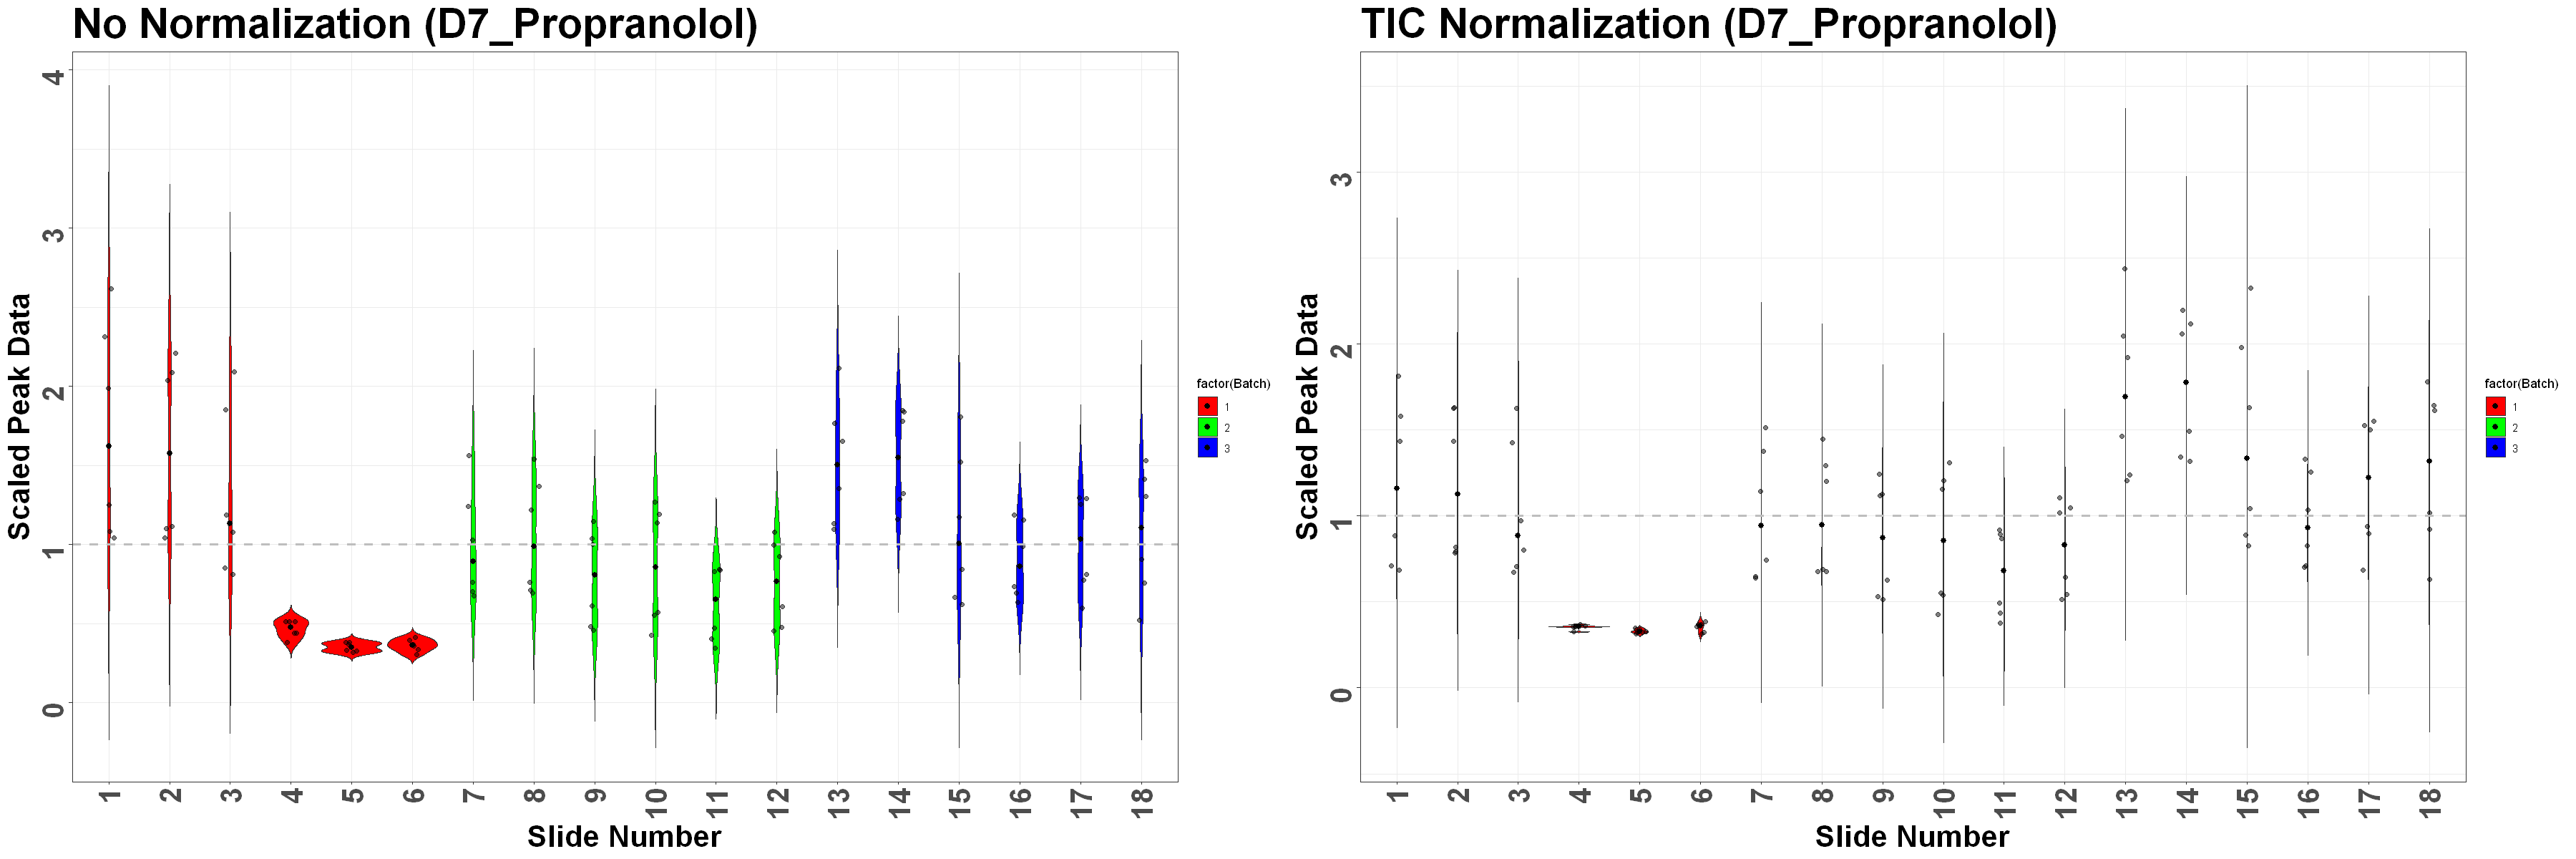

In [26]:
# Overview Violin Plot (D7-Propranolol)
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)  # Adjust width and height as desired
combined_violin_plot <- grid.arrange(violin_plot_jit_d7, violin_plot_TIC_jit_d7, ncol = 2)

## 4. PCA Plot ##
<a id="pca_2"></a>


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




PCA plot for no normalization dataset
Total Score: 80.58 %

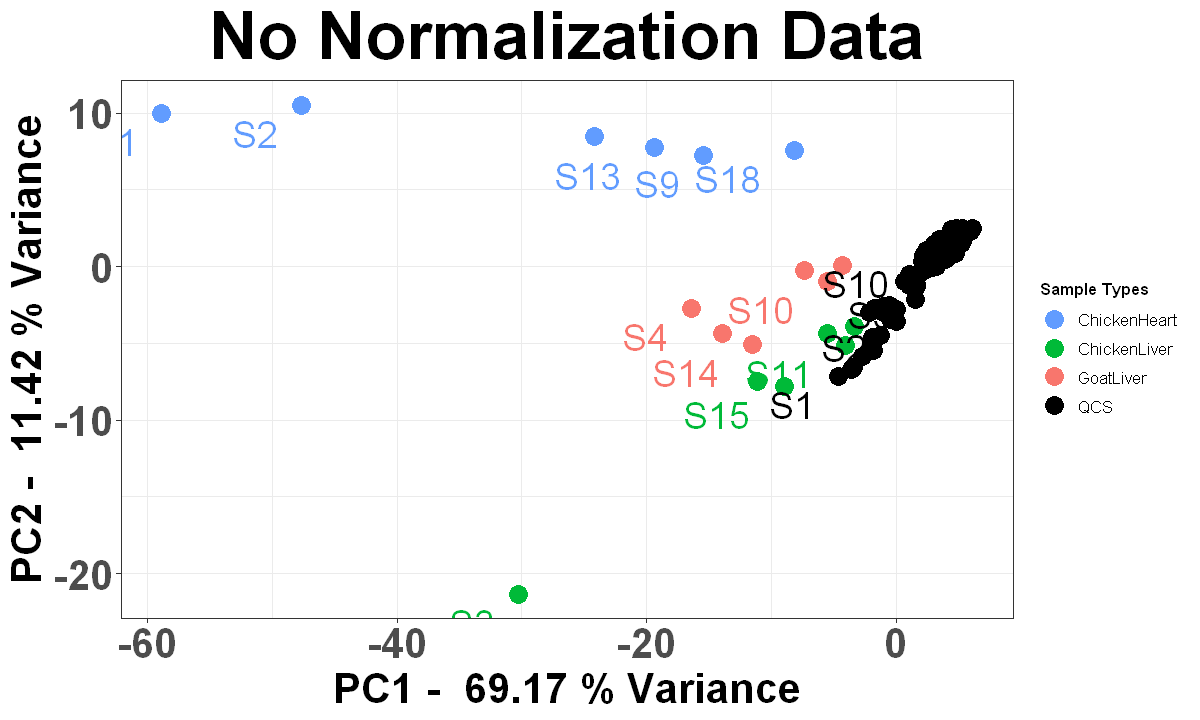

In [27]:
## PCA plot ##
# no norm #
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# Format PCA plot 
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
cat("\033[1mPCA plot for no normalization dataset\033[0m\n")

# Convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df_2 %>%
  mutate_all(as.numeric)

# Extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_2, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types <- str_extract(colnames(batch_matrix), pattern)
sample_types[is.na(sample_types)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data <- data.frame(Sample = sample_ID, batch_pca$x)

# Plot PCA with colored sample dots based on sample type
pca_data$Score <- pca_data$PC1 + pca_data$PC2
pca_data$Type <- sample_types

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca$sdev[1]^2
pc2_score <- batch_pca$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types[sample_types != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# PCA plot
plot <- ggplot(pca_data, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("No Normalization Data") +
  labs(color = "Sample Types") + 
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  )
print(plot)


PCA plot for TIC normalization dataset
Total Score: 86.3 %

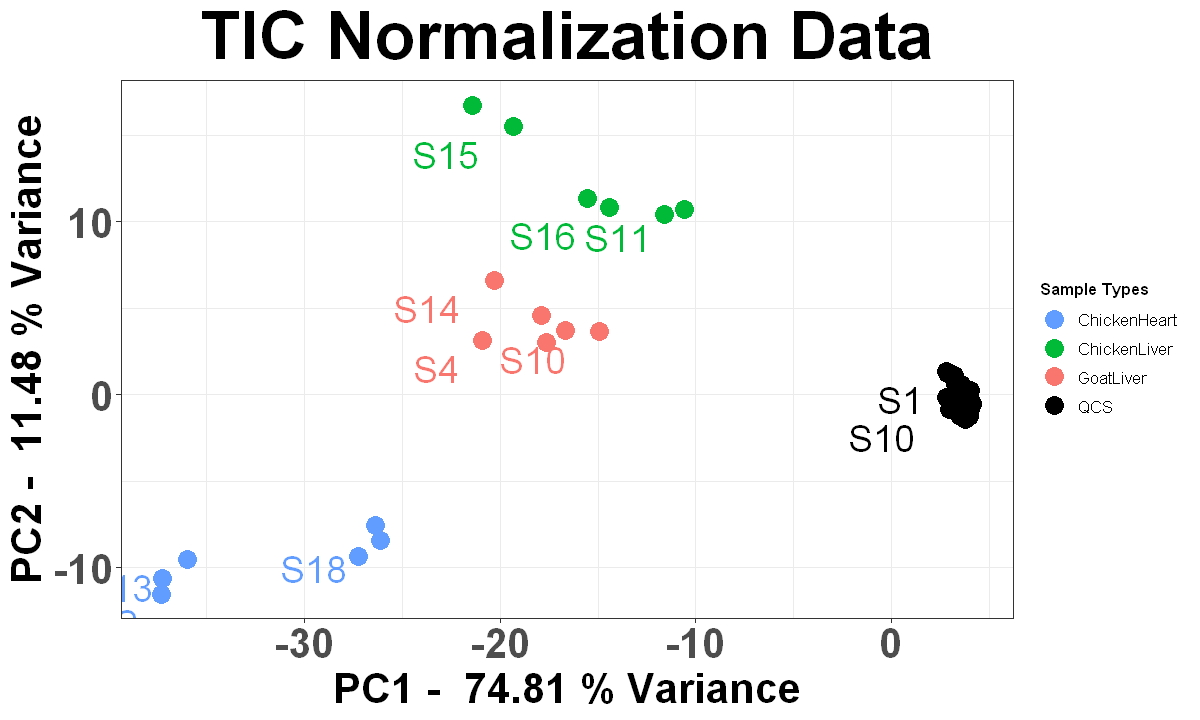

In [28]:
## PCA plot ##
# TIC norm #
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# Format PCA plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
cat("\033[1mPCA plot for TIC normalization dataset\033[0m\n")

# Convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df_TIC_2 %>%
  mutate_all(as.numeric)

# Extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_2, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_TIC <- str_extract(colnames(batch_matrix), pattern)
sample_types_TIC[is.na(sample_types_TIC)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_TIC <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_TIC <- data.frame(Sample = sample_ID, batch_pca_TIC$x)

# Plot PCA with colored sample dots based on sample type
pca_data_TIC$Score <- pca_data_TIC$PC1 + pca_data_TIC$PC2
pca_data_TIC$Type <- sample_types_TIC

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_TIC$sdev[1]^2
pc2_score <- batch_pca_TIC$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_TIC$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types_TIC[sample_types_TIC != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# PCA plot
plot_TIC <- ggplot(pca_data_TIC, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("TIC Normalization Data") +
  labs(color = "Sample Types") + 
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  ) 
print(plot_TIC)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


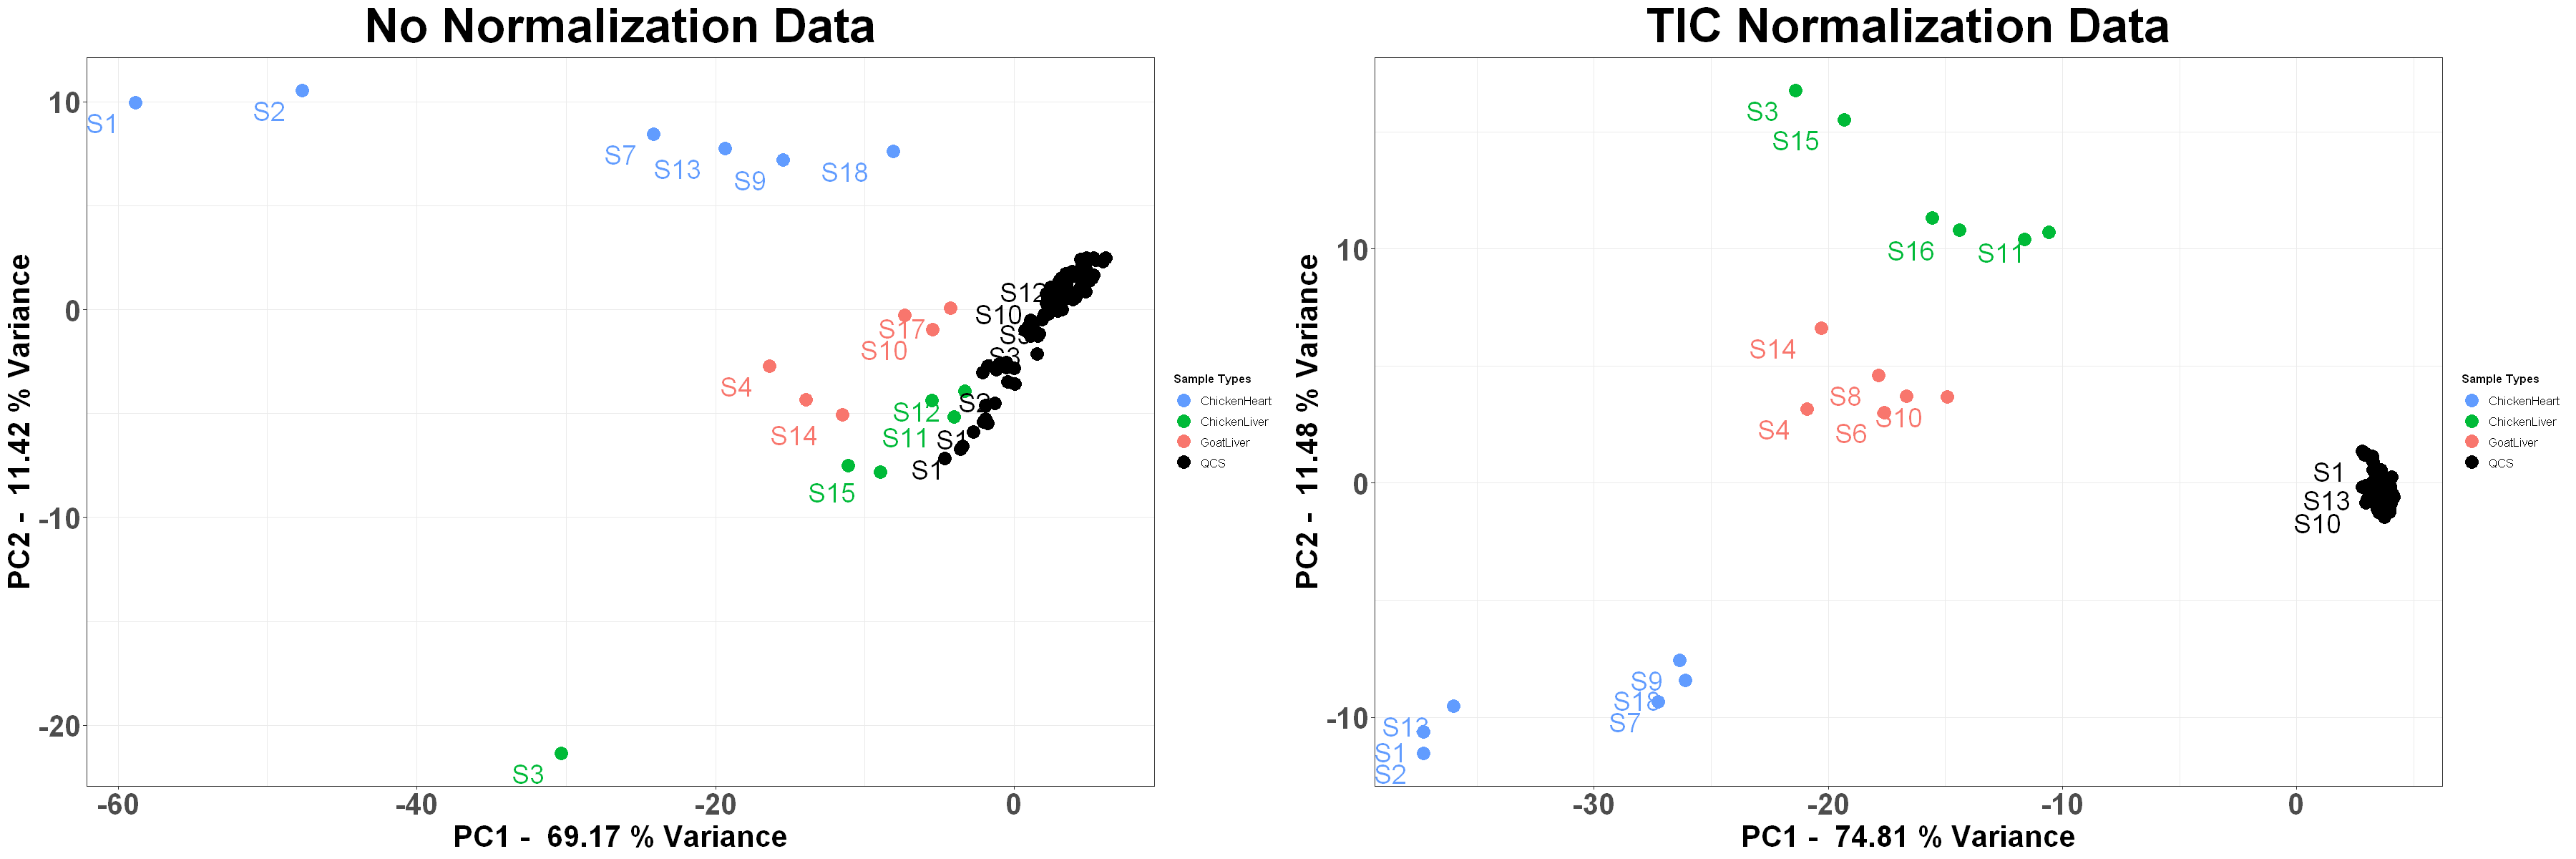

In [29]:
## Overview PCA Plot ##
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)
combined_plots <- grid.arrange(plot, plot_TIC, ncol = 2)
print(combined_plots)

## 5. QCS PCA Plot ##
<a id="qcs_pca_2"></a>

The QCS PCA Plot illustrates a distribution of QCS samples only. The black triangle represents the centroid of the QCS samples and dots represent individual QCS samples with their corresponding batches as the colors. The Average Euclidean Distance is below the PCA plot which was calculated by the following formula, where Euclidean distance is measured between the individual sample and the centroid of the sample and we averaged it.  

<div style="text-align: center;">
    <img src="image/QCS_Distance.png" alt="QCS_Distance" style="width:50%;">
</div>

QCS PCA plot for no normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.


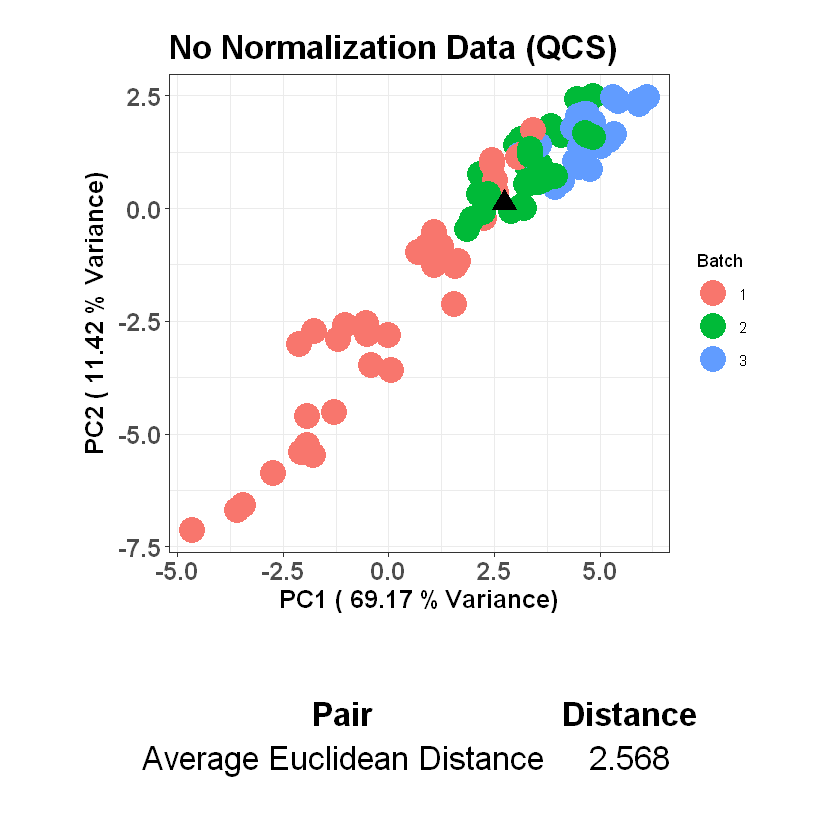

In [30]:
## PCA plot of QCS ##
# No Normalization Data #
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# Gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # only obtaining PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_2[qcs_samples, "batch"]

qcs_data <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2)

# Calculate distance between individuals samples and PC1 or PC2 centroids
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add up distances of each coordinate as one and square root them
distance_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Average the distances
average_distance_ec <- mean(distance_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs <- ggplot(qcs_data, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "No Normalization Data (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average distance
average_distance_qcs_df <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec, 3)
    )
    
# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_qcs <- plot_grid(pca_plot_qcs, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

cat("\033[1mQCS PCA plot for no normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.\033[0m\n")

# Print the combined plot
print(combined_plot_qcs)

QCS PCA plot for TIC normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.


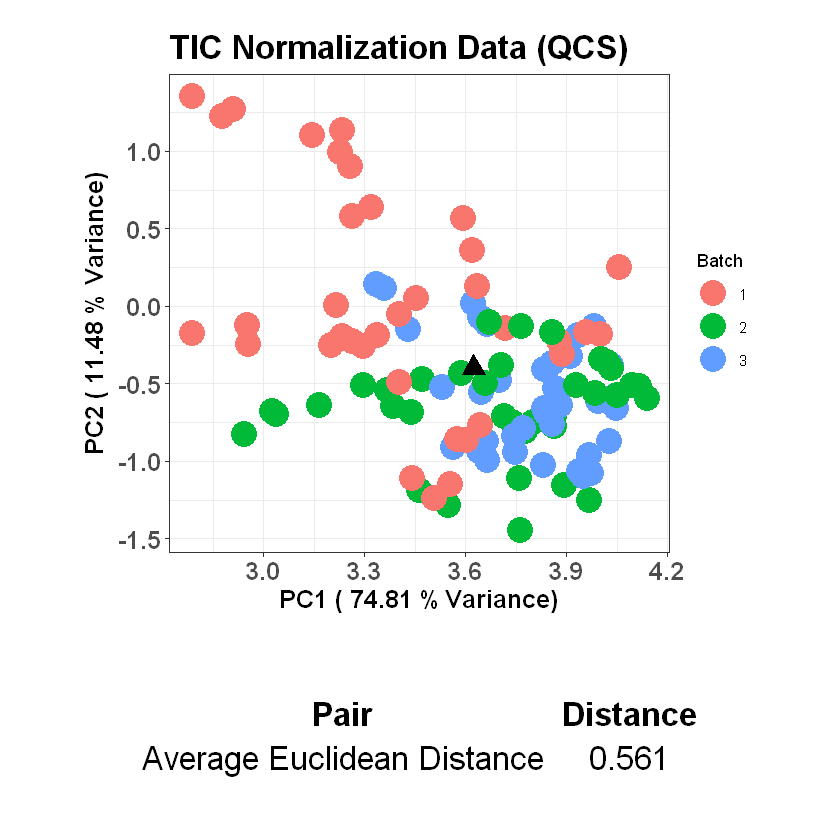

In [31]:
## PCA plot of QCS ##
# TIC normalization data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# Gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_TIC$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_TIC == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # only obtaining from PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_2[qcs_samples, "batch"]
qcs_data <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2)


# Calculate distance between individuals samples and PC1 or PC2 centroids
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add up distances of each coordinate as one and square root them
distance_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Average the distances
average_distance_ec_TIC <- mean(distance_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs <- ggplot(qcs_data, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "TIC Normalization Data (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average distance
average_distance_TIC_qcs_df <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec_TIC, 3)
    )
    
# Create a table plot
table_plot_qcs <- tableGrob(average_distance_TIC_qcs_df, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_TIC_qcs <- plot_grid(pca_plot_qcs, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

cat("\033[1mQCS PCA plot for TIC normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.\033[0m\n")

# Print the combined plot
print(combined_plot_TIC_qcs)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


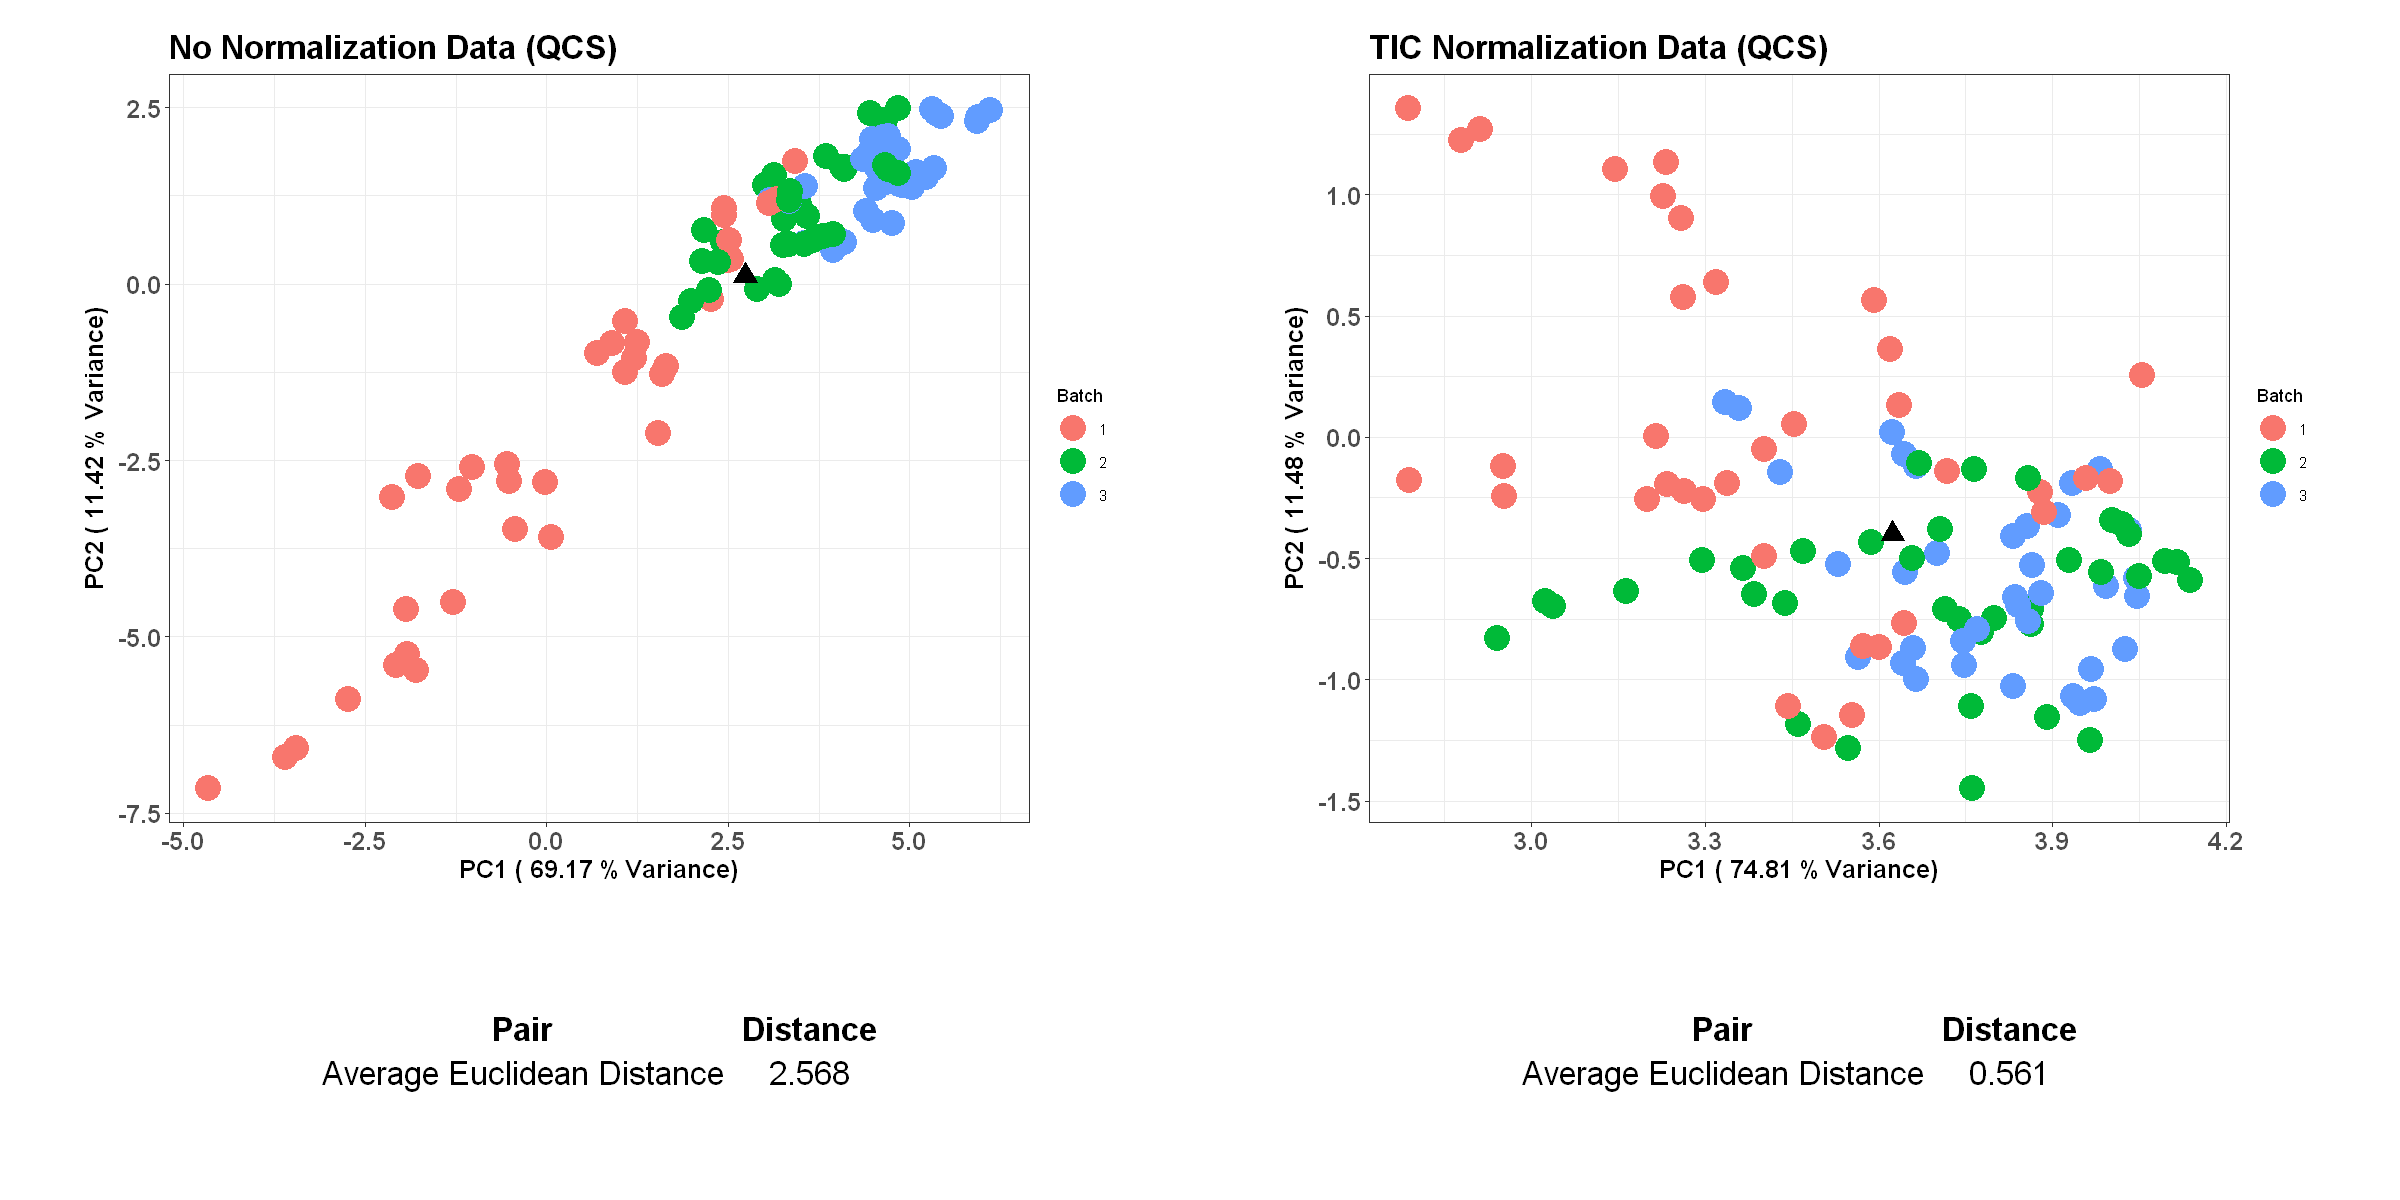

In [32]:
## Overview QCS PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 10)
combined_plots <- grid.arrange(combined_plot_qcs, combined_plot_TIC_qcs, ncol = 2)
print(combined_plots)

<h2><u><b> Tissue Evaluation </b></u></h2>
<a id="tissue_evaluation_2"></a>

## 1. Tissue RSD ##
<a id="tissue_rsd_2"></a>

In [33]:
## run these fnctions first ## 

# 1: Function to calculate rsd for tissue
calculate_batch_rsd_combined <- function(tissue_samples) {
  
  calculate_batch_rsd <- function(sample_dataset, batch_number) {
    # Extract data for the specified batch number
    batch_data <- sample_dataset[sample_dataset$batch == batch_number, -(1:2)]
    # Check if there are any samples for this batch
    if (nrow(batch_data) == 0) {
      return("NA ± NA%")  # Return NA if no samples exist for this batch
    }
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(batch_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(batch_data, 2, sd, na.rm = TRUE)

    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  calculate_interday_rsd <- function(sample_dataset) {
    # Extract data for interday calculation
    interday_data <- sample_dataset[, -(1:2)]
    
    # Check if there are any samples for interday calculation
    if (nrow(interday_data) == 0) {
      return("NA ± NA%")  # Return NA if no interday samples exist
    }
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(interday_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(interday_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  calculate_batch_rsd_multiple <- function(sample_dataset, unique_batches) {
    rsd_results <- list()
    for (batch_number in unique_batches) {
      rsd_results[[as.character(batch_number)]] <- calculate_batch_rsd(sample_dataset, batch_number)
    }
    return(rsd_results)
  }
  
  unique_tissues <- unique(gsub(".*_(\\w+)_\\d+.*", "\\1", rownames(tissue_samples)))
  
  rsd_results <- list()
  
  for (tissue_type in unique_tissues) {
    tissue_data <- tissue_samples[grep(paste0(tissue_type, "_"), rownames(tissue_samples)), ]
    
    sample_numbers <- as.numeric(gsub(".*S(\\d+)_.*", "\\1", rownames(tissue_data)))
    ordered_indices <- order(sample_numbers)
    tissue_data <- tissue_data[ordered_indices, ]
    
    tissue_data <- replace(tissue_data, tissue_data < 0, 1)
    
    unique_batches <- unique(tissue_data$batch)
    rsd_results_tissue <- calculate_batch_rsd_multiple(tissue_data, unique_batches)
    
    # Initialize dataframe to store results
    rsd_df_tissue <- data.frame(
      Batch = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
      RSD = NA
    )
    
    # Fill in RSD values where available for batch-specific RSDs
    for (i in 1:length(rsd_df_tissue$Batch)) {
      batch_number <- i  # Adjust based on batch number indexing
      if (as.character(batch_number) %in% names(rsd_results_tissue)) {
        rsd_df_tissue$RSD[i] <- rsd_results_tissue[[as.character(batch_number)]]
      } else {
        rsd_df_tissue$RSD[i] <- "NA ± NA%"  # Handle case where batch RSD is missing
      }
    }
    
    # Calculate interday RSD and insert into the dataframe
    interday_rsd <- calculate_interday_rsd(tissue_data)
    rsd_df_tissue$RSD[length(rsd_df_tissue$Batch)] <- interday_rsd
    
    rsd_results[[tissue_type]] <- rsd_df_tissue
  }
  
  return(rsd_results)
}

# 2: Function to gerneate HTML tables for each tissue 
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

In [34]:
## Tissue Variation RSD ##
# load libraries
library(kableExtra)
library(IRdisplay)

# No Normalization Dataset #
# extract tissue samples based on the rownames
sample_set_regex <- paste(sample_set_2, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(combined_batch_info_data_2))
tissue_samples <- combined_batch_info_data_2[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

rsd_results_combined <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined)

# Generate HTML tables for each tissue
html_tables <- lapply(names(rsd_results_combined), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content <- paste(html_tables, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content <- paste("<div style='text-align: center;'>", html_content, "</div>")
cat("\033[1mTissue RSD for No Normalization Data\033[0m\n")
# Display the centered HTML content in JupyterLab
display_html(centered_html_content)

Tissue RSD for No Normalization Data


GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10%

In [35]:
## Tissue Variation RSD ##
# load libraries
library(kableExtra)
library(IRdisplay)

## TIC Normalization Dataset ##
# extract tissue samples based on the rownames
sample_set_regex <- paste(sample_set_2, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(combined_batch_info_data_TIC_2))
tissue_samples <- combined_batch_info_data_TIC_2[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

rsd_results_combined_TIC <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined)

# Generate HTML tables for each tissue
html_tables_TIC <- lapply(names(rsd_results_combined_TIC), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_TIC, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_TIC <- paste(html_tables_TIC, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_TIC <- paste("<div style='text-align: center;'>", html_content_TIC, "</div>")
cat("\033[1mTissue RSD for TIC Normalization Data\033[0m\n")
# Display the centered HTML content in JupyterLab
display_html(centered_html_content_TIC)

Tissue RSD for TIC Normalization Data


GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.68 ± 6.63% 
 
 
 Intraday 2 
 9.15 ± 5.28% 
 
 
 Intraday 3 
 10.27 ± 8.49% 
 
 
 Interday 
 13.41 ± 5.13% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.51 ± 8.94% 
 
 
 Intraday 2 
 6.67 ± 5.24% 
 
 
 Intraday 3 
 12.02 ± 7.56% 
 
 
 Interday 
 18.61 ± 7.56% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.66 ± 4.95% 
 
 
 Intraday 2 
 6.96 ± 5.03% 
 
 
 Intraday 3 
 16.88 ± 10.24% 
 
 
 Interday 
 15.64 ± 5.59%

In [37]:
## Overview RSD Table ##
# Initialize an empty list to store combined HTML tables for each tissue
combined_html_list <- list()
# Iterate over each tissue type
for (tissue_name in names(rsd_results_combined)) {
  # Extract RSD tables for the current tissue type
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  rsd_table_TIC <- generate_rsd_table(rsd_results_combined_TIC, tissue_name)
  
  # Combine HTML tables for the current tissue type horizontally
  combined_rsd_table <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>",
                              "<div style='text-align: center;'>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>No Normalization</h3>", rsd_table, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>TIC Normalization</h3>", rsd_table_TIC, "</div>",
                              "</div>")
  
  # Add the combined HTML table to the list
  combined_html_list[[tissue_name]] <- combined_rsd_table
}

# Combine HTML tables into a single HTML table with two columns
combined_html <- paste("<table style='width:100%; border-collapse: collapse;'>", 
                       "<tr>", paste("<td style='vertical-align: top;'>", 
                                     unlist(combined_html_list), 
                                     "</td>", sep = ""), "</tr></table>")

# Wrap the combined HTML content in a div with text-align: center
centered_combined_html <- paste("<div style='text-align: center;'>", combined_html, "</div>")
# Display the centered HTML content in JupyterLab
display_html(centered_combined_html)

GoatLiver RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.68 ± 6.63% 
 
 
 Intraday 2 
 9.15 ± 5.28% 
 
 
 Intraday 3 
 10.27 ± 8.49% 
 
 
 Interday 
 13.41 ± 5.13% 
 
 
 
 ChickenLiver RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.51 ± 8.94% 
 
 
 Intraday 2 
 6.67 ± 5.24% 
 
 
 Intraday 3 
 12.02 ± 7.56% 
 
 
 Interday 
 18.61 ± 7.56% 
 
 
 
 ChickenHeart RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.66 ± 4.95% 
 
 
 Intraday 2 
 6.96 ± 5.03% 
 
 
 Intraday 3 
 16.88 ± 10.24% 
 
 
 Interday 
 15.64 ± 5.59%

## 2. Tissue PCA Plot (Intra/Intergroup) ##
<a id="tissue_pca_2"></a>

<u><b>Intragroup Tissue PCA Plot</b></u>

Intragroup Tissue PCA Plot will be assessed by the average Euclidean distance to centroid of each tissue sample. This will be done by first measuring centroid of each tissue group in PCA score plot and calculating the Euclidean Distance of individal tissue samples to their corresponding centroid then average it. 

<div style="text-align: center;">
    <img src="image/Intragroup_Distance.png" alt="Intragrou_Distance.png" style="width:50%;">
</div>

Tissue PCA plot (Intragroup) No normalization dataset. The triangles represent centroids for each tissue and average within tissue based on distance from each centroid.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


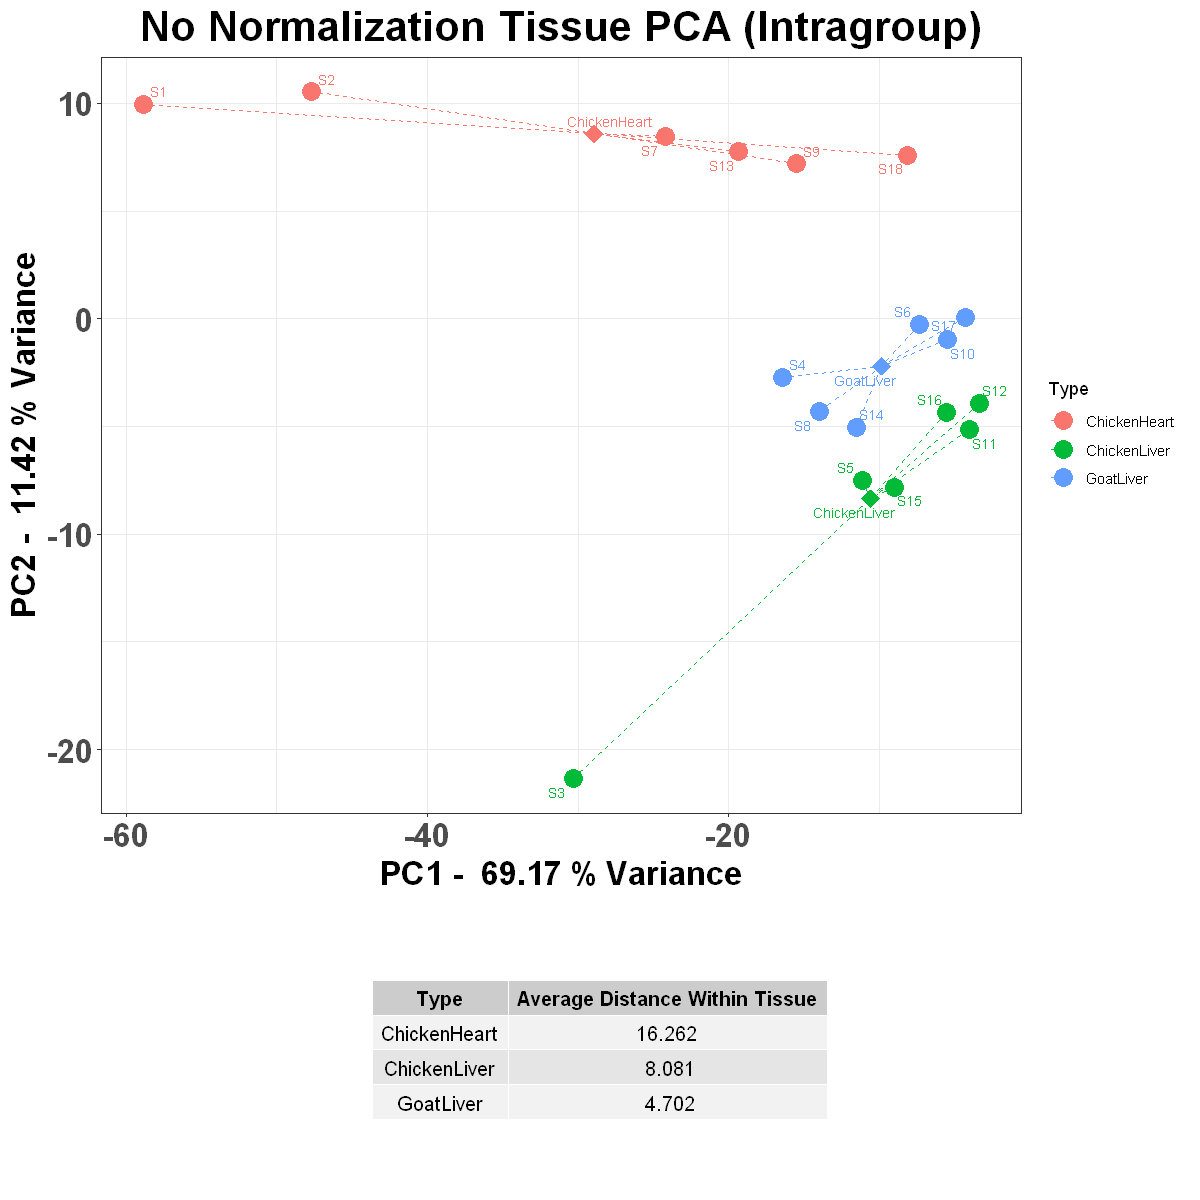

In [94]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)
library(dplyr)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10)

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set_2)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup pca plot with distance lines for visual validation
tissue_intra_plot <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "No Normalization Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create table plot
table_plot <- tableGrob(tissue_avg_distances, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_intra <- grid.arrange(tissue_intra_plot, table_plot, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intragroup) No normalization dataset. The triangles represent centroids for each tissue and average within tissue based on distance from each centroid.\033[0m\n")

# Print the combined plot
print(combined_plot_intra)

Tissue PCA plot (Intragroup) TIC normalization dataset. The triangles represents centroids for each tissue and average within tissue based on distance from each centroids.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


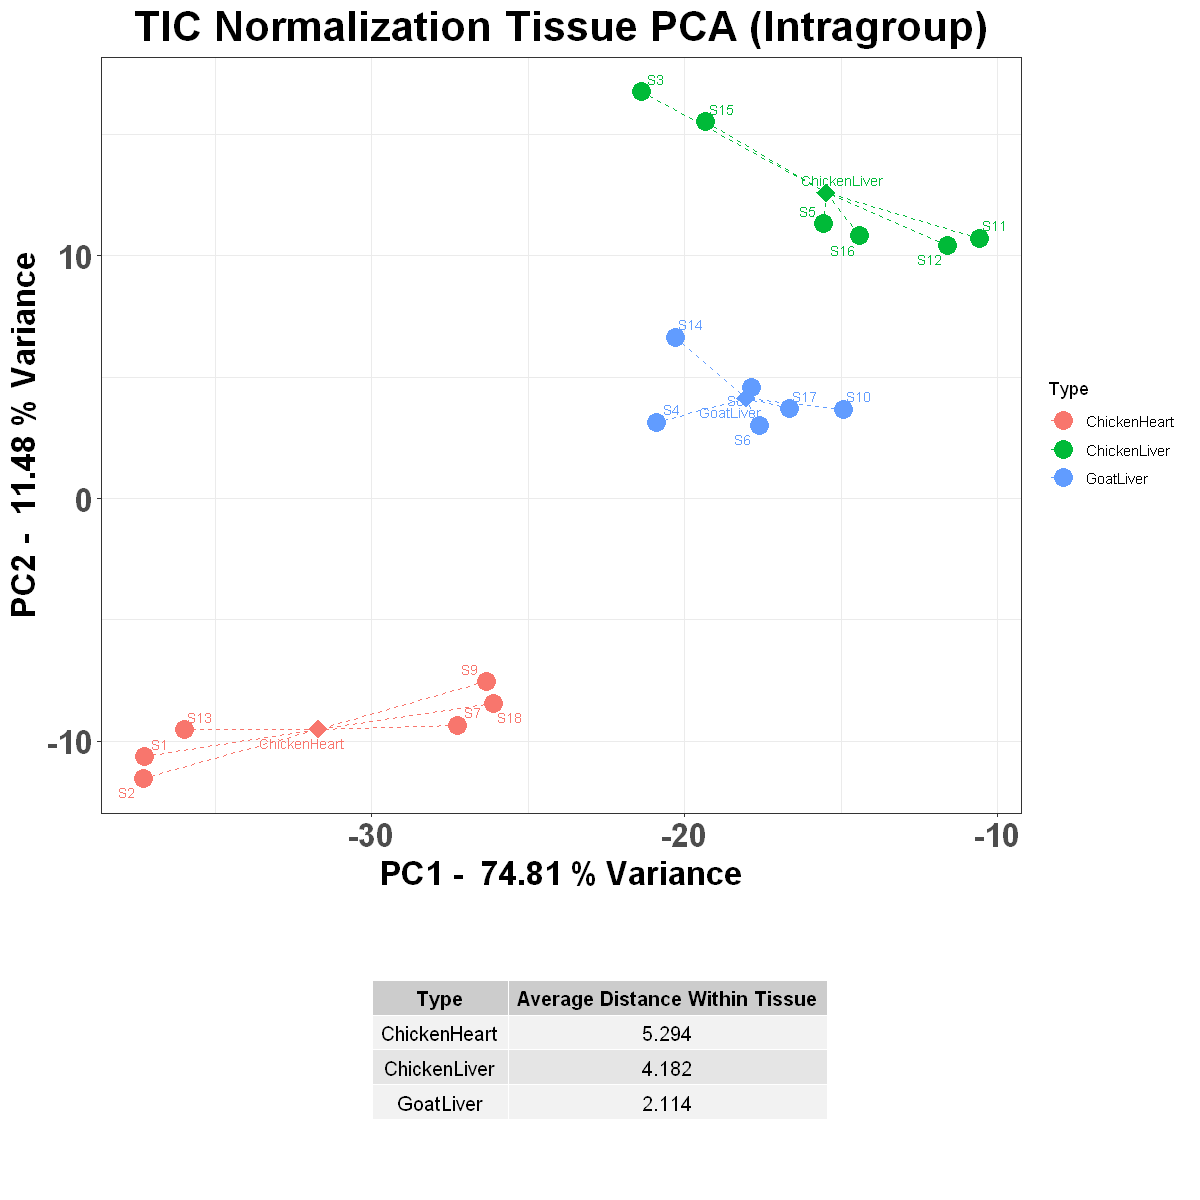

In [39]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(dplyr)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10)

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_TIC %>%
  filter(Type %in% sample_set_2)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_TIC <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup PCA plot with distance lines for visual validation
tissue_intra_plot_TIC <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "TIC Normalization Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create table plot
table_plot <- tableGrob(tissue_avg_distances_TIC, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_TIC_intra <- grid.arrange(tissue_intra_plot_TIC, table_plot, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intragroup) TIC normalization dataset. The triangles represents centroids for each tissue and average within tissue based on distance from each centroids.\033[0m\n")

# Print the combined plot
print(combined_plot_TIC_intra)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]


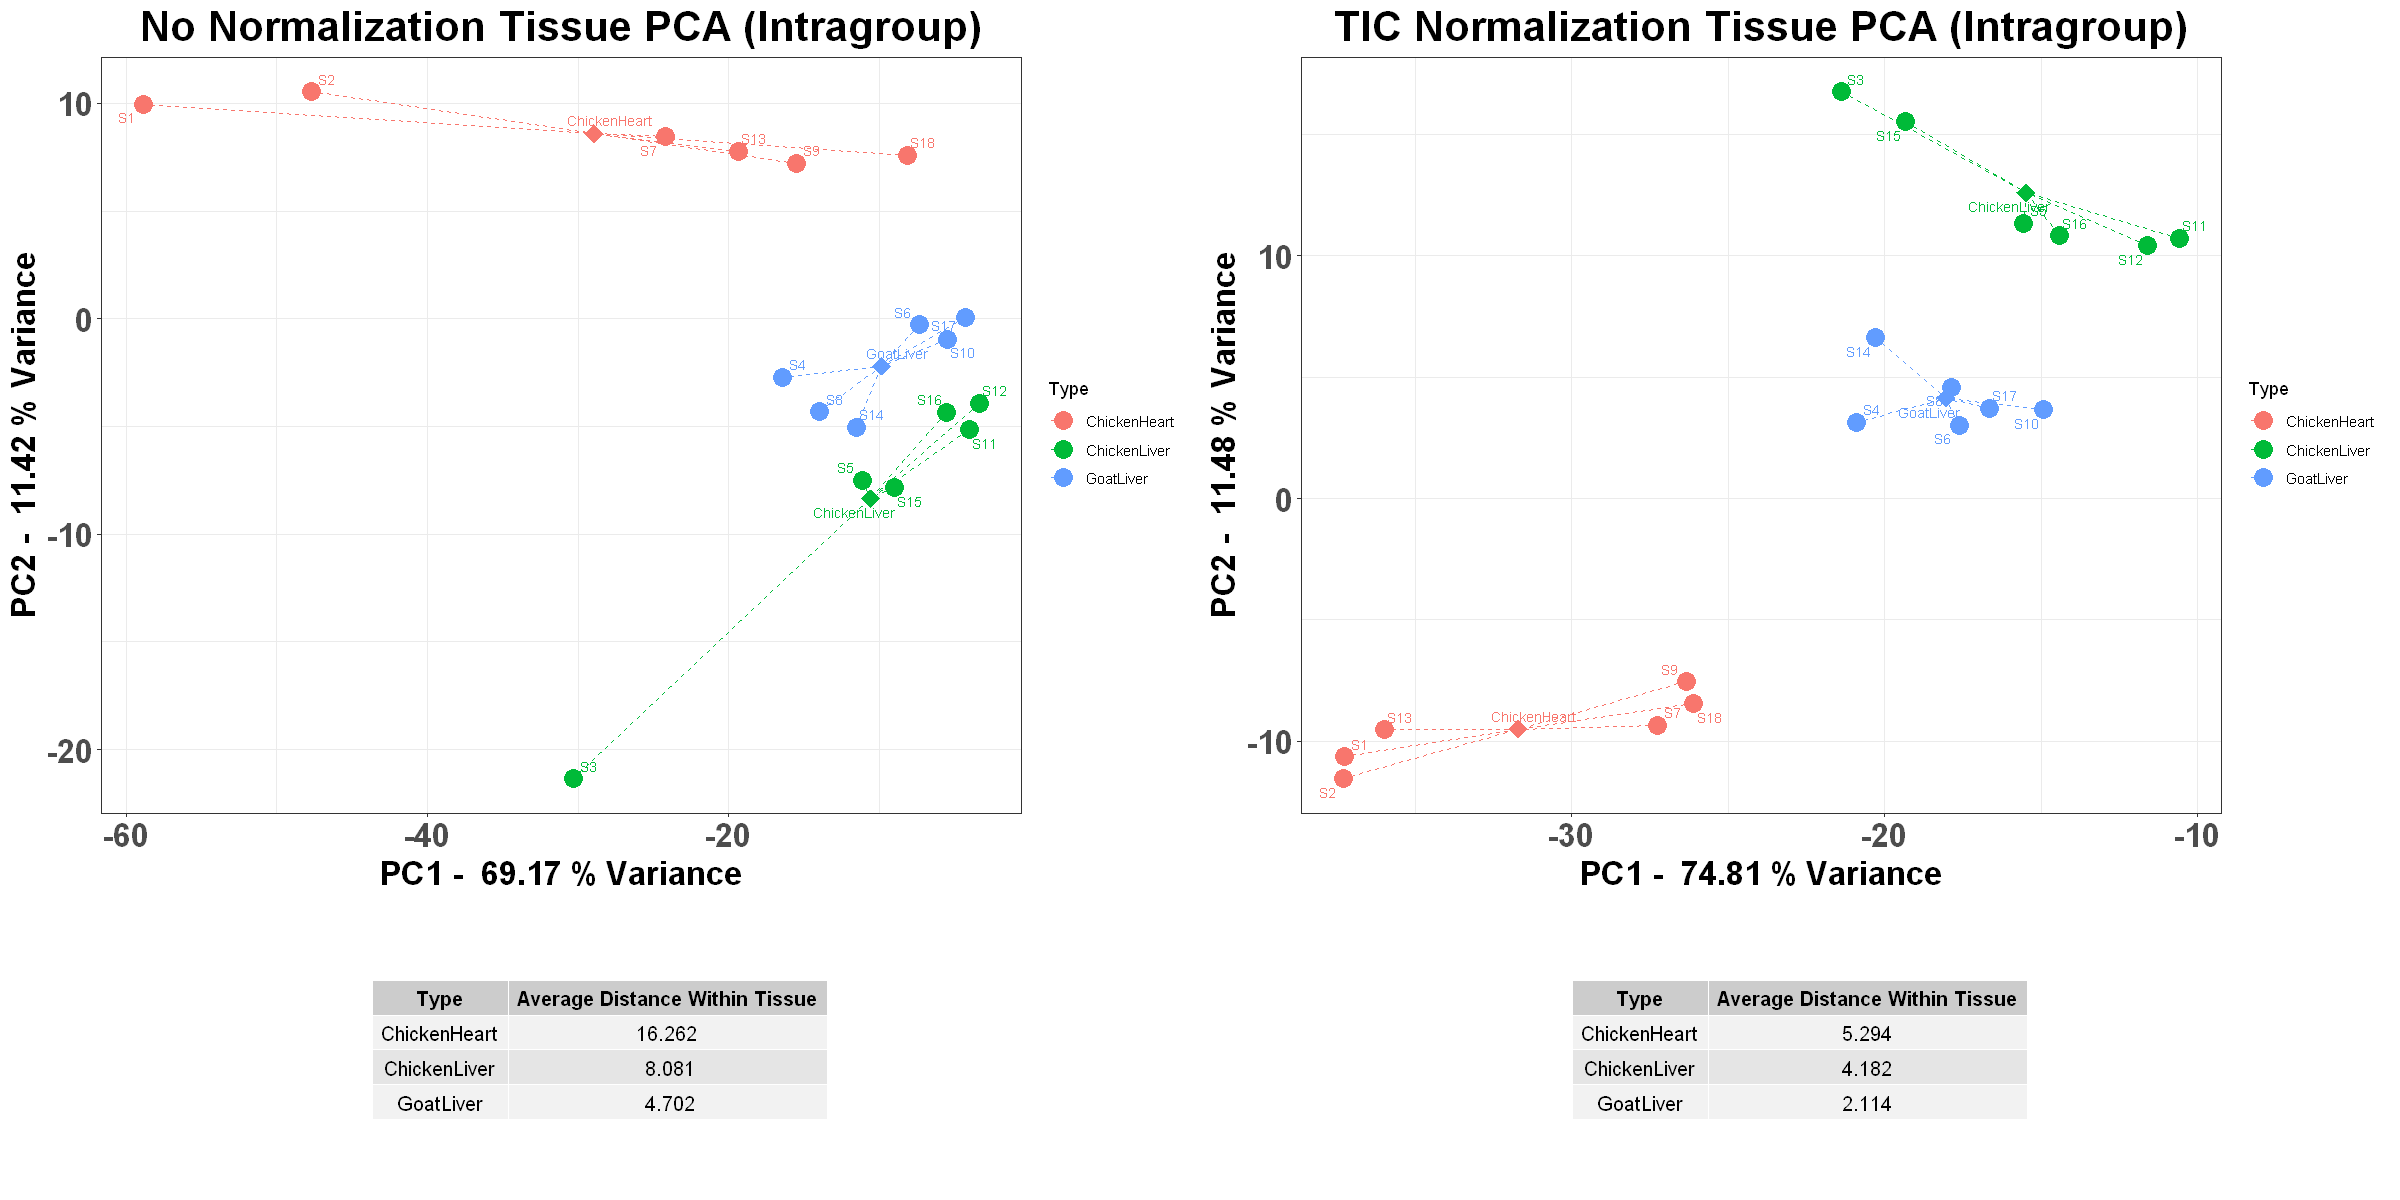

In [40]:
## Overview PCA plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 10)  # Adjust width and height as desired 
combined_plots <- grid.arrange(combined_plot_intra, combined_plot_TIC_intra, nrow = 1)
print(combined_plots)

<u><b>Intergroup Tissue PCA Plot</b></u>

Intergroup tissue is measured by a pairwise distance calculation between each centroid of tissue groups. It will first measure the centroid of each tissue group in PCA score plot and will create all possible unique pairs of tissue types and for each pair of tissue types, the pairwise Distance between their centroids is calculated. This will represent between-cluster heterogeneity thus the greater the distance, the better the data quality. It is measured like the equation below. 

<div style="text-align: center;">
    <img src="image/Inter_distance.png" alt="Inter_distance.png" style="width:50%;">
</div>

Tissue PCA plot (Intergroup) No normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


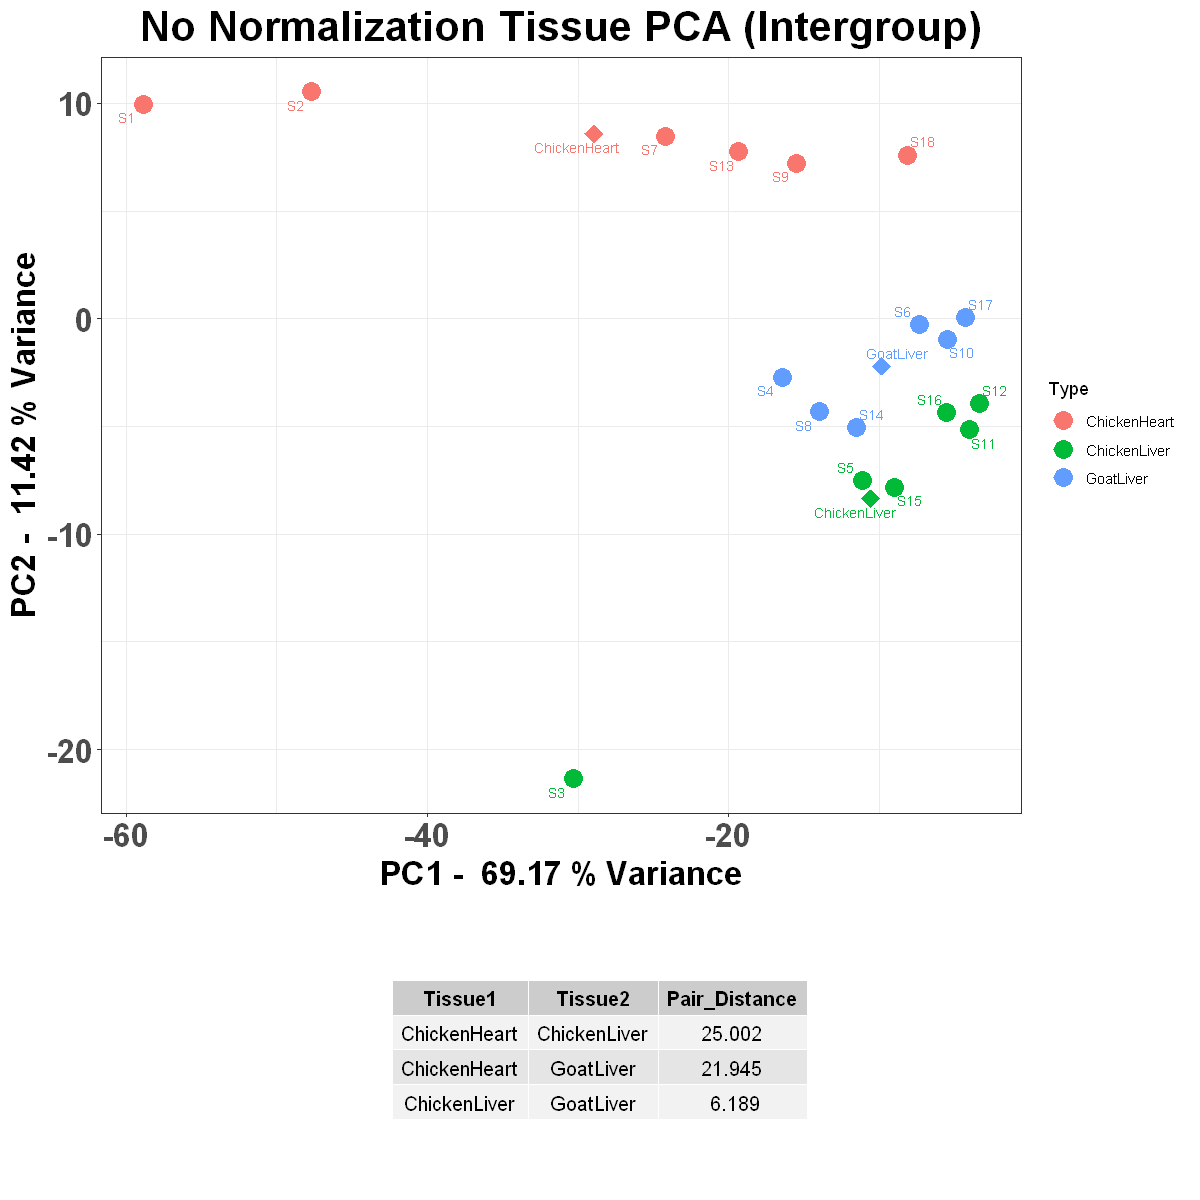

In [103]:
## Intergroup Tissue PCA Plot ##
# No Norm #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set_2)
      
# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2)) # only obtaining PC1 and PC2

# Calculate intergroup distance (pairwise distances) # 
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df <- rbind(centroid_distances_df, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}

# Create the Tissue PCA Plot
tissue_intergroup_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "No Normalization Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table <- tableGrob(centroid_distances_df, rows = NULL)

# Arrange plots and table vertically
combined_plot_inter <- grid.arrange(tissue_intergroup_plot, centroid_table, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intergroup) No normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.\033[0m\n")

print(combined_plot_inter)

Tissue PCA plot (Intergroup) TIC normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


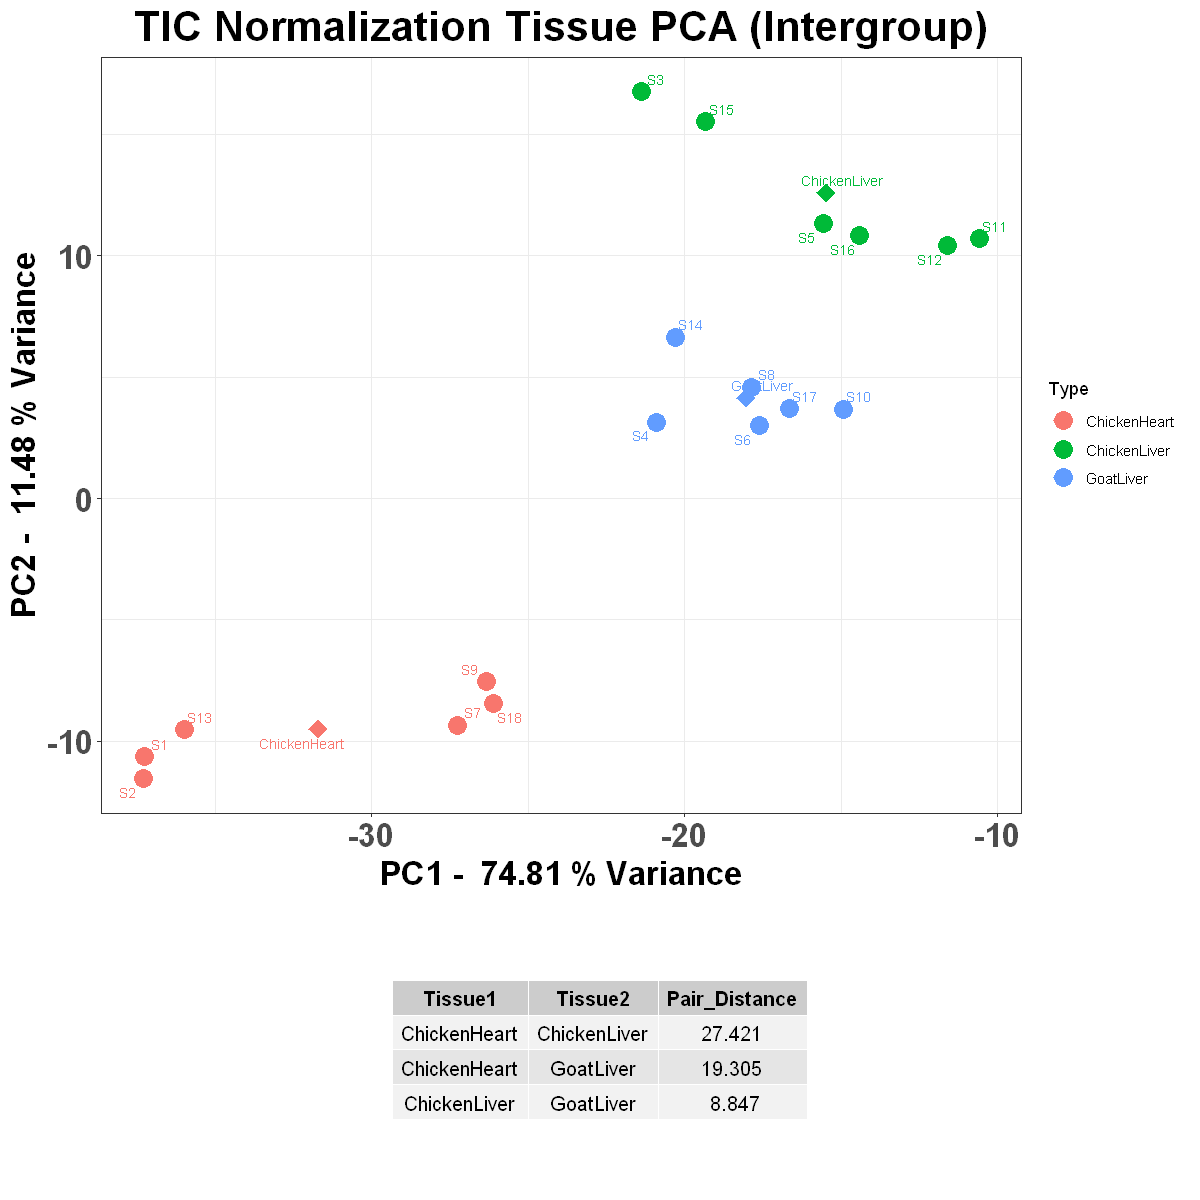

In [104]:
## Intergroup Tissue PCA Plot ##
# TIC norm #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_TIC %>%
  filter(Type %in% sample_set_2)

# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2)) # obtains only PC1 and PC2

# Calculate intergroup distance (pairwise distances)
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df_TIC <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_TIC <- rbind(centroid_distances_df_TIC, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}

# Create the tissue plot
tissue_intergroup_plot_TIC <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "TIC Normalization Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table_TIC <- tableGrob(centroid_distances_df_TIC, rows = NULL)

# Arrange plots and table vertically
combined_plot_TIC_inter <- grid.arrange(tissue_intergroup_plot_TIC, centroid_table_TIC, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intergroup) TIC normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.\033[0m\n")

print(combined_plot_TIC_inter)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]


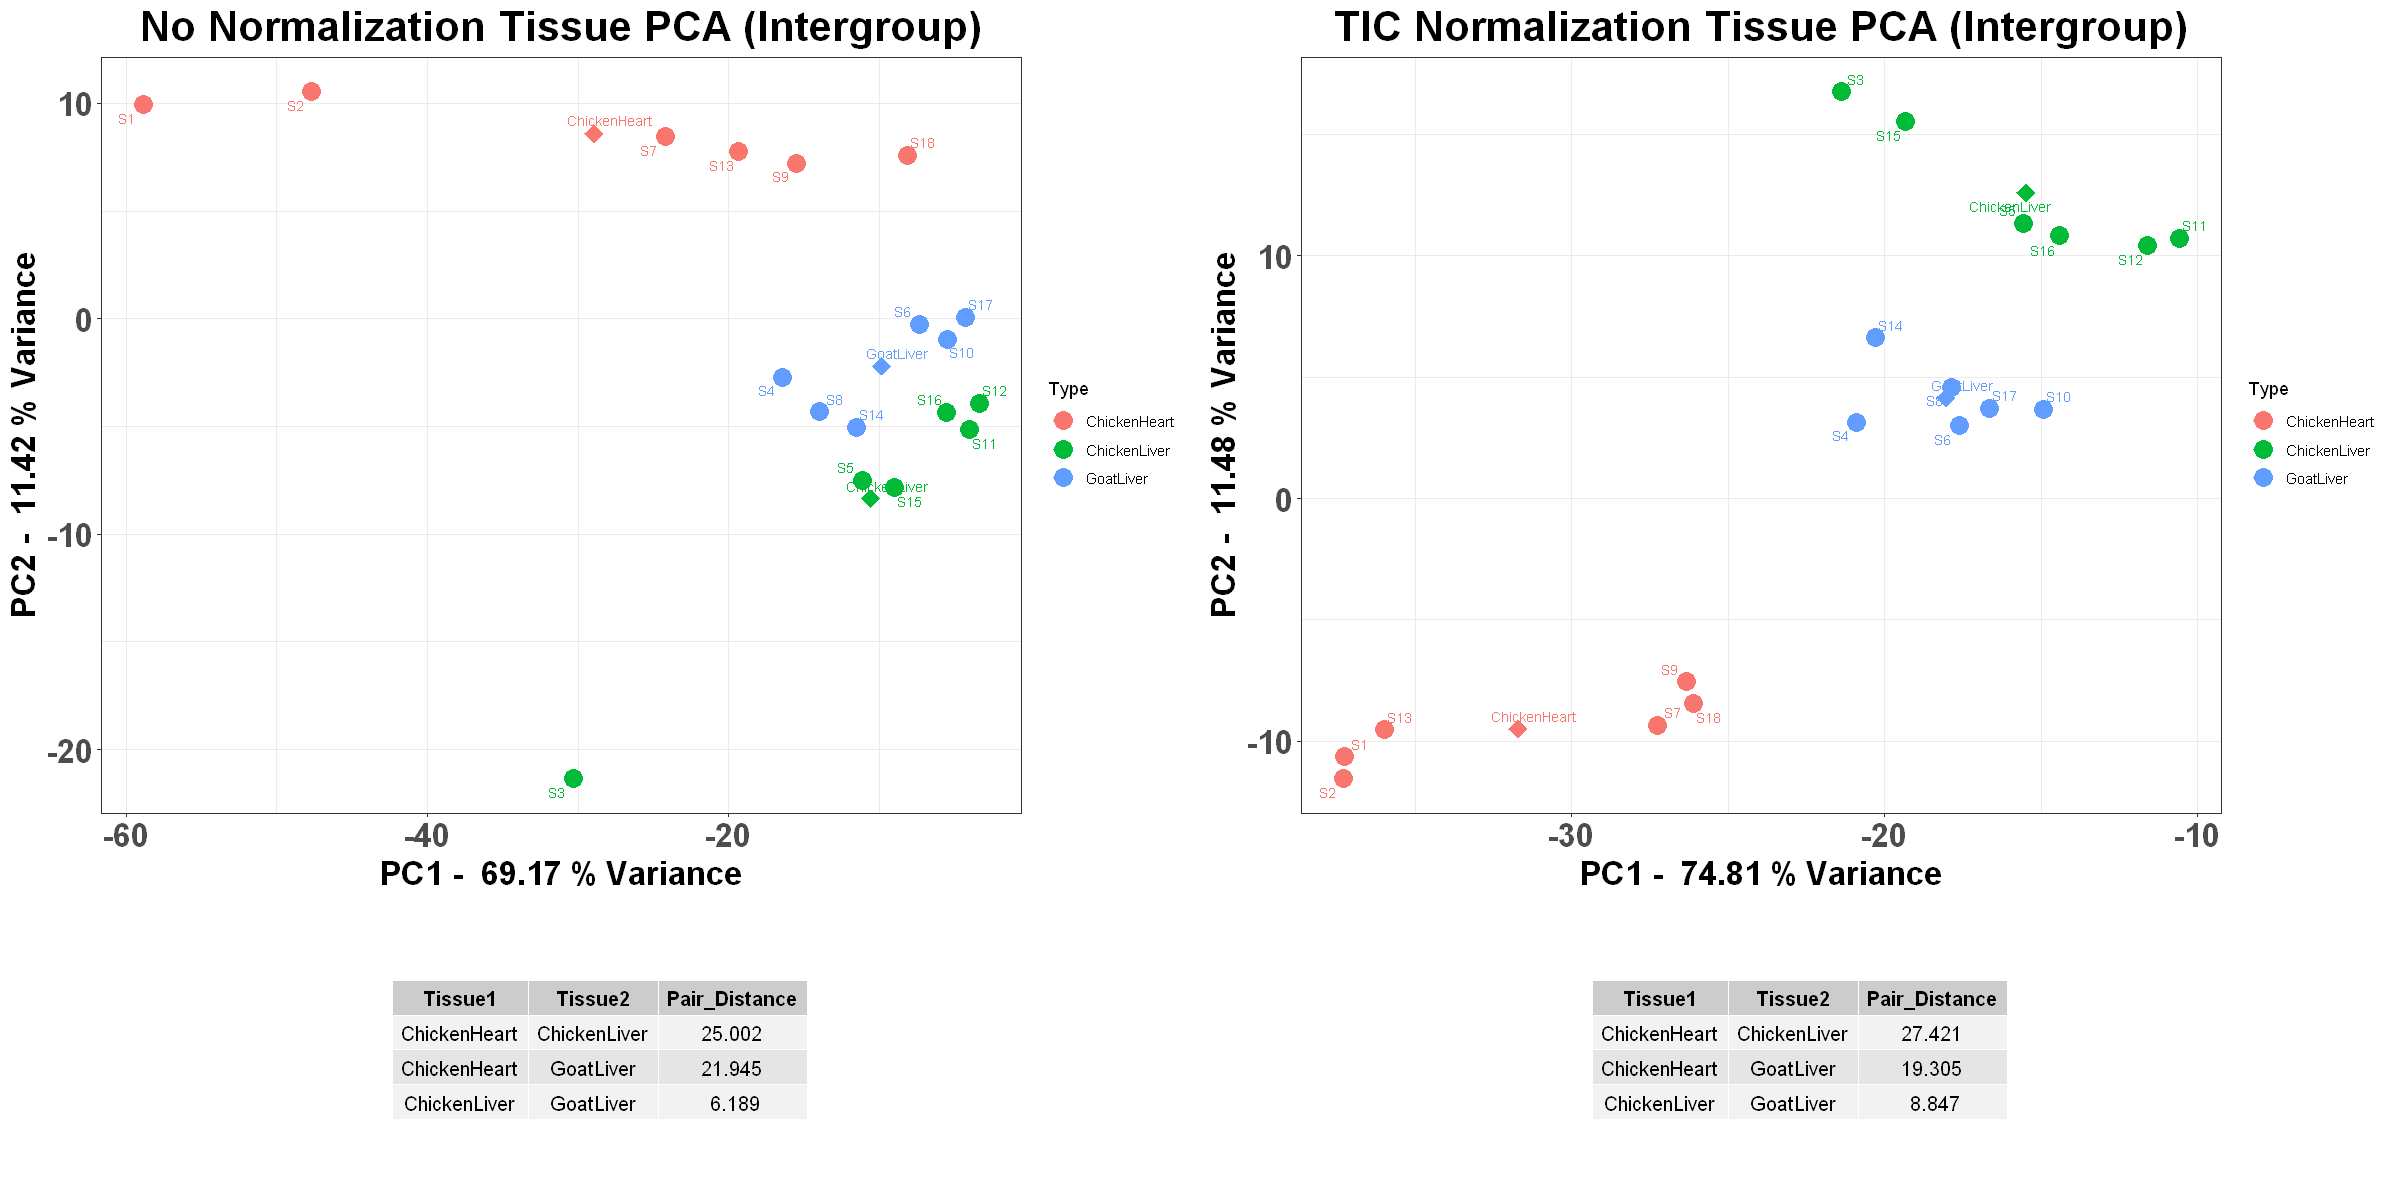

In [105]:
## Overview PCA plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 10)  # Adjust width and height as desired
combined_plots <- grid.arrange(combined_plot_inter, combined_plot_TIC_inter, nrow = 1)
print(combined_plots)

<h2><u><b>Correction</b></u></h2>
<a id="correction_2"></a>

Now, we will correct the batch effect using these packages.

1. [Combat](#combat_2)
2. [WaveICA](#waveica_2)
3. [NormAE (You need to run externally, but you can obtain a set up dataset used for external code](#normae_2)
https://github.com/luyiyun/NormAE

For more Batch Effect Correction try this site: https://www.metaboanalyst.ca/MetaboAnalyst/upload/BatchUpload.xhtml

## Choosing the Dataset ##

In [44]:
# Get user input for normalization type
normalization_type <- readline(prompt = "Please choose a dataset to correct. Enter 'no' for No Normalization or 'tic' for TIC Normalization: ")

# Assign the appropriate data frame based on user input
if (tolower(normalization_type) == "no") {
  combined_batch_data_df_corr <- combined_batch_data_df_2
  combined_batch_info_data_df_corr <- combined_batch_info_data_2
    
} else if (tolower(normalization_type) == "tic") {
  combined_batch_data_df_corr <- combined_batch_data_df_TIC_2
  combined_batch_info_data_df_corr <- combined_batch_info_data_TIC_2
    
} else {
  stop("Invalid input. Please enter 'no' or 'tic'.")
}

In [45]:
# checking dataset
check_dataset <- readline(prompt = "Would you like to check the dataset? (yes/no): ")

# print the dataset based on user input
if (tolower(check_dataset) == "yes") {
  print(head(combined_batch_data_df_corr))
} else if (tolower(check_dataset) == "no") {
  cat("Dataset will not be printed.\n")
} else {
  cat("Invalid input. Dataset will not be printed.\n")
}

Dataset will not be printed.


## 1. Combat ##
<a id="combat_2"></a>

In [61]:
# Installing packages to run Combat

# Installing devtools
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}
library(devtools)

# Installing SVA via BiocManager or Github
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

# From BiocManager
tryCatch({
  BiocManager::install("sva")
  cat("\033[1m'sva' installed successfully from Bioconductor.\033[0m\n")
}, error = function(e) {
  # If failed, installing from GitHub
  cat("\033[1mFailed to install 'sva' from Bioconductor. Attempting to install from GitHub...\033[0m\n")
  tryCatch({
    devtools::install_github("jtleek/sva", dependencies = TRUE)
    cat("\033[1m'sva' installed successfully from GitHub.\033[0m\n")
  }, error = function(e) {
    cat("\033[1mFailed to install 'sva' from GitHub as well.\033[0m\n")
  })
})

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.0 (2024-04-24 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'sva'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.4.0/library
  packages:
    boot, foreign, KernSmooth, MASS, nlme, survival

Old packages: 'backports', 'bslib', 'cli', 'colorspace', 'crayon', 'digest',
  'evaluate', 'ggrepel', 'highr', 'knitr', 'openxlsx', 'pbdZMQ', 'pkgload',
  'ps', 'Rcpp', 'rlang', 'rmarkdown', 'roxygen2', 'tinytex', 'uuid', 'xfun',
  'yaml'



'sva' installed successfully from Bioconductor.


In [47]:
## Combat ## 
# load the packages
library(devtools)
library(sva)

# obtaining peak_data
row_names <- combined_batch_data_df_corr[, 1] 
peak_data <- as.data.frame(combined_batch_data_df_corr[,-(1:3)]) 
rownames(peak_data) <- row_names
peak_data_matrix <- as.matrix(peak_data)
peak_data_matrix <- apply(peak_data_matrix, 2, as.numeric)
rownames(peak_data_matrix) <- row_names

# obtaining batch_info
batch_data <- as.data.frame(t(combined_batch_info_data_df_corr[,-(1)])) 
batch_info_values <- as.vector(unlist(batch_data["batch", , drop = FALSE]))
batch_info_interday <- as.numeric(batch_info_values)
#print(length(batch_info_interday))

# running combat
combat_result_interday <- ComBat(dat = peak_data_matrix, batch = batch_info_interday)

combat_result_interday_df <- as.data.frame(combat_result_interday)

# save dataset as csv file
write.csv(combat_result_interday,
          file = "dataset/combat_interday_corrected_data.csv",
          row.names = TRUE)
cat("\033[1mCombat is successfully completed. Check the result in dataset folder. Also, result has been saved as combat_result_interday variable\033[0m\n")

Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




Combat is successfully completed. Check the result in dataset folder. Also, result has been saved as combat_result_interday variable


## 2. WaveICA ##
<a id="waveica_2"></a>

In [48]:
## Install Packages for WaveICA ##
if (!require(devtools)) {
  install.packages("devtools", quiet = TRUE)
  library(devtools)
}
devtools::install_github("dengkuistat/WaveICA", host = "https://api.github.com", dependencies = TRUE)
cat("\033[1mWaveICA is successfully installed.\033[0m\n")

Using GitHub PAT from the git credential store.

Skipping install of 'WaveICA' from a github remote, the SHA1 (5c091801) has not changed since last install.
  Use `force = TRUE` to force installation



WaveICA is successfully installed.


In [49]:
## WaveICA ##
# load packages
library(devtools)
library(WaveICA)

# obtaining peak_data
row_names <- combined_batch_data_df_corr[, 1]
peak_data <- as.data.frame(combined_batch_data_df_corr[,-(1:3)])
rownames(peak_data) <- row_names
peak_data_trans <- as.data.frame(t(peak_data))
peak_data_trans <- sapply(peak_data_trans, as.numeric)
rownames(peak_data_trans) <- colnames(peak_data)

# Convert peak_data_trans to a matrix
peak_data_matrix <- as.matrix(peak_data_trans)

# Keep the row names from peak_data_trans in the matrix
rownames(peak_data_matrix) <- rownames(peak_data_trans)

# obtaining batch_info
batch_data <- as.data.frame(t(combined_batch_info_data_df_corr[,-(1)]))
batch_info_values <- as.vector(unlist(batch_data["batch", , drop = FALSE]))
batch_info_interday <- as.numeric(batch_info_values)
#print(length(batch_info_interday)) # 126 samples

# running waveICA
waveica_result_interday_matrix <- WaveICA(peak_data_matrix, batch = batch_info_interday, group = NULL)
waveica_result_interday <- as.data.frame(waveica_result_interday_matrix[["data_wave"]]) # 126 obs of 120 variables

# save dataset as csv file
write.csv(waveica_result_interday,
          file = "dataset/waveica_interday_corrected_data.csv",
          row.names = TRUE)
cat("\033[1mWaveICA is successfully completed. Check the result in dataset folder. Also, result has been saved as waveica_result_interday variable\033[0m\n")

Warning message:
"replacing previous import 'pROC::cov' by 'stats::cov' when loading 'WaveICA'"
Warning message:
"replacing previous import 'pROC::smooth' by 'stats::smooth' when loading 'WaveICA'"
Warning message:
"replacing previous import 'pROC::var' by 'stats::var' when loading 'WaveICA'"
Warning message:
"package 'waveslim' was built under R version 4.4.1"
Loading required package: multitaper

Warning message:
"package 'multitaper' was built under R version 4.4.1"

waveslim: Wavelet Method for 1/2/3D Signals (version = 1.8.5)




######Decomposition 1 ########
######Decomposition 2 ########
######Decomposition 3 ########
######Decomposition 4 ########
######Decomposition 5 ########
######Decomposition 6 ########
######Decomposition 7 ########
######Decomposition 8 ########
######Decomposition 9 ########
######Decomposition 10 ########
######Decomposition 11 ########
######Decomposition 12 ########
######Decomposition 13 ########
######Decomposition 14 ########
######Decomposition 15 ########
######Decomposition 16 ########
######Decomposition 17 ########
######Decomposition 18 ########
######Decomposition 19 ########
######Decomposition 20 ########
######Decomposition 21 ########
######Decomposition 22 ########
######Decomposition 23 ########
######Decomposition 24 ########
######Decomposition 25 ########
######Decomposition 26 ########
######Decomposition 27 ########
######Decomposition 28 ########
######Decomposition 29 ########
######Decomposition 30 ########
######Decomposition 31 ########
######Decompositi

Warning message:
"package 'JADE' was built under R version 4.4.1"


[1] "Removing 0 components with P value less than 0.05"
######### ICA 2 #############
[1] "Removing 0 components with P value less than 0.05"
######### ICA 3 #############
[1] "Removing 0 components with P value less than 0.05"
######### ICA 4 #############
[1] "Removing 2 components with P value less than 0.05"
######### ICA 5 #############
[1] "Removing 13 components with P value less than 0.05"
######### ICA 6 #############
[1] "Removing 20 components with P value less than 0.05"
######### ICA 7 #############
[1] "Removing 20 components with P value less than 0.05"
######Reconstruction 1 ########
######Reconstruction 2 ########
######Reconstruction 3 ########
######Reconstruction 4 ########
######Reconstruction 5 ########
######Reconstruction 6 ########
######Reconstruction 7 ########
######Reconstruction 8 ########
######Reconstruction 9 ########
######Reconstruction 10 ########
######Reconstruction 11 ########
######Reconstruction 12 ########
######Reconstruction 13 ########
#####

## 3. NormAE ##
<b> (This will only prepare dataset, you will need to run NormAE externally) </b>
<a id="normae_2"></a>

In [51]:
## NormAE ##
# load libraries
library(dplyr)

# dataset preparation
# convert combined_batch_data_df into txt file
write.table(combined_batch_data_df_corr, 
            file = "input/metabolomics_data_normae.txt", 
            sep = ",", 
            quote = FALSE, 
            row.names = FALSE)

# add column for group
batch_info_2_norm <- batch_info_2 %>%
  mutate(group = 1)

# add a new column called "class"
batch_info_2_norm <- batch_info_2_norm %>%
  mutate(class = ifelse(grepl(paste(sample_set_2, collapse = "|"), sample.name), "Subject", "QC"))

# move the first three columns
combined_batch_data_df_norm <- combined_batch_data_df_corr[, -(1:3)]

# check if sample names match column names
names_match <- all(batch_info_2_norm$sample.name %in% colnames(combined_batch_data_df_norm))

if (names_match) {
  print("The sample names in batch_info match the column names of combined_batch_data_df.")
} else {
  print("The sample names in batch_info do not match the column names of combined_batch_data_df. Thus, have adjusted accordingly")
  
  # Extract column names from combined_batch_data_df
  col_names_combined <- colnames(combined_batch_data_df_norm)
  
  # Replace sample names in batch_info with column names from combined_batch_data_df
  batch_info_2_norm$sample.name <- col_names_combined
}

# make it txt file
# we need two txt file one batch_info and one normae
write.table(batch_info_2_norm,
            file = "input/batch_info_normae.txt",
            sep = ",",
            row.names = FALSE,
            quote = FALSE)
cat("\033[1mPlease go to https://github.com/luyiyun/NormAE and run NormAE and put Rec_nobe.csv and Ys.csv into dataset folder. Then, run the below cell \033[0m\n")

# After obtaining two txt file follow these steps to run NormAE
# Step 1: Go to https://github.com/luyiyun/NormAE
# Step 2: Click code and download zip
# Step 3: Open zip file (vs code/pycharm/python)
# Step 4: Check if dataset works with using dataset script (at the last you can change file path into normae and batch_info file path
# Step 5: If dataset works, open command (command prompt) and run underneath example code
# Step 6: python -m visdom.server (command to open visdom)
# Step 7: python main.py --task train --meta_data data\data12\norm.txt --device CPU --sample_data data\data12\batch.txt --visdom_port 8097 --save data\Training12 (command to train, change the file path)
# Step 8: python main.py --task remove --meta_data data\data12\norm.txt --sample_data data\data12\batch.txt --device CPU --visdom_port 8097 --save data\Training12 --load data/Training12/models.pth (command to correct batch, change the file path)
# Step 9: put on two files after NormAE (Rec_nobe.csv and Ys.csv) into dataset folder

[1] "The sample names in batch_info do not match the column names of combined_batch_data_df. Thus, have adjusted accordingly"
Please go to https://github.com/luyiyun/NormAE and run NormAE and put Rec_nobe.csv and Ys.csv into dataset folder. Then, run the below cell 


<u><b><h3>Here requires yours input/changes </b></u></h3>

<h4><b> Please enter a correct csv file path accordingly whether it is no normalization or TIC normalization dataset after uploading the NormAE corrected dataset into dataset folder. If you have uploaded in a correct folder, you can put file path like "dataset/name_of_your_file.csv".</b></h4>

In [52]:
## extract normae data from dataset ## 
normae_result_interday <- read.csv("dataset/Rec_nobe_no_norm.csv", ## change file name accordingly to your Rec_nobe file ##
                                  header = TRUE,
                                  stringsAsFactors = FALSE,
                                  row.names = 1)

batch_info_normae <- read.csv("dataset/Ys_no_norm.csv", ## change file name accordingly to your Ys file ##
                            header = TRUE,
                            stringsAsFactors = FALSE)

cat("\033[1mData preparation of NormAE is successfully completed. Check the result in dataset file. Also, result has been saved as normae_result_interday variable. \033[0m\n")

Data preparation of NormAE is successfully completed. Check the result in dataset file. Also, result has been saved as normae_result_interday variable. 


<h2><u><b>Correction_Results</b></u></h2>
<a id="correction_results_2"></a>

1. [QCS_RSD](#corr_qcs_rsd_2)
2. [QCS_Intensity_Plot](#corr_qcs_intensity_2)
3. [QCS_Violin_Plot](#corr_qcs_violin_2)
4. [PCA Plot](#corr_pca_2)
5. [QCS_PCA_Plot](#corr_qcs_pca_2)
6. [Tissue_RSD](#corr_tissue_rsd_2)
7. [Tissue PCA Plot (Intra/Intergroup)](#corr_tissue_pca_2)

## 1. QCS RSD ##
<a id="corr_qcs_rsd_2"></a>

In [62]:
## Run these functions first ##

# 1: Function to extract tissue samples away
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# 2: Function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# 3: Function to calculate RSD for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 3))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 3)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  return(batch_rsd)
}

In [54]:
## QCS RSD Table ## 
# Combat #
data <- combat_result_interday_df

row_names <- rownames(data)
batch_info_norm <- batch_info_2

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data) 
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
propranolol_data_combat <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
d7_propranolol_data_combat <- cbind(batch_info_columns, d7_propranolol_peak_data)

# usage:
cat("\033[1mRSD for Combat:\033[0m\n")                                   
rsd_propranolol_combat <- calculate_batch_rsd(propranolol_data_combat, propranolol_mz_value_2)
cat("m/z value:", propranolol_mz_value_2, "\n")
print(rsd_propranolol_combat)

rsd_d7_propranolol_combat <- calculate_batch_rsd(d7_propranolol_data_combat, d7_propranolol_mz_value_2)
cat("m/z value:", d7_propranolol_mz_value_2, "\n")
print(rsd_d7_propranolol_combat)

RSD for Combat:
m/z value: 260.186 
       Batch     RSD
1 Intraday 1 57.824%
2 Intraday 2 48.445%
3 Intraday 3 38.625%
4   Interday 48.241%
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 59.228%
2 Intraday 2 47.314%
3 Intraday 3 39.031%
4   Interday 48.623%


In [63]:
## QCS RSD Table ##
# WaveICA #
data <- as.data.frame(t(waveica_result_interday)) 

# or if you are reading directly from file 
#data <- read.csv("dataset_2/waveica_interday_corrected_data.csv", # check file path 
                 #header = TRUE,
                 #stringsAsFactors = FALSE,
                 #row.names = 1) 
#data <- as.data.frame(t(data))

row_names <- rownames(data)
batch_info_norm <- batch_info_2

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
propranolol_data_wave <- cbind(batch_info_columns, propranolol_peak_data)
d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
d7_propranolol_data_wave <- cbind(batch_info_columns, d7_propranolol_peak_data)

# usage:
cat("\033[1mRSD for WaveICA:\033[0m\n")                                   
rsd_propranolol_wave <- calculate_batch_rsd(propranolol_data_wave, propranolol_mz_value_2)
cat("m/z value:", propranolol_mz_value_2, "\n")
print(rsd_propranolol_wave)

rsd_d7_propranolol_wave <- calculate_batch_rsd(d7_propranolol_data_wave, d7_propranolol_mz_value_2)
cat("m/z value:", d7_propranolol_mz_value_2, "\n")
print(rsd_d7_propranolol_wave)

RSD for WaveICA:
m/z value: 260.186 
       Batch     RSD
1 Intraday 1  42.24%
2 Intraday 2 33.074%
3 Intraday 3 35.513%
4   Interday 36.969%
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 39.164%
2 Intraday 2 30.042%
3 Intraday 3  32.49%
4   Interday 33.924%


In [57]:
## QCS RSD Table ## 
# NormAE #
data <- normae_result_interday

row_names <- rownames(data)
batch_info_norm <- batch_info_normae

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set_2)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_2, drop = FALSE]
propranolol_data_norm <- cbind(batch_info_columns, propranolol_peak_data)
propranolol_data_norm$batch <- propranolol_data_norm$batch + 1

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_2, drop = FALSE]
d7_propranolol_data_norm <- cbind(batch_info_columns, d7_propranolol_peak_data)
d7_propranolol_data_norm$batch <- d7_propranolol_data_norm$batch + 1

# usage:
cat("\033[1mRSD for NormAE:\033[0m\n")                    
rsd_propranolol_norm <- calculate_batch_rsd(propranolol_data_norm, propranolol_mz_value_2)
cat("m/z value:", propranolol_mz_value_2, "\n")
print(rsd_propranolol_norm)

rsd_d7_propranolol_norm <- calculate_batch_rsd(d7_propranolol_data_norm, d7_propranolol_mz_value_2)
cat("m/z value:", d7_propranolol_mz_value_2, "\n")
print(rsd_d7_propranolol_norm)

RSD for NormAE:
m/z value: 260.186 
       Batch     RSD
1 Intraday 1 24.793%
2 Intraday 2 25.696%
3 Intraday 3 23.215%
4   Interday  24.37%
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 29.906%
2 Intraday 2 30.491%
3 Intraday 3 28.042%
4   Interday 29.222%


In [64]:
## RSD Overview Table ##

library(kableExtra)
library(htmltools)
library(IRdisplay)

# propranolol #
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  Combat_RSD = rsd_propranolol_combat[2],
  WaveICA_RSD = rsd_propranolol_wave[2],
  NormAE_RSD = rsd_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_pro) <- c(paste("m/z value:", propranolol_mz_value_2), "Combat", "WaveICA", "NormAE")

# Displaying overview RSD table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

# D7-propranolol # 
overview_table_d7_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  Combat_RSD = rsd_d7_propranolol_combat[2],
  WaveICA_RSD = rsd_d7_propranolol_wave[2],
  NormAE_RSD = rsd_d7_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_d7_pro) <- c(paste("m/z value:", d7_propranolol_mz_value_2), "Combat", "WaveICA", "NormAE")


# Displaying overview RSD table
display_rsd_table_d7_pro <- kable(overview_table_d7_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_d7_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table D7-Propranolol</h2>", 
                               as.character(display_rsd_table_d7_pro))

# Save HTML table to a file
display_html(display_rsd_table_d7_pro)

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 57.824% 
 42.24% 
 24.793% 
 
 
 Intraday 2 
 48.445% 
 33.074% 
 25.696% 
 
 
 Intraday 3 
 38.625% 
 35.513% 
 23.215% 
 
 
 Interday 
 48.241% 
 36.969% 
 24.37%

Overview RSD Table D7-Propranolol 
 
 
 m/z value: 267.187 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 59.228% 
 39.164% 
 29.906% 
 
 
 Intraday 2 
 47.314% 
 30.042% 
 30.491% 
 
 
 Intraday 3 
 39.031% 
 32.49% 
 28.042% 
 
 
 Interday 
 48.623% 
 33.924% 
 29.222%

## 2. Intensity Plot ##
<a id="corr_qcs_intensity_2"></a>

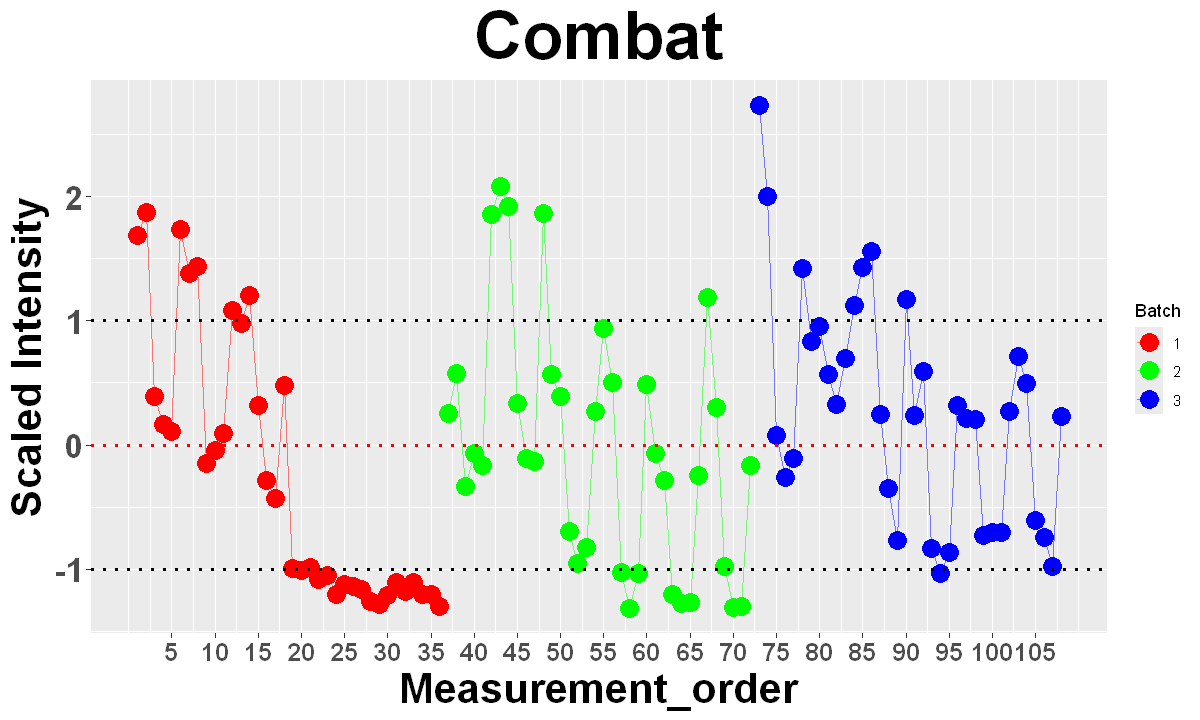

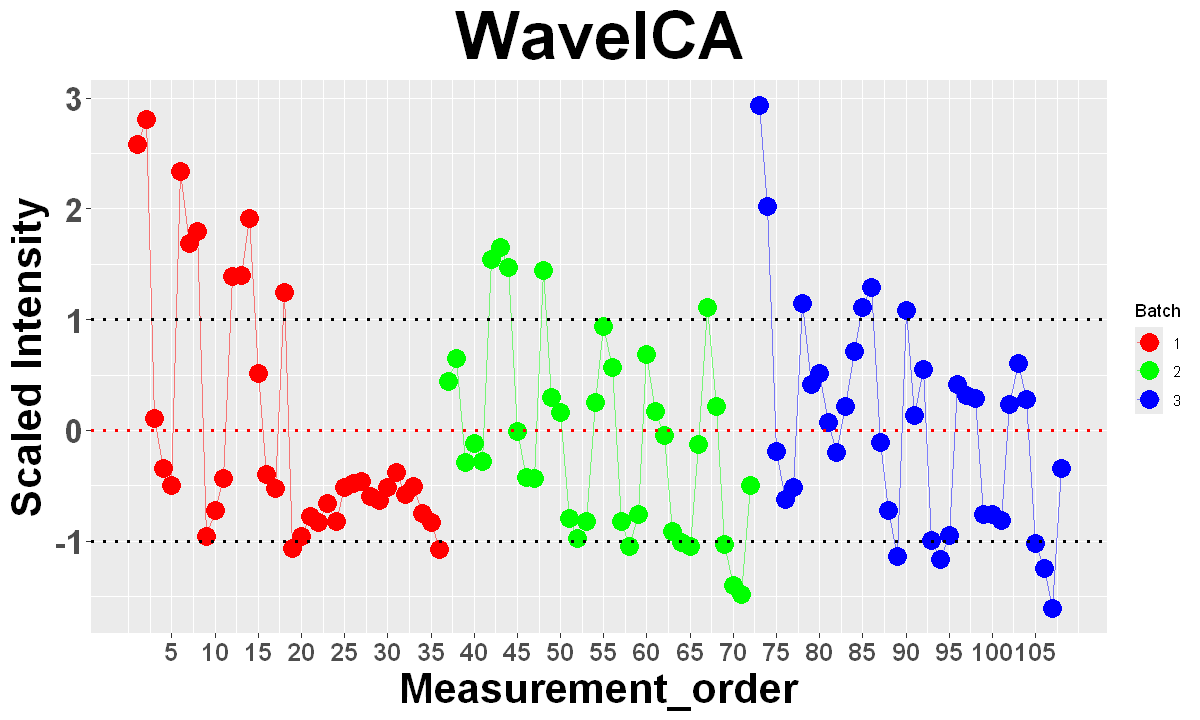

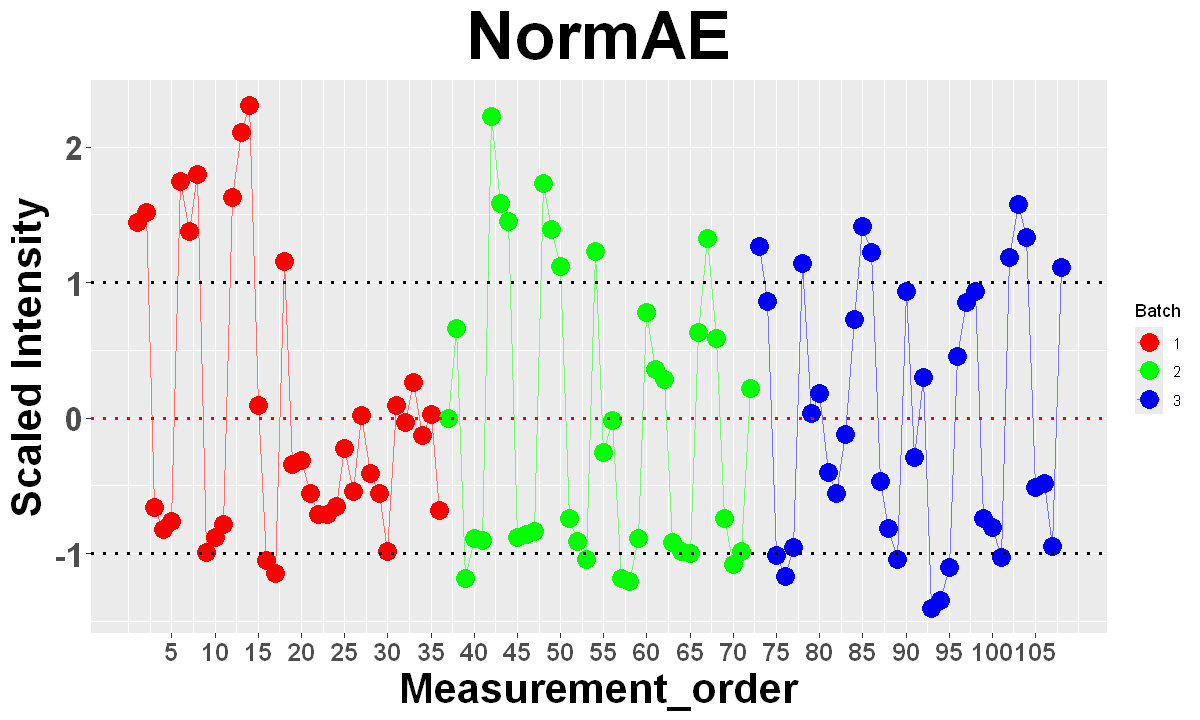

In [65]:
## Intensity Plot (Intensity vs Measurement Order ##

# Combat #
# reading combat dataset
combined_batch_info_data_combat <- combat_result_interday_df

batch_info <- batch_info_2
                       
combined_batch_info_data_combat <- as.data.frame(t(combined_batch_info_data_combat)) 
combined_batch_info_data_combat <- cbind(batch_info[,-1], combined_batch_info_data_combat)  

# extract qcs data (get rid of tissue samples)
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_combat, sample_set_2)
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ] # ordering by its batch
batch <- qcs_batch_info_data_ordered$batch # adding batch column

# ordering by s_value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

# extract propranolol only
propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE]
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values) # scaling intensity plot

# add measurement order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

# make a data frame for intensity plot
plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

# add rownames to plot_data_scaled
rownames(plot_data_scaled) <- rownames(qcs_batch_info_data_ordered)

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)
options(repr.plot.width = 10, repr.plot.height = 6) # adjust the intensity plot format as you desired

# intensity plot with mean and standard deviation lines
library(ggplot2)
intensity_plot_combat <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  
  geom_line(aes(group = Batch), alpha = 0.5) + 
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") + 
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) + 
  scale_color_manual(values = c("1" = "red", "2" = "green", "3" = "blue")) +  
  ggtitle("Combat") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"), 
    axis.title.x = element_text(size = 25, face = "bold"), 
    axis.title.y = element_text(size = 25, face = "bold"),  
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot_combat)

# WaveICA #
# reading waveica dataset
combined_batch_info_data_wave <- as.data.frame(t(waveica_result_interday))

batch_info <- batch_info_2
                       
combined_batch_info_data_wave <- as.data.frame(t(combined_batch_info_data_wave)) 
combined_batch_info_data_wave <- cbind(batch_info[,-1], combined_batch_info_data_wave)  

# extract qcs data (get rid of tissue sample)
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_wave, sample_set_2)
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ] 
batch <- qcs_batch_info_data_ordered$batch 

# ordering by batch then s_value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

# extract propranolol intensity
propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE] # 126 obs 1 variable
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values)

# add measurement_order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

# make data frame for intensity plot
plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

# add rownames to plot_data_scaled
rownames(plot_data_scaled) <- rownames(qcs_batch_info_data_ordered)

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# intensity plot with mean and standard deviation lines
library(ggplot2)
intensity_plot_wave <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) + 
  geom_line(aes(group = Batch), alpha = 0.5) + 
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  # Add black dotted line for mean
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") + 
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) + 
  scale_color_manual(values = c("1" = "red", "2" = "green", "3" = "blue")) +  
  ggtitle("WaveICA") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"),  
    axis.title.x = element_text(size = 25, face = "bold"),  
    axis.title.y = element_text(size = 25, face = "bold"),  
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold") 
  )
print(intensity_plot_wave)

# NormAE #
combined_batch_info_data_norm <- normae_result_interday

batch_info <- batch_info_normae

batch_info$batch <- batch_info$batch + 1 # since normae makes batch go from 0 instead of 1

combined_batch_info_data_norm <- as.data.frame(t(combined_batch_info_data_norm)) 
combined_batch_info_data_norm <- cbind(batch_info[,(2:3)], combined_batch_info_data_norm)  

# extract qcs data onl (get rid of tissue sample)
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_norm, sample_set_2)
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ] # ordering by batch
batch <- qcs_batch_info_data_ordered$batch # add batch column

# ordering by batch then s_value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

# extracting propranolol intensity
propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_2, drop = FALSE]
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values)

# add measurement_order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

# make data frame of intensity plot
plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

# add rownames to plot_data_scaled
rownames(plot_data_scaled) <- rownames(qcs_batch_info_data_ordered)

#print(plot_data_scaled) # uncomment to check your intensity plot data frame

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# intensity plot with mean and standard deviation lines
library(ggplot2)
intensity_plot_norm <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  # color = batch
  geom_line(aes(group = Batch), alpha = 0.5) + 
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) + 
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean + standard deviation
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Add gray dotted line for mean - standard deviation
  labs(x = "Measurement_order", y = "Scaled Intensity", color = "Batch") + 
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) +  
  scale_color_manual(values = c("1" = "red", "2" = "green", "3" = "blue")) +  
  ggtitle("NormAE") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"), 
    axis.title.x = element_text(size = 25, face = "bold"), 
    axis.title.y = element_text(size = 25, face = "bold"), 
    axis.text.x = element_text(size = 15, face = "bold"),  
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot_norm)

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]


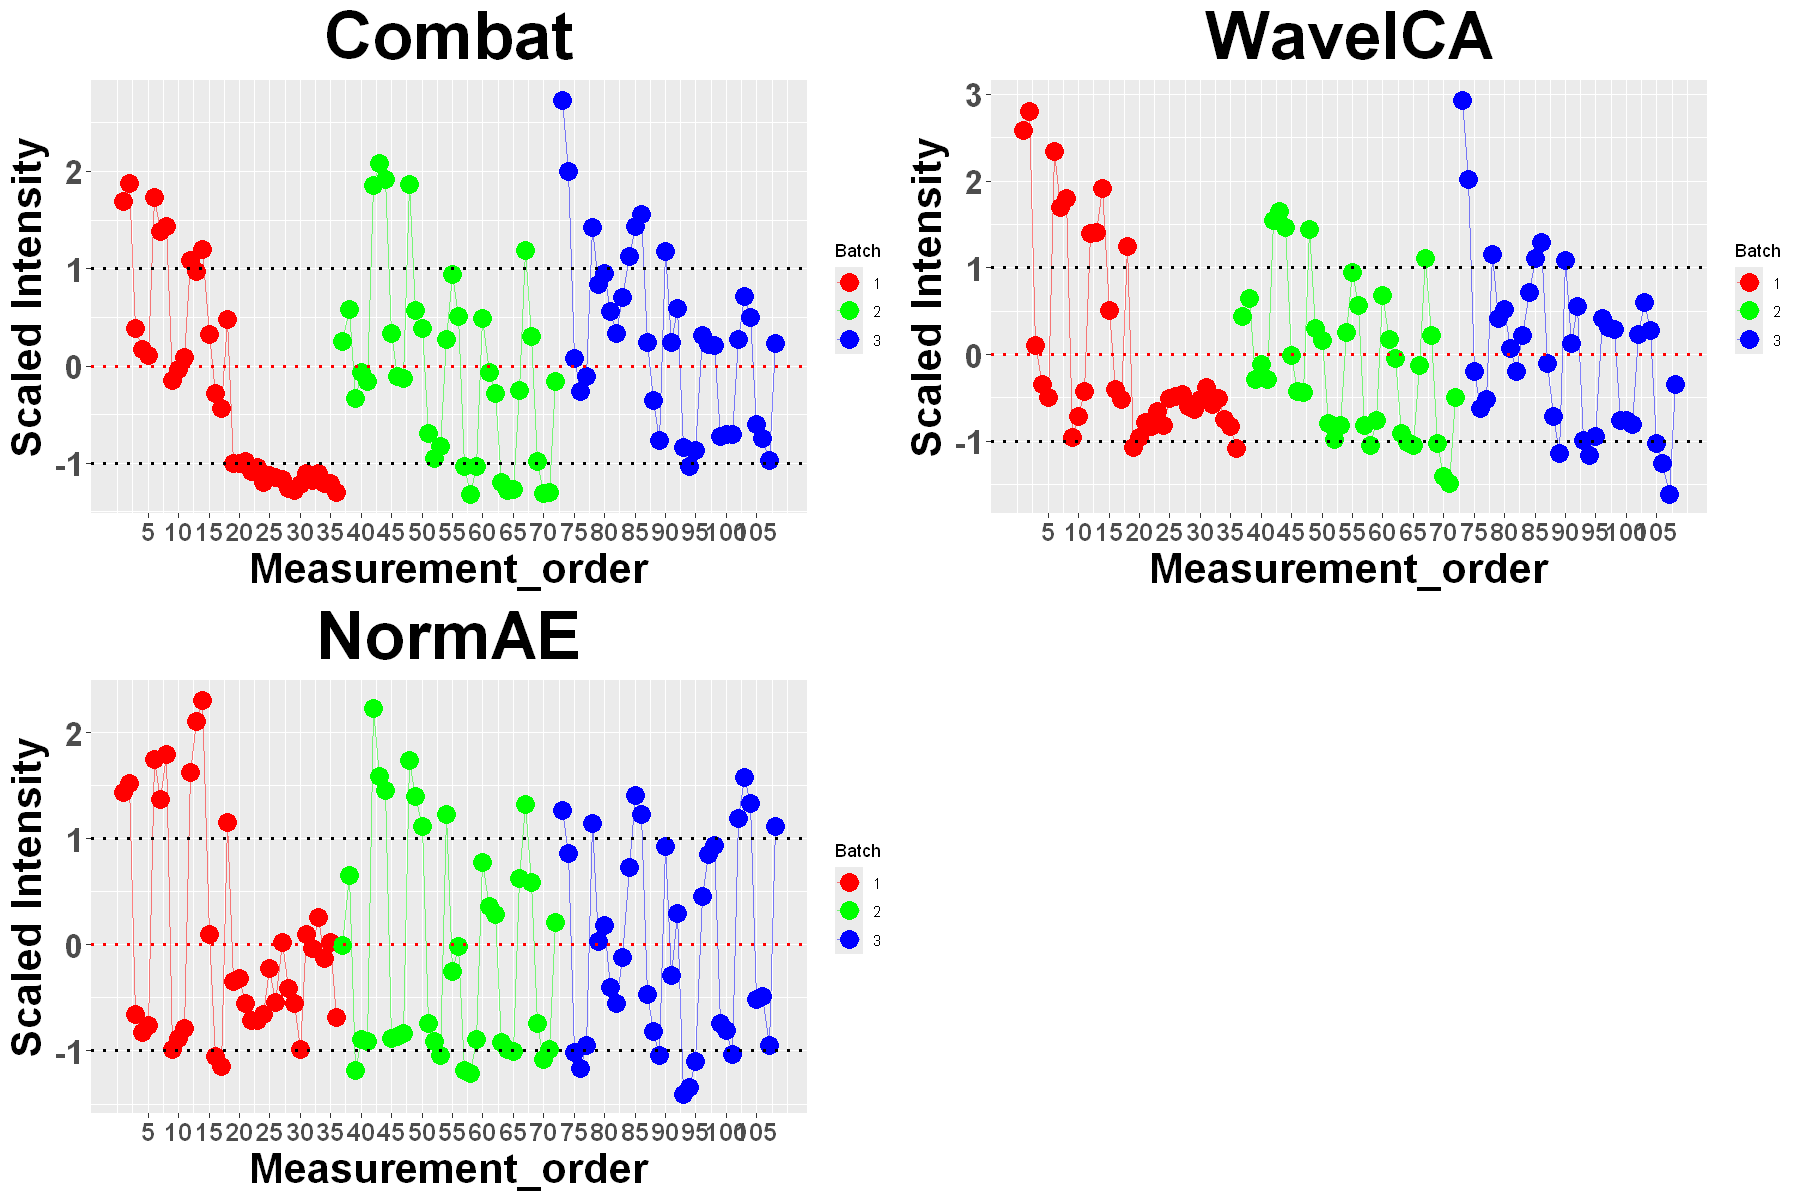

In [66]:
## Overview Intensity PLOT ##
library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 10)
combined_intensity_plots <- grid.arrange(intensity_plot_combat, intensity_plot_wave, intensity_plot_norm, ncol = 2)
print(combined_intensity_plots)

## 3. Violin Plot ##
<a id="corr_qcs_violin_2"></a>

Gray dotted line represents median


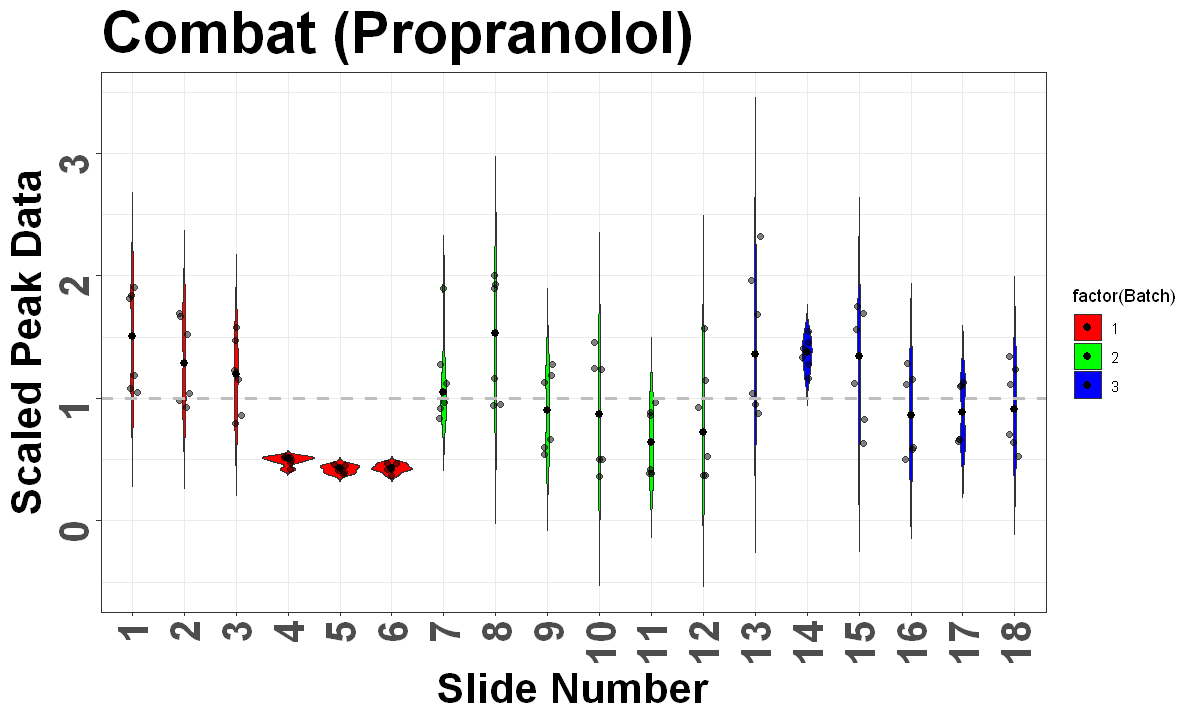

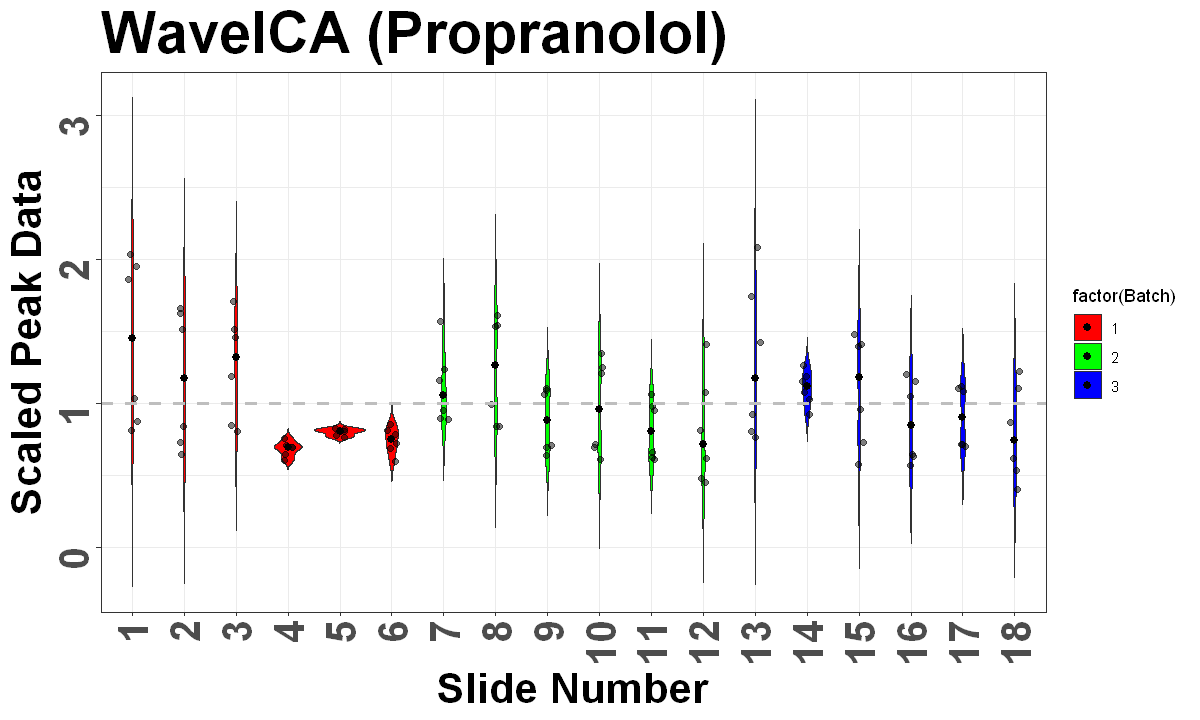

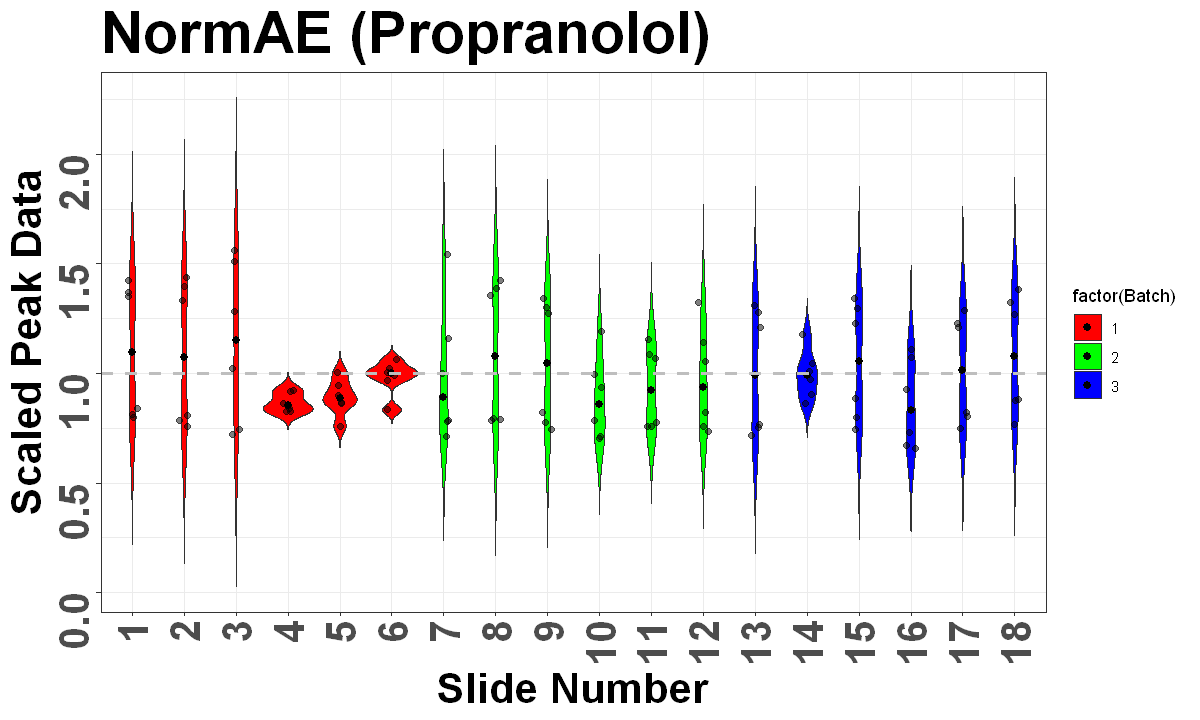

In [67]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Function to scale data by its mean
scale_by_mean <- function(data_frame) {
  mean_value <- mean(data_frame$Value)
  data_frame <- data_frame %>%
    mutate(Value = Value / mean_value)
  return(data_frame)
}

# Transform and prepare the dataset for Combat
propranolol_data_trans_combat <- as.data.frame(t(propranolol_data_combat))
propranolol_data_trans_combat[] <- lapply(propranolol_data_trans_combat, as.numeric)

# Extract slide number
slide_number_combat <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_combat))
slide_number_combat <- as.numeric(slide_number_combat)

# Create violin plot data frame for Combat
violin_data_combat <- data.frame(
  Slide = slide_number_combat,
  Batch = propranolol_data_combat$batch,
  Value = unlist(propranolol_data_trans_combat[3, ])
)

# Scale Combat data by its mean
violin_data_combat <- scale_by_mean(violin_data_combat)

# Define the colors for the first three batches
manual_colors <- c("1" = "Red", "2" = "Green", "3" = "Blue")

# Plot function to ensure consistent scaling
plot_violin <- function(data, title) {
  unique_batches <- unique(data$Batch)
  additional_batches <- setdiff(unique_batches, names(manual_colors))
  
  if (length(additional_batches) > 0) {
    additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
    additional_colors <- setNames(additional_colors, additional_batches)
  } else {
    additional_colors <- c()
  }
  
  all_colors <- c(manual_colors, additional_colors)
  
  ggplot(data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
    geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
    stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
    geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
    geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
    scale_fill_manual(values = all_colors) +
    labs(x = "Slide Number", y = "Scaled Peak Data", title = title) +
    theme_bw() +
    theme(
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.title = element_text(face = "bold", size = 25),  
      plot.title = element_text(face = "bold", size = 35),  
      axis.text = element_text(size = 20)
    )
}

# Plot the data with each dataset scaled by its mean
cat("\033[1mGray dotted line represents median\033[0m\n")
options(repr.plot.width = 10, repr.plot.height = 6)

# Combat Plot
violin_plot_combat_jit <- plot_violin(violin_data_combat, "Combat (Propranolol)")
print(violin_plot_combat_jit)

# Transform and prepare the dataset for WaveICA
propranolol_data_trans_wave <- as.data.frame(t(propranolol_data_wave))
propranolol_data_trans_wave[] <- lapply(propranolol_data_trans_wave, as.numeric)

# Extract slide number
slide_number_wave <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_wave))
slide_number_wave <- as.numeric(slide_number_wave)

# Create violin plot data frame for WaveICA
violin_data_wave <- data.frame(
  Slide = slide_number_wave,
  Batch = propranolol_data_wave$batch,
  Value = unlist(propranolol_data_trans_wave[3, ])
)

# Scale WaveICA data by its mean
violin_data_wave <- scale_by_mean(violin_data_wave)

# WaveICA Plot
violin_plot_wave_jit <- plot_violin(violin_data_wave, "WaveICA (Propranolol)")
print(violin_plot_wave_jit)

# Transform and prepare the dataset for NormAE
propranolol_data_trans_norm <- as.data.frame(t(propranolol_data_norm))
propranolol_data_trans_norm[] <- lapply(propranolol_data_trans_norm, as.numeric)

# Extract slide number
slide_number_norm <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_norm))
slide_number_norm <- as.numeric(slide_number_norm)

# Create violin plot data frame for NormAE
violin_data_norm <- data.frame(
  Slide = slide_number_norm,
  Batch = propranolol_data_norm$batch,
  Value = unlist(propranolol_data_trans_norm[3, ])
)

# Scale NormAE data by its mean
violin_data_norm <- scale_by_mean(violin_data_norm)

# NormAE Plot
violin_plot_norm_jit <- plot_violin(violin_data_norm, "NormAE (Propranolol)")
print(violin_plot_norm_jit)

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]


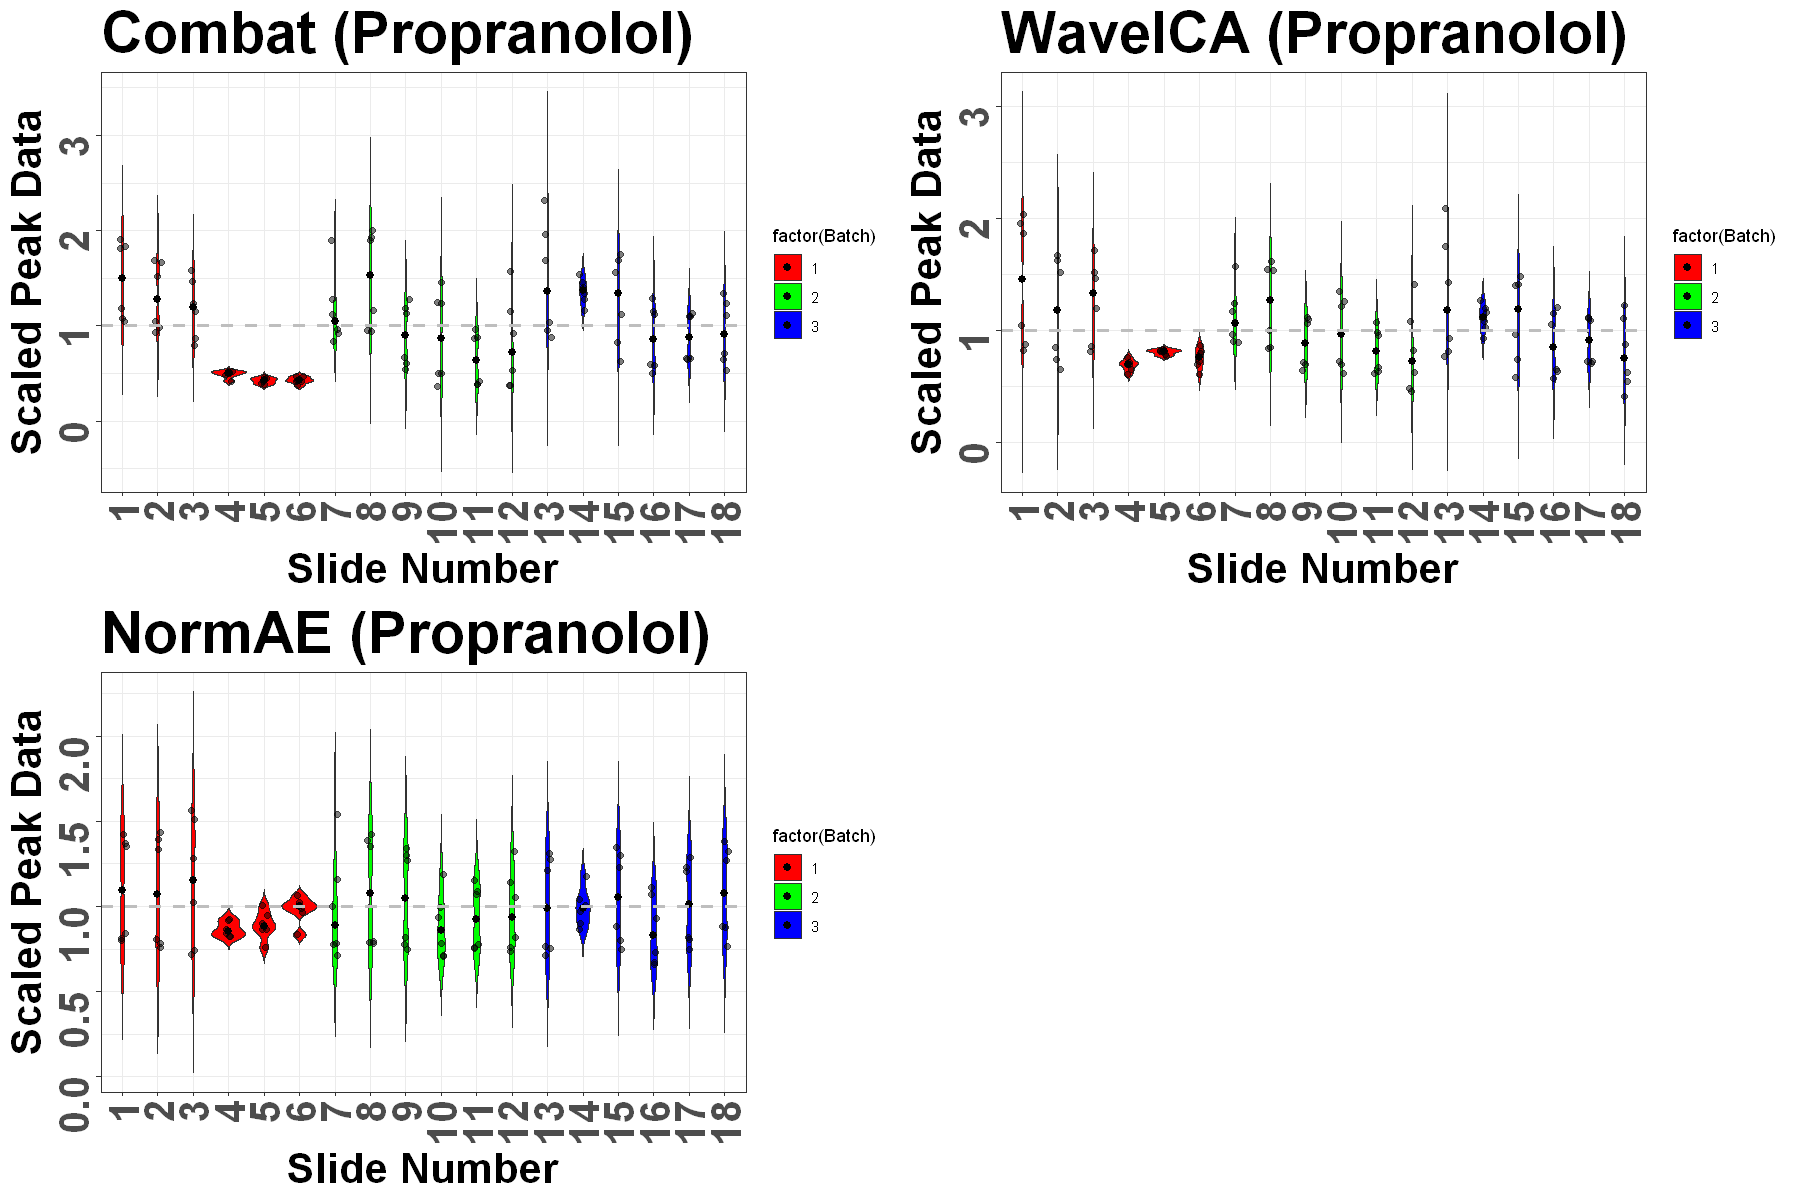

In [68]:
## Overview Intensity Plot (Propranolol) ##
library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 10)
combined_violin_plots <- grid.arrange(violin_plot_combat_jit, violin_plot_wave_jit, violin_plot_norm_jit, ncol = 2)
print(combined_violin_plots)

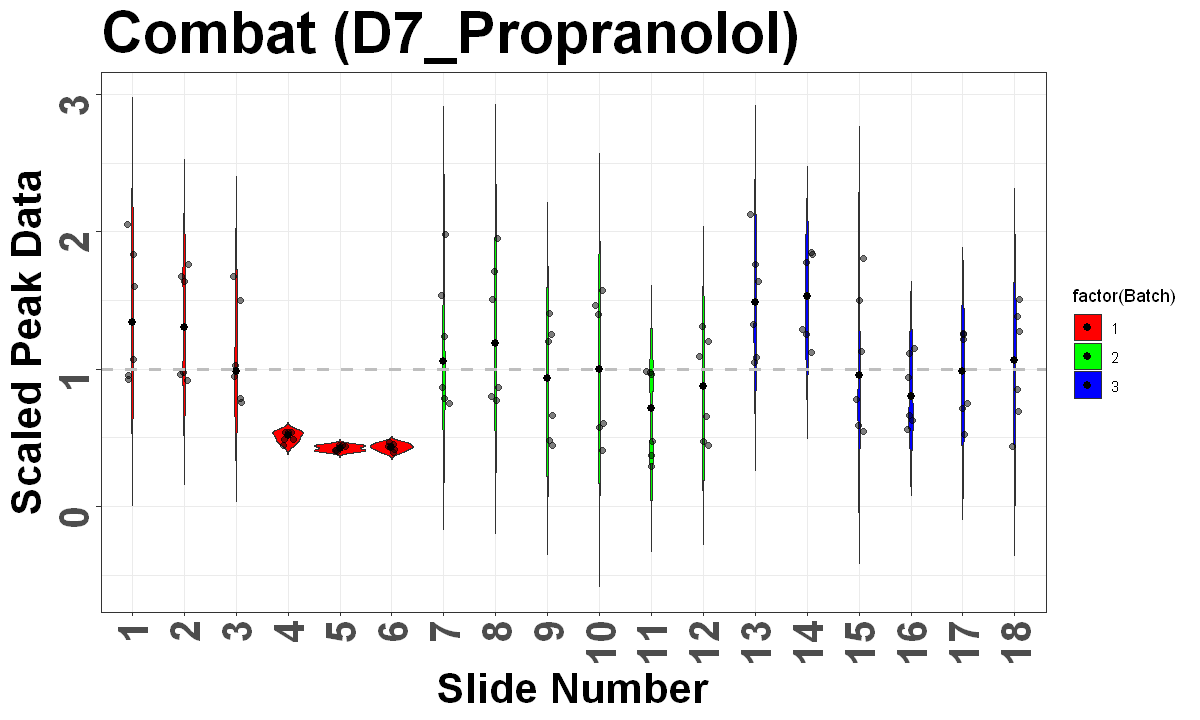

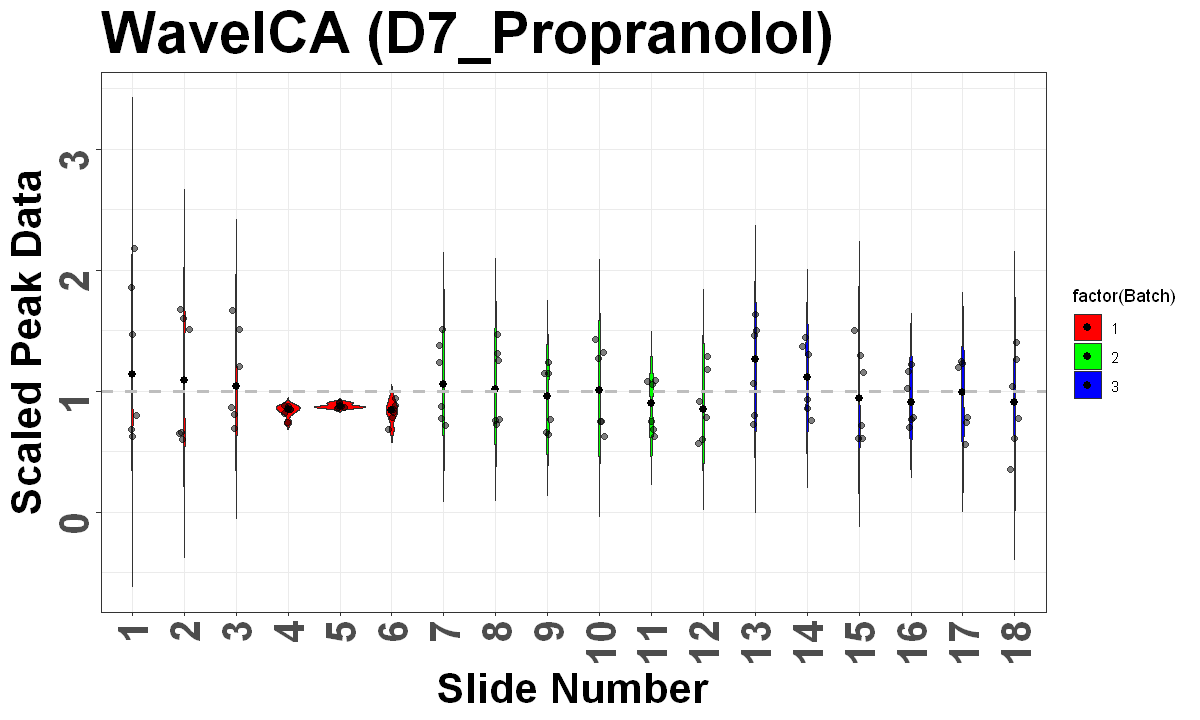

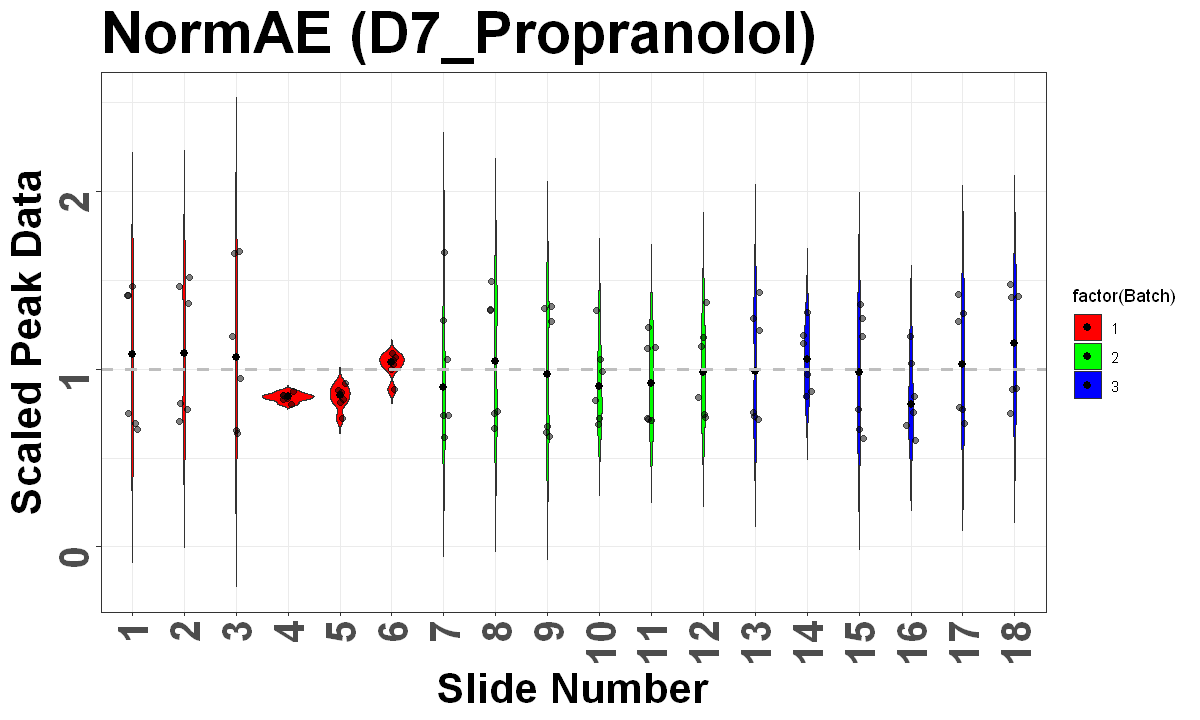

In [69]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Function to scale data by its mean
scale_by_mean <- function(data_frame) {
  mean_value <- mean(data_frame$Value)
  data_frame <- data_frame %>%
    mutate(Value = Value / mean_value)
  return(data_frame)
}

# Define the colors for the first three batches
manual_colors <- c("1" = "Red", "2" = "Green", "3" = "Blue")

# Plot function to ensure consistent scaling
plot_violin <- function(data, title) {
  unique_batches <- unique(data$Batch)
  additional_batches <- setdiff(unique_batches, names(manual_colors))
  
  if (length(additional_batches) > 0) {
    additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
    additional_colors <- setNames(additional_colors, additional_batches)
  } else {
    additional_colors <- c()
  }
  
  all_colors <- c(manual_colors, additional_colors)
  
  ggplot(data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
    geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
    stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
    geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
    geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
    scale_fill_manual(values = all_colors) +
    labs(x = "Slide Number", y = "Scaled Peak Data", title = title) +
    theme_bw() +
    theme(
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.title = element_text(face = "bold", size = 25),  
      plot.title = element_text(face = "bold", size = 35),  
      axis.text = element_text(size = 20)
    )
}

# Combat Plot
# Transform and prepare the dataset for Combat
propranolol_data_trans_combat <- as.data.frame(t(d7_propranolol_data_combat))
propranolol_data_trans_combat[] <- lapply(propranolol_data_trans_combat, as.numeric)

# Extract slide number
slide_number_combat <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_combat))
slide_number_combat <- as.numeric(slide_number_combat)

# Create violin plot data frame for Combat
violin_data_combat <- data.frame(
  Slide = slide_number_combat,
  Batch = propranolol_data_combat$batch,
  Value = unlist(propranolol_data_trans_combat[3, ])
)

# Scale Combat data by its mean
violin_data_combat <- scale_by_mean(violin_data_combat)

# Plot the data with each dataset scaled by its mean
options(repr.plot.width = 10, repr.plot.height = 6)
violin_plot_combat_jit_d7 <- plot_violin(violin_data_combat, "Combat (D7_Propranolol)")
print(violin_plot_combat_jit_d7)

# WaveICA Plot
# Transform and prepare the dataset for WaveICA
propranolol_data_trans_wave <- as.data.frame(t(d7_propranolol_data_wave))
propranolol_data_trans_wave[] <- lapply(propranolol_data_trans_wave, as.numeric)

# Extract slide number
slide_number_wave <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_wave))
slide_number_wave <- as.numeric(slide_number_wave)

# Create violin plot data frame for WaveICA
violin_data_wave <- data.frame(
  Slide = slide_number_wave,
  Batch = propranolol_data_wave$batch,
  Value = unlist(propranolol_data_trans_wave[3, ])
)

# Scale WaveICA data by its mean
violin_data_wave <- scale_by_mean(violin_data_wave)

# WaveICA Plot
violin_plot_wave_jit_d7 <- plot_violin(violin_data_wave, "WaveICA (D7_Propranolol)")
print(violin_plot_wave_jit_d7)

# NormAE Plot
# Transform and prepare the dataset for NormAE
propranolol_data_trans_norm <- as.data.frame(t(d7_propranolol_data_norm))
propranolol_data_trans_norm[] <- lapply(propranolol_data_trans_norm, as.numeric)

# Extract slide number
slide_number_norm <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans_norm))
slide_number_norm <- as.numeric(slide_number_norm)

# Create violin plot data frame for NormAE
violin_data_norm <- data.frame(
  Slide = slide_number_norm,
  Batch = propranolol_data_norm$batch,
  Value = unlist(propranolol_data_trans_norm[3, ])
)

# Scale NormAE data by its mean
violin_data_norm <- scale_by_mean(violin_data_norm)

# NormAE Plot
violin_plot_norm_jit_d7 <- plot_violin(violin_data_norm, "NormAE (D7_Propranolol)")
print(violin_plot_norm_jit_d7)

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]


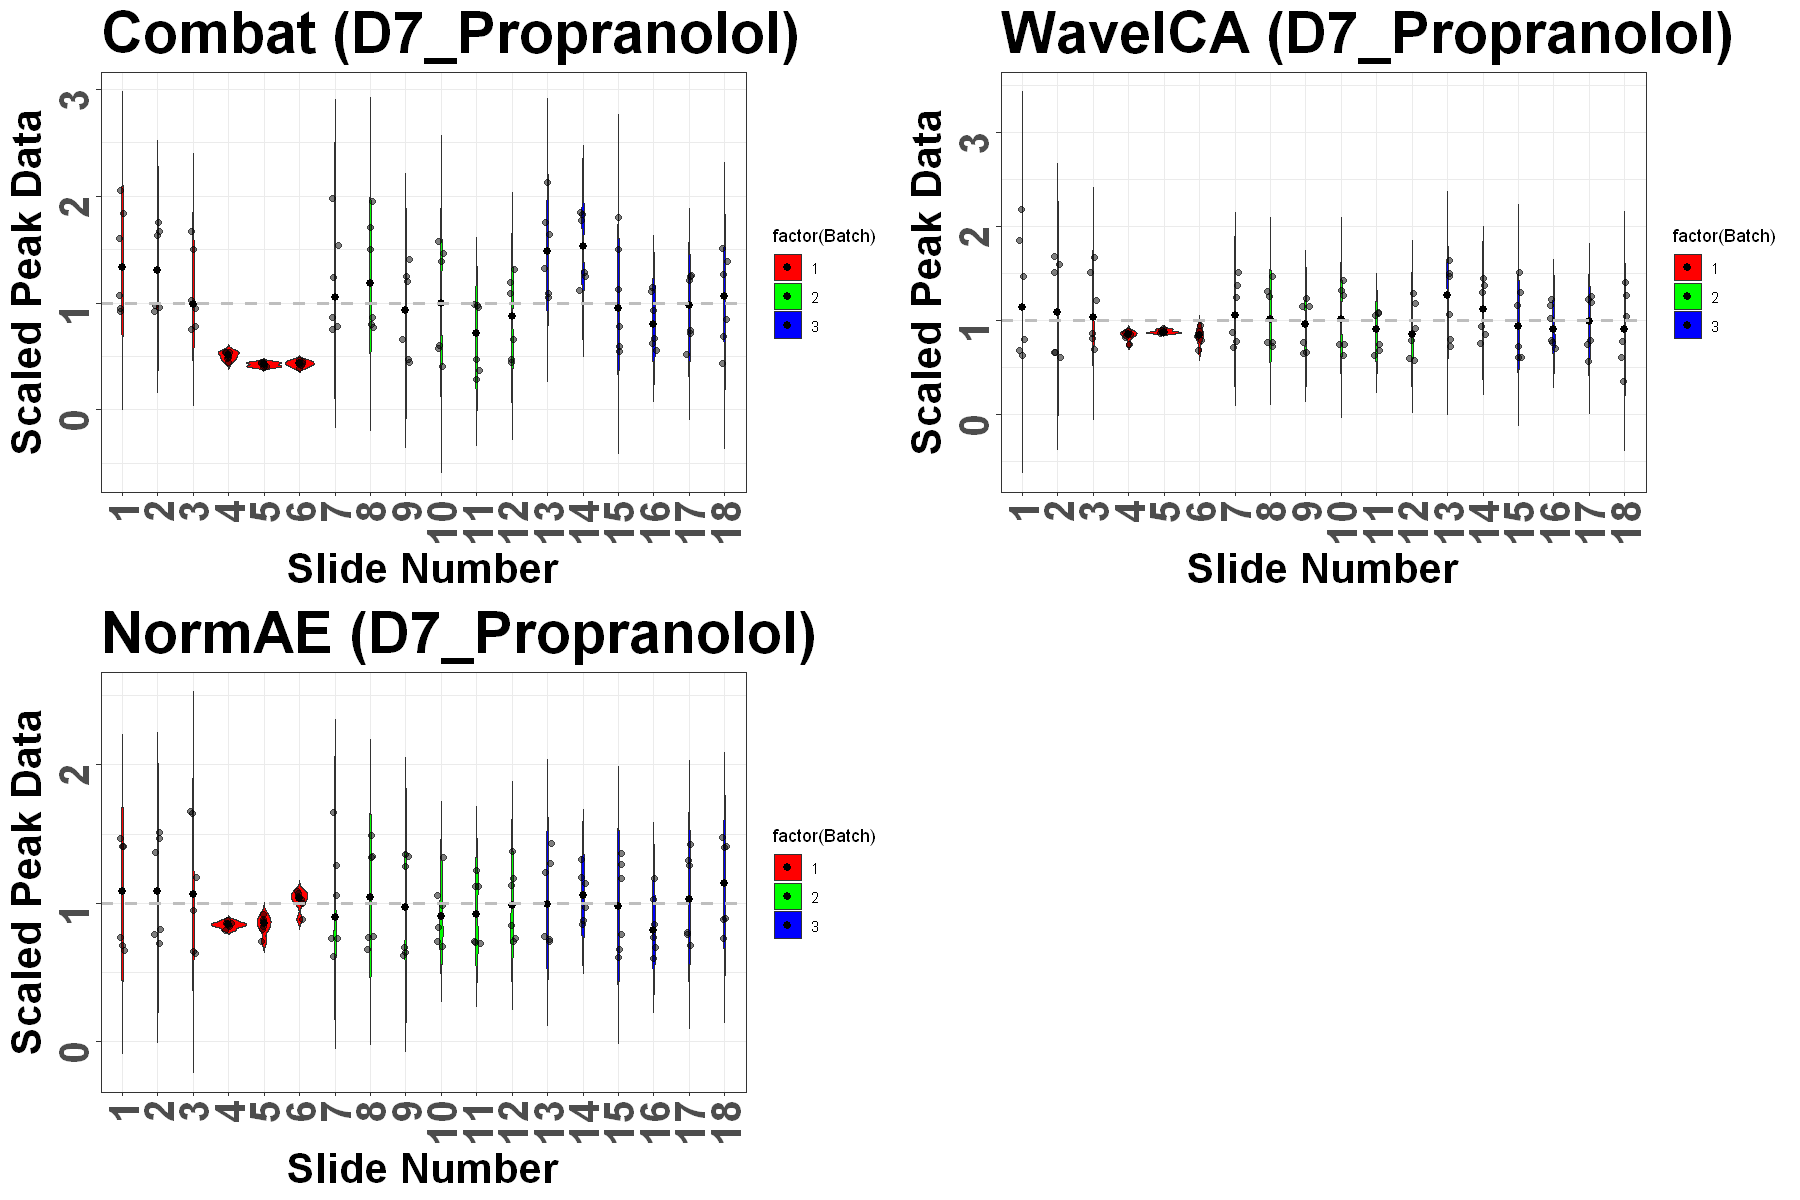

In [71]:
## Overview Intensity Plot (D7_propranolol) ##
library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 10)
combined_violin_plots_d7 <- grid.arrange(violin_plot_combat_jit_d7, violin_plot_wave_jit_d7, violin_plot_norm_jit_d7, ncol = 2)
print(combined_violin_plots_d7)

## 4. PCA Plot ##
<a id="corr_pca_2"></a>

Total Score: 80.38 %

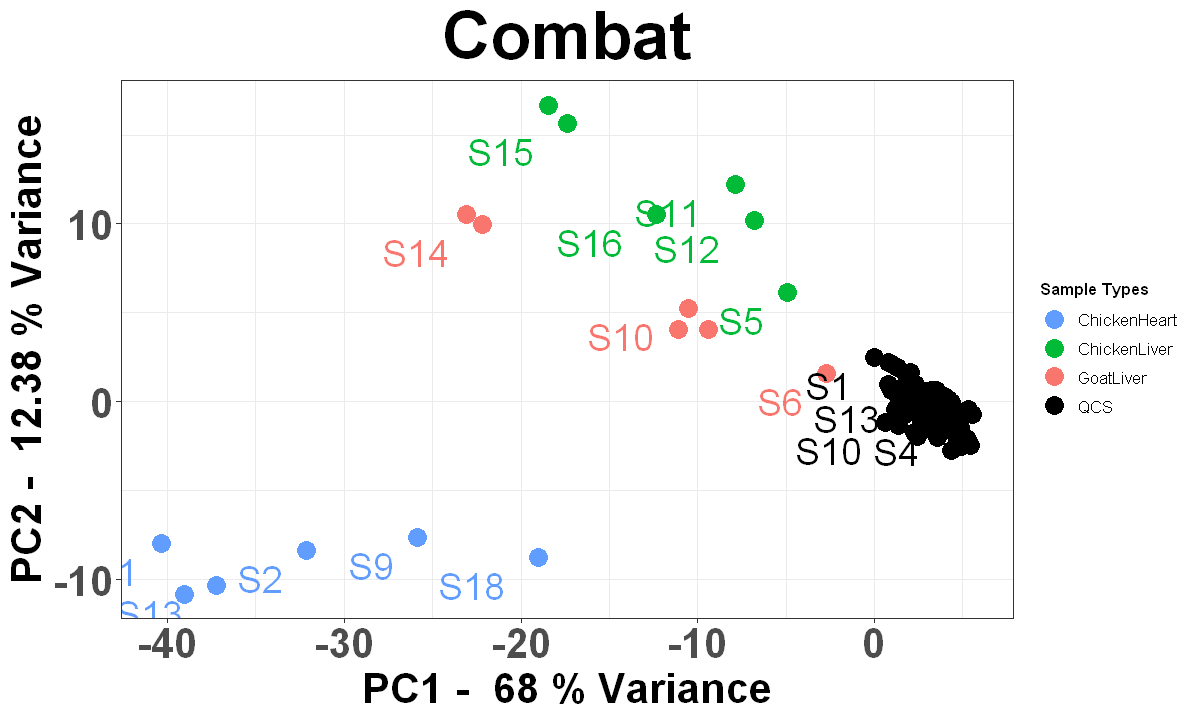

In [72]:
## PCA plot ##
library(stringr)
library(ggplot2)
library(scales)  # For color palette

# Combat #
options(repr.plot.width = 10, repr.plot.height = 6) 
adjusted <- combat_result_interday_df

batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_2, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_combat <- str_extract(colnames(batch_matrix), pattern)
sample_types_combat[is.na(sample_types_combat)] <- "QCS" 

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_combat <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_combat <- data.frame(Sample = sample_ID, batch_pca_combat$x)

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_combat$sdev[1]^2
pc2_score <- batch_pca_combat$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_combat$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types_combat[sample_types_combat != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# Plot PCA with colored sample dots based on sample type
pca_data_combat$Type <- sample_types_combat

plot_combat <- ggplot(pca_data_combat, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("Combat") +
  labs(color = "Sample Types") +  
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  )
print(plot_combat)

Total Score: 81.91 %

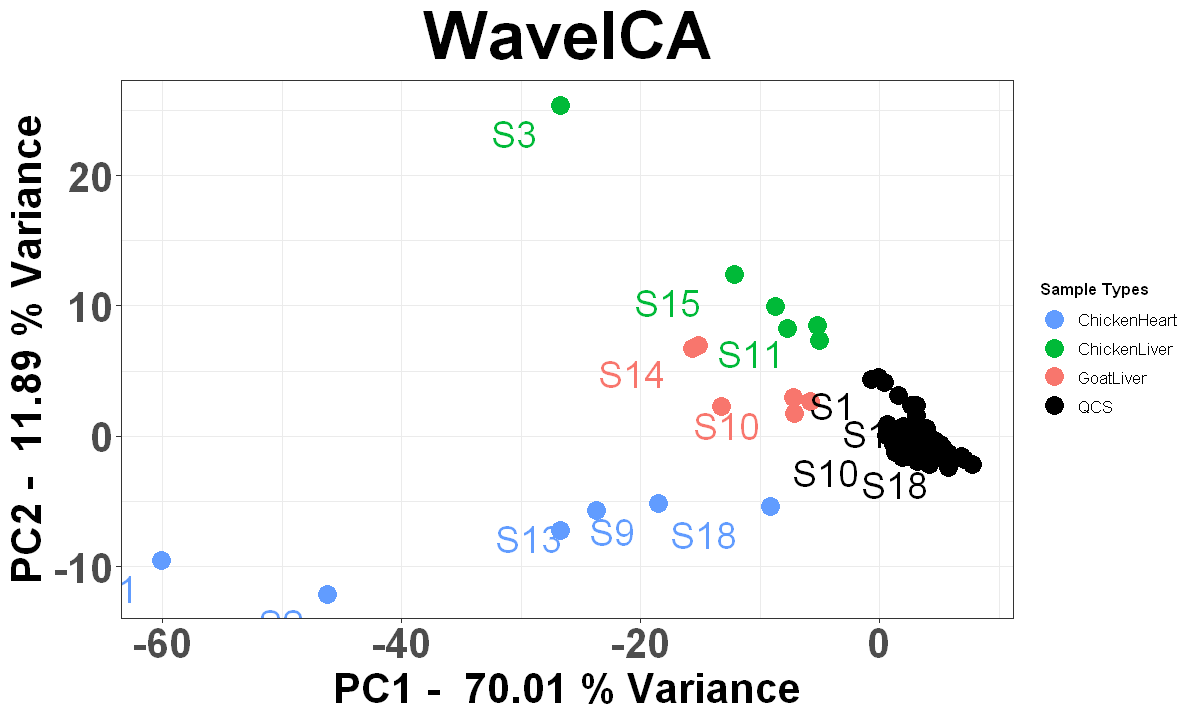

In [73]:
## PCA plot ##
library(stringr)
library(ggplot2)
library(scales)  # For color palette

# WaveICA #
adjusted <- as.data.frame(t(waveica_result_interday)) # check file path/variable 

options(repr.plot.width = 10, repr.plot.height = 6) # adjust desired width and height of plot 
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_2, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_wave <- str_extract(colnames(batch_matrix), pattern)
sample_types_wave[is.na(sample_types_wave)] <- "QCS" 

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_wave <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_wave <- data.frame(Sample = sample_ID, batch_pca_wave$x)

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_wave$sdev[1]^2
pc2_score <- batch_pca_wave$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_wave$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types_wave[sample_types_wave != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# Plot PCA with colored sample dots based on sample type
pca_data_wave$Type <- sample_types_wave

plot_wave <- ggplot(pca_data_wave, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("WaveICA") +
  labs(color = "Sample Types") +  
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  )
print(plot_wave)

Total Score: 86.72 %

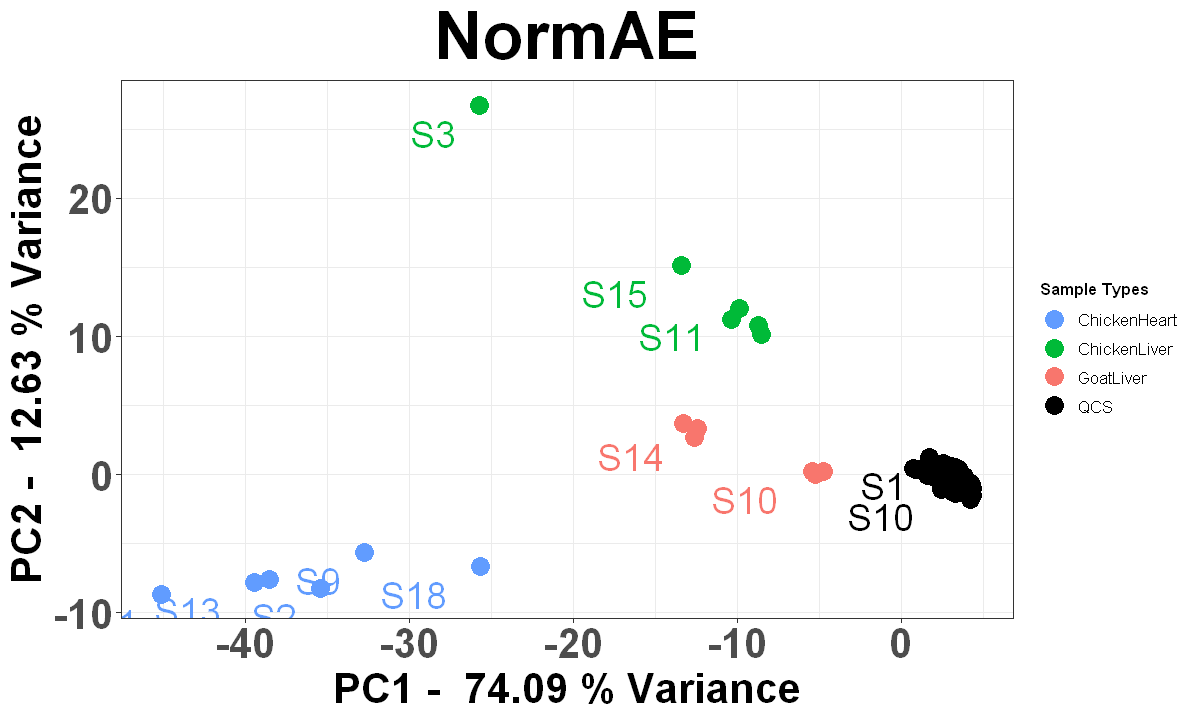

In [74]:
library(stringr)
library(ggplot2)

# NormAE #
adjusted <- normae_result_interday
options(repr.plot.width = 10, repr.plot.height = 6) # adjust desired width and height of plot 
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_2, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_norm <- str_extract(colnames(batch_matrix), pattern)
sample_types_norm[is.na(sample_types_norm)] <- "QCS" # assigns Na tissue samples as QCS

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_norm <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_norm <- data.frame(Sample = sample_ID, batch_pca_norm$x)

# Plot PCA with colored sample dots based on sample type
pca_data_norm$Score <- pca_data_norm$PC1 + pca_data_norm$PC2
pca_data_norm$Type <- sample_types_norm

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_norm$sdev[1]^2
pc2_score <- batch_pca_norm$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_norm$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for the tissue types
unique_types <- unique(sample_types_norm[sample_types_norm != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# Create PCA plot
plot_norm <- ggplot(pca_data_norm, aes(x = PC1, y = PC2, color = sample_types_norm, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("NormAE") +
  labs(color = "Sample Types") +  # Set the legend title
  scale_color_manual(values = color_mapping) +  # Manually set the colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  )

print(plot_norm)

TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


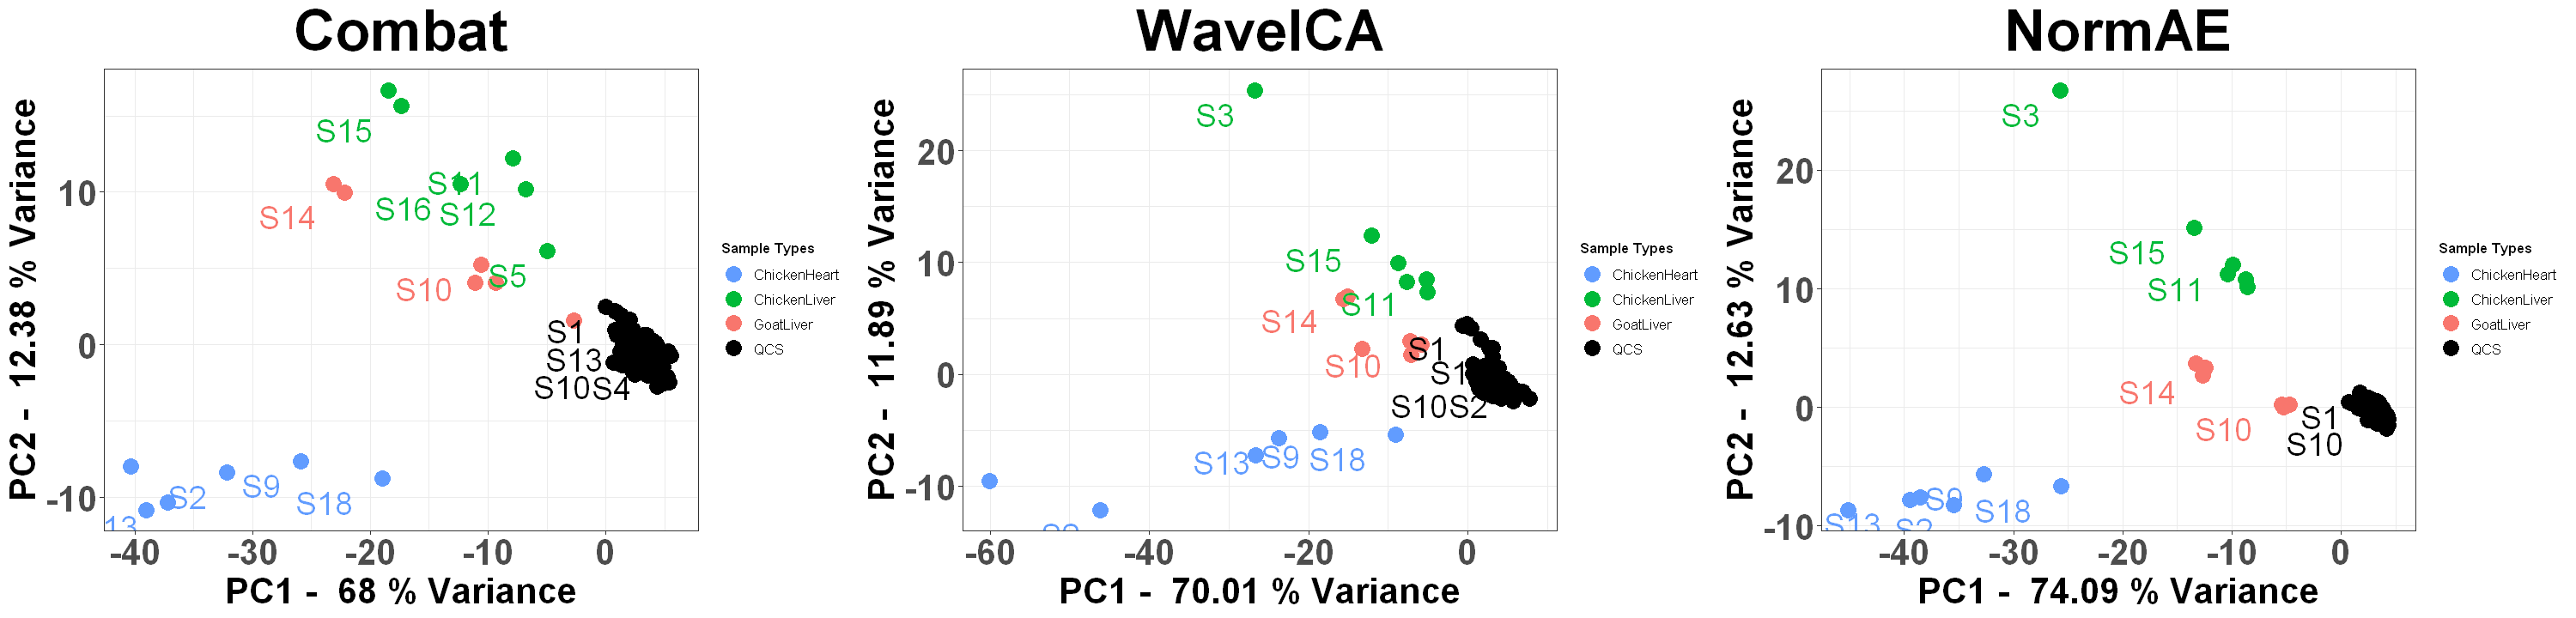

In [75]:
## Overview PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 25, repr.plot.height = 6)
combined_pca_plots <- grid.arrange(plot_combat, plot_wave, plot_norm, ncol = 3)
print(combined_pca_plots)

## 5. QCS PCA Plot ##
<a id="corr_qcs_pca_2"></a>

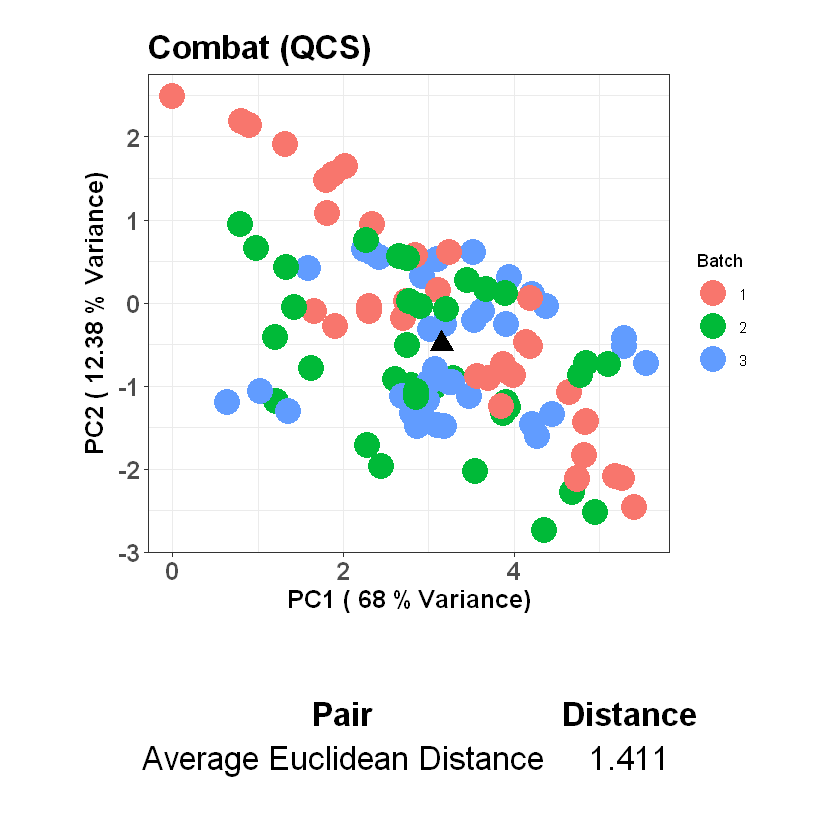

In [76]:
## QCS PCA Plot ##
# combat #
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_combat$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_combat == "QCS") 

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # obtaining only PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_2[qcs_samples, "batch"]

qcs_data_combat <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2)

# Calculate distance of individual samples from centroids 
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add up distances and sqrt them
distances_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Calculate average Euclidean distance
average_distance_ec_combat <- mean(distances_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_combat <- ggplot(qcs_data_combat, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled black color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "Combat (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average euclidean distance
average_distance_qcs_df_combat <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec_combat, 3)
    )

# Create a table plot
table_plot_qcs_combat <- tableGrob(average_distance_qcs_df_combat, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_combat_qcs <- plot_grid(pca_plot_qcs_combat, table_plot_qcs_combat, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_combat_qcs)

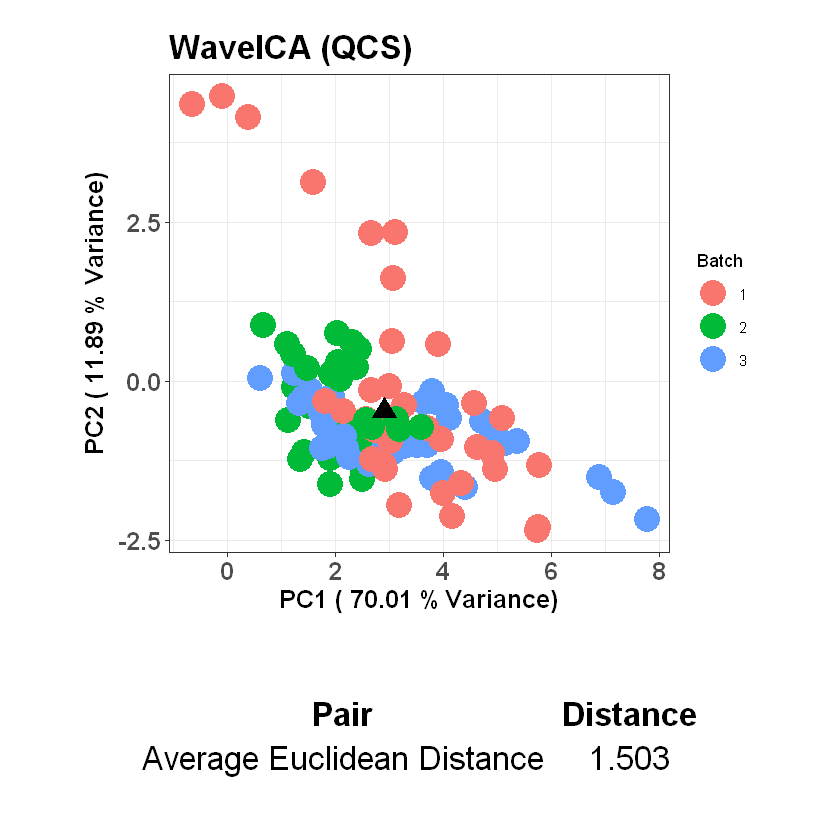

In [77]:
## QCS PCA Plot ##
# waveica #
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_wave$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_wave == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # only obtaining PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_2[qcs_samples, "batch"]

qcs_data_wave <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2)

# Calculate the distance from individual samples from centroids
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add distance together and sqrt them  
distances_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Calculate average Euclidean distance
average_distance_ec_wave <- mean(distances_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_wave <- ggplot(qcs_data_wave, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled black color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "WaveICA (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average euclidean distance
average_distance_qcs_df_wave <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec_wave, 3)
    )

# Create a table plot
table_plot_qcs_wave <- tableGrob(average_distance_qcs_df_wave, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_wave_qcs <- plot_grid(pca_plot_qcs_wave, table_plot_qcs_wave, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_wave_qcs)

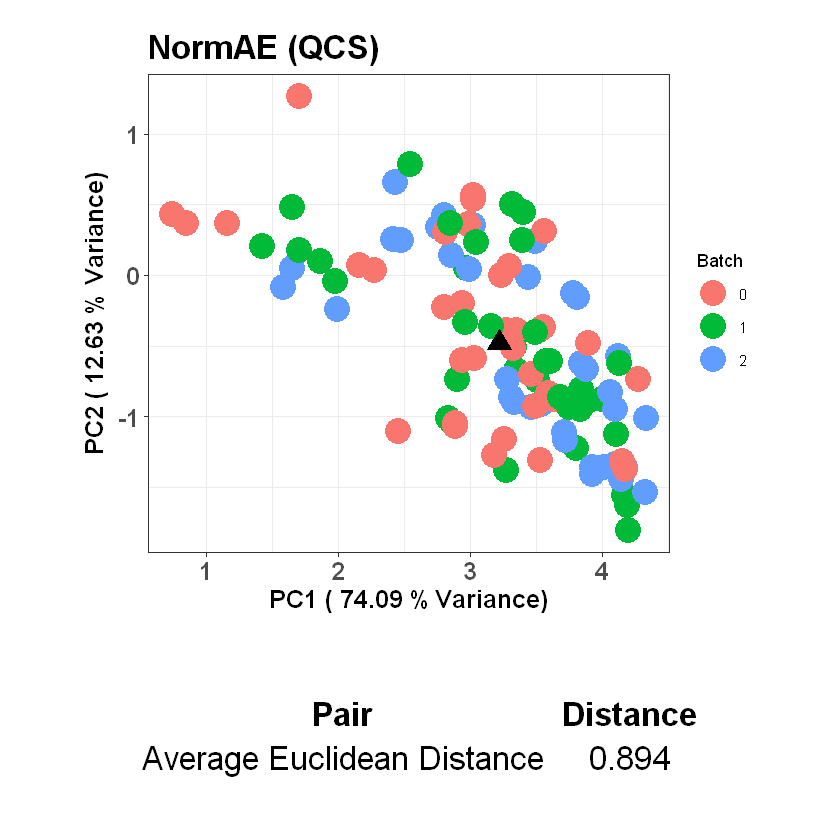

In [78]:
## QCS PCA Plot ##
# normae #
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_norm$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_norm == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # obtaining only PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_normae[qcs_samples, "batch"]

qcs_data_norm <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2)

# Calculate distance of individual samples 
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add distances together and sqrt them
distances_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Calculate average Euclidean distance
average_distance_ec_norm <- mean(distances_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_norm <- ggplot(qcs_data_norm, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled black color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "NormAE (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average Euclidean distance
average_distance_qcs_df_norm <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec_norm, 3)
    )

# Create a table plot
table_plot_qcs_norm <- tableGrob(average_distance_qcs_df_norm, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_norm_qcs <- plot_grid(pca_plot_qcs_norm, table_plot_qcs_norm, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_norm_qcs)

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


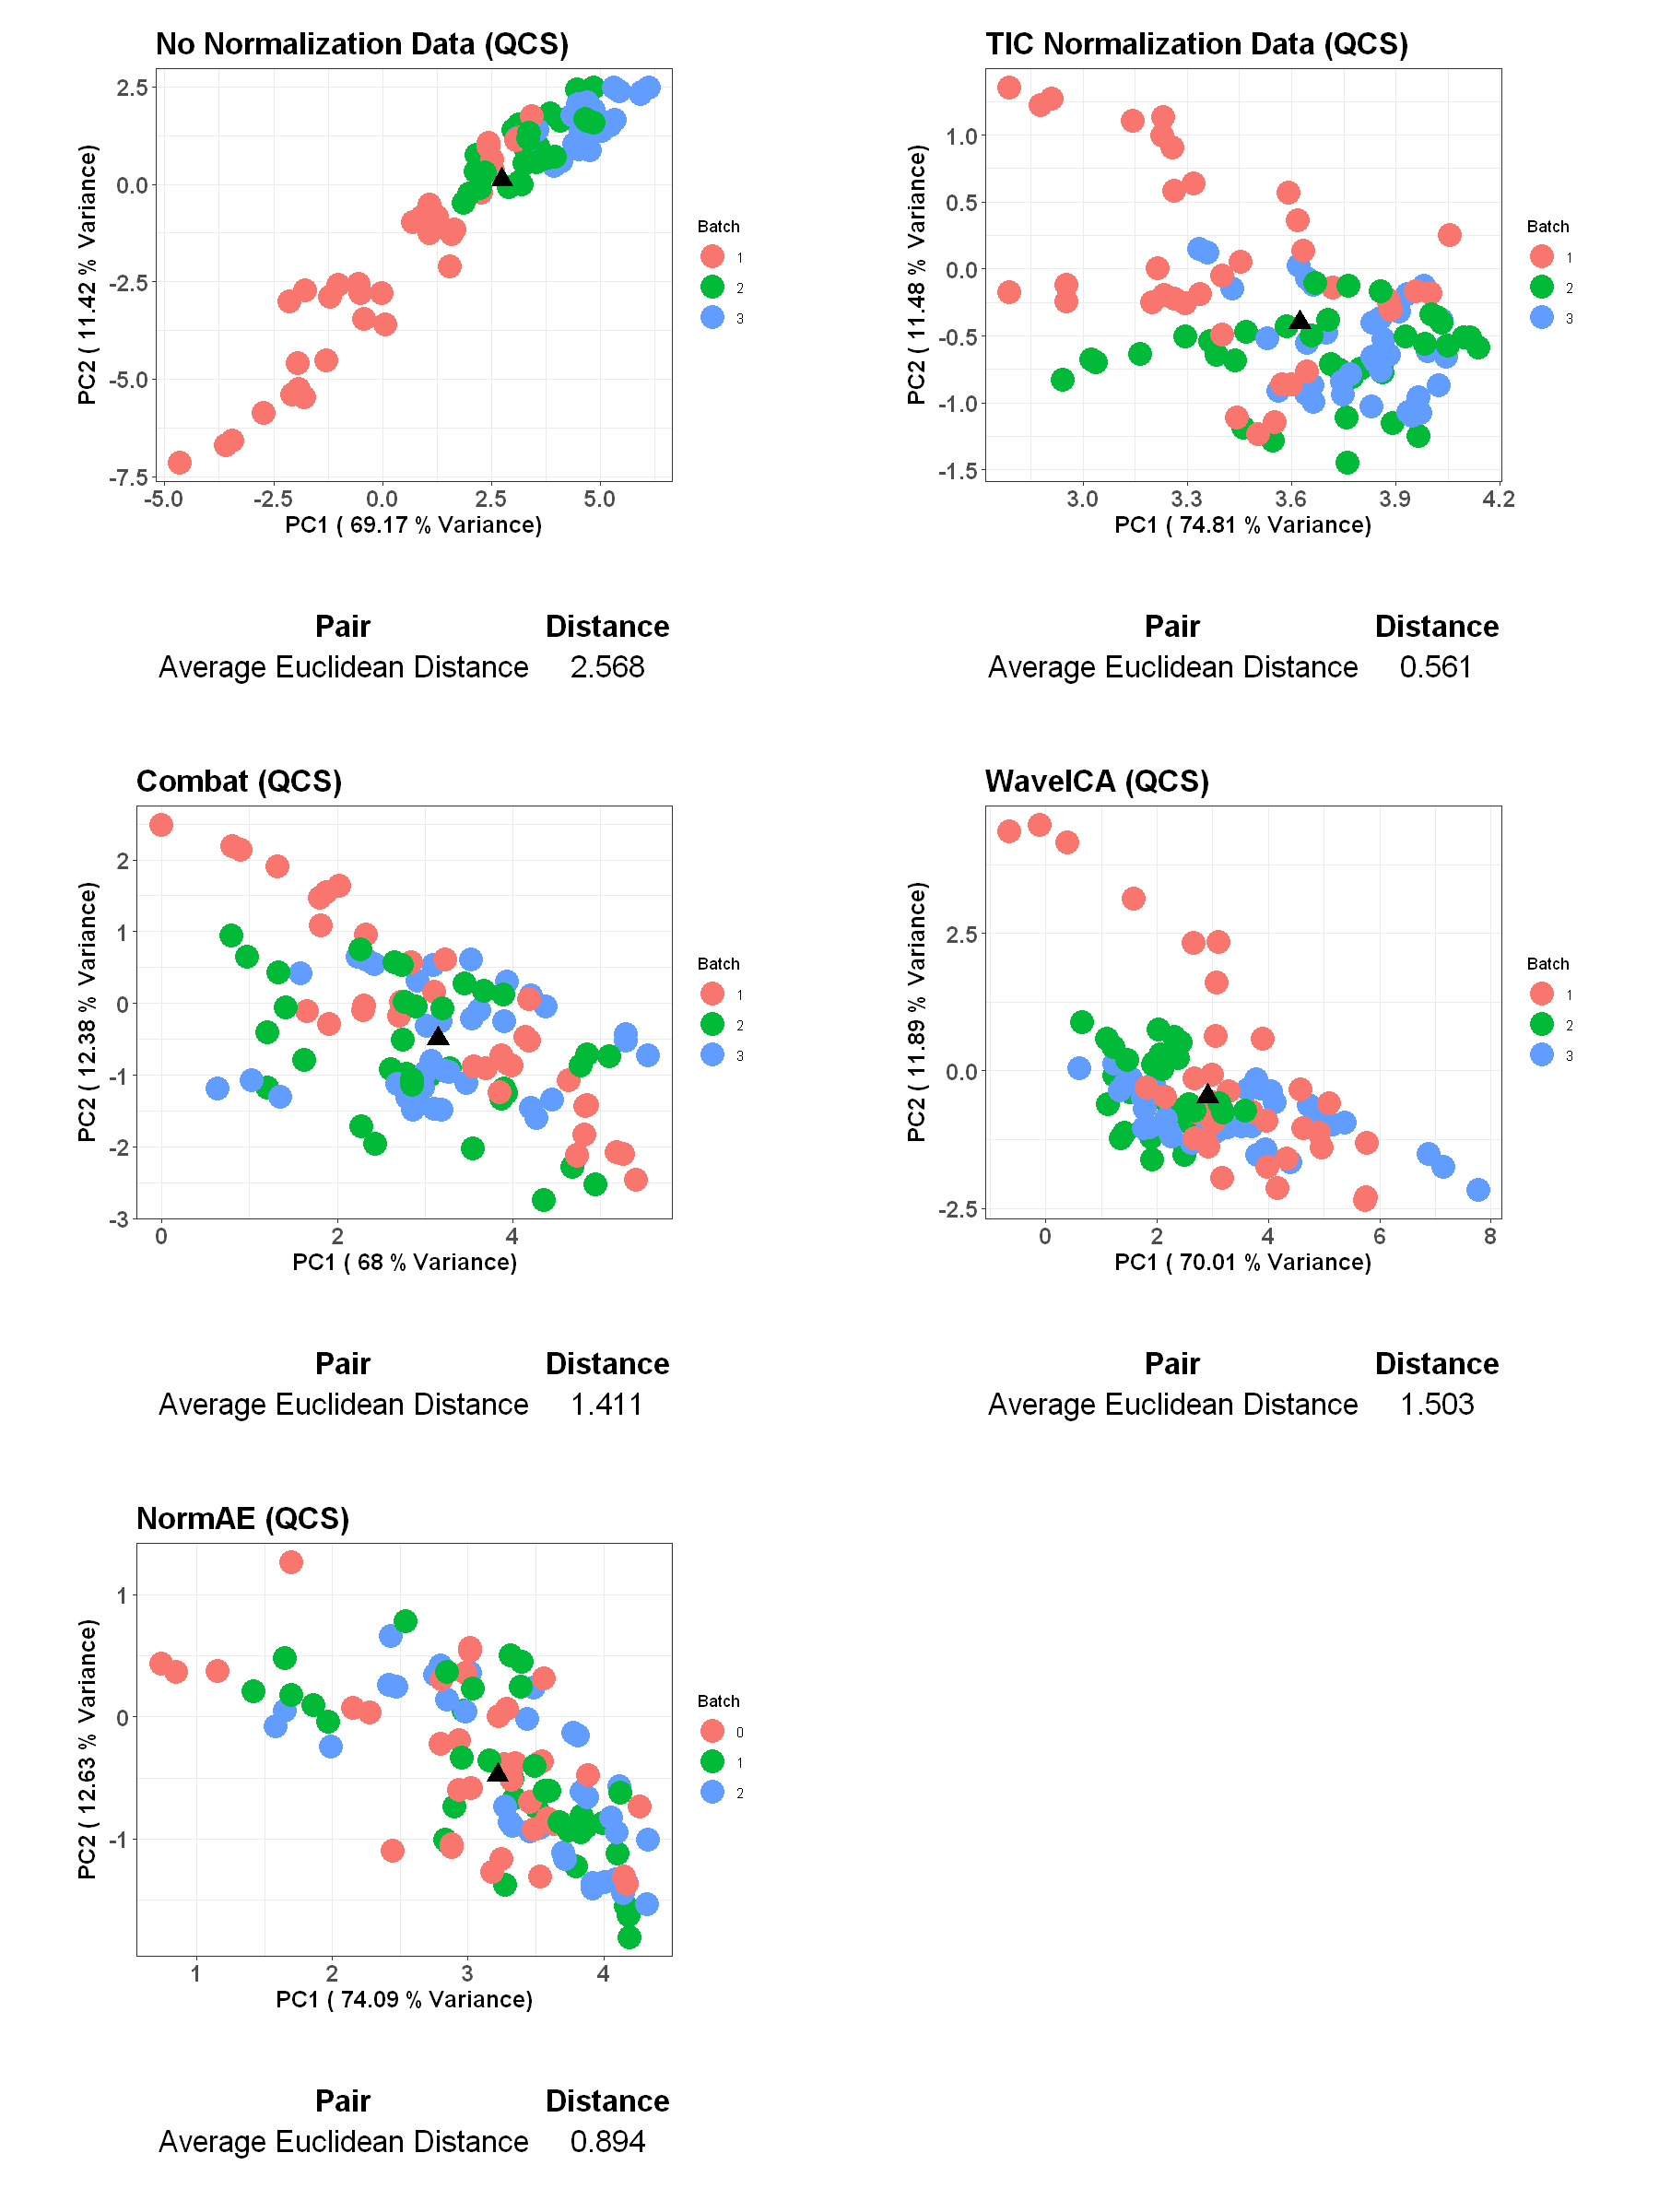

In [118]:
## Overview PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 20)

combined_qcs_pca_plots <- grid.arrange(combined_plot_qcs, combined_plot_TIC_qcs, combined_plot_combat_qcs, combined_plot_wave_qcs, combined_plot_norm_qcs, ncol = 2)
print(combined_qcs_pca_plots)

## 6. Tissue RSD ##
<a id="corr_tissue_rsd_2"></a>

In [80]:
## run these functions first ##
# 1: Function to calculate rsd for tissue
calculate_batch_rsd_combined <- function(tissue_samples) {
  
  calculate_batch_rsd <- function(sample_dataset, batch_number) {
    # Extract data for the specified batch number
    batch_data <- sample_dataset[sample_dataset$batch == batch_number, -(1:2)]
    # Check if there are any samples for this batch
    if (nrow(batch_data) == 0) {
      return("NA ± NA%")  # Return NA if no samples exist for this batch
    }
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(batch_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(batch_data, 2, sd, na.rm = TRUE)

    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  calculate_interday_rsd <- function(sample_dataset) {
    # Extract data for interday calculation
    interday_data <- sample_dataset[, -(1:2)]
    
    # Check if there are any samples for interday calculation
    if (nrow(interday_data) == 0) {
      return("NA ± NA%")  # Return NA if no interday samples exist
    }
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(interday_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(interday_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  calculate_batch_rsd_multiple <- function(sample_dataset, unique_batches) {
    rsd_results <- list()
    for (batch_number in unique_batches) {
      rsd_results[[as.character(batch_number)]] <- calculate_batch_rsd(sample_dataset, batch_number)
    }
    return(rsd_results)
  }
  
  unique_tissues <- unique(gsub(".*_(\\w+)_\\d+.*", "\\1", rownames(tissue_samples)))
  
  rsd_results <- list()
  
  for (tissue_type in unique_tissues) {
    tissue_data <- tissue_samples[grep(paste0(tissue_type, "_"), rownames(tissue_samples)), ]
    
    sample_numbers <- as.numeric(gsub(".*S(\\d+)_.*", "\\1", rownames(tissue_data)))
    ordered_indices <- order(sample_numbers)
    tissue_data <- tissue_data[ordered_indices, ]
    
    tissue_data <- replace(tissue_data, tissue_data < 0, 1)
    
    unique_batches <- unique(tissue_data$batch)
    rsd_results_tissue <- calculate_batch_rsd_multiple(tissue_data, unique_batches)
    
    # Initialize dataframe to store results
    rsd_df_tissue <- data.frame(
      Batch = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
      RSD = NA
    )
    
    # Fill in RSD values where available for batch-specific RSDs
    for (i in 1:length(rsd_df_tissue$Batch)) {
      batch_number <- i  # Adjust based on batch number indexing
      if (as.character(batch_number) %in% names(rsd_results_tissue)) {
        rsd_df_tissue$RSD[i] <- rsd_results_tissue[[as.character(batch_number)]]
      } else {
        rsd_df_tissue$RSD[i] <- "NA ± NA%"  # Handle case where batch RSD is missing
      }
    }
    
    # Calculate interday RSD and insert into the dataframe
    interday_rsd <- calculate_interday_rsd(tissue_data)
    rsd_df_tissue$RSD[length(rsd_df_tissue$Batch)] <- interday_rsd
    
    rsd_results[[tissue_type]] <- rsd_df_tissue
  }
  
  return(rsd_results)
}

# 2: Function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

In [81]:
## Tissue RSD Table ##

# load libraries
library(kableExtra)
library(IRdisplay)

# Combat #
data <- combat_result_interday_df
row_names <- rownames(data)
batch_info_norm <- batch_info_2

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set_regex <- paste(sample_set_2, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data))
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# use function to calculate tissue rsd
rsd_results_combined_combat <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined_combat)

# Generate HTML tables for each tissue
html_tables_combat <- lapply(names(rsd_results_combined_combat), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_combat, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_combat <- paste(html_tables_combat, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_combat <- paste("<div style='text-align: center;'>", html_content_combat, "</div>")

cat("\033[1mTissue RSD table for Combat corrected dataset\033[0m\n")
# Display the centered HTML content in JupyterLab
display_html(centered_html_content_combat)

Tissue RSD table for Combat corrected dataset


GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 21.95 ± 9.34% 
 
 
 Intraday 2 
 29.78 ± 11.92% 
 
 
 Intraday 3 
 27.63 ± 13.00% 
 
 
 Interday 
 32.26 ± 13.97% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 35.48 ± 11.20% 
 
 
 Intraday 2 
 7.49 ± 6.36% 
 
 
 Intraday 3 
 12.35 ± 7.94% 
 
 
 Interday 
 26.44 ± 16.06% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.14 ± 6.69% 
 
 
 Intraday 2 
 19.53 ± 10.38% 
 
 
 Intraday 3 
 29.06 ± 14.17% 
 
 
 Interday 
 24.11 ± 18.08%

In [82]:
## Tissue Variation RSD ##

# load libraries
library(kableExtra)
library(IRdisplay)

# WaveICA #
data <- as.data.frame(t(waveica_result_interday)) 
row_names <- rownames(data)
batch_info_norm <- batch_info_2

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set_regex <- paste(sample_set_2, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data))
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# run function
rsd_results_combined_wave <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined_wave)

# Generate HTML tables for each tissue
html_tables_wave <- lapply(names(rsd_results_combined_wave), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_wave, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_wave <- paste(html_tables_wave, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_wave <- paste("<div style='text-align: center;'>", html_content_wave, "</div>")

cat("\033[1mTissue RSD table for WaveICA corrected dataset\033[0m\n")
display_html(centered_html_content_wave)

Tissue RSD table for WaveICA corrected dataset


GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 17.69 ± 16.22% 
 
 
 Intraday 2 
 19.88 ± 7.04% 
 
 
 Intraday 3 
 24.69 ± 16.19% 
 
 
 Interday 
 21.13 ± 11.08% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 36.21 ± 17.90% 
 
 
 Intraday 2 
 5.11 ± 4.64% 
 
 
 Intraday 3 
 12.33 ± 15.01% 
 
 
 Interday 
 29.77 ± 14.73% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 18.29 ± 14.97% 
 
 
 Intraday 2 
 13.12 ± 8.67% 
 
 
 Intraday 3 
 27.61 ± 12.91% 
 
 
 Interday 
 37.95 ± 14.96%

In [83]:
## Tissue Variation RSD ##

# load libraries
library(kableExtra)
library(IRdisplay)

# NormAE #
data <- normae_result_interday
row_names <- rownames(data)
rownames(data) <- row_names

batch_info_norm <- batch_info_normae

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch  +  1

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set_regex <- paste(sample_set_2, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data)) #126 obs of 121 variables
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# calculate tissue rsd using function 
rsd_results_combined_norm <- calculate_batch_rsd_combined(tissue_samples)

# Generate HTML tables for each tissue using function
html_tables_norm <- lapply(names(rsd_results_combined_norm), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_norm, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_norm <- paste(html_tables_norm, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_norm <- paste("<div style='text-align: center;'>", html_content_norm, "</div>")

cat("\033[1mTissue RSD table for NormAE corrected dataset\033[0m\n")
display_html(centered_html_content_norm)

Tissue RSD table for NormAE corrected dataset


GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 22.75 ± 8.75% 
 
 
 Intraday 2 
 22.99 ± 6.82% 
 
 
 Intraday 3 
 21.59 ± 8.19% 
 
 
 Interday 
 17.81 ± 5.60% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 35.12 ± 11.78% 
 
 
 Intraday 2 
 3.14 ± 2.19% 
 
 
 Intraday 3 
 12.23 ± 5.68% 
 
 
 Interday 
 22.54 ± 8.49% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.56 ± 13.12% 
 
 
 Intraday 2 
 7.81 ± 6.12% 
 
 
 Intraday 3 
 20.38 ± 13.04% 
 
 
 Interday 
 14.19 ± 7.65%

## 8. Tissue PCA Plot (Intra/Intergroup) ##
<a id="corr_tissue_pca_2"></a>

<u> Intragroup Tissue PCA Plot <u>

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


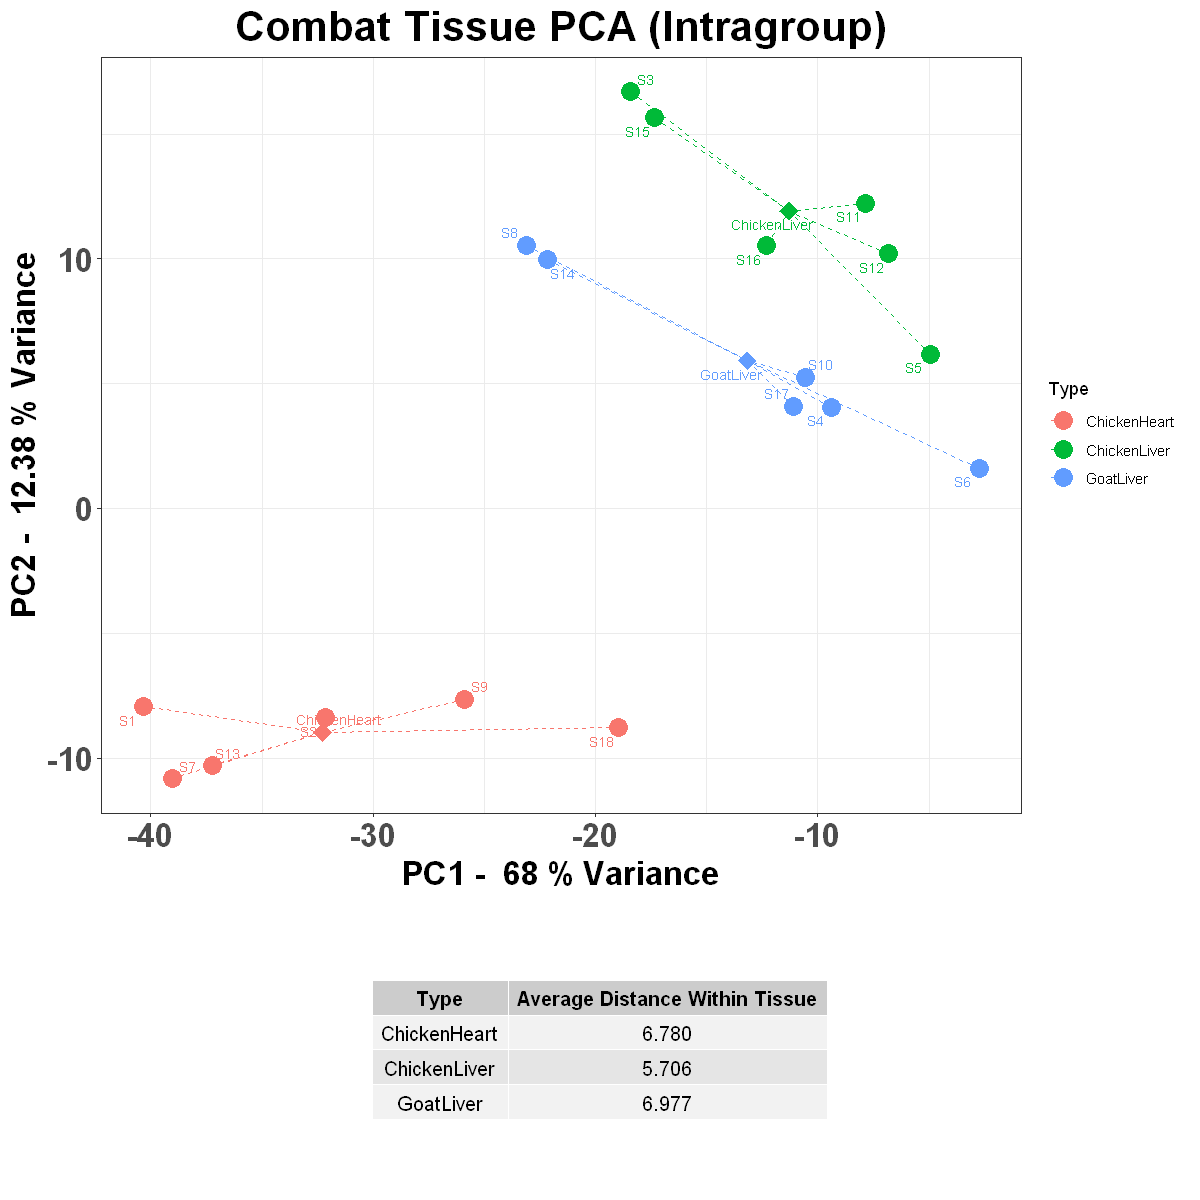

In [84]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(dplyr)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10)

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_combat %>%
  filter(Type %in% sample_set_2)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_combat <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup PCA plot with distance lines for visual validation
tissue_intra_plot_combat <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "Combat Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create table plot
table_plot_combat <- tableGrob(tissue_avg_distances_combat, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_combat_intra <- grid.arrange(tissue_intra_plot_combat, table_plot_combat, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_combat_intra)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


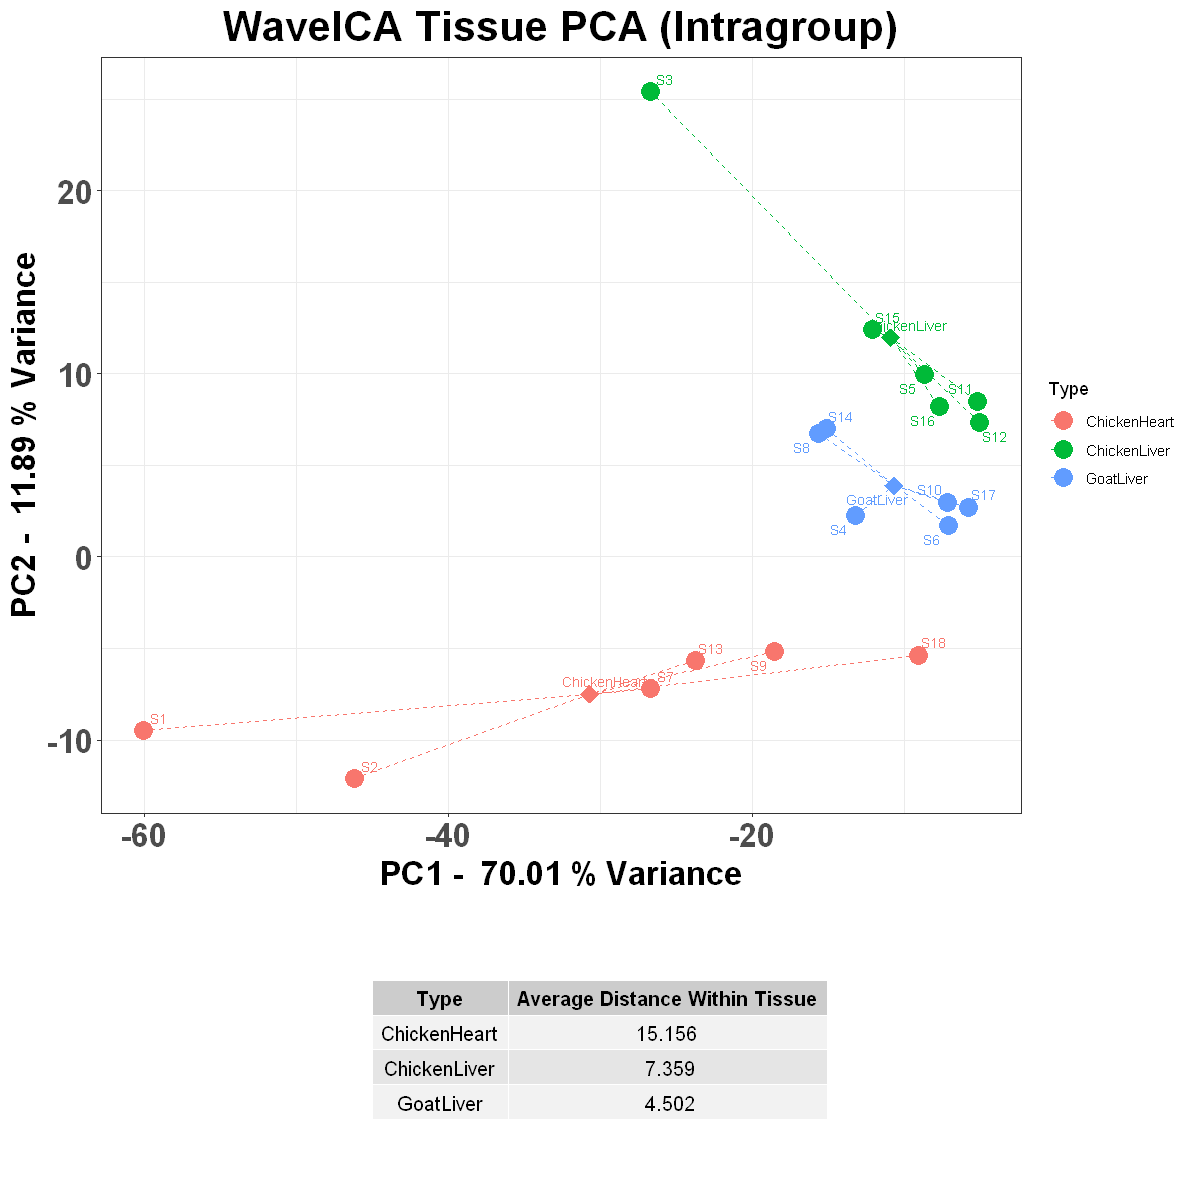

In [85]:
# Load necessary libraries
library(gridExtra)
library(dplyr)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10)

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_wave %>%
  filter(Type %in% sample_set_2)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_wave <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup PCA plot
tissue_intra_plot_wave <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +  # Add dashed lines
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "WaveICA Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create table plot
table_plot_wave <- tableGrob(tissue_avg_distances_wave, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_wave_intra <- grid.arrange(tissue_intra_plot_wave, table_plot_wave, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_wave_intra)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


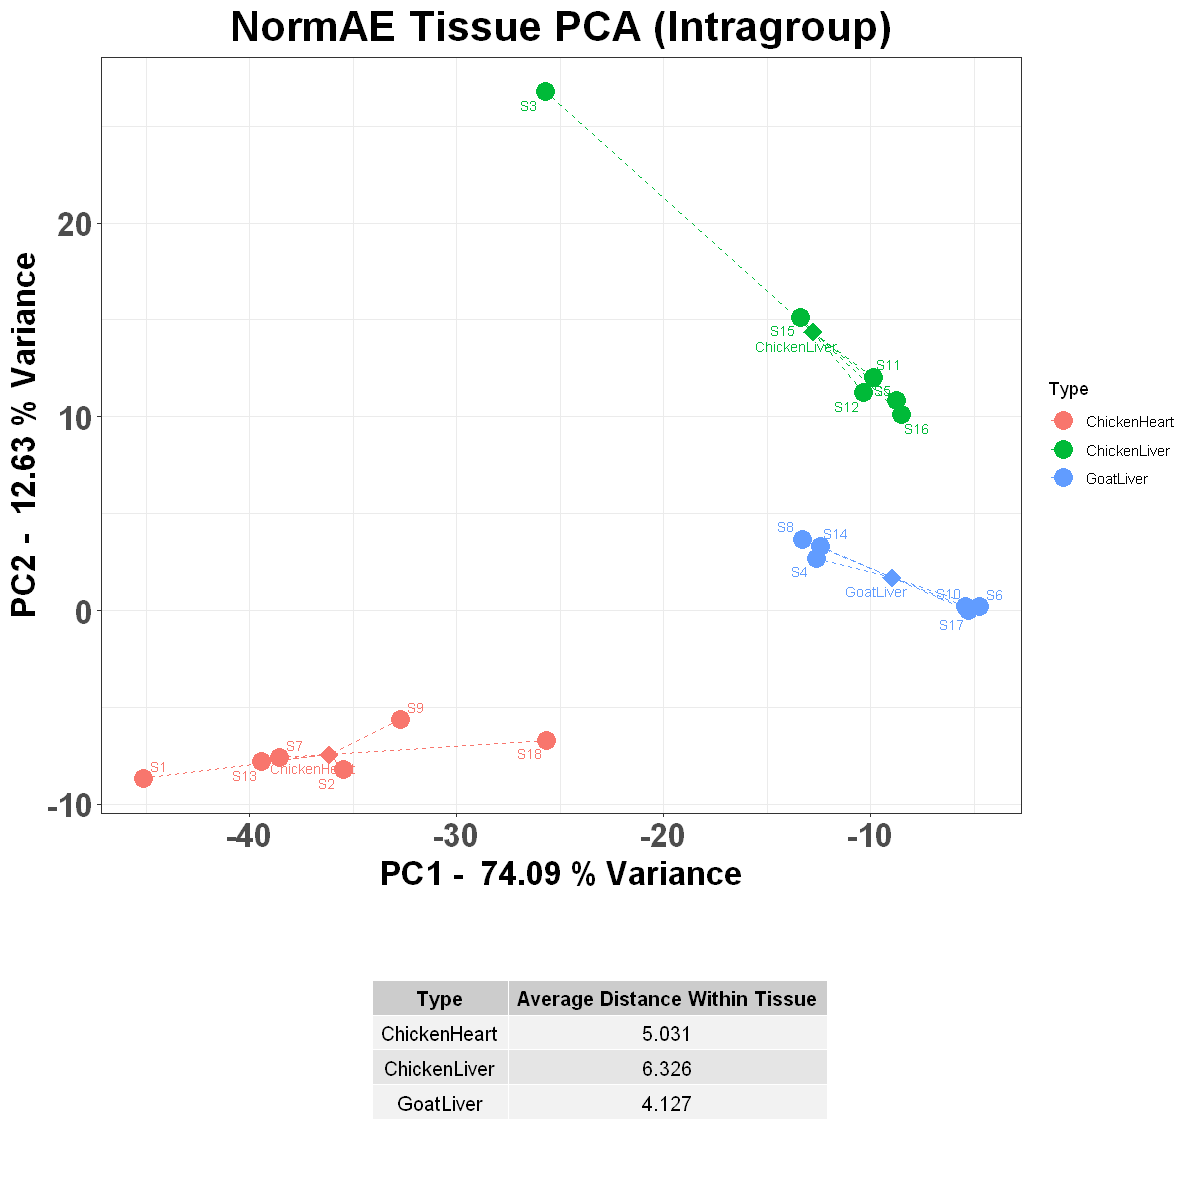

In [86]:
## Tissue PCA plot Intragroup ##
# NormAE # 
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_norm %>%
  filter(Type %in% sample_set_2)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_norm <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup pca plot
tissue_intra_plot_norm <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +  # Add dashed lines
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "NormAE Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")


# Create table plot
table_plot_norm <- tableGrob(tissue_avg_distances_norm, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_norm_intra <- grid.arrange(tissue_intra_plot_norm, table_plot_norm, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_norm_intra)

Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]
3 3 (2-2,1-1) arrange gtable[arrange]
4 4 (2-2,2-2) arrange gtable[arrange]
5 5 (3-3,1-1) arrange gtable[arrange]


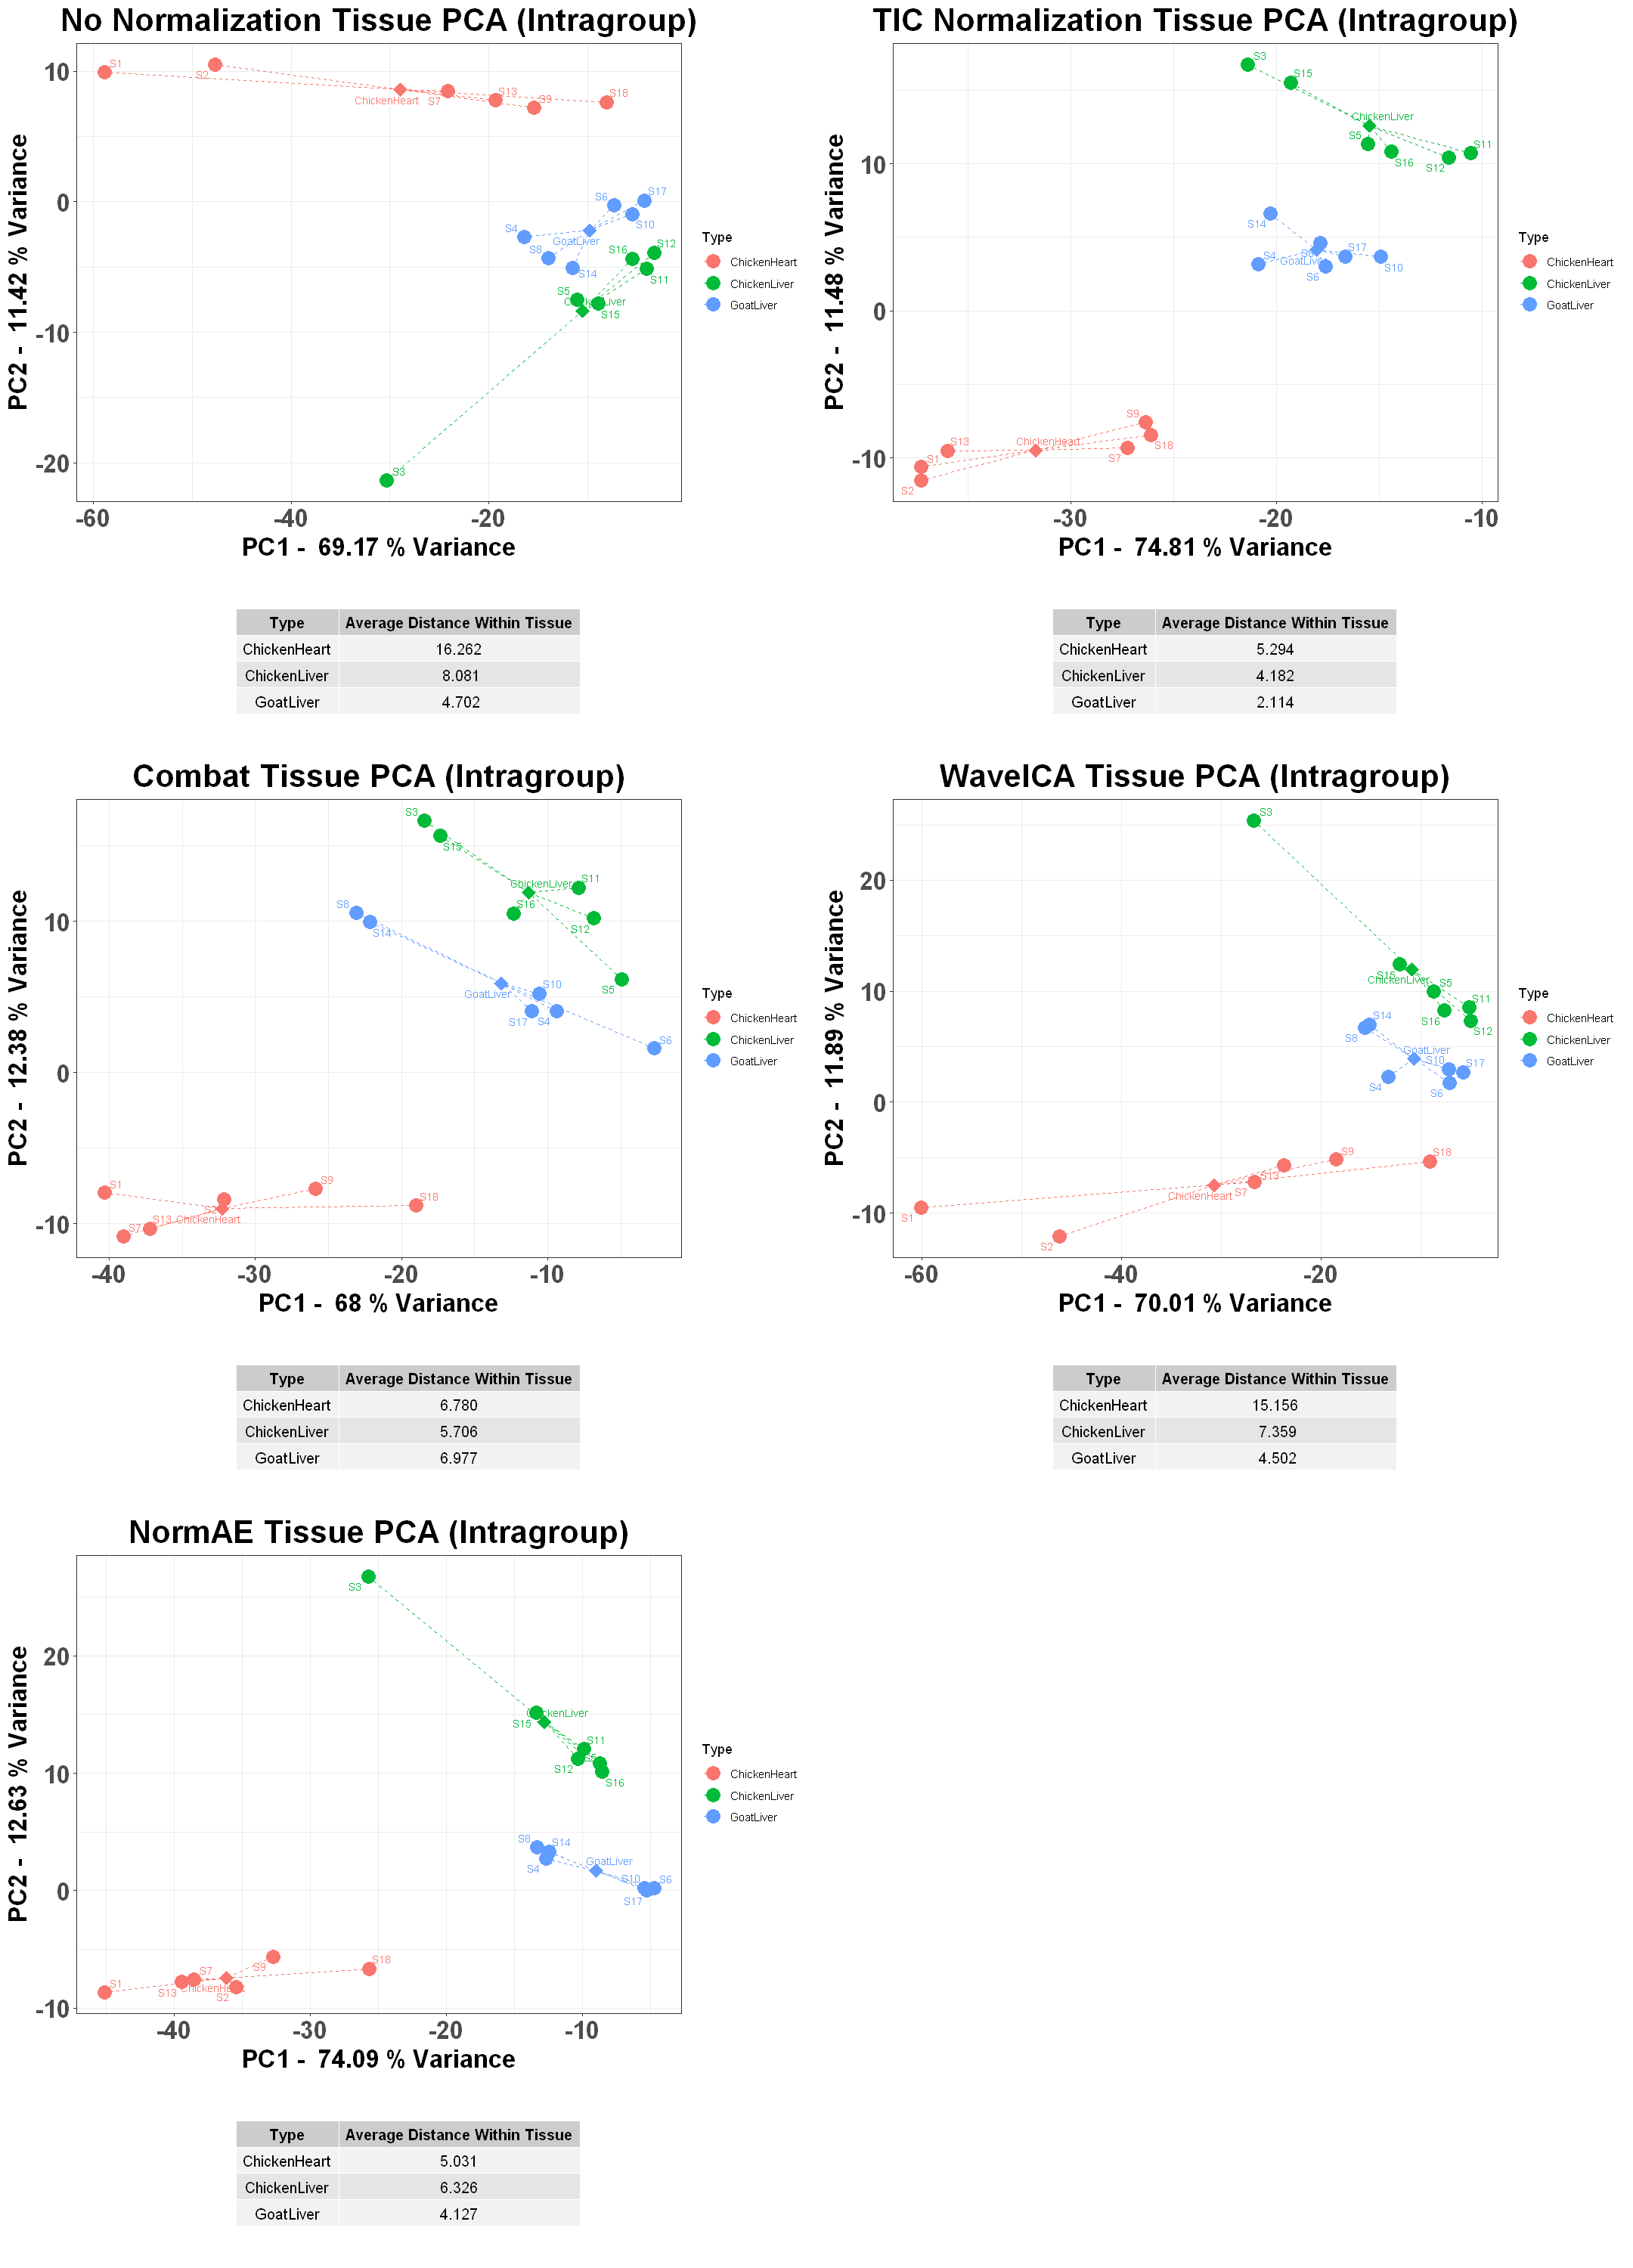

In [112]:
## Overview Tissue PCA Plot ##
options(repr.plot.width = 18, repr.plot.height = 25)

tissue_plots <- grid.arrange(combined_plot_intra,combined_plot_TIC_intra,
combined_plot_combat_intra,combined_plot_wave_intra, 
combined_plot_norm_intra, nrow = 3)

print(tissue_plots)

<u>Intergroup Tissue PCA Plot</u>

       Tissue1      Tissue2 Pair_Distance
1 ChickenHeart ChickenLiver        29.608
2 ChickenHeart    GoatLiver        24.222
3 ChickenLiver    GoatLiver         6.286
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


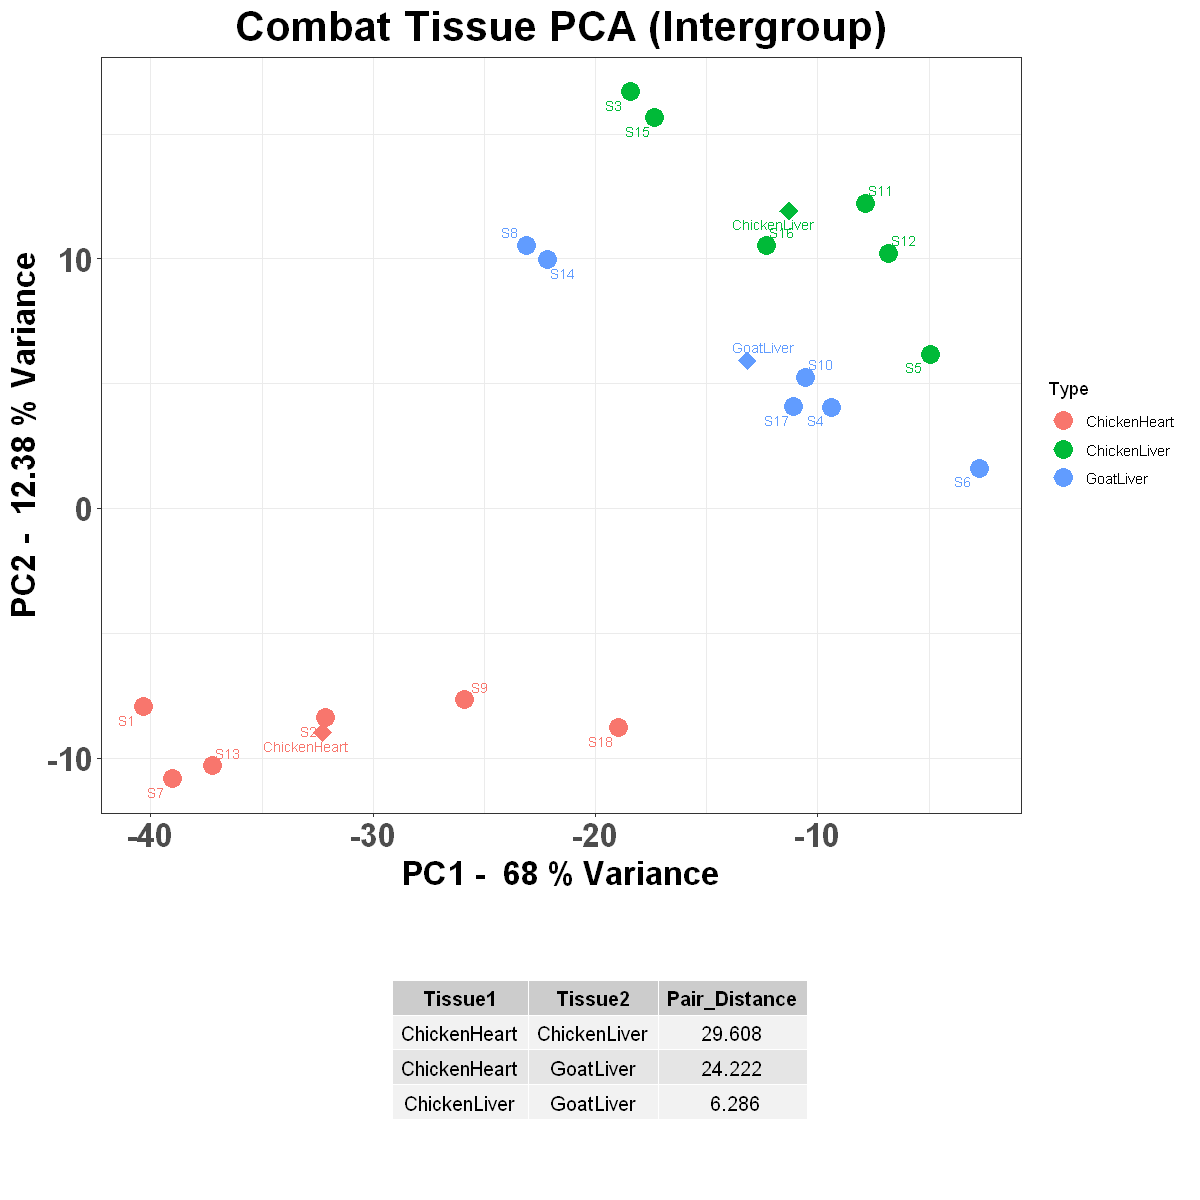

In [102]:
## Tissue PCA Plot Intergroup ##
# Combat #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_combat %>%
  filter(Type %in% sample_set_2)

# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set_2.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate intergroup distances (pairwise distances between centroids)
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

centroid_distances_df_combat <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_combat <- rbind(centroid_distances_df_combat, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}
# Create the tissue PCA plot
tissue_intergroup_plot_combat <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "Combat Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table_combat <- tableGrob(centroid_distances_df_combat, rows = NULL)
print(centroid_distances_df_combat)

# Arrange plots and table vertically
combined_plot_combat_inter <- grid.arrange(tissue_intergroup_plot_combat, centroid_table_combat, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_combat_inter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


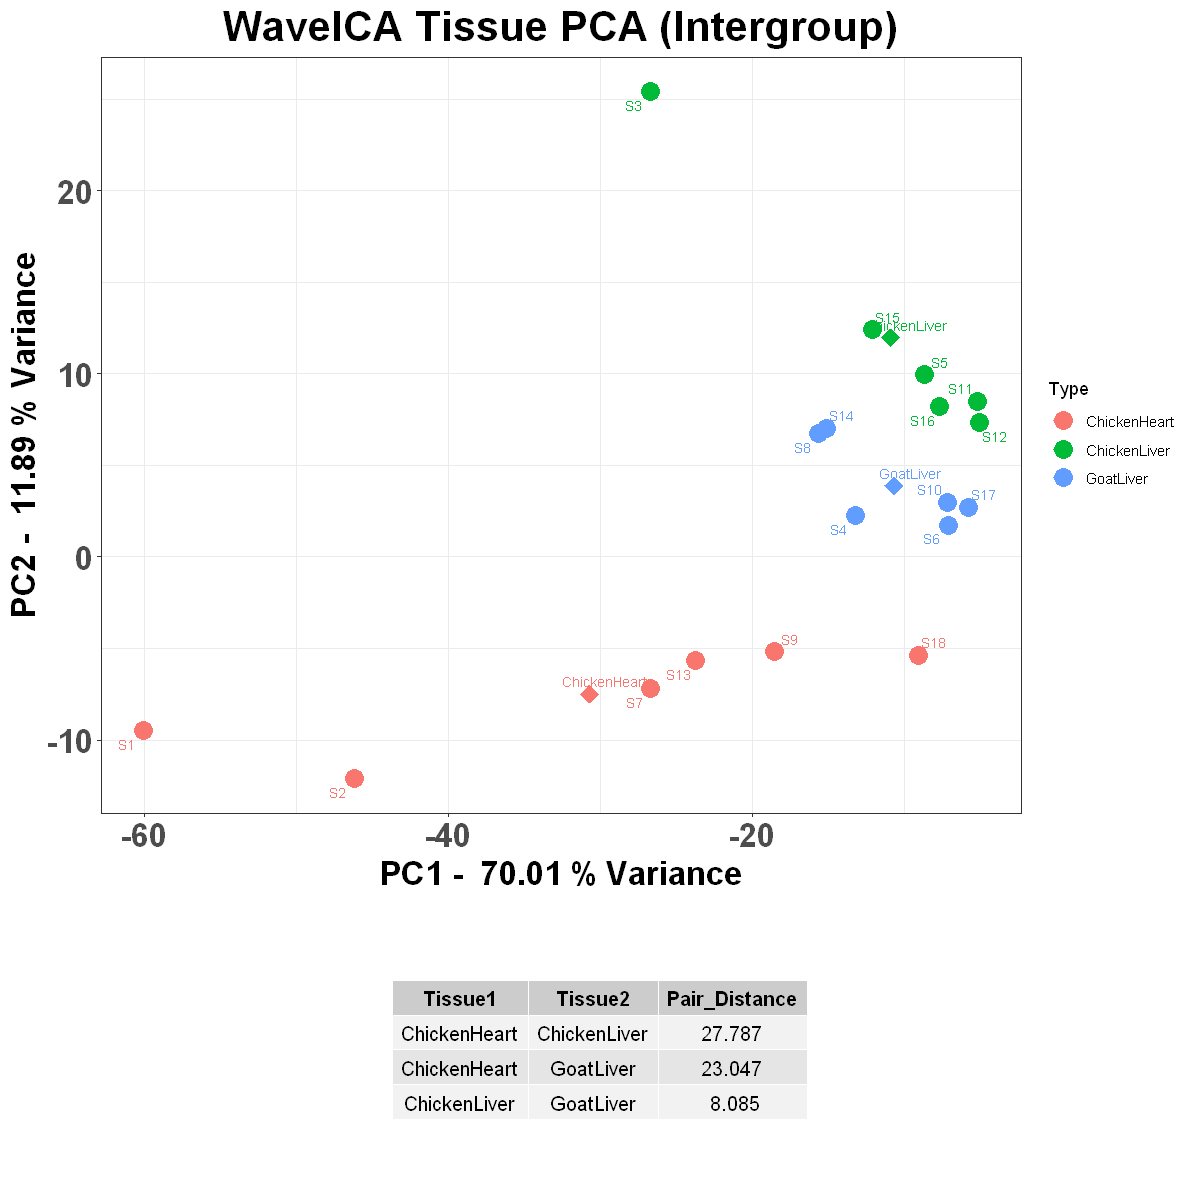

In [90]:
## Tissue PCA Plot Intergroup ##
# WaveICA #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_wave %>%
  filter(Type %in% sample_set_2)

# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate intergroup distances (pairwise distances between centroids)
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

centroid_distances_df_wave <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_wave <- rbind(centroid_distances_df_wave, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}

# Create the tissue PCA plot
tissue_intergroup_plot_wave <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "WaveICA Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table_wave <- tableGrob(centroid_distances_df_wave, rows = NULL)

# Arrange plots and table vertically
combined_plot_wave_inter <- grid.arrange(tissue_intergroup_plot_wave, centroid_table_wave, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_wave_inter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


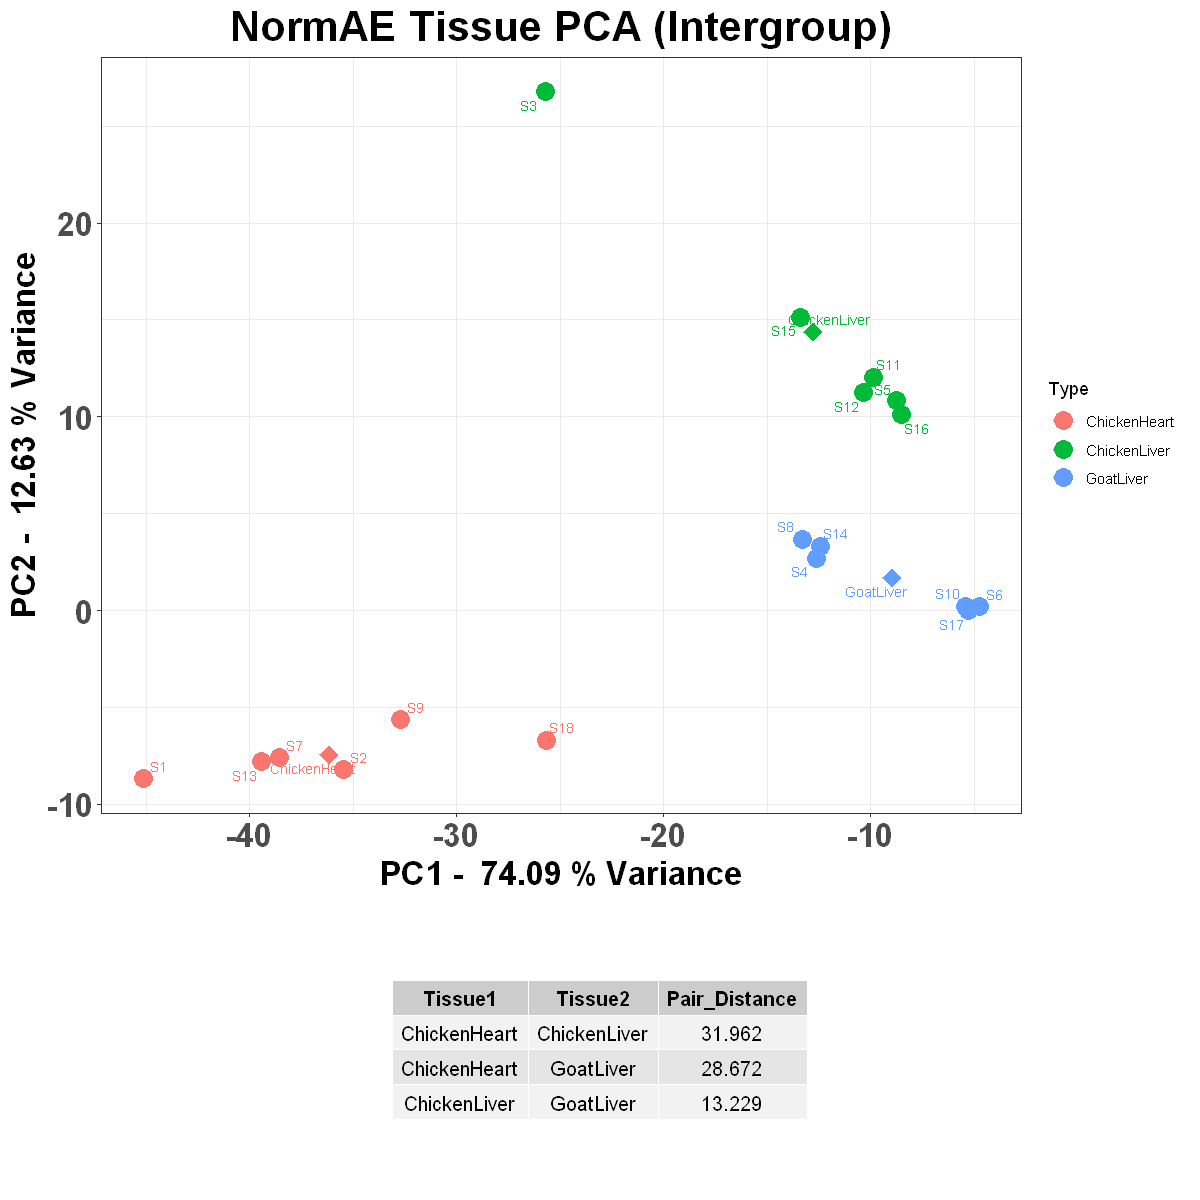

In [91]:
## Tissue PCA Plot Intergroup ##
# NormAE #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_norm %>%
  filter(Type %in% sample_set_2)

# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate intergroup distances (pairwise distances between centroids)
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

centroid_distances_df_norm <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_norm <- rbind(centroid_distances_df_norm, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}

# Create the tissue PCA plot
tissue_intergroup_plot_norm <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "NormAE Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table_norm <- tableGrob(centroid_distances_df_norm, rows = NULL)

# Arrange plots and table vertically
combined_plot_norm_inter <- grid.arrange(tissue_intergroup_plot_norm, centroid_table_norm, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_norm_inter)

Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]
3 3 (2-2,1-1) arrange gtable[arrange]
4 4 (2-2,2-2) arrange gtable[arrange]
5 5 (3-3,1-1) arrange gtable[arrange]


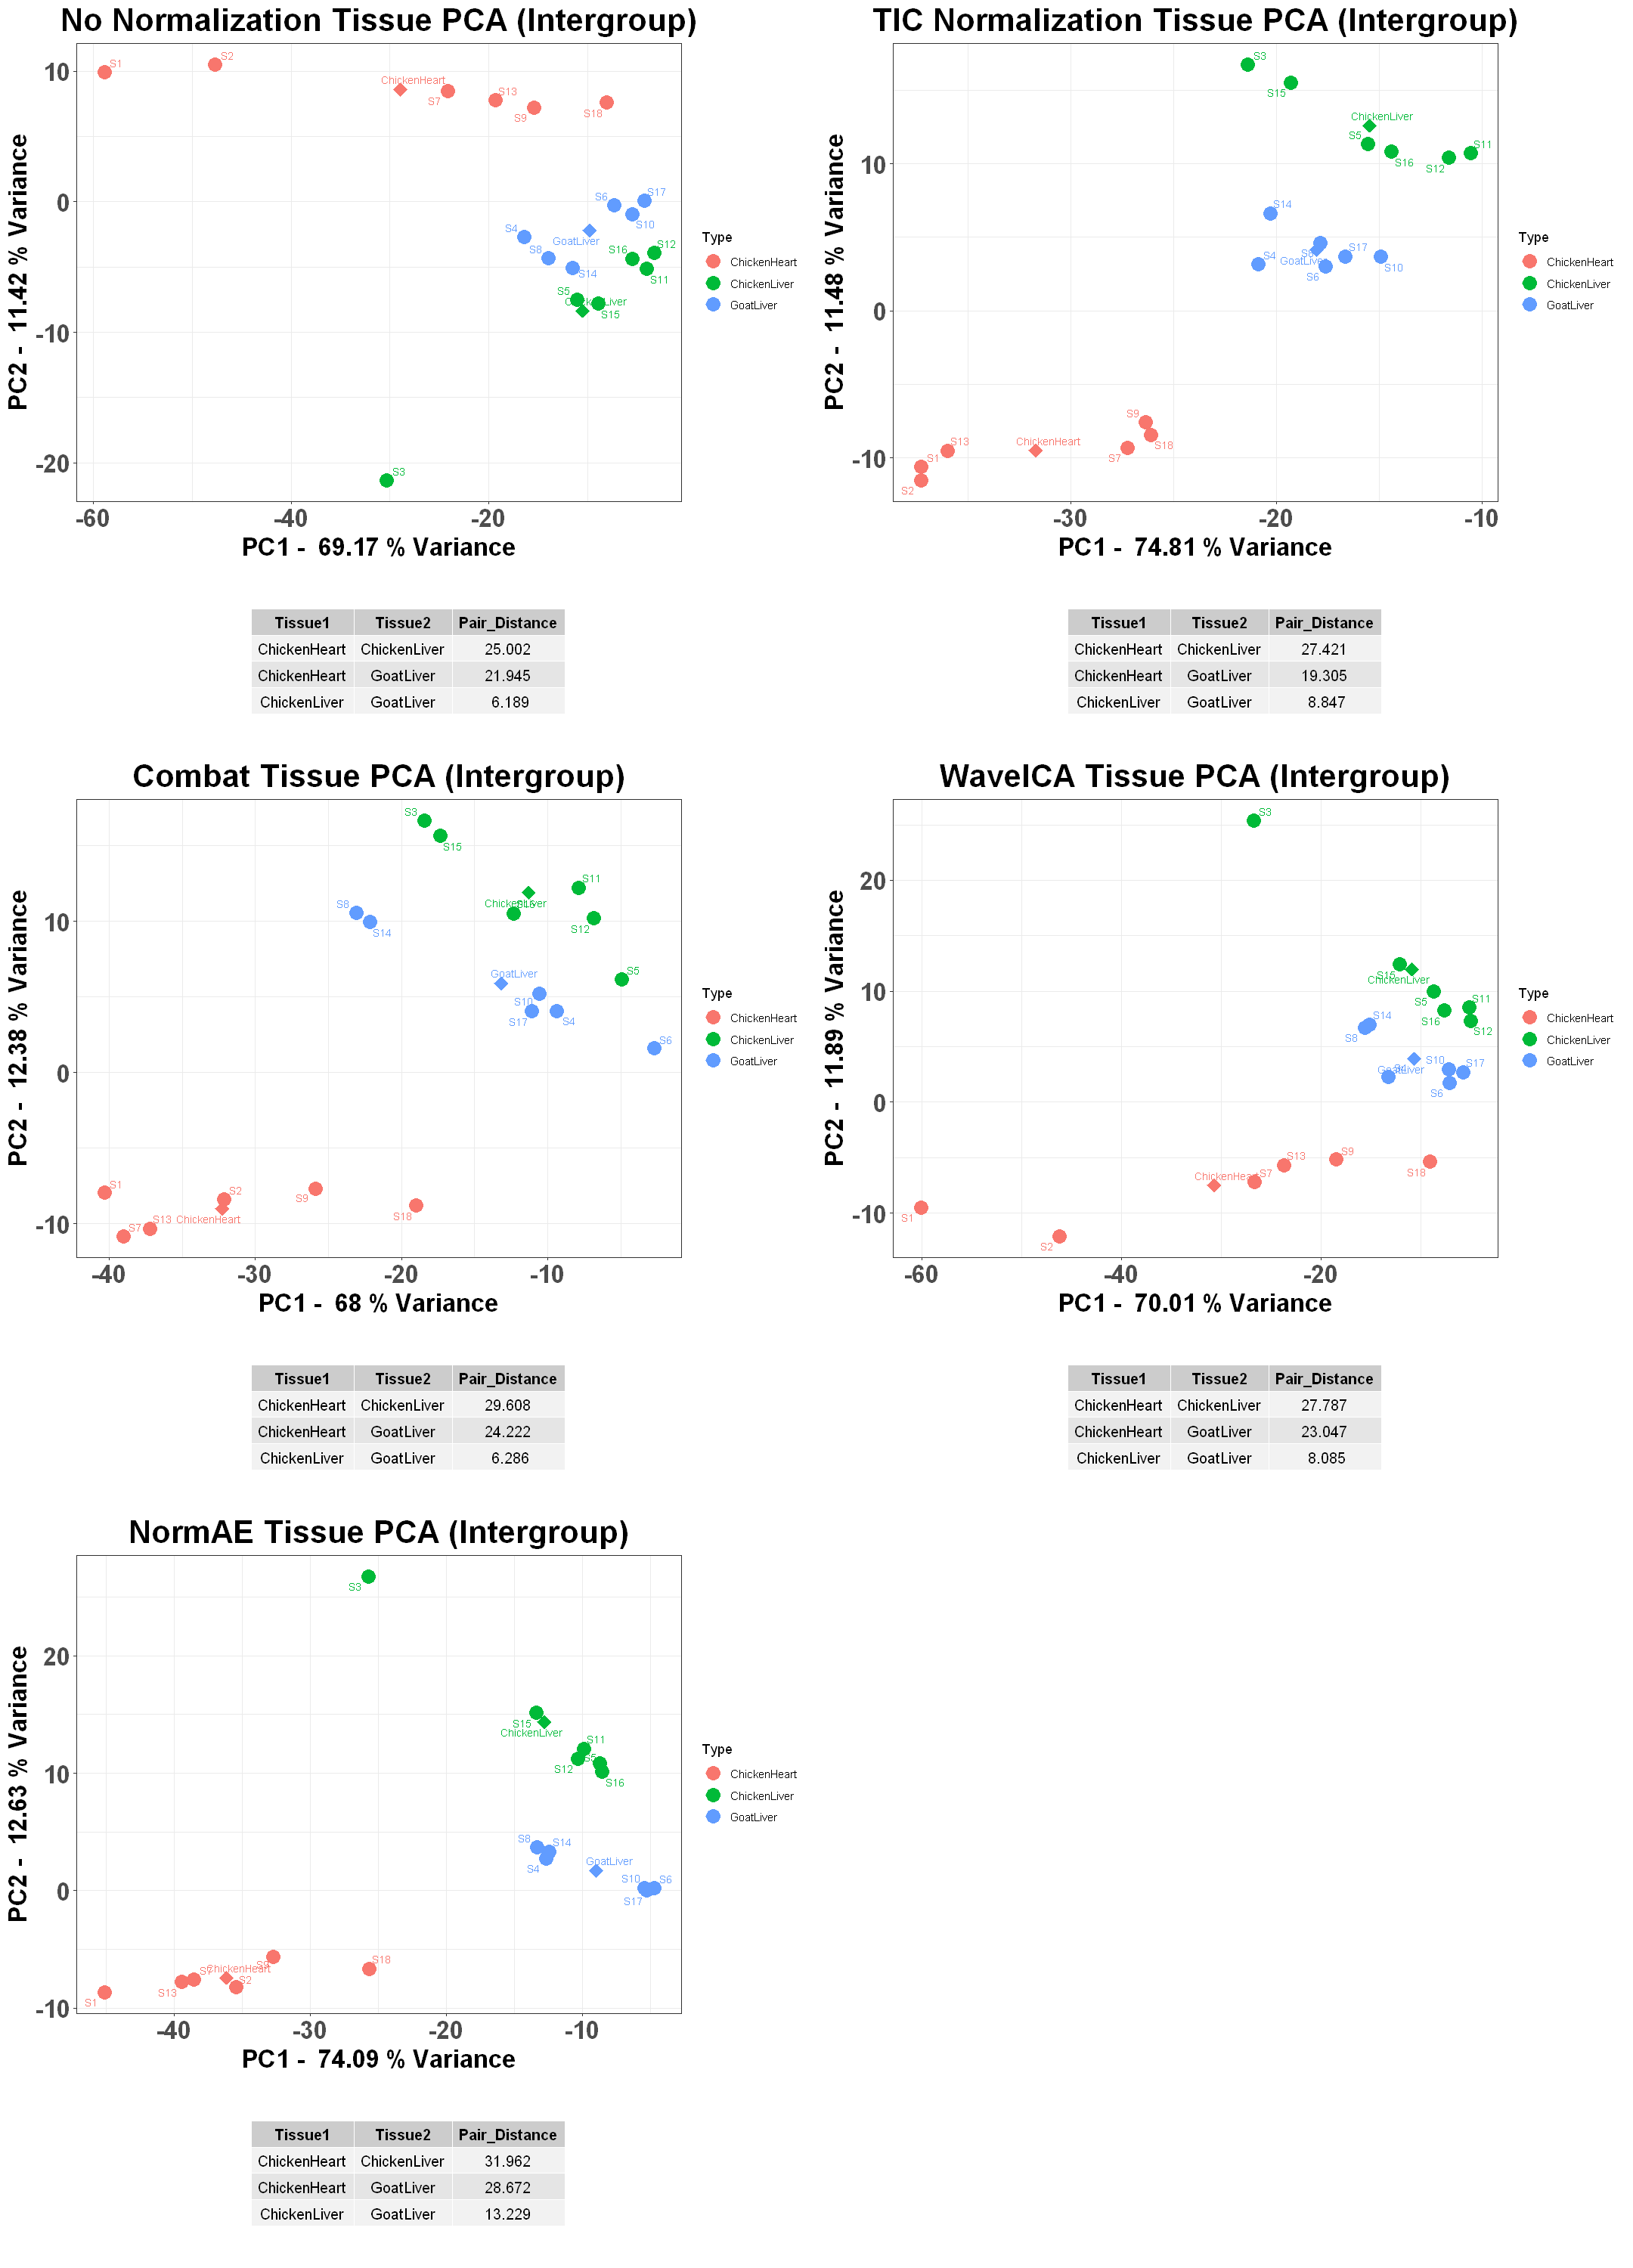

In [111]:
## Overview Intergroup Tissue PCA Plot ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_interday <- grid.arrange(combined_plot_inter, combined_plot_TIC_inter, combined_plot_combat_inter,
                                        combined_plot_wave_inter, combined_plot_norm_inter, nrow = 3)
print(combined_plots_interday)

<h2><u><b>Comparison</b></u></h2>
<a id="comparison_2"></a>

1. [QCS_RSD_Overview](#qcs_rsd_overview_2)
2. [QCS_Intensity_Plot_Overview](#qcs_intensity_overview_2)
3. [QCS_Violin_Plot_Overview](#qcs_violin_overview_2)
4. [QCS_PCA_Plot_Overview](#qcs_pca_overview_2)
5. [Tissue_RSD_Overview](#tissue_rsd_overview_2)
6. [PCA_Plot_Overview](#pca_overview_2)
7. [Tissue_PCA_Plot_Overview](#tissue_pca_overview_2)
8. [Average Distance Overview (Euclidean, Intra, Intergroup)](#distance_overview_2)

## 1. QCS RSD Overview ##
<a id="qcs_rsd_overview_2"></a>

In [128]:
## QCS RSD Overview Table ##
# Create overview RSD table for Propranolol
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_norm_RSD = rsd_propranolol[2],  
  TIC_norm_RSD = rsd_propranolol_TIC[2],
  IS_norm_RSD = rsd_ratio[2],
  Combat_RSD = rsd_propranolol_combat[2],
  WaveICA_RSD = rsd_propranolol_wave[2],
  NormAE_RSD = rsd_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_pro) <- c(paste("m/z value:", propranolol_mz_value_2),"No Norm","TIC Norm","IS Norm", "Combat", "WaveICA", "NormAE")
library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

# Create overview RSD table for d7-Propranolol
overview_table_d7_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_norm_RSD = rsd_d7_propranolol[2],
  TIC_norm_RSD = rsd_d7_propranolol[2],
  Combat_RSD = rsd_d7_propranolol_combat[2],
  WaveICA_RSD = rsd_d7_propranolol_wave[2],
  NormAE_RSD = rsd_d7_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_d7_pro) <- c(paste("m/z value:", d7_propranolol_mz_value_2),"No Norm","TIC Norm","Combat", "WaveICA", "NormAE")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_d7_pro <- kable(overview_table_d7_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_d7_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table D7-Propranolol</h2>", 
                               as.character(display_rsd_table_d7_pro))

# Save HTML table to a file
display_html(display_rsd_table_d7_pro)

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 No Norm 
 TIC Norm 
 IS Norm 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 70.5% 
 63.511% 
 10.475% 
 55.338% 
 26.979% 
 26.079% 
 
 
 Intraday 2 
 41.414% 
 38.884% 
 13.597% 
 43.407% 
 30.695% 
 30.577% 
 
 
 Intraday 3 
 34.072% 
 36.26% 
 17.122% 
 35.211% 
 37.456% 
 29.366% 
 
 
 Interday 
 52.048% 
 50.685% 
 14.11% 
 46.018% 
 32.487% 
 28.449%

Overview RSD Table D7-Propranolol 
 
 
 m/z value: 267.187 
 No Norm 
 TIC Norm 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 73.808% 
 73.808% 
 57.579% 
 25.979% 
 29.47% 
 
 
 Intraday 2 
 39.711% 
 39.711% 
 43.346% 
 28.134% 
 33.442% 
 
 
 Intraday 3 
 35.566% 
 35.566% 
 35.254% 
 33.824% 
 32.58% 
 
 
 Interday 
 53.147% 
 53.147% 
 47.248% 
 29.882% 
 31.567%

## 2. QCS Intensity Plot Overview ##
<a id="qcs_intensity_overview_2"></a>

Black dotted line represent standard deviation while red dotted line represent mean of intensity
TableGrob (3 x 2) "arrange": 6 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]


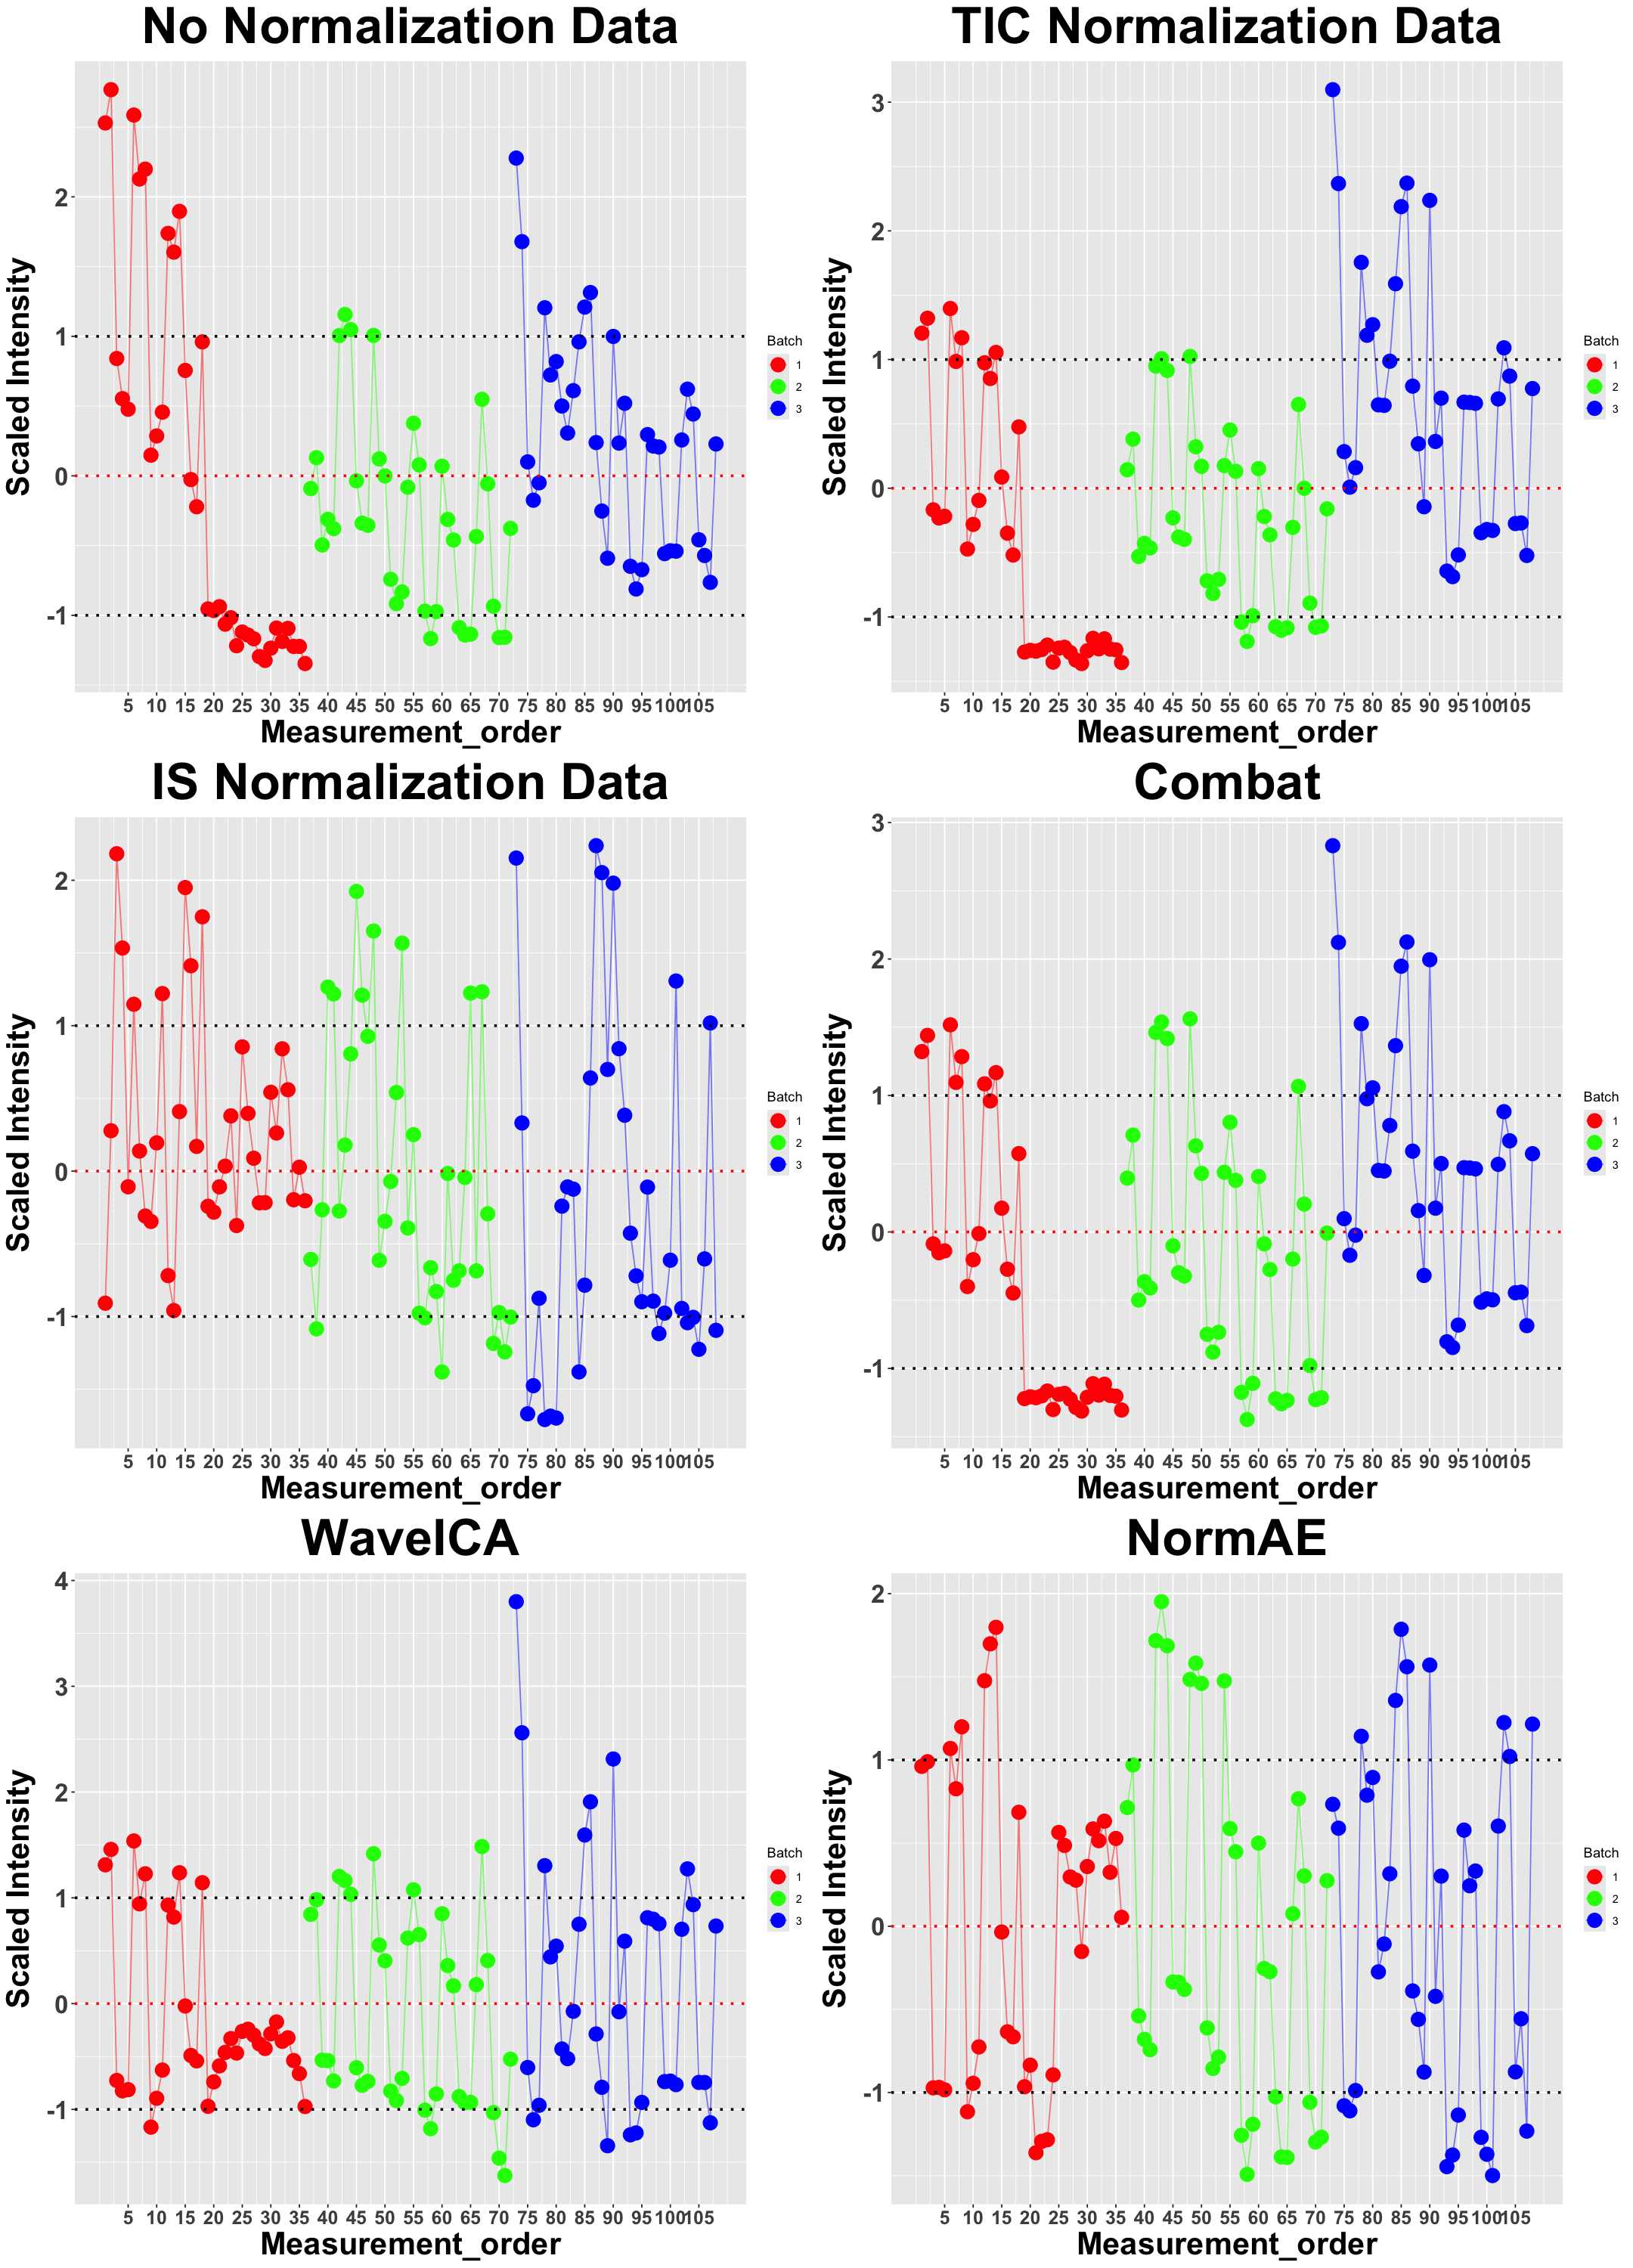

In [129]:
## Intensity Plot ##
library(gridExtra)
options(repr.plot.width = 18, repr.plot.height = 25)
cat("\033[1mBlack dotted line represent standard deviation while red dotted line represent mean of intensity\033[0m\n")
combined_plots_intensity <- grid.arrange(intensity_plot, intensity_plot_TIC, intensity_plot_IS, intensity_plot_combat, intensity_plot_wave,
                                      intensity_plot_norm, nrow = 3)
print(combined_plots_intensity)

## 3. QCS Violin Plot Overview
<a id="qcs_violin_overview_2"></a>

TableGrob (3 x 2) "arrange": 6 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]


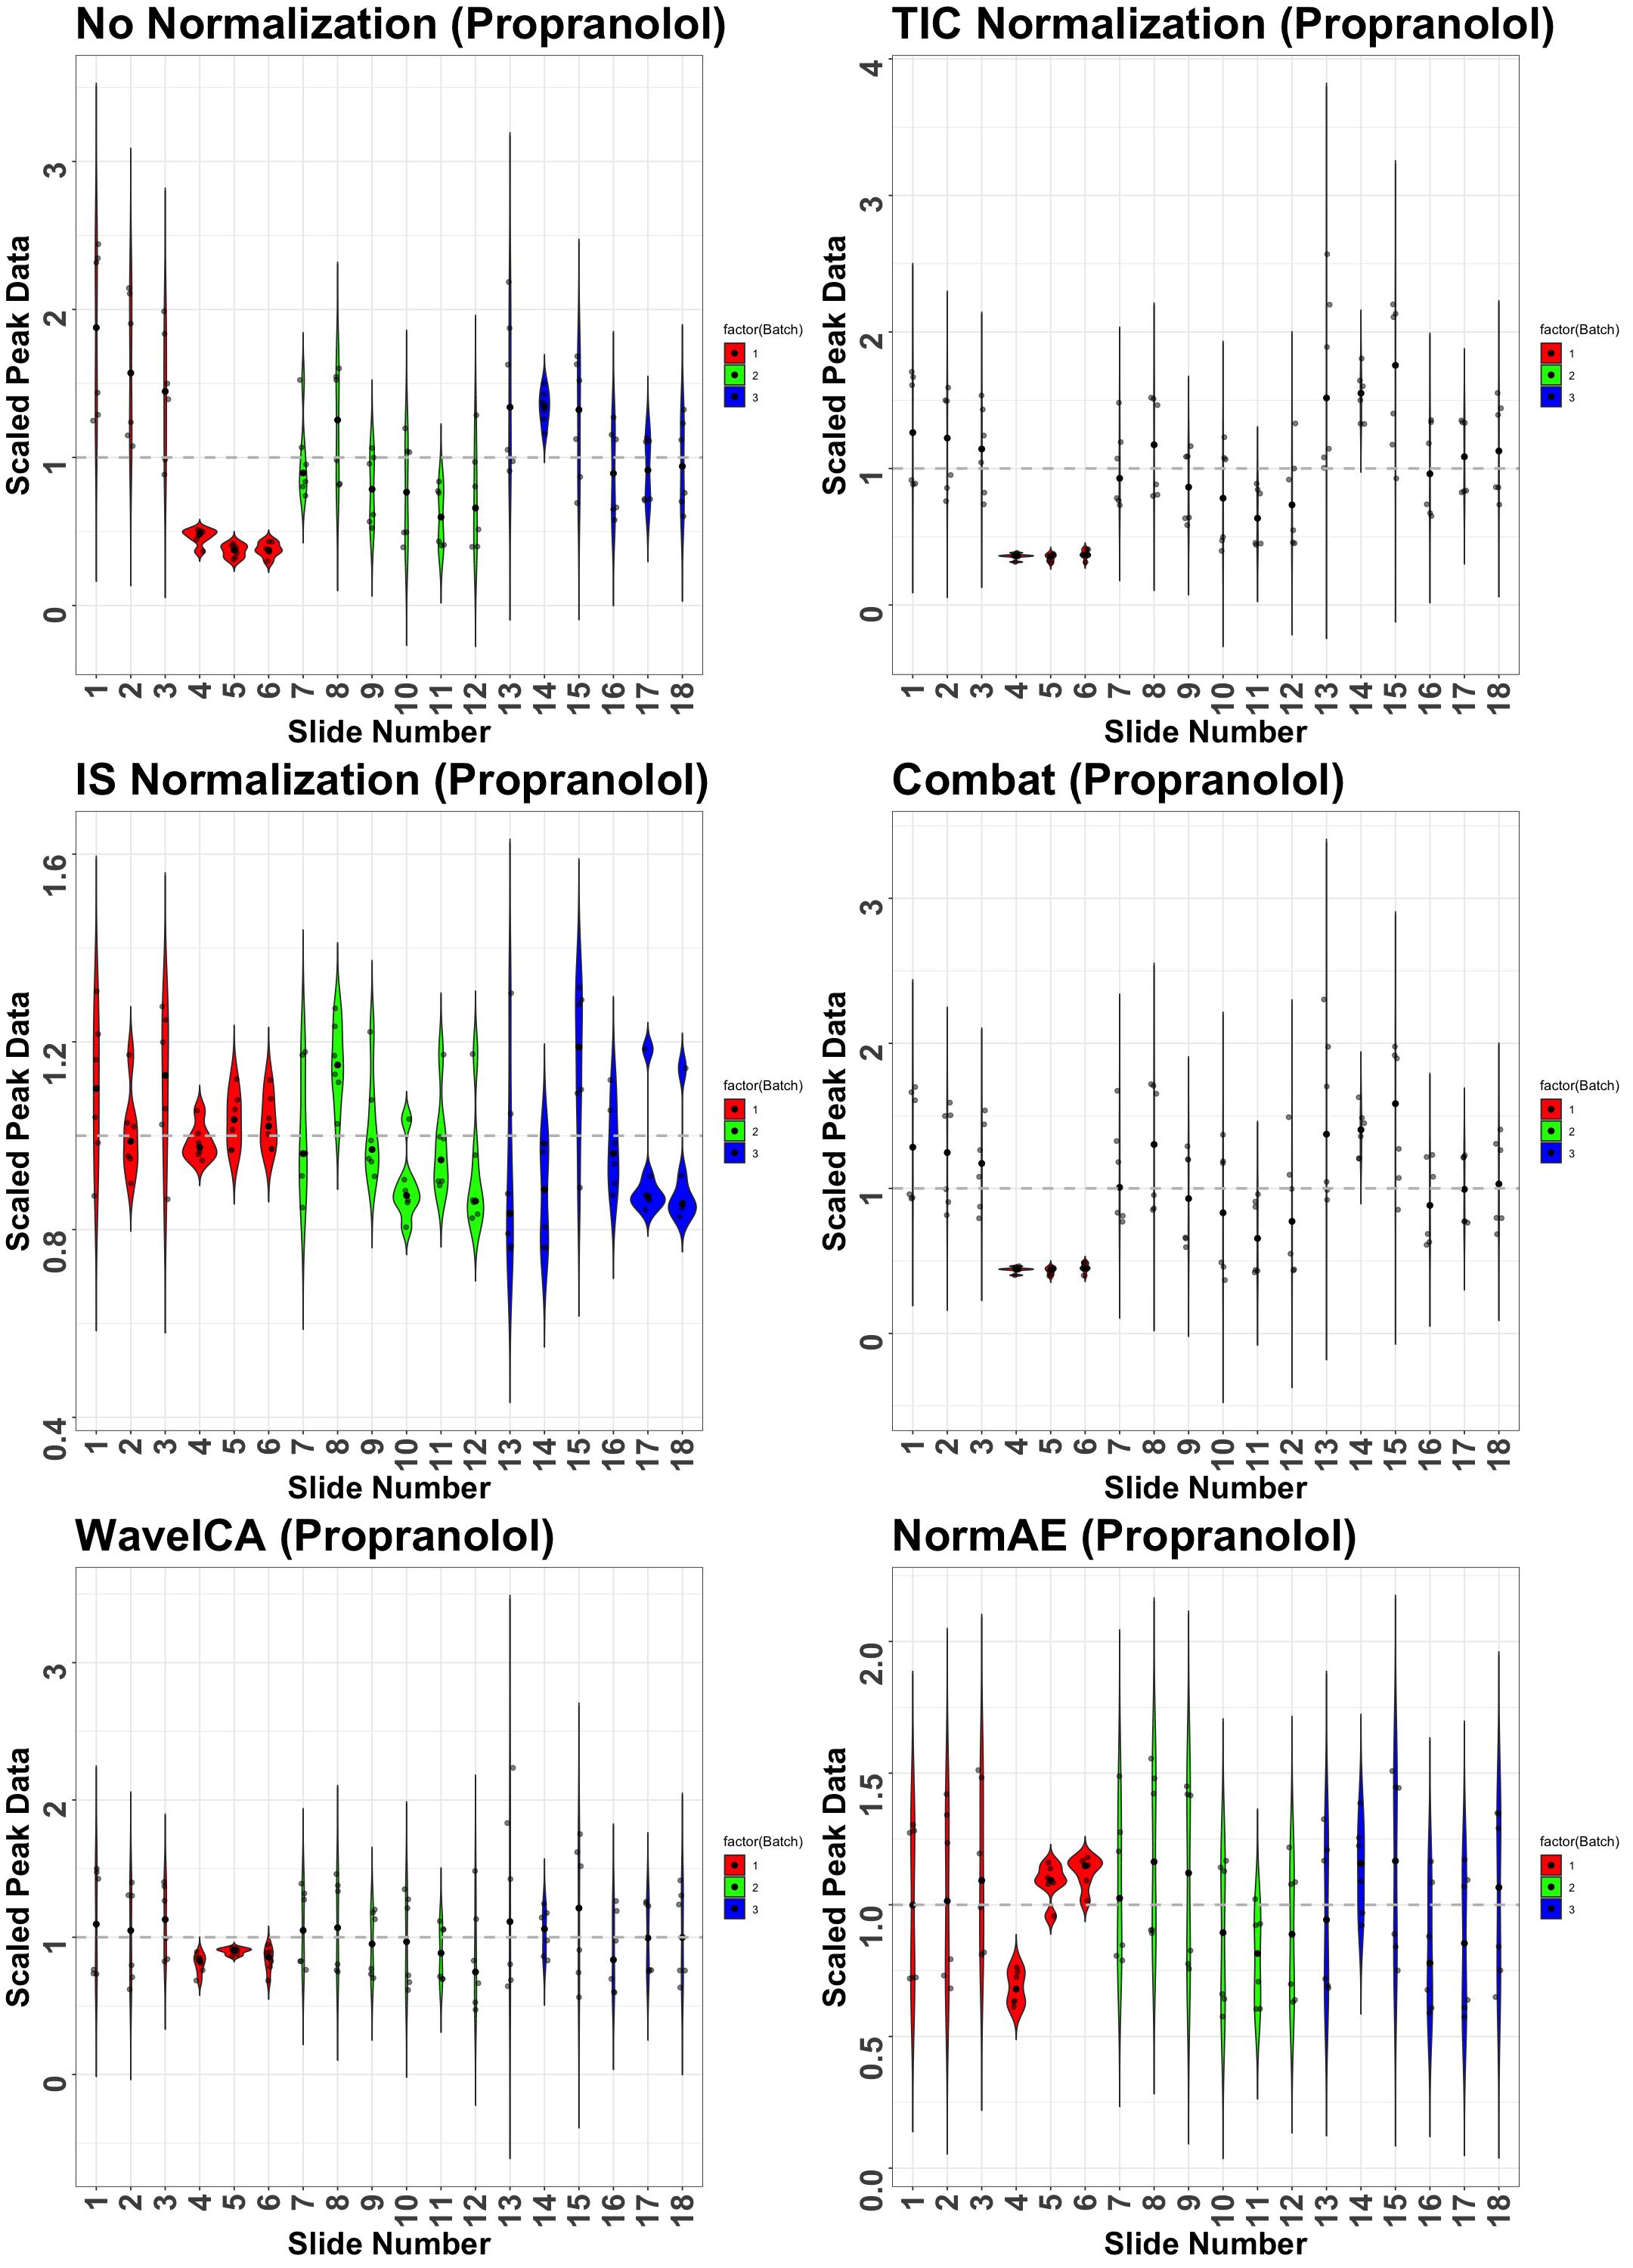

In [130]:
## Violin Plot (Propranolol) ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_violin <- grid.arrange(violin_plot_jit, violin_plot_TIC_jit, violin_plot_IS_jit, violin_plot_combat_jit, violin_plot_wave_jit, violin_plot_norm_jit, nrow = 3)
print(combined_plots_violin)

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


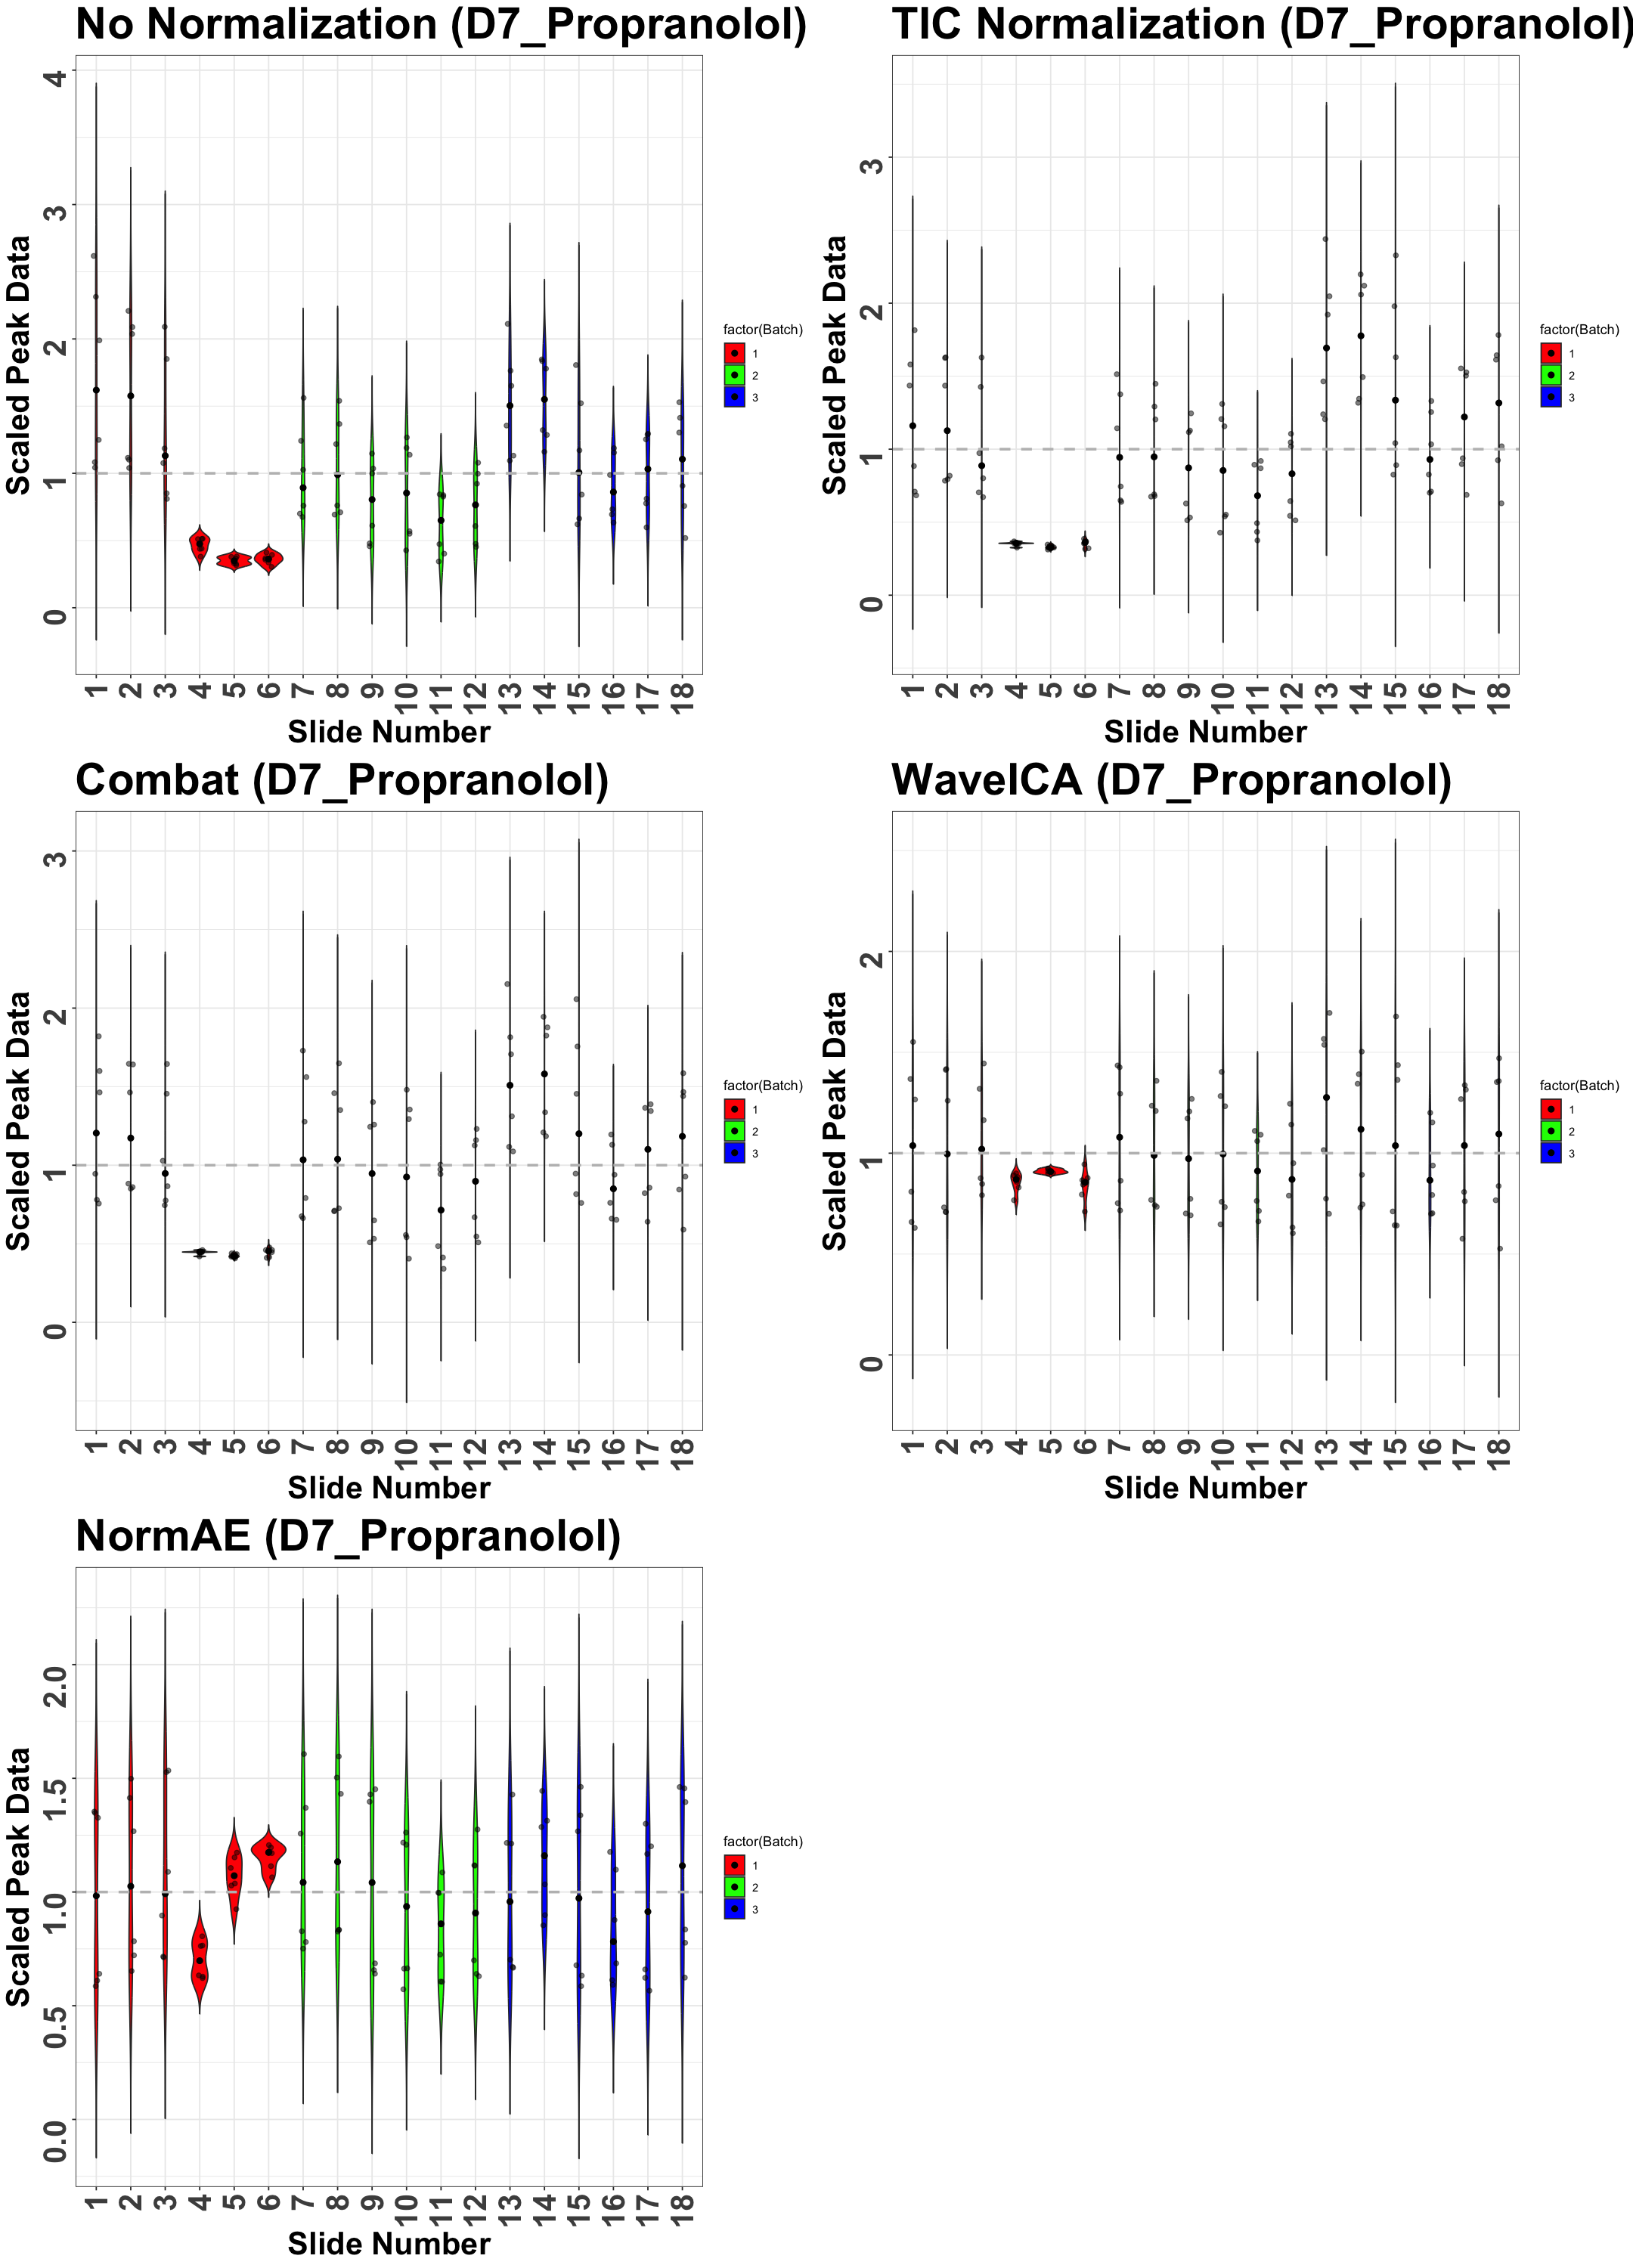

In [131]:
## Violin Plot (D7-Propranolol) ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_violin_d7 <- grid.arrange(violin_plot_jit_d7, violin_plot_TIC_jit_d7, violin_plot_combat_jit_d7, violin_plot_wave_jit_d7, violin_plot_norm_jit_d7, nrow = 3)
print(combined_plots_violin_d7)

## 4. PCA Plot Overview ##
<a id="pca_overview_2"></a>

TableGrob (4 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


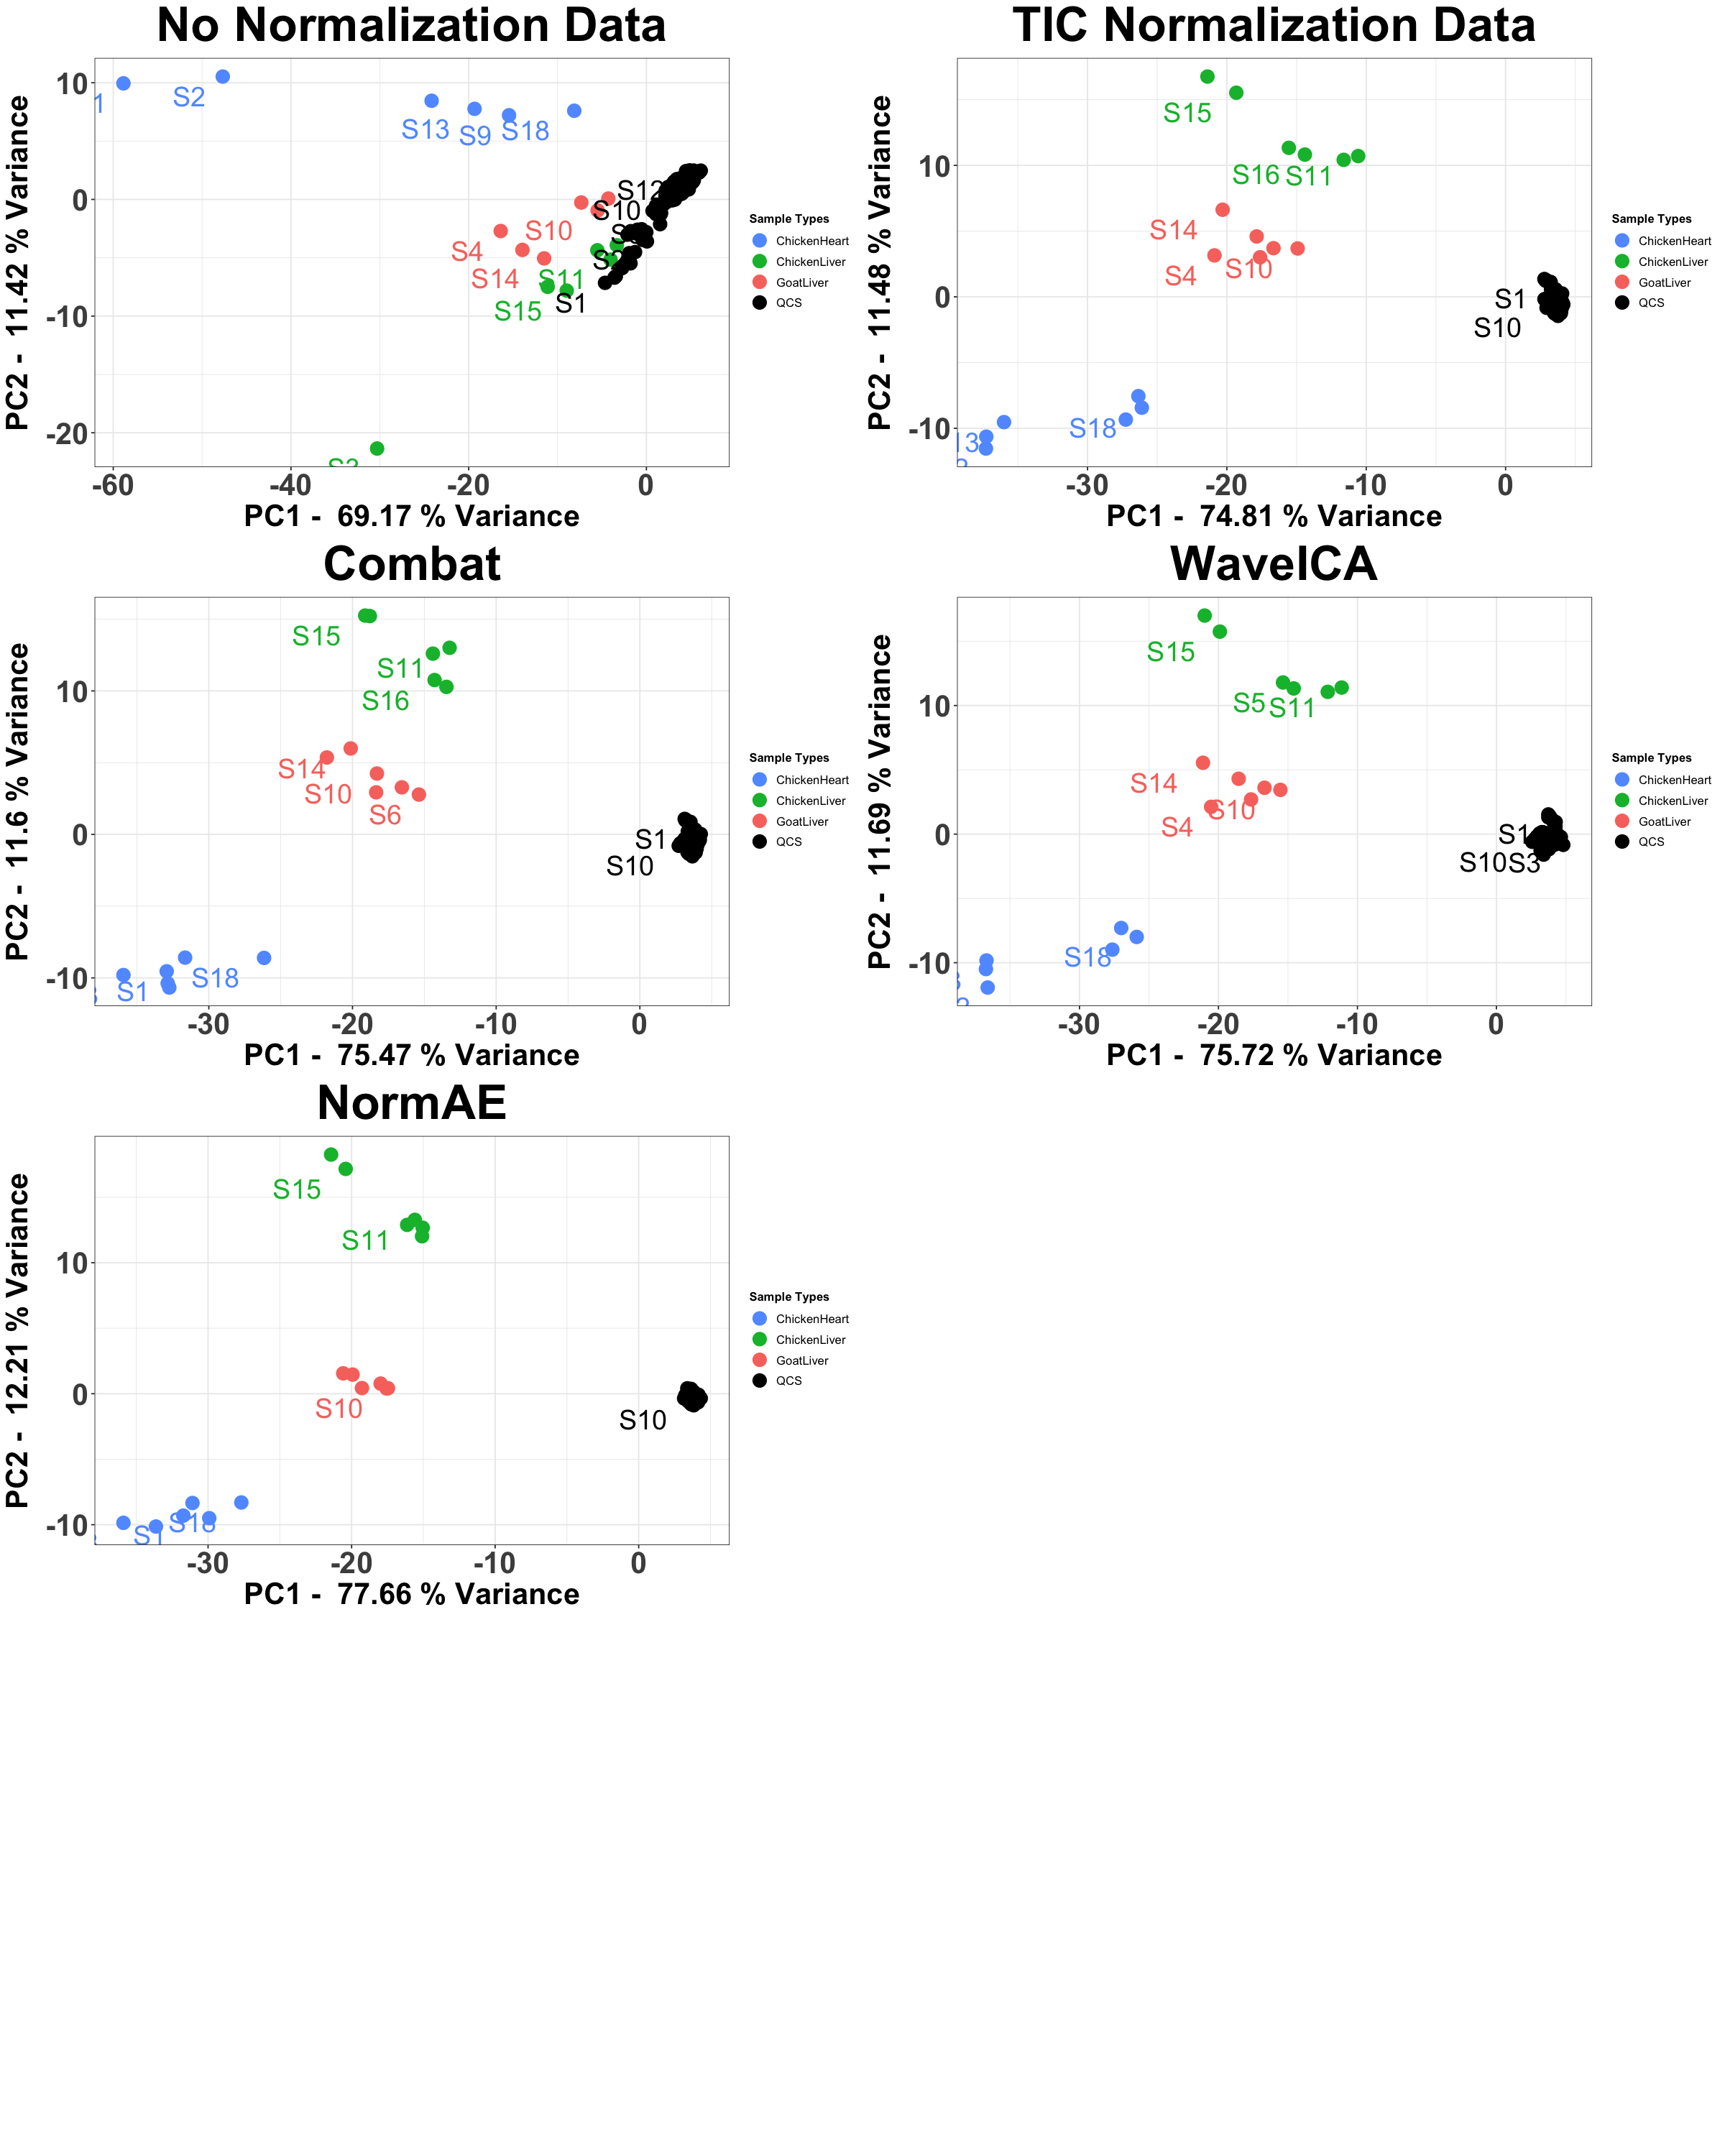

In [132]:
## PCA Plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 25)
combined_plots <- grid.arrange(plot, plot_TIC, plot_combat, plot_wave, plot_norm, nrow = 4)
print(combined_plots)

## 5. QCS PCA Plot Overview ##
<a id="qcs_pca_overview_2"></a>

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


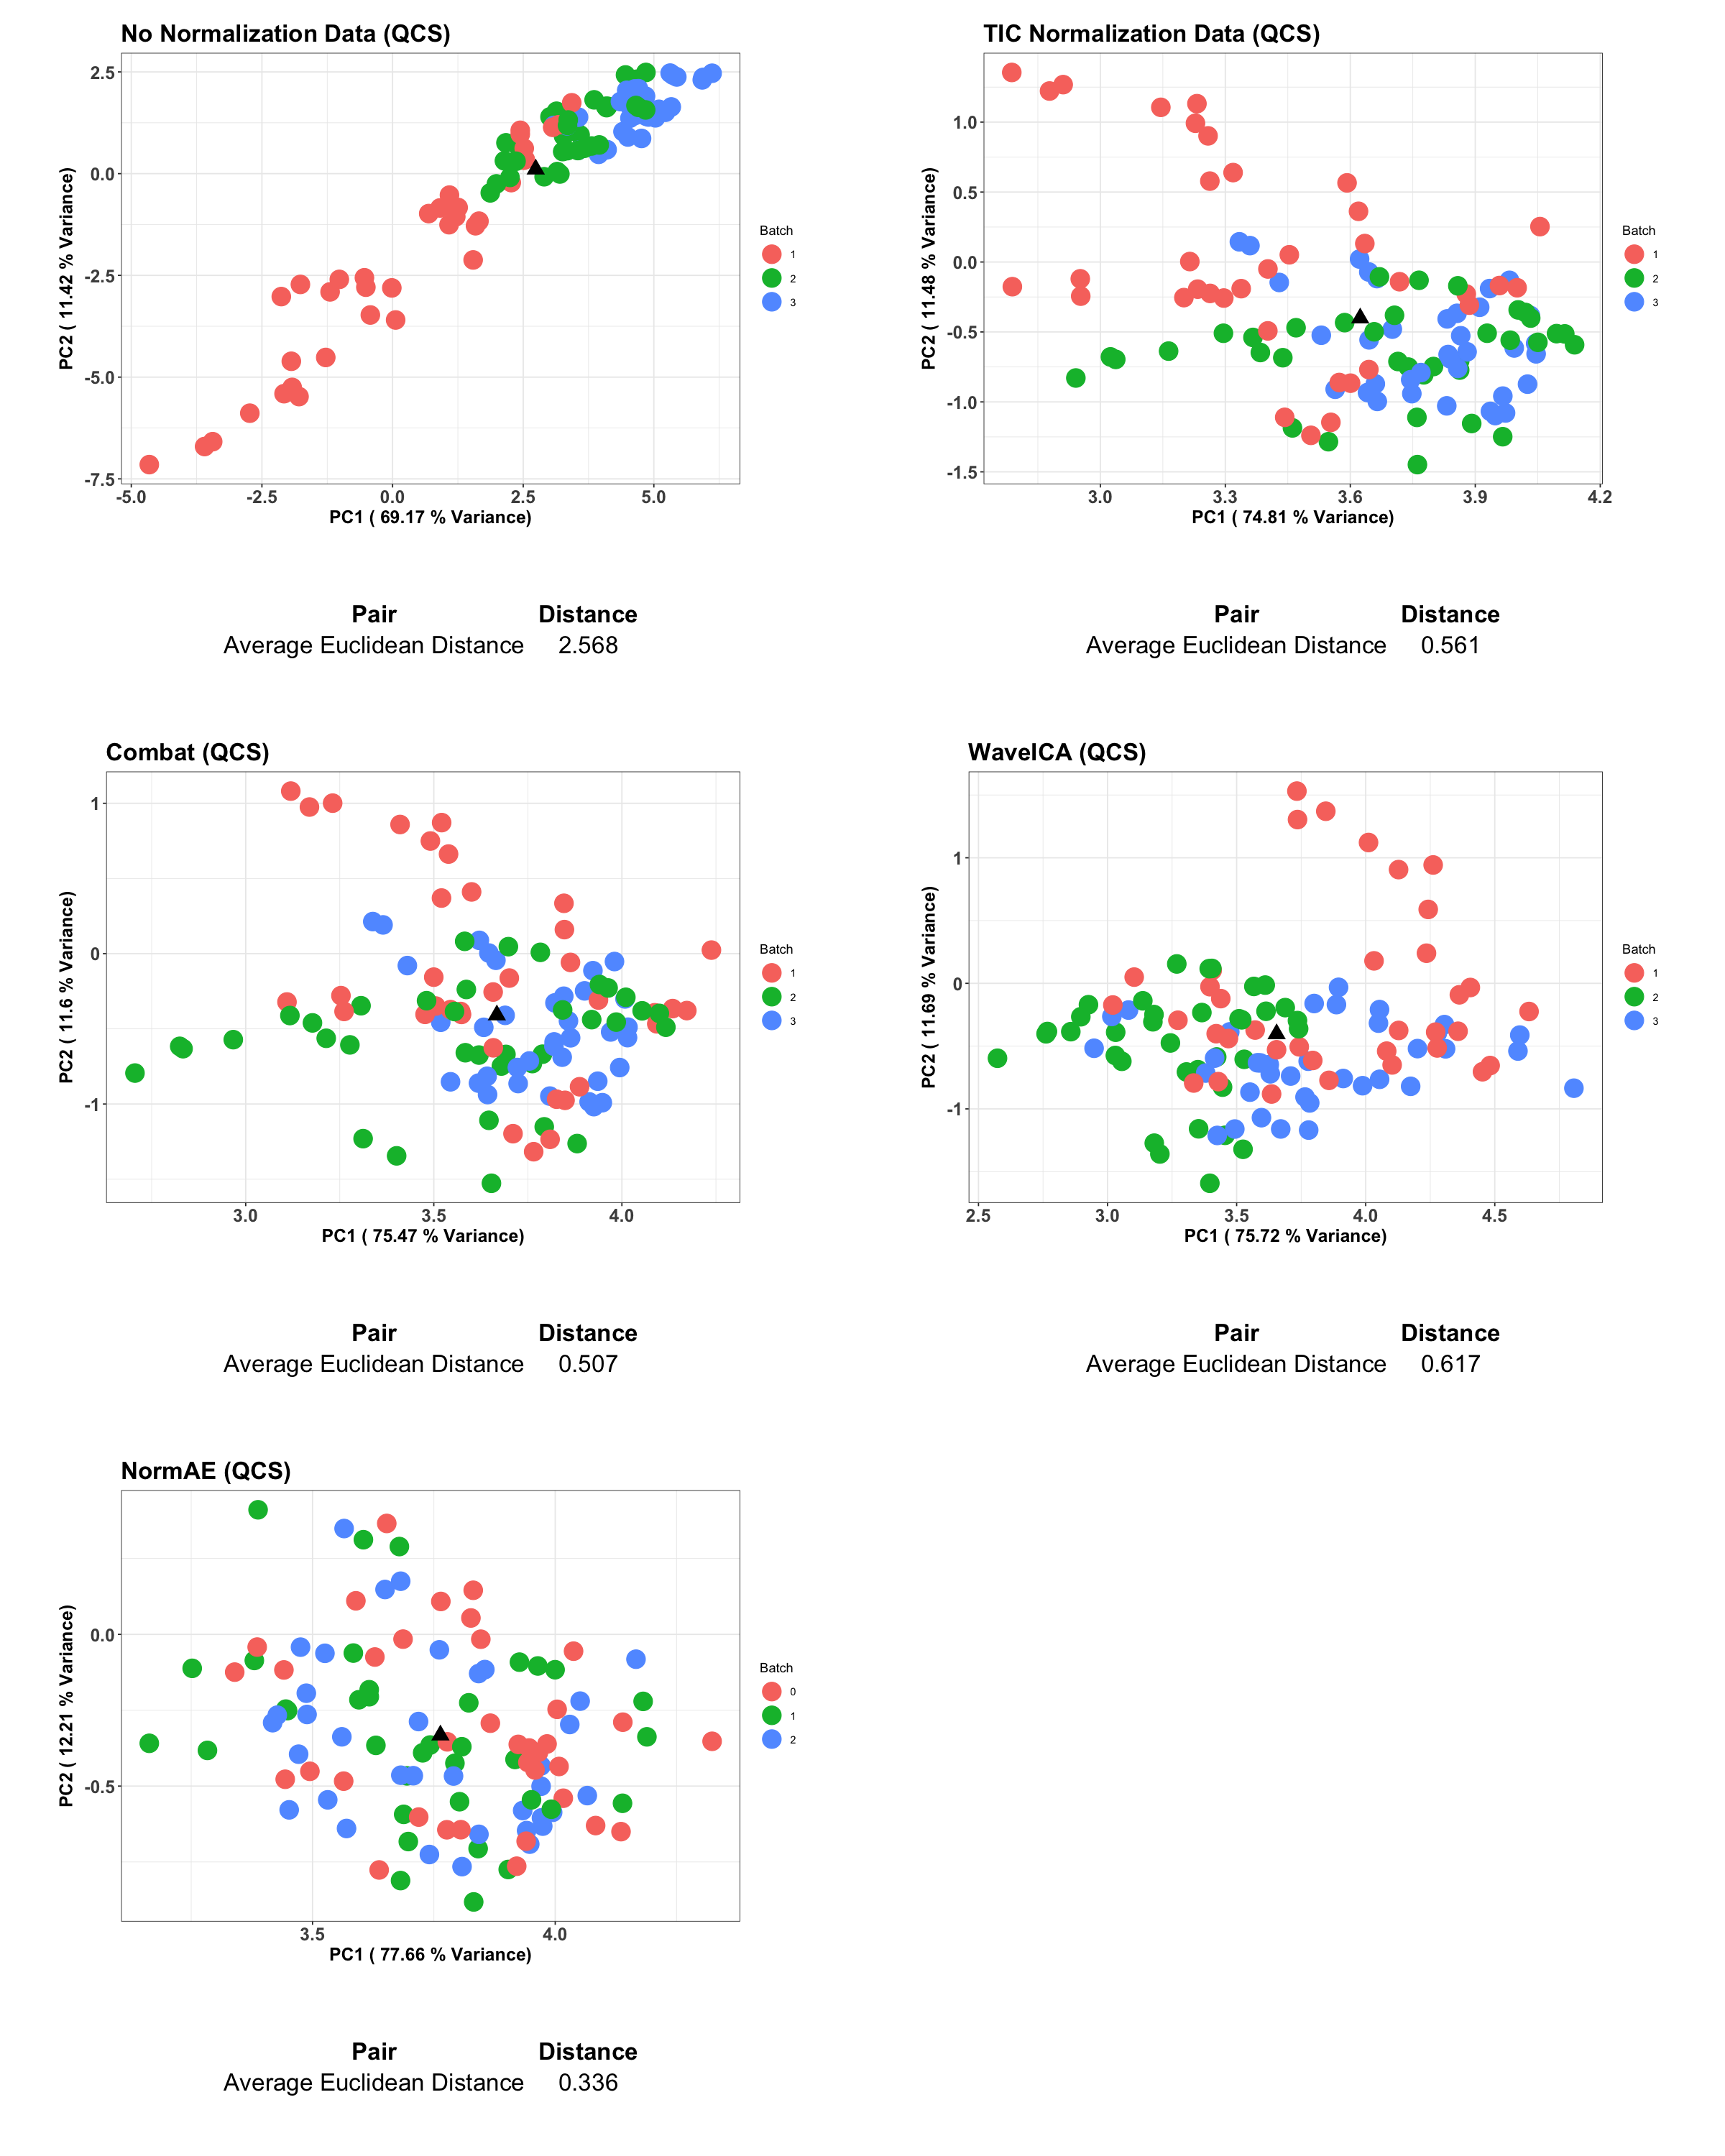

In [133]:
## QCS PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 25)
combined_plots_qcs <- grid.arrange(combined_plot_qcs, combined_plot_TIC_qcs, combined_plot_combat_qcs, combined_plot_wave_qcs, combined_plot_norm_qcs, nrow = 3)
print(combined_plots_qcs)

## 6. Tissue RSD Overview ##
<a id="tissue_rsd_overview_2"></a>

In [134]:
## Tissue RSD Overview Table ##
# Initialize an empty list to store combined HTML tables for each tissue
combined_html_list <- list()

# Iterate over each tissue type
for (tissue_name in names(rsd_results_combined)) {
  # Extract RSD tables for the current tissue type
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  rsd_table_TIC <- generate_rsd_table(rsd_results_combined_TIC, tissue_name)  
  rsd_table_combat <- generate_rsd_table(rsd_results_combined_combat, tissue_name)
  rsd_table_wave <- generate_rsd_table(rsd_results_combined_wave, tissue_name)
  rsd_table_norm <- generate_rsd_table(rsd_results_combined_norm, tissue_name)

  # Combine HTML tables for the current tissue type horizontally
  combined_rsd_table <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>",
                              "<div style='text-align: center;'>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>No Norm</h3>", rsd_table, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>TIC Norm</h3>", rsd_table_TIC, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>Combat</h3>", rsd_table_combat, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>WaveICA</h3>", rsd_table_wave, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>NormAE</h3>", rsd_table_norm, "</div>",
                              "</div>")
  
  # Add the combined HTML table to the list
  combined_html_list[[tissue_name]] <- combined_rsd_table
}

# Combine HTML tables into a single HTML table with four columns
combined_html <- paste("<table style='width:100%; border-collapse: collapse;'>", 
                       "<tr>", paste("<td style='vertical-align: top;'>", 
                                     unlist(combined_html_list), 
                                     "</td>", sep = ""), "</tr></table>")

# Wrap the combined HTML content in a div with text-align: center
centered_combined_html <- paste("<div style='text-align: center;'>", combined_html, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_combined_html)

GoatLiver RSD Table No Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 TIC Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.68 ± 6.63% 
 
 
 Intraday 2 
 9.15 ± 5.28% 
 
 
 Intraday 3 
 10.27 ± 8.49% 
 
 
 Interday 
 13.41 ± 5.13% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.52 ± 6.62% 
 
 
 Intraday 2 
 9.59 ± 5.55% 
 
 
 Intraday 3 
 10.14 ± 8.32% 
 
 
 Interday 
 12.11 ± 5.82% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.01 ± 6.57% 
 
 
 Intraday 2 
 7.34 ± 5.46% 
 
 
 Intraday 3 
 11.11 ± 17.51% 
 
 
 Interday 
 11.91 ± 9.36% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.56 ± 4.62% 
 
 
 Intraday 2 
 6.25 ± 4.44% 
 
 
 Intraday 3 
 8.13 ± 6.96% 
 
 
 Interday 
 6.37 ± 3.70% 
 
 
 ChickenLiver RSD Table No Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 TIC Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.51 ± 8.94% 
 
 
 Intraday 2 
 6.67 ± 5.24% 
 
 
 Intraday 3 
 12.02 ± 7.56% 
 
 
 Interday 
 18.61 ± 7.56% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.28 ± 8.89% 
 
 
 Intraday 2 
 6.93 ± 5.29% 
 
 
 Intraday 3 
 11.87 ± 7.46% 
 
 
 Interday 
 14.11 ± 6.35% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.19 ± 12.43% 
 
 
 Intraday 2 
 5.16 ± 4.61% 
 
 
 Intraday 3 
 11.30 ± 12.67% 
 
 
 Interday 
 15.55 ± 11.20% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.72 ± 8.71% 
 
 
 Intraday 2 
 4.24 ± 3.16% 
 
 
 Intraday 3 
 11.80 ± 7.28% 
 
 
 Interday 
 10.03 ± 5.01% 
 
 
 ChickenHeart RSD Table No Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10% 
 
 
 TIC Norm 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.66 ± 4.95% 
 
 
 Intraday 2 
 6.96 ± 5.03% 
 
 
 Intraday 3 
 16.88 ± 10.24% 
 
 
 Interday 
 15.64 ± 5.59% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.57 ± 4.96% 
 
 
 Intraday 2 
 7.32 ± 5.38% 
 
 
 Intraday 3 
 16.67 ± 10.19% 
 
 
 Interday 
 12.10 ± 5.51% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.73 ± 5.50% 
 
 
 Intraday 2 
 6.60 ± 7.24% 
 
 
 Intraday 3 
 15.54 ± 9.81% 
 
 
 Interday 
 14.53 ± 10.12% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.11 ± 4.00% 
 
 
 Intraday 2 
 6.03 ± 4.04% 
 
 
 Intraday 3 
 12.50 ± 7.79% 
 
 
 Interday 
 8.17 ± 3.49%

## 7. Tissue PCA Plot Overview ##
<a id="tissue_pca_overview_2"></a>

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


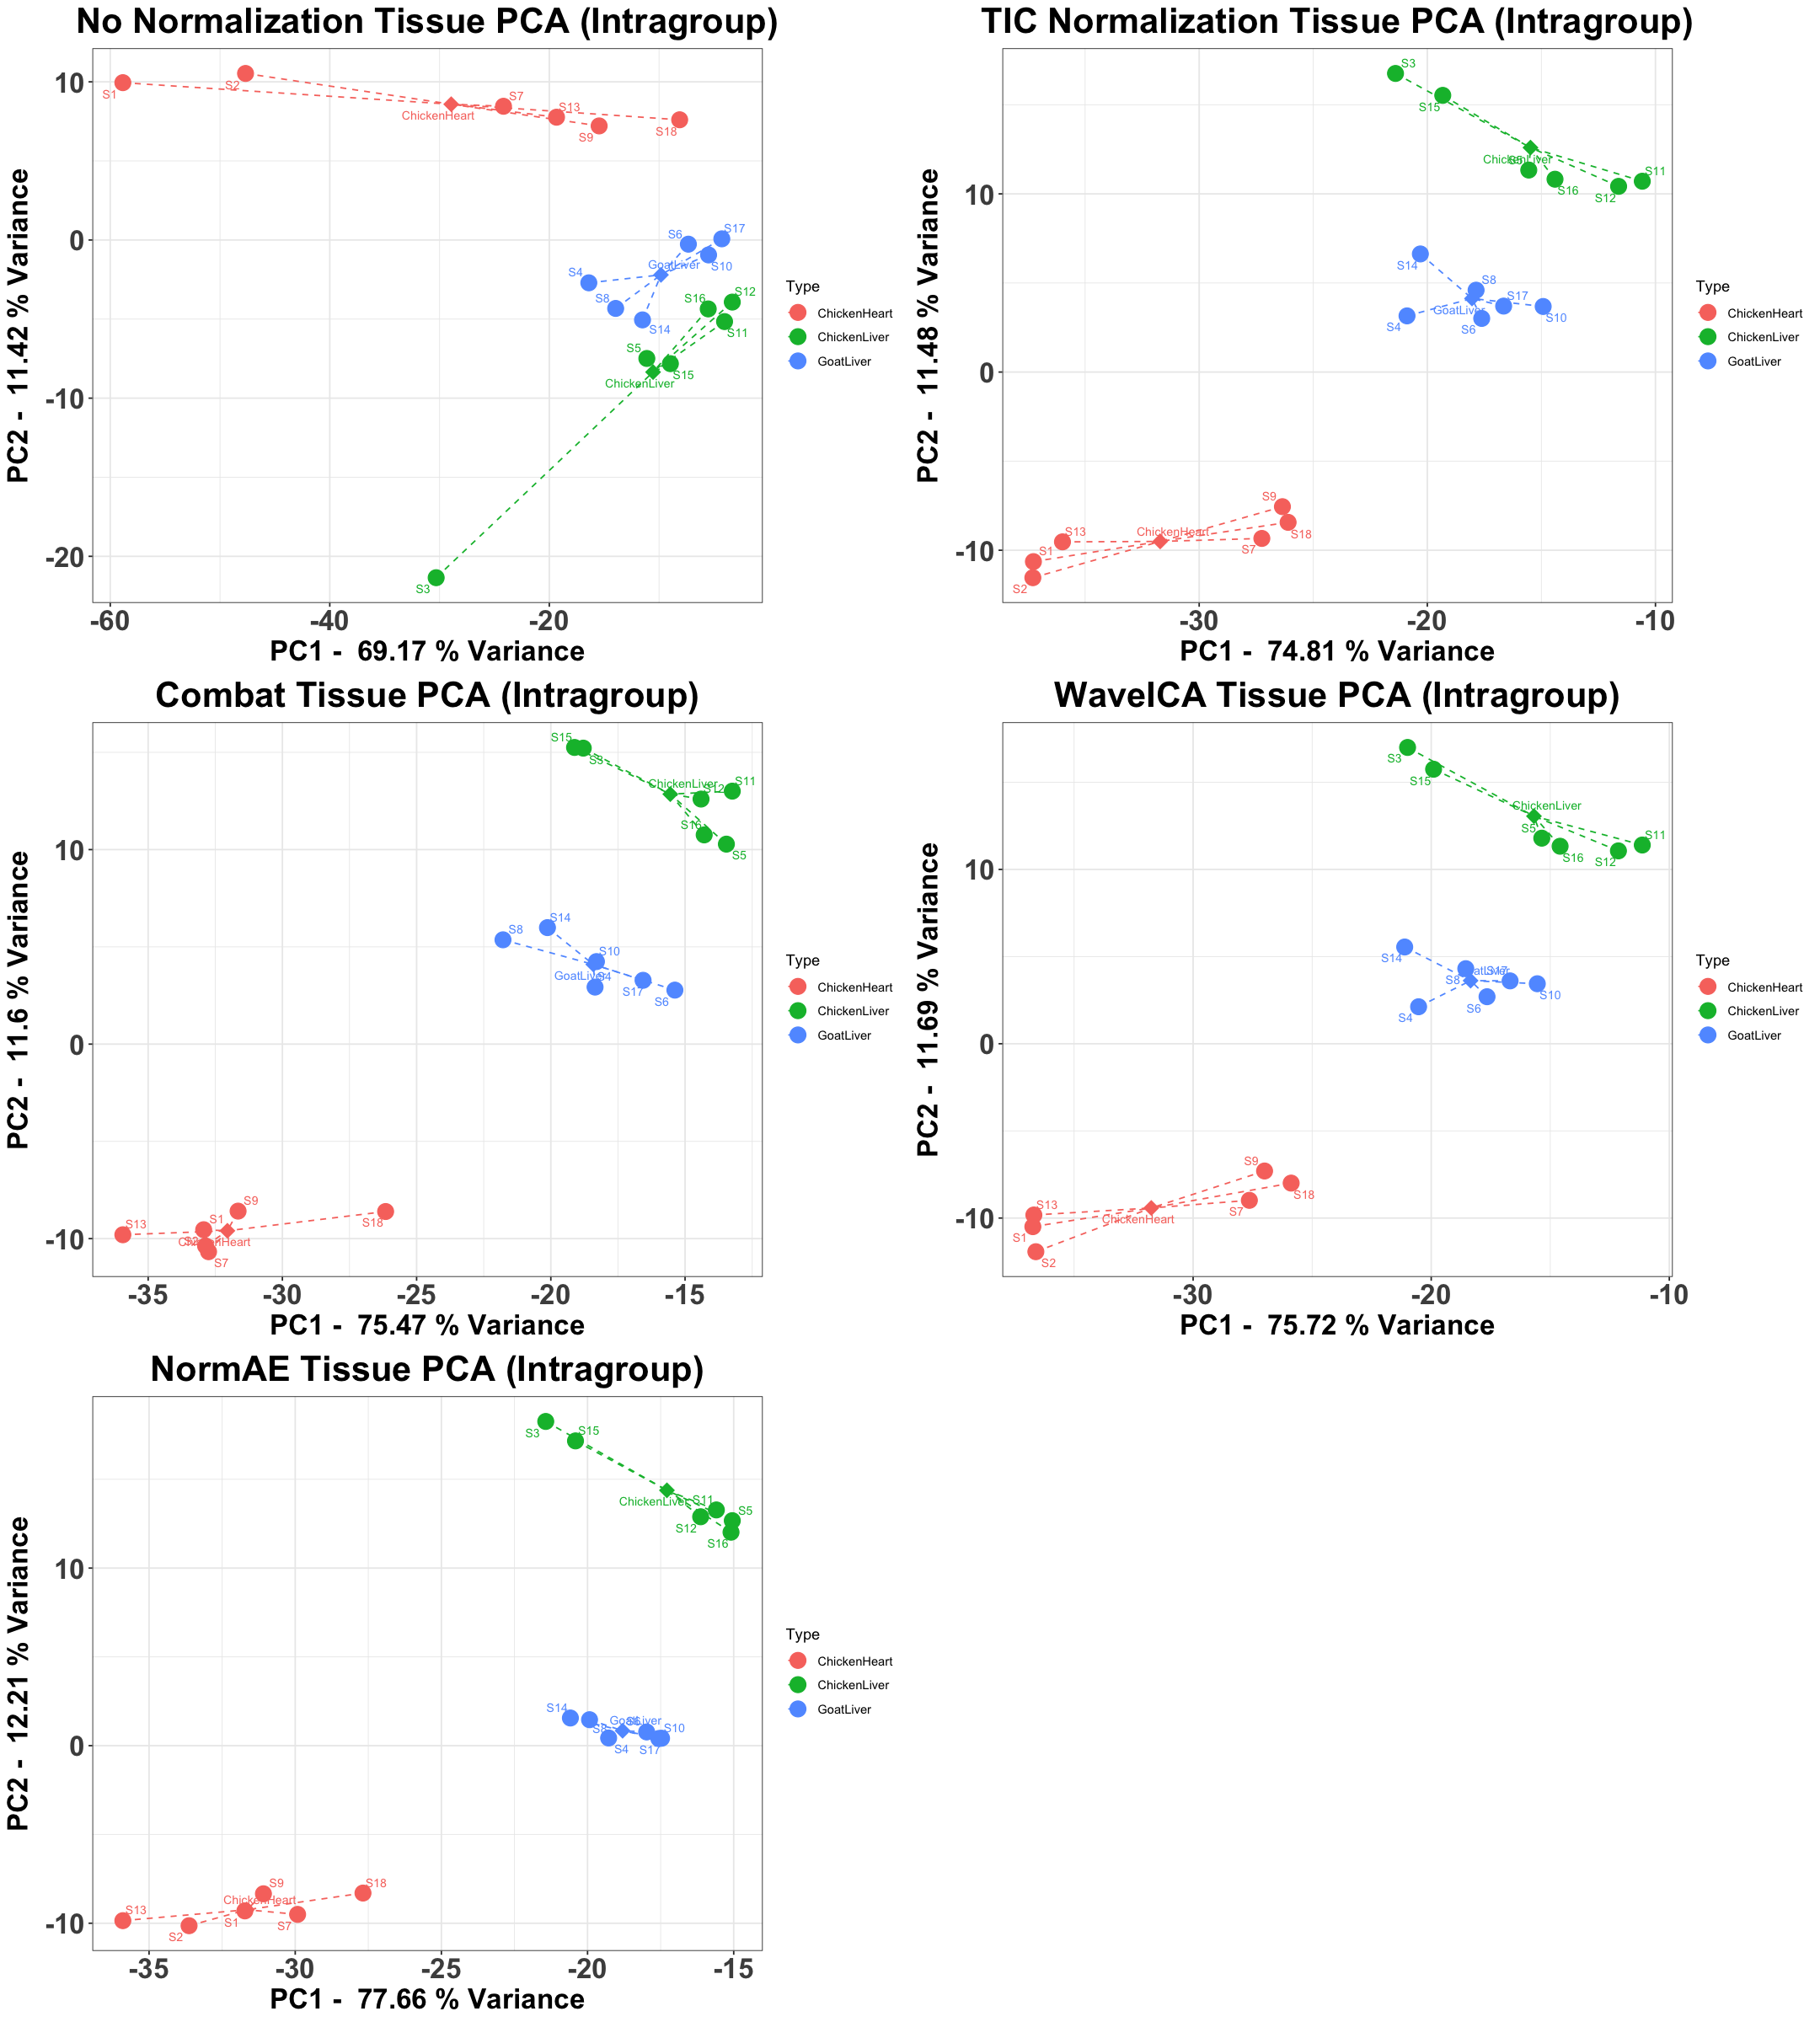

In [135]:
## Tissue Intragroup Plot ##
options(repr.plot.width = 18, repr.plot.height = 20)
tissue_plots_intra <- grid.arrange(tissue_intra_plot, tissue_intra_plot_TIC, tissue_intra_plot_combat,
                                        tissue_intra_plot_wave, tissue_intra_plot_norm, nrow = 3)
print(tissue_plots_intra)

Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]
3 3 (2-2,1-1) arrange gtable[arrange]
4 4 (2-2,2-2) arrange gtable[arrange]
5 5 (3-3,1-1) arrange gtable[arrange]


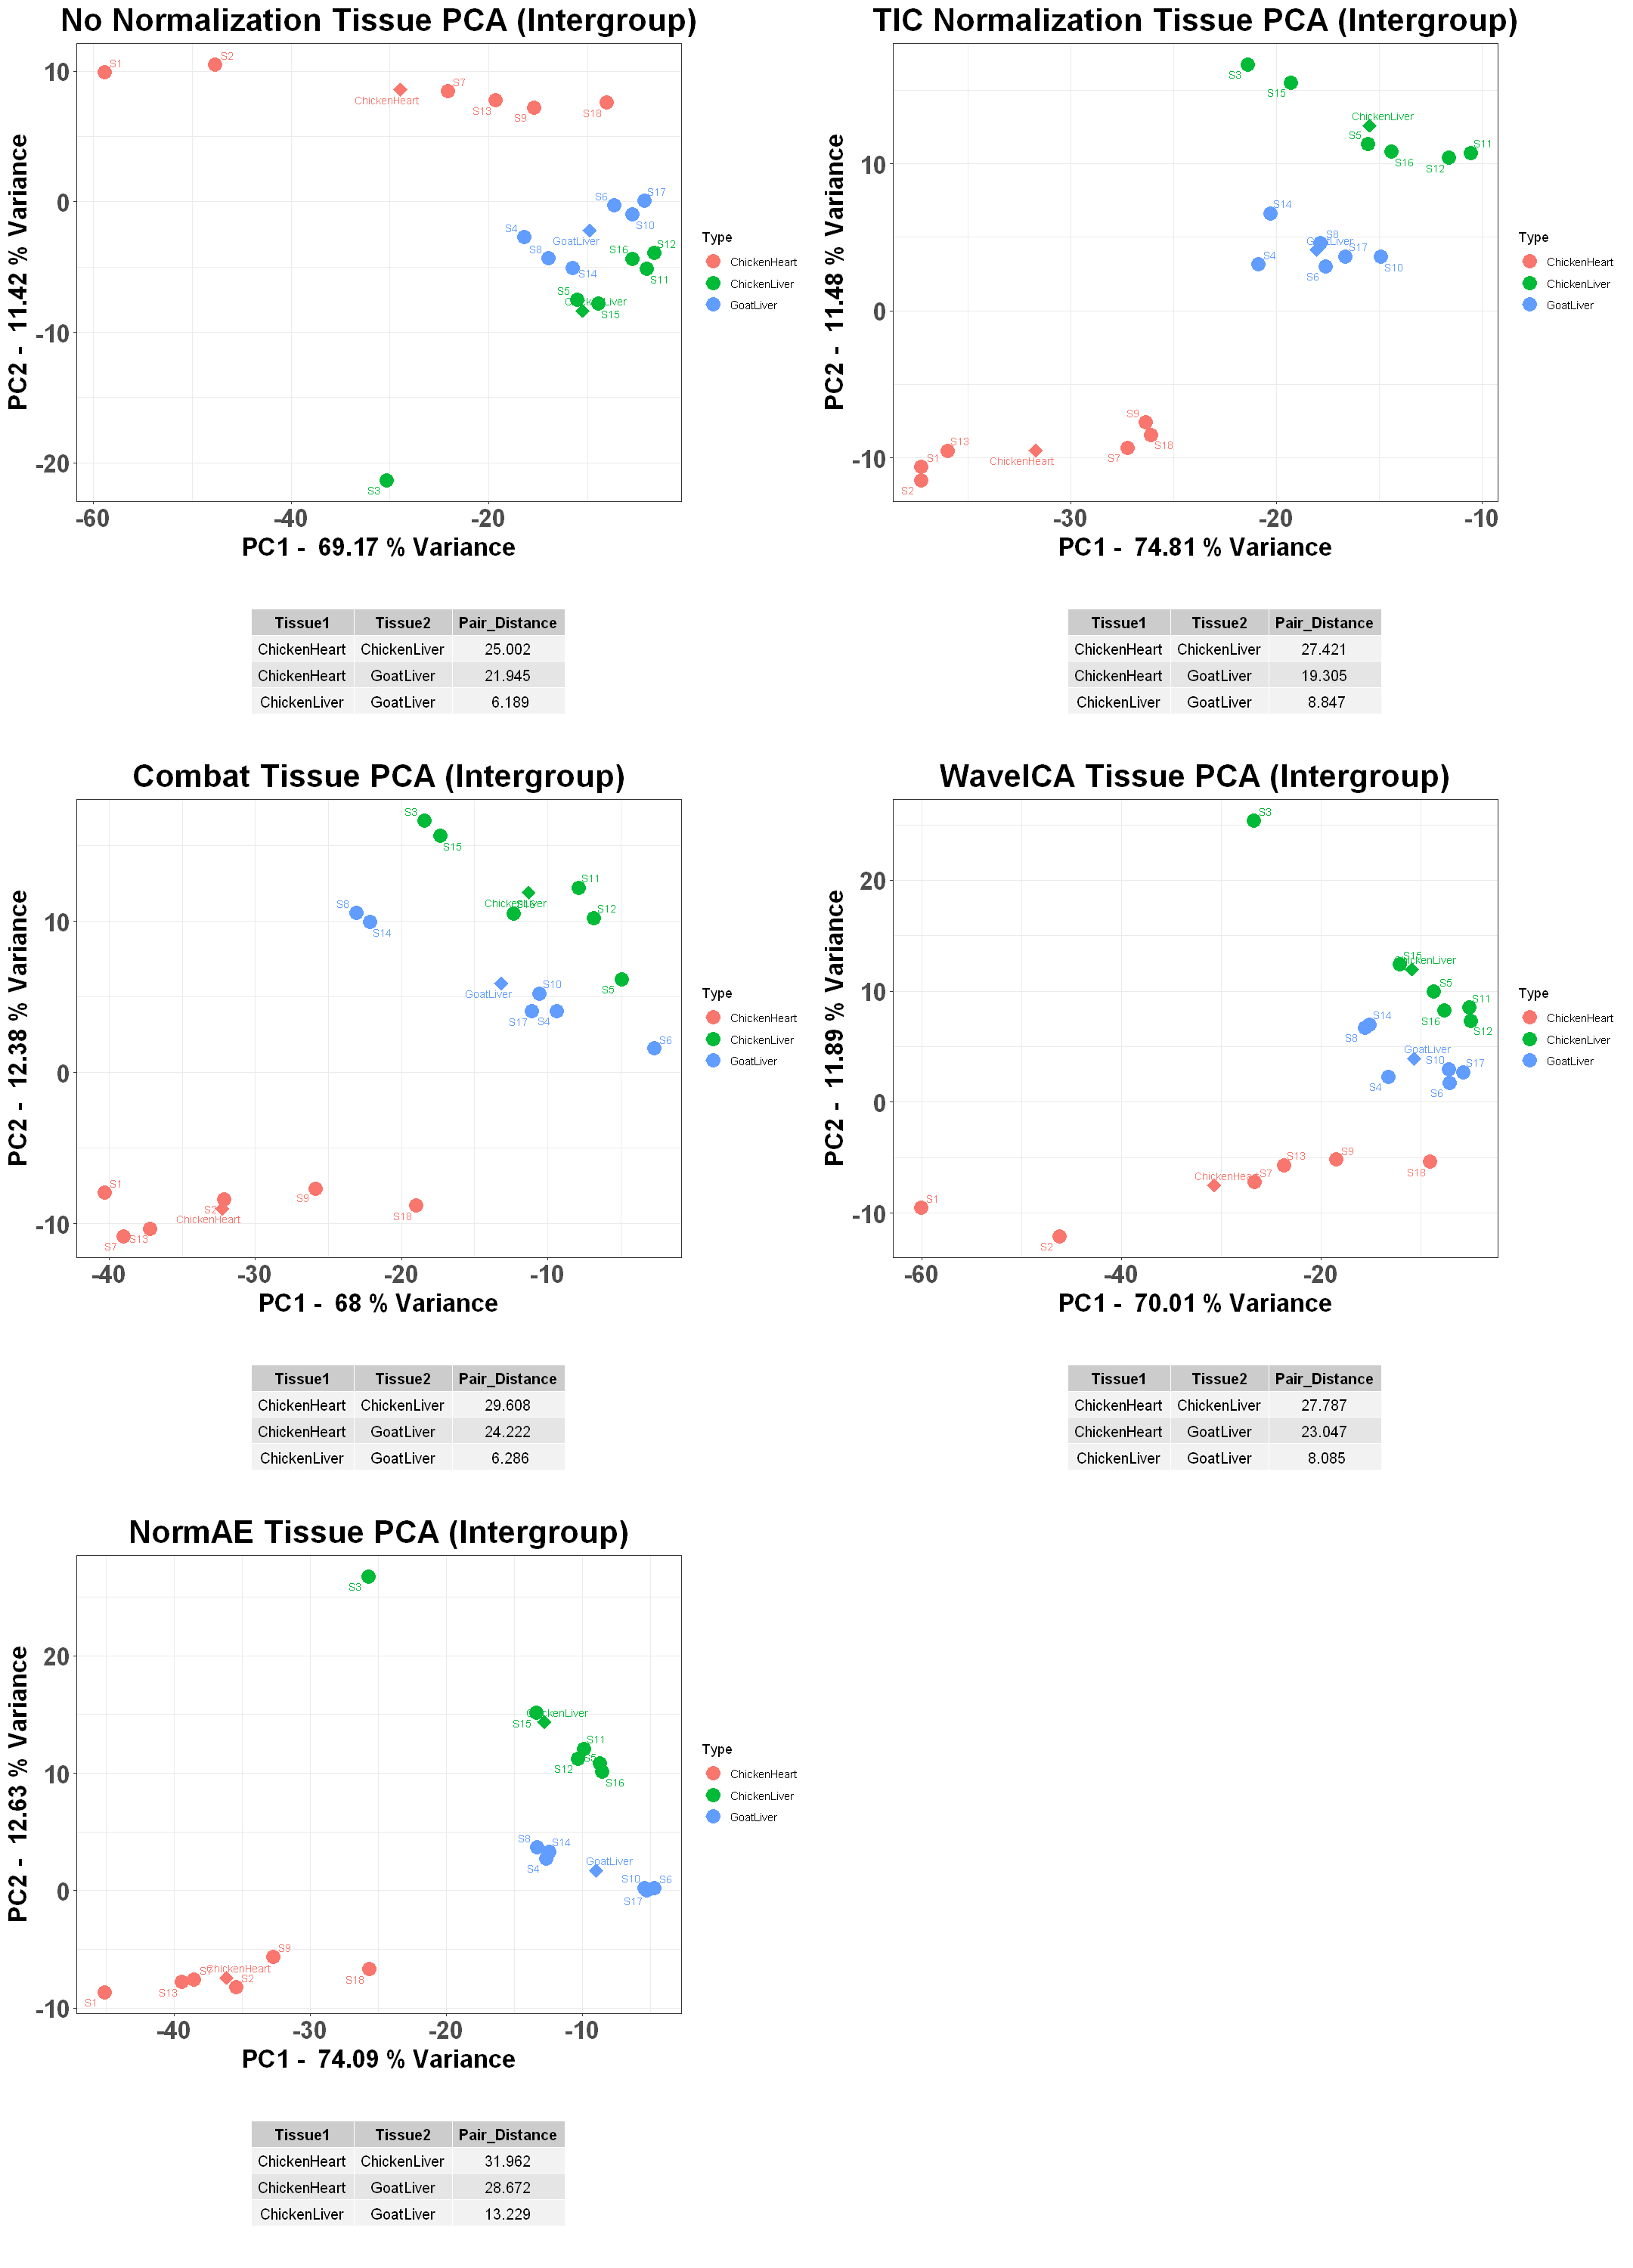

In [106]:
## Tissue Intergroup Plot ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_interday <- grid.arrange(combined_plot_inter, combined_plot_TIC_inter, combined_plot_combat_inter,
                                        combined_plot_wave_inter, combined_plot_norm_inter, nrow = 3)
print(combined_plots_interday)

## 8. Average Distance Overview (Euclidean, Pairwise) ##
<a id="average_distance_overview_2"></a>

In [137]:
## Overview Average Euclidean Distance Table ##

generate_distance_table <- function(qcs_distances, tissue_distances) {
  # Create merged data frame
  merged_data <- data.frame(QCS = qcs_distances)
  
  # Extract tissue types
  tissue_types <- unique(tissue_distances$Type)
  
  # Iterate over each tissue type and add columns to the merged data frame
  for (i in seq_along(tissue_types)) {
    column_name <- paste("tissue_avg_distances_", i)
    tissue_distances_col <- tissue_distances %>%
      filter(Type == tissue_types[i]) %>%
      pull("Average Distance Within Tissue")
    merged_data[[column_name]] <- round(tissue_distances_col, 3)
  }
  
  # Add row names
  row.names(merged_data) <- c("No Norm", "TIC Norm", "Combat", "WaveICA", "NormAE")
  
  # Add column names
  colnames(merged_data) <- c("QCS", paste(tissue_types))
  
  return(merged_data)
}

# Example usage:
merged_data <- generate_distance_table(
  c(average_distance_ec, average_distance_ec_TIC, average_distance_ec_combat, 
    average_distance_ec_wave, average_distance_ec_norm),
  rbind(tissue_avg_distances, tissue_avg_distances_TIC, tissue_avg_distances_combat, 
        tissue_avg_distances_wave, tissue_avg_distances_norm)
)

# Load required libraries
library(kableExtra)
library(htmltools)
library(IRdisplay)

# Create HTML table
display_distance_table <- kable(merged_data, format = "html", row.names = TRUE, escape = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_distance_table <- paste("<h2 style='text-align: center;'>Average Euclidean Distance</h2>", 
                               as.character(display_distance_table))

# Display HTML table
display_html(display_distance_table)

Average Euclidean Distance 
 
 
 
 QCS 
 ChickenHeart 
 ChickenLiver 
 GoatLiver 
 
 
 
 
 No Norm 
 2.5677428 
 16.262 
 8.081 
 4.702 
 
 
 TIC Norm 
 0.5607850 
 5.294 
 4.182 
 2.114 
 
 
 Combat 
 0.5066023 
 2.376 
 2.926 
 2.139 
 
 
 WaveICA 
 0.6173678 
 5.149 
 3.979 
 2.059 
 
 
 NormAE 
 0.3363880 
 2.242 
 3.300 
 1.230

In [85]:
# Overview of Pairwise Distance Table #

centroid_distances_df$Pair <- paste(centroid_distances_df$Tissue1, "-", centroid_distances_df$Tissue2)

num_pairs <- nrow(centroid_distances_df)

# Initialize an empty data frame with the correct dimensions
merged_data_pair <- matrix(NA, nrow = 5, ncol = num_pairs)

# Loop through each pair
for (i in 1:num_pairs) {
    # Extract Pair_Distance values for each method for the ith pair
    pair_distances <- c(
        round(centroid_distances_df$Pair_Distance[i], 3),
        round(centroid_distances_df_TIC$Pair_Distance[i], 3),
        round(centroid_distances_df_combat$Pair_Distance[i], 3),
        round(centroid_distances_df_wave$Pair_Distance[i], 3),
        round(centroid_distances_df_norm$Pair_Distance[i], 3)
    )
    
    # Assign the pair_distances to the corresponding column in merged_data_pair
    merged_data_pair[, i] <- pair_distances
}

# Convert the matrix to a data frame
merged_data_pair <- as.data.frame(merged_data_pair)

# Add row names
row.names(merged_data_pair) <- c("No Norm", "TIC Norm", "Combat", "WaveICA", "NormAE")

# Add column names
colnames(merged_data_pair) <- centroid_distances_df$Pair[1:num_pairs]

# Load required libraries
library(kableExtra)
library(htmltools)
library(IRdisplay)

# Create HTML table
display_pair_distance_table <- kable(merged_data_pair, format = "html", row.names = TRUE, escape = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_pair_distance_table <- paste("<h2 style='text-align: center;'>Pairwise Distance</h2>", 
                               as.character(display_pair_distance_table))

# Display HTML table
display_html(display_pair_distance_table)

Pairwise Distance 
 
 
 
 ChickenHeart - ChickenLiver 
 ChickenHeart - GoatLiver 
 ChickenLiver - GoatLiver 
 
 
 
 
 No Norm 
 25.002 
 21.945 
 6.189 
 
 
 TIC Norm 
 27.421 
 19.305 
 8.847 
 
 
 Combat 
 29.608 
 24.222 
 6.286 
 
 
 WaveICA 
 27.787 
 23.047 
 8.085 
 
 
 NormAE 
 27.648 
 16.337 
 13.623

In [86]:
## Best Correction Package ##
# ranking based on QCS interday rsd_value of (propranolol)
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_norm_RSD = rsd_propranolol[2],  
  TIC_norm_RSD = rsd_propranolol_TIC[2],
  IS_norm_RSD = rsd_ratio[2],   
  Combat_RSD = rsd_propranolol_combat[2],
  WaveICA_RSD = rsd_propranolol_wave[2],
  NormAE_RSD = rsd_propranolol_norm[2]
)
# Set the column names
colnames(overview_table_pro) <- c(paste("m/z value:", propranolol_mz_value_2), "No Norm", "TIC Norm", "IS Norm", "Combat", "WaveICA", "NormAE")

# Convert percentage strings to numeric values
overview_table_pro[4, -1] <- as.numeric(gsub("%", "", overview_table_pro[4, -1]))
rsd_values <- overview_table_pro[4, -1] 
rsd_values <- as.numeric(rsd_values)
sorted_columns <- names(overview_table_pro)[-1][order(rsd_values)]
cat("Ranking correction based on", "\033[1mQCS Interday-only RSD value\033[0m", "from smallest to largest: \n")
print(sorted_columns)
cat("\n")


# Function to format pair distances with tissue types
format_pair_distances <- function(df) {
  apply(df, 1, function(row) paste(row["Tissue1"], "-", row["Tissue2"], ":", round(as.numeric(row["Pair_Distance"]), 2)))
}

# Function to format average distances within each tissue type
format_avg_distances <- function(df) {
  apply(df, 1, function(row) paste(row["Type"], ":", row["Average Distance Within Tissue"]))
}

# Create separate rows for each tissue value with descriptions
merged_data <- data.frame(
  Average_distances = c("QCS(euclidean)", "Tissue(intragroup)", "Tissue(intergroup)"),
  No_norm = c(
    average_distance_ec, 
    paste(format_avg_distances(tissue_avg_distances), collapse = "<br>"), 
    paste(format_pair_distances(centroid_distances_df), collapse = "<br>")
  ),
  TIC_norm = c(
    average_distance_ec_TIC, 
    paste(format_avg_distances(tissue_avg_distances_TIC), collapse = "<br>"), 
    paste(format_pair_distances(centroid_distances_df_TIC), collapse = "<br>")
  ),
  Combat_norm = c(
    average_distance_ec_combat, 
    paste(format_avg_distances(tissue_avg_distances_combat), collapse = "<br>"), 
    paste(format_pair_distances(centroid_distances_df_combat), collapse = "<br>")
  ),
  WaveICA_norm = c(
    average_distance_ec_wave, 
    paste(format_avg_distances(tissue_avg_distances_wave), collapse = "<br>"), 
    paste(format_pair_distances(centroid_distances_df_wave), collapse = "<br>")
  ),
  NormAE_norm = c(
    average_distance_ec_norm, 
    paste(format_avg_distances(tissue_avg_distances_norm), collapse = "<br>"), 
    paste(format_pair_distances(centroid_distances_df_norm), collapse = "<br>")
  )
)

# Function to extract and convert numeric values from formatted strings
extract_numeric_values <- function(row) {
  sapply(row, function(x) {
    nums <- unlist(strsplit(x, "<br>"))
    nums <- gsub("[^0-9.]", "", nums)
    mean(as.numeric(nums), na.rm = TRUE)
  })
}

# Ranking based on QCS average distance
euclidean_row <- merged_data[1, -1]  # Extract the euclidean row
euclidean_row_numeric <- as.numeric(euclidean_row)
sorted_columns_qcs <- names(merged_data)[-1][order(euclidean_row_numeric)]
cat("Ranking correction based on", "\033[1mAverage QCS Distance (Euclidean Distance)\033[0m", "from smallest to largest: \n")
print(sorted_columns_qcs)
cat("\n")


# Ranking based on Tissue average distance
intra_row <- merged_data[2, -1]  # Extract the intragroup row
inter_row <- merged_data[3, -1]  # Extract the intergroup row

intra_averages <- extract_numeric_values(intra_row)
cat("Ranking correction based on", "\033[1mAverage Tissue Intragroup Distance (Euclidean Distance)\033[0m", "from smallest to largest: \n")
sort_columns_intra <- names(merged_data)[-1][order(intra_averages)]
print(sort_columns_intra)
cat("\n")


inter_averages <- extract_numeric_values(inter_row)
cat("Ranking correction based on", "\033[1mAverage Tissue Intergroup Distance (Pairwise Distance)\033[0m", "from largest to smallest: \n")
sort_columns_inter <- names(merged_data)[-1][order(-inter_averages)]
print(sort_columns_inter)
cat("\n")


# Ranking based on tissue RSD
extract_interday_rsd <- function(rsd_results_combined, sample_set) {
  # Define a function to extract numeric values from strings with the specified pattern
  extract_numeric <- function(x) {
    as.numeric(gsub("[^0-9.]+", "", strsplit(x, "±")[[1]][1]))
  }
  
  # Define a function to extract the interday RSD value for a single tissue
  extract_interday_rsd_single <- function(rsd_results, tissue_name) {
    rsd_df <- rsd_results[[tissue_name]]
    interday_rsd <- rsd_df[4, "RSD"]
    return(interday_rsd)
  }
  
  # Initialize a list to store interday RSD values for each tissue
  interday_rsd_values <- list()
  
  # Set indices for interday RSD beforehand
  interday_indices <- c("No Norm", "TIC Norm", "Combat", "WaveICA", "NormAE")
  
  # Iterate over each tissue type in the sample_set
  for (tissue_name in sample_set) {
    # Initialize a list to store interday RSD values for the current tissue across different rsd_results_combined
    interday_rsd <- list()
    
    # Iterate over each rsd_results_combined
    for (rsd_results in rsd_results_combined) {
      # Extract interday RSD values for the current tissue type from each rsd_results_combined
      interday_rsd[[length(interday_rsd) + 1]] <- extract_interday_rsd_single(rsd_results, tissue_name)
    }
    
    # Add interday RSD values for the current tissue to the main list
    names(interday_rsd) <- interday_indices  # Set names based on predefined indices
    interday_rsd_values[[tissue_name]] <- interday_rsd
  }
  
  # Define a function to sort interday RSD values for each tissue type
  sort_interday_rsd <- function(interday_rsd_values) {
    sorted_names_list <- list()
    for (tissue_name in sample_set) {
      interday_rsd <- interday_rsd_values[[tissue_name]]
      sorted_names <- lapply(interday_rsd, function(x) {
        extract_numeric(x)
      })
      sorted_indices <- names(interday_rsd)[order(unlist(sorted_names))]
      sorted_indices <- factor(sorted_indices, levels = interday_indices)
      sorted_names_list[[tissue_name]] <- sorted_indices
    }
    return(sorted_names_list)
  }
  
  # Call the sorting function
  sorted_names <- sort_interday_rsd(interday_rsd_values)
  
  # Print sorted names for each tissue type
  for (tissue_name in sample_set) {
    cat("Sorted names for", tissue_name, ":", paste(sorted_names[[tissue_name]], collapse = " "), "\n")
  }
}

cat("Ranking correction based on","\033[1mTissue Interday-only RSD\033[0m", "from smallest to largest: \n")
extract_interday_rsd(list(rsd_results_combined, rsd_results_combined_TIC, rsd_results_combined_combat, rsd_results_combined_wave, rsd_results_combined_norm), sample_set_2)

Ranking correction based on QCS Interday-only RSD value from smallest to largest: 
[1] "IS Norm"  "NormAE"   "WaveICA"  "Combat"   "TIC Norm" "No Norm" 

Ranking correction based on Average QCS Distance (Euclidean Distance) from smallest to largest: 
[1] "NormAE_norm"  "TIC_norm"     "Combat_norm"  "WaveICA_norm" "No_norm"     

Ranking correction based on Average Tissue Intragroup Distance (Euclidean Distance) from smallest to largest: 
[1] "NormAE_norm"  "TIC_norm"     "Combat_norm"  "WaveICA_norm" "No_norm"     

Ranking correction based on Average Tissue Intergroup Distance (Pairwise Distance) from largest to smallest: 
[1] "Combat_norm"  "WaveICA_norm" "NormAE_norm"  "TIC_norm"     "No_norm"     

Ranking correction based on Tissue Interday-only RSD from smallest to largest: 
Sorted names for ChickenHeart : NormAE TIC Norm Combat WaveICA No Norm 
Sorted names for ChickenLiver : NormAE TIC Norm Combat WaveICA No Norm 
Sorted names for GoatLiver : NormAE TIC Norm WaveICA No Norm Com

<h2><u><b> 5. Outputs</b></u></h2>
<a id="outputs_2"></a>

1. 6 Datasets as csv file (no norm, TIC norm, IS norm, Combat, WaveICA, NormAE) check dataset file
2. Excel sheets (no norm, TIC norm, IS norm, Combat, WaveICA, NormAE) check output file
3. Overview PDF report (one for plots and one for table)

## Generate Excel sheets of each dataset in Intraday and Interday ##
You can open the excel sheets by left clicking the file in output and select "open in new browser tab", then you can see the excel sheet is downloaded.  

In [90]:
library(openxlsx)

# Prompt the user to input the number of batches
num_batches <- as.integer(readline("Enter the number of batches in your dataset: "))

create_batch_dataset_excel <- function(data, num_batches, propranolol_mz_value, file_name) {
  library(openxlsx)
  
  # Create a new Excel workbook
  wb <- createWorkbook()
  
  # Add sheets for Dataset, Intraday, and Interday
  sheet_names <- c("Dataset", paste0("Intraday ", 1:num_batches), "Interday")
  for (sheet_name in sheet_names) {
    addWorksheet(wb, sheet_name)
  }
  
  # Function to extract dataset for a specific batch
  extract_batch_dataset <- function(data, batch_number) {
    subset(data, batch == batch_number)
  }
  
  # Loop through each batch and write data to corresponding sheets
  for (i in 1:num_batches) {
    batch_dataset <- extract_batch_dataset(data, i)
    colnames(batch_dataset) <- sub("^X", "", colnames(batch_dataset))
    numeric_batch_dataset <- as.numeric(batch_dataset[, colnames(batch_dataset) == propranolol_mz_value, drop = TRUE])
    
    intraday_rsd <- calculate_rsd(numeric_batch_dataset)
    batch_dataset$intraday_rsd <- intraday_rsd
    batch_dataset <- as.data.frame(batch_dataset)
    
    # Write data to Intraday sheet
    writeData(wb, sheet = paste0("Intraday ", i), x = batch_dataset, rowNames = TRUE, colNames = TRUE)
  }
  
  # Calculate Interday RSD for all data
  numeric_interday_dataset <- as.numeric(data[, colnames(data) == propranolol_mz_value, drop = TRUE])
  interday_rsd <- calculate_rsd(numeric_interday_dataset)
  data$interday_rsd <- interday_rsd
  
  # Write data to Dataset and Interday sheets
  writeData(wb, sheet = "Dataset", x = data, rowNames = TRUE, colNames = TRUE)
  writeData(wb, sheet = "Interday", x = data, rowNames = TRUE, colNames = TRUE)
  
  # Save the workbook to a file, overwriting if it already exists
  file_path <- paste0("output/", file_name, ".xlsx")
  saveWorkbook(wb, file_path, overwrite = TRUE)
  
  return(file_path)
}

# Example usage:
if (exists("propranolol_data") && length(propranolol_data) > 0) {
    create_batch_dataset_excel(propranolol_data, num_batches, propranolol_mz_value_2, "NO_Norm_propranolol_batch_dataset")
}
if (exists("propranolol_data_TIC") && length(propranolol_data_TIC) > 0) {
    create_batch_dataset_excel(propranolol_data_TIC, num_batches, propranolol_mz_value_2, "TIC_Norm_propranolol_batch_dataset")
}
if (exists("ratio_data") && length(ratio_data) > 0) {
    create_batch_dataset_excel(ratio_data, num_batches, "ratio", "IS_Norm_propranolol_batch_dataset")
}
if (exists("propranolol_data_combat") && length(propranolol_data_combat) > 0) {
    create_batch_dataset_excel(propranolol_data_combat, num_batches, propranolol_mz_value_2, "COMBAT_propranolol_batch_dataset")
}
if (exists("propranolol_data_wave") && length(propranolol_data_wave) > 0) {
    create_batch_dataset_excel(propranolol_data_wave, num_batches, propranolol_mz_value_2, "WAVE_propranolol_batch_dataset")
}
if (exists("propranolol_data_norm") && length(propranolol_data_norm) > 0) {
    create_batch_dataset_excel(propranolol_data_norm, num_batches, propranolol_mz_value_2, "NormAE_propranolol_batch_dataset")
}

Enter the number of batches in your dataset:  3


[1] "output/NO_Norm_propranolol_batch_dataset.xlsx"

[1] "output/TIC_Norm_propranolol_batch_dataset.xlsx"

[1] "output/IS_Norm_propranolol_batch_dataset.xlsx"

[1] "output/COMBAT_propranolol_batch_dataset.xlsx"

[1] "output/WAVE_propranolol_batch_dataset.xlsx"

[1] "output/NormAE_propranolol_batch_dataset.xlsx"

## Generate PDF file with all results ##

In [98]:
# Create a results directory if it doesn't exist
if (!dir.exists("result")) {
  dir.create("result")
}

# Function to save the HTML table to a file
save_html_table <- function(html_content, file_path) {
  # Create a full HTML document with the necessary CSS and HTML structure
  html_document <- tags$html(
    tags$head(
      tags$meta(charset = "UTF-8"),
      tags$title("RSD Table"),
      tags$link(rel = "stylesheet", href = "https://cdnjs.cloudflare.com/ajax/libs/kableExtra/1.3.4/kableExtra.min.css"),
      tags$style(
        HTML(
          ".kable-table { width: auto !important; margin-left: auto !important; margin-right: auto !important; }
           table, th, td { border: 1px solid black; border-collapse: collapse; }
           th, td { padding: 5px; text-align: left; }"
        )
      )
    ),
    tags$body(
      HTML(html_content)
    )
  )
  
  # Write the full HTML document to the specified file path
  save_html(html_document, file = file_path)
}

# Saving html tables first #

# Saving QCS RSD html tables in result folder
save_html_table(display_rsd_table_pro, "result/propranolol_rsd.html")
save_html_table(display_rsd_table_d7_pro, "result/d7_propranolol_rsd.html")

# Saving Tissue RSD html table in result folder
save_html_table(centered_combined_html, "result/tissue_rsd.html")

# Saving Average Euclidean Distance html tables in result folder
save_html_table(display_distance_table, "result/average_euclidean_distance.html")

# Saving Pairwise Distance html tables in result folder
save_html_table(display_pair_distance_table, "result/pairwise_distance.html")

# Saving png plots second #

# Saving the intensity plot to a file
file_path <- "result/intensity_plots.png"
ggsave(file_path, plot = combined_plots_intensity, width = 18, height = 25, dpi = 300)

# Saving the violin plot propranolol to a file
file_path <- "result/violin_propranolol_plots.png"
ggsave(file_path, plot = combined_plots_violin, width = 18, height = 25, dpi = 300)

# Saving the violin plot d7_propranolol to a file
file_path <- "result/violin_d7_propranolol_plots.png"
ggsave(file_path, plot = combined_plots_violin_d7, width = 18, height = 25, dpi = 300)

# Saving the PCA plot to a file
file_path <- "result/pca_plots.png"
ggsave(file_path, plot = combined_plots, width = 18, height = 25, dpi = 300)

# Saving the QCS PCA plot to a file
file_path <- "result/QCS_pca_plots.png"
ggsave(file_path, plot = combined_plots_qcs, width = 18, height = 25, dpi = 300)

# Saving the Tissue PCA (intragroup) to a file
file_path <- "result/intra_tissue_pca_plots.png"
ggsave(file_path, plot = tissue_plots_intra, width = 18, height = 25, dpi = 300)

# Saving the Tissue PCA (intergroup) to a file
file_path <- "result/inter_tissue_pca_plots.png"
ggsave(file_path, plot = combined_plots_interday, width = 18, height = 25, dpi = 300)

In [100]:
# Saving PNG Plots into one PDF file
library(grid)
library(png)

# List all PNG files in the result folder
png_files <- list.files("result", pattern = "\\.png$", full.names = TRUE)

# Read each PNG file into a list of rasterGrob objects
plots <- lapply(png_files, function(file) {
  png_plot <- png::readPNG(file)
  grid::rasterGrob(png_plot, interpolate = TRUE)
})

# Create a PDF file with each plot on a separate page
pdf("result/PNG_plots.pdf", width = 11, height = 8.5)  # Adjust width and height as needed

for (plot in plots) {
  grid.newpage()  # Start a new page
  grid.draw(plot)  # Draw the plot
}

dev.off()

cat("All plots saved to separate pages within a single PDF file in the result directory.")

pdf 
  2

All plots saved to separate pages within a single PDF file in the result directory.

<h2>Here are additional packages to download if you would like to make HTML tables into PDF file</h2>

In [104]:
install.packages("htmltools")
install.packages("webshot")
install.packages("gridExtra")
install.packages("png")
webshot::install_phantomjs()

phantomjs has been installed to /Users/yaejinkim/Library/Application Support/PhantomJS



In [106]:
# Saving HTML tables into PDF file
library(webshot)
library(gridExtra)
library(png)
library(grid)

# Convert HTML tables to images
html_files <- list(
  "result/propranolol_rsd.html",
  "result/d7_propranolol_rsd.html",
  "result/tissue_rsd.html",
  "result/average_euclidean_distance.html",
  "result/pairwise_distance.html"
)

html_images <- lapply(html_files, function(file) {
  image_file <- sub(".html", ".png", file)
  webshot(file, image_file)
  return(image_file)
})

# Read each image file into a list of rasterGrob objects
plots <- lapply(html_images, function(file) {
  png_plot <- png::readPNG(file)
  grid::rasterGrob(png_plot, interpolate = TRUE)
})

# Create a PDF file with each plot on a separate page
pdf("result/HTML_tables.pdf", width = 11, height = 8.5)  # Adjust width and height as needed

for (plot in plots) {
  grid.newpage()  # Start a new page
  grid.draw(plot)  # Draw the plot
}

dev.off()

cat("HTML tables saved to separate pages within a single PDF file in the result directory.")

pdf 
  2

HTML tables saved to separate pages within a single PDF file in the result directory.